### SC1015 SC 10 Mini Project
#### Team 7 
#### Lee Alessandro U2120619 H
#### Brandon Tan       U2121253 C
#### Wesley Lim Cher Fong        U2122211k

Problem Statement: We are curious to find out how can we incorporate ML to maximize profit while trading in the stock market.


We will be importing our dataset from yahoo finance and we will pick the top marketcap company within all 11 sectors. Among these 5 stocks will be chosen due to limitations, we will perform EDA to pick only 1 stock to perform prediction.

The 11 sectors are as follows: Sectors - Company - Market Cap
- Healthcare Sector - UNH 482.87B
- Materials Sector - DD 39B
- Real Estate Sector - AMT 111.71B
- Consumer Staples Sector -WMT 401.76B
- Consumer Discretionary Sector - AMZN 1.75T
- Utilities Sector - NEE 165B
- Energy Sector - XOM 350.58B
- Industrials Sector BA - 111.9B
- Communication Services Sector - GOOG 1.87T
- financials Sector -V (visa) 463.1B
- Technology Sector - AAPL 2.87T

The top 5 companies are, APPL, GOOG, AMZN, UNH, V

# Exploratory Data Analysis

In [163]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#!pip install git+https://github.com/pydata/pandas-datareader.git
#!pip install yfinance

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

#!pip install plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# For time stamps
from datetime import datetime
from datetime import timedelta,date

#LSTM
#!pip install scikit-learn
#!pip install tensorflow
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import tensorflow as tf

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
import sklearn.metrics as met

# Collecting Data From Yahoo Finance

In [164]:
# The tech stocks we'll use for this analysis
tech_companies = ['AAPL', 'GOOG', 'AMZN','UNH','V']

# Set up End and Start times for data grab

endDate = datetime(2022, 3, 11)
startDate = datetime(endDate.year - 5, endDate.month, endDate.day)

for companyName in tech_companies:
    globals()[companyName] = yf.download(companyName, startDate, endDate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [165]:
company_list = [AAPL, GOOG, AMZN, UNH,V]
company_name = ["APPLE", "GOOGLE", "AMAZON", "UNITED HEALTH","VISA"]

In [166]:
for stock, com_name in zip(company_list, company_name):
    stock["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

# Checking for Null values and types of data

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6300 non-null   float64
 1   High          6300 non-null   float64
 2   Low           6300 non-null   float64
 3   Close         6300 non-null   float64
 4   Adj Close     6300 non-null   float64
 5   Volume        6300 non-null   int64  
 6   company_name  6300 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 393.8+ KB


In [168]:
df.head()

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2017-03-10  34.812500  34.840000  34.660000  34.785000  32.842609   78451200   
2017-03-13  34.712502  34.857498  34.705002  34.799999  32.856762   69686800   
2017-03-14  34.825001  34.912498  34.709999  34.747501  32.807198   61236400   
2017-03-15  34.852501  35.187500  34.757500  35.115002  33.154171  102767200   
2017-03-16  35.180000  35.255001  35.064999  35.172501  33.208473   76928000   

           company_name  
Date                     
2017-03-10        APPLE  
2017-03-13        APPLE  
2017-03-14        APPLE  
2017-03-15        APPLE  
2017-03-16        APPLE

In [169]:
AAPL.describe()

Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean     79.733574    80.619018    78.874047    79.783371    78.574558   
std      43.473641    44.003515    42.920130    43.478081    43.953247   
min      34.712502    34.840000    34.654999    34.747501    32.807198   
25%      43.688749    43.900001    43.396251    43.734376    42.078818   
50%      55.895000    56.523750    55.161251    55.951250    54.275848   
75%     121.817499   123.539997   120.275002   121.779999   120.879845   
max     182.630005   182.940002   179.119995   182.009995   181.778397   

             Volume  
count  1.260000e+03  
mean   1.203227e+08  
std    5.549131e+07  
min    4.100000e+07  
25%    8.347248e+07  
50%    1.053918e+08  
75%    1.406946e+08  
max    4.265100e+08

In [170]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [171]:
GOOG.describe()

Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean   1513.249151  1528.505647  1498.695975  1514.010035  1514.010035   
std     628.840921   634.597431   622.474493   628.283707   628.283707   
min     806.950012   821.630005   803.369995   814.429993   814.429993   
25%    1077.410034  1089.855042  1065.202484  1078.687469  1078.687469   
50%    1221.604980  1230.409973  1209.309998  1218.880005  1218.880005   
75%    1757.562531  1773.602478  1741.559967  1760.230042  1760.230042   
max    3037.270020  3042.000000  2997.750000  3014.179932  3014.179932   

             Volume  
count  1.260000e+03  
mean   1.566105e+06  
std    6.951508e+05  
min    3.468000e+05  
25%    1.124500e+06  
50%    1.393000e+06  
75%    1.783100e+06  
max    6.207000e+06

In [172]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [173]:
AMZN.describe()

Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean   2170.088112  2193.207260  2143.861096  2168.768714  2168.768714   
std     862.899728   873.372552   851.214509   861.514078   861.514078   
min     838.070007   849.369995   833.500000   843.200012   843.200012   
25%    1587.725037  1600.807495  1573.089996  1587.955048  1587.955048   
50%    1871.984985  1889.090027  1854.760010  1869.735046  1869.735046   
75%    3149.397583  3185.559998  3109.189941  3145.194885  3145.194885   
max    3744.000000  3773.080078  3696.790039  3731.409912  3731.409912   

             Volume  
count  1.260000e+03  
mean   4.293388e+06  
std    2.065988e+06  
min    8.813000e+05  
25%    2.904150e+06  
50%    3.704500e+06  
75%    5.079850e+06  
max    1.656500e+07

In [174]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [175]:
UNH.describe()

Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean    289.407540   292.392722   286.417214   289.490413   280.151082   
std      82.618061    83.437426    81.964466    82.731722    86.232118   
min     163.649994   164.970001   162.740005   163.440002   151.678055   
25%     232.967503   235.100006   230.067501   232.880001   221.235405   
50%     264.690002   267.389999   262.485001   264.949997   252.174202   
75%     335.029999   338.152496   332.047501   334.662498   328.554504   
max     507.929993   509.230011   503.649994   505.579987   504.088287   

             Volume  
count  1.260000e+03  
mean   3.544366e+06  
std    1.952523e+06  
min    7.140000e+05  
25%    2.477775e+06  
50%    3.041850e+06  
75%    4.058150e+06  
max    2.736140e+07

In [176]:
UNH.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [177]:
V.describe()

Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean    167.647032   169.187564   166.030024   167.610714   165.335731   
std      44.332892    44.829766    43.819685    44.275480    44.983688   
min      87.849998    88.849998    87.849998    88.059998    85.280266   
25%     131.269997   132.485001   130.204998   131.274998   128.367916   
50%     174.630005   176.669998   172.840004   174.904999   172.244003   
75%     206.512501   208.227505   204.677498   206.402496   204.667671   
max     250.050003   252.669998   248.220001   250.929993   249.741699   

             Volume  
count  1.260000e+03  
mean   8.522509e+06  
std    3.699111e+06  
min    2.420900e+06  
25%    6.105825e+06  
50%    7.594900e+06  
75%    9.843550e+06  
max    3.837960e+07

In [178]:
V.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Adj Close     1260 non-null   float64
 5   Volume        1260 non-null   int64  
 6   company_name  1260 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.8+ KB


# Plotting Candlestick Charts To Visualise Stock Data

In [179]:
fig = go.Figure(data=[go.Candlestick(x=V.index,
            open=V['Open'],
            high=V['High'],
            low=V['Low'],
            close=V['Close'])])
fig.update_layout(
    title='Visa'
)
fig.show()

In [180]:
fig = go.Figure(data=[go.Candlestick(x=AMZN.index,
            open=AMZN['Open'],
            high=AMZN['High'],
            low=AMZN['Low'],
            close=AMZN['Close'])])
fig.update_layout(
    title='Amazon'
)
fig.show()

In [181]:
fig = go.Figure(data=[go.Candlestick(x=AAPL.index,
            open=AAPL['Open'],
            high=AAPL['High'],
            low=AAPL['Low'],
            close=AAPL['Close'])])
fig.update_layout(
    title='APPLE'
)
fig.show()

In [182]:
fig = go.Figure(data=[go.Candlestick(x=UNH.index,
            open=UNH['Open'],
            high=UNH['High'],
            low=UNH['Low'],
            close=UNH['Close'])])
fig.update_layout(
    title='United Health'
)
fig.show()

In [183]:
#mpf.plot(GOOG[start : end],type = 'candle',mav=(20,50),tight_layout=False,title="Google",volume = True)

fig = go.Figure(data=[go.Candlestick(x=GOOG.index,
            open=GOOG['Open'],
            high=GOOG['High'],
            low=GOOG['Low'],
            close=GOOG['Close'])])
fig.update_layout(
    title='Google'
)
fig.show()

# Comparing Trade Volume of Stocks

<AxesSubplot:xlabel='Volume', ylabel='company_name'>

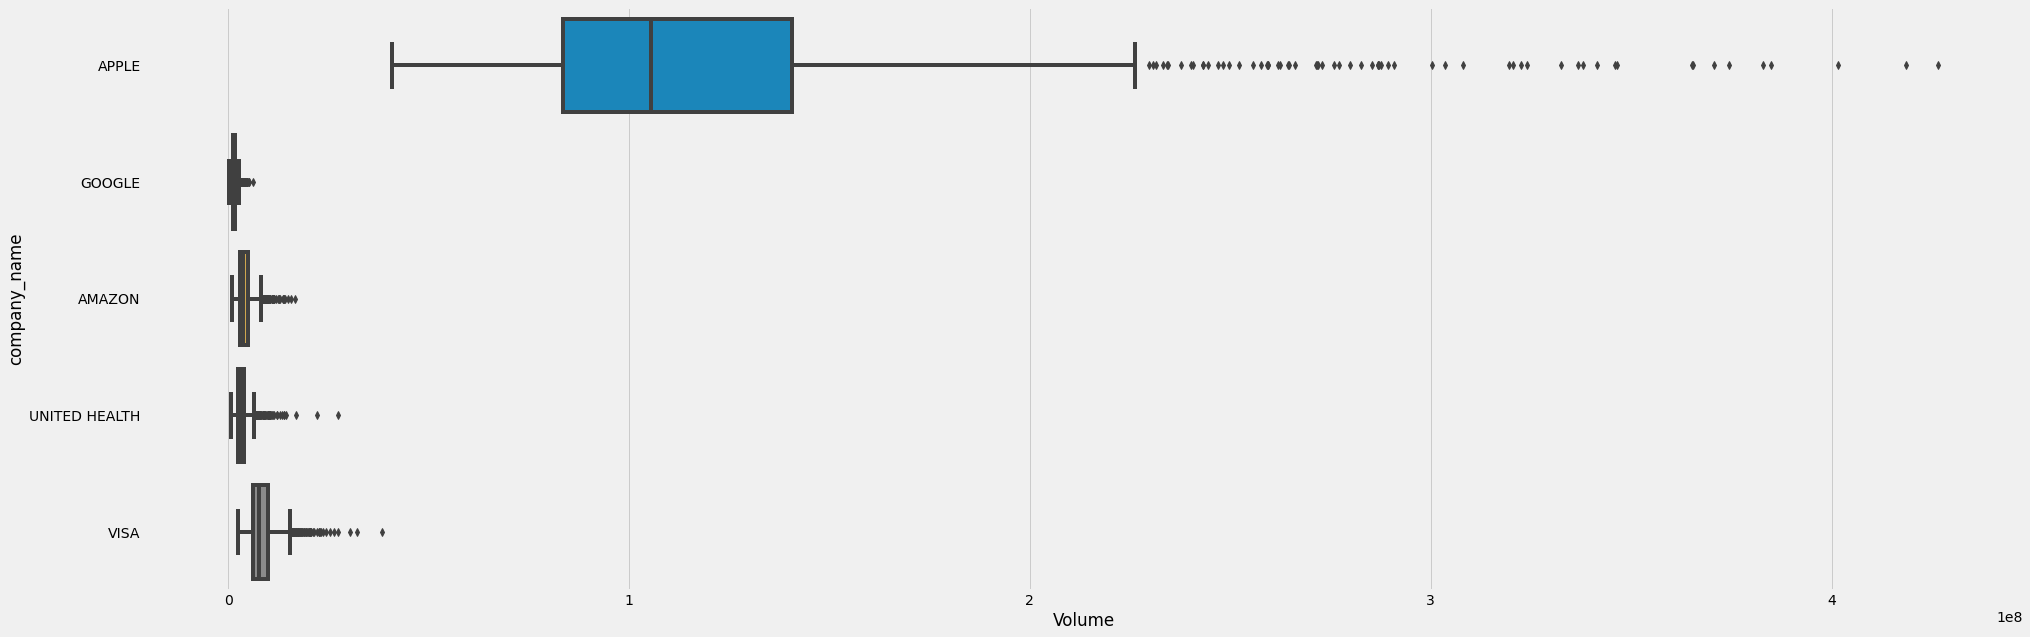

In [185]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df["Volume"],y=df["company_name"],data =df)

# The functions is used so we can have comparison between the fluctuation of a stock withing said date.

In [199]:
def addCols(name):
    for names in name:
        names['Open-high'] = names['Open']-names['High']
        names['Open-low'] = names['Open'] - names['Low']
        names['Close-high'] = names['Close']-names['High']
        names['Close-low'] = names['Close'] - names['Low']
        names['High-low'] = names['High'] - names['Low']
        names['Open-close'] = names['Open'] - names['Close']

In [201]:
addCols(company_list)

In [200]:
plt.style.use('fivethirtyeight')

In [202]:
V['DateTime'] = V.index
V['New_ID'] = range(1, 1+len(V))
V.index = V['New_ID']
V= V.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    V[column_name] = V['Close'].rolling(ma).mean()

for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(V[column_name])
    for day in range(1,ma+1):
        _ = V.head(day)['Close']
        avg = sum(_)/(day)
        V.at[day,column_name] = avg
    #print("out of 2 loop")
V.index = V['DateTime'] #change back index to date time for ML 
V= V.drop(['DateTime'],axis=1) #drop
#print("Adding moving avg to {name}, {name} head:".format(name = stockName))
V.head(50)

Open       High        Low      Close  Adj Close    Volume  \
DateTime                                                                      
2017-03-10  89.500000  89.860001  89.099998  89.730003  86.897560  12246700   
2017-03-13  89.800003  90.309998  89.610001  90.110001  87.265556   8944100   
2017-03-14  89.930000  90.029999  89.239998  89.550003  86.723244   6009400   
2017-03-15  89.750000  90.099998  89.410004  89.919998  87.081558   6350700   
2017-03-16  90.309998  90.330002  89.470001  90.040001  87.197762   9174400   
2017-03-17  90.250000  90.629997  90.169998  90.239998  87.391472   8613400   
2017-03-20  90.290001  92.050003  88.970001  89.180000  86.364929   9438000   
2017-03-21  89.489998  89.709999  88.000000  88.059998  85.280266  11092100   
2017-03-22  87.849998  89.040001  87.849998  88.519997  85.725746   7828600   
2017-03-23  88.470001  89.389999  88.419998  88.860001  86.055008   7710700   
2017-03-24  89.059998  89.610001  88.970001  89.190002  86.374603   7597600   
2017-03-27  88.309998  88.989998  88.070000  88.949997  86.142174   5230000   
2017-03-28  89.120003  89.419998  88.489998  89.120003  86.306808   7045500   
2017-03-29  88.989998  89.389999  88.559998  89.180000  86.364929   4738000   
2017-03-30  89.080002  89.099998  88.599998  89.010002  86.200287   6227100   
2017-03-31  88.980003  89.349998  88.870003  88.870003  86.064713   6429800   
2017-04-03  89.139999  89.459999  88.400002  89.360001  86.539230   9125800   
2017-04-04  89.010002  89.330002  88.660004  88.779999  85.977539   4859900   
2017-04-05  89.129997  90.199997  88.949997  89.029999  86.219650   7251600   
2017-04-06  89.000000  89.260002  88.779999  89.089996  86.277748   8473900   
2017-04-07  88.970001  89.239998  88.519997  88.739998  85.938805   5439500   
2017-04-10  88.620003  89.250000  88.519997  88.860001  86.055008   5999400   
2017-04-11  88.599998  88.849998  88.129997  88.849998  86.045319   7058500   
2017-04-12  88.699997  89.209999  88.559998  88.680000  85.880699   5912500   
2017-04-13  88.470001  89.779999  88.430000  88.870003  86.064713   7242700   
2017-04-17  89.089996  89.900002  88.750000  89.809998  86.975029   6122800   
2017-04-18  89.639999  89.919998  89.239998  89.730003  86.897560   6823500   
2017-04-19  90.089996  90.620003  89.599998  89.750000  86.916916   7301300   
2017-04-20  90.139999  91.500000  89.900002  91.150002  88.272713  12178300   
2017-04-21  92.769997  92.800003  91.019997  91.150002  88.272713  19442600   
2017-04-24  92.150002  92.500000  91.010002  91.849998  88.950638  11705400   
2017-04-25  91.989998  92.349998  91.580002  92.110001  89.202431   7769200   
2017-04-26  92.019997  92.480003  91.750000  91.820000  88.921585  11295200   
2017-04-27  91.949997  92.000000  91.279999  91.599998  88.708527   5856800   
2017-04-28  91.389999  91.550003  90.980003  91.220001  88.340515   6888500   
2017-05-01  91.290001  91.669998  91.139999  91.260002  88.379250   9042100   
2017-05-02  91.620003  92.750000  91.529999  92.540001  89.618843  11627700   
2017-05-03  92.400002  92.550003  91.980003  92.440002  89.522011   4909000   
2017-05-04  92.699997  92.849998  92.250000  92.620003  89.696312   5257000   
2017-05-05  92.900002  92.980003  91.760002  92.089996  89.183044   8844500   
2017-05-08  92.050003  92.160004  91.519997  91.919998  89.018417   5223600   
2017-05-09  91.900002  92.139999  91.830002  92.000000  89.095917   3969500   
2017-05-10  91.699997  92.410004  91.680000  92.250000  89.338013   6747600   
2017-05-11  92.120003  92.309998  91.620003  92.099998  89.192734   7052200   
2017-05-12  92.190002  92.779999  91.980003  92.730003  89.802841   5898800   
2017-05-15  92.730003  93.419998  92.720001  93.230003  90.287064   7040100   
2017-05-16  93.349998  93.720001  92.970001  93.150002  90.209595   5497400   
2017-05-17  92.480003  92.760002  91.709999  91.760002  89.021156   8240200   
2017-05-18  91.360001  92.480003  91.360001  91.709999  88.972656  

# Introducing MovingAverage 30 & 50 to View Support Line and Trend of Stocks

In [219]:
AAPL['DateTime'] = AAPL.index
AAPL['New_ID'] = range(1, 1+len(AAPL))
AAPL.index = AAPL['New_ID']
AAPL= AAPL.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    AAPL[column_name] = AAPL['Close'].rolling(ma).mean()

for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(AAPL[column_name])
    for day in range(1,ma+1):
        _ = AAPL.head(day)['Close']
        avg = sum(_)/(day)
        AAPL.at[day,column_name] = avg

AAPL.index = AAPL['DateTime'] #change back index to date time for ML 
AAPL= AAPL.drop(['DateTime'],axis=1) #drop
AAPL.head(50)

Open       High        Low      Close  Adj Close     Volume  \
DateTime                                                                       
2017-03-10  34.812500  34.840000  34.660000  34.785000  32.842609   78451200   
2017-03-13  34.712502  34.857498  34.705002  34.799999  32.856762   69686800   
2017-03-14  34.825001  34.912498  34.709999  34.747501  32.807198   61236400   
2017-03-15  34.852501  35.187500  34.757500  35.115002  33.154171  102767200   
2017-03-16  35.180000  35.255001  35.064999  35.172501  33.208473   76928000   
2017-03-17  35.250000  35.250000  34.972500  34.997501  33.043243  175540000   
2017-03-20  35.099998  35.375000  35.057499  35.365002  33.390209   86168000   
2017-03-21  35.527500  35.700001  34.932499  34.959999  33.007835  158119600   
2017-03-22  34.962502  35.400002  34.939999  35.355000  33.380775  103440800   
2017-03-23  35.314999  35.395000  35.152500  35.230000  33.262749   81385200   
2017-03-24  35.375000  35.435001  35.087502  35.160000  33.196671   89582400   
2017-03-27  34.847500  35.305000  34.654999  35.220001  33.253315   94300400   
2017-03-28  35.227501  36.009998  35.154999  35.950001  33.942547  133499200   
2017-03-29  35.919998  36.122501  35.797501  36.029999  34.018078  116760000   
2017-03-30  36.047501  36.125000  35.875000  35.982498  33.973240   84829200   
2017-03-31  35.930000  36.067501  35.752499  35.915001  33.909504   78646800   
2017-04-03  35.927502  36.029999  35.762501  35.924999  33.918945   79942800   
2017-04-04  35.812500  36.222500  35.792500  36.192501  34.171505   79565600   
2017-04-05  36.055000  36.365002  35.952499  36.005001  33.994473  110871600   
2017-04-06  36.072498  36.130001  35.862499  35.915001  33.909504   84596000   
2017-04-07  35.932499  36.044998  35.817501  35.834999  33.833969   66688800   
2017-04-10  35.900002  35.970001  35.724998  35.792500  33.793842   75733600   
2017-04-11  35.735001  35.837502  35.014999  35.407501  33.430351  121517600   
2017-04-12  35.400002  35.537498  35.252499  35.450001  33.470467   81400000   
2017-04-13  35.477501  35.595001  35.262501  35.262501  33.293438   71291600   
2017-04-17  35.369999  35.470001  35.217499  35.457500  33.477551   66328400   
2017-04-18  35.352501  35.509998  35.277500  35.299999  33.328842   58790000   
2017-04-19  35.470001  35.500000  35.112499  35.169998  33.206097   69313600   
2017-04-20  35.305000  35.730000  35.290001  35.610001  33.621532   93278400   
2017-04-21  35.610001  35.669998  35.462502  35.567501  33.581402   69283600   
2017-04-24  35.875000  35.987499  35.794998  35.910000  33.904785   68537200   
2017-04-25  35.977501  36.224998  35.967499  36.132500  34.114864   75486000   
2017-04-26  36.117500  36.150002  35.845001  35.919998  33.914227   80164800   
2017-04-27  35.980000  36.040001  35.827499  35.947498  33.940186   56985200   
2017-04-28  36.022499  36.075001  35.817501  35.912498  33.907135   83441600   
2017-05-01  36.275002  36.799999  36.240002  36.645000  34.598743  134411600   
2017-05-02  36.884998  37.022499  36.709999  36.877499  34.818249  181408800   
2017-05-03  36.397499  36.872501  36.067501  36.764999  34.712044  182788000   
2017-05-04  36.630001  36.785000  36.452499  36.632500  34.586941   93487600   
2017-05-05  36.689999  37.244999  36.689999  37.240002  35.160515  109310800   
2017-05-08  37.257500  38.424999  37.257500  38.252499  36.116478  195009600   
2017-05-09  38.467499  38.720001  38.362499  38.497501  36.347794  156521600   
2017-05-10  38.407501  38.485001  38.027500  38.314999  36.175491  103222800   
2017-05-11  38.112499  38.517502  38.077499  38.487499  36.488350  109020400   
2017-05-12  38.674999  39.105000  38.667500  39.025002  36.997921  130108000   
2017-05-15  39.002499  39.162498  38.762501  38.924999  36.903118  104038800   
2017-05-16  38.985001  39.014999  38.680000  38.867500  36.848610   80194000   
2017-05-17  38.400002  38.642502  37.427502  37.562500  35.611389  203070800   
2017-05-18  37.81

In [220]:
AMZN['DateTime'] = AMZN.index
AMZN['New_ID'] = range(1, 1+len(AMZN))
AMZN.index =AMZN['New_ID']
AMZN= AMZN.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    AMZN[column_name] = AMZN['Close'].rolling(ma).mean()

for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(V[column_name])
    for day in range(1,ma+1):
        _ = AMZN.head(day)['Close']
        avg = sum(_)/(day)
        AMZN.at[day,column_name] = avg
        
AMZN.index = AMZN['DateTime'] #change back index to date time for ML 
AMZN=AMZN.drop(['DateTime'],axis=1) #drop

In [221]:
UNH['DateTime'] = UNH.index
UNH['New_ID'] = range(1, 1+len(UNH))
UNH.index = UNH['New_ID']
UNH = UNH.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    UNH[column_name] = UNH['Close'].rolling(ma).mean()

for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(UNH[column_name])

    for day in range(1,ma+1):
        _ = UNH.head(day)['Close']
        avg = sum(_)/(day)
        UNH.at[day,column_name] = avg
        
UNH.index = UNH['DateTime'] #change back index to date time for ML 
UNH= UNH.drop(['DateTime'],axis=1) #drop

In [222]:
GOOG['DateTime'] = GOOG.index
GOOG['New_ID'] = range(1, 1+len(GOOG))
GOOG.index = GOOG['New_ID']
GOOG= GOOG.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    GOOG[column_name] = GOOG['Close'].rolling(ma).mean()

for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(GOOG[column_name])
    
    for day in range(1,ma+1):
        _ = GOOG.head(day)['Close']
        avg = sum(_)/(day)
        GOOG.at[day,column_name] = avg
        
GOOG.index = GOOG['DateTime'] #change back index to date time for ML 
GOOG= GOOG.drop(['DateTime'],axis=1) #drop

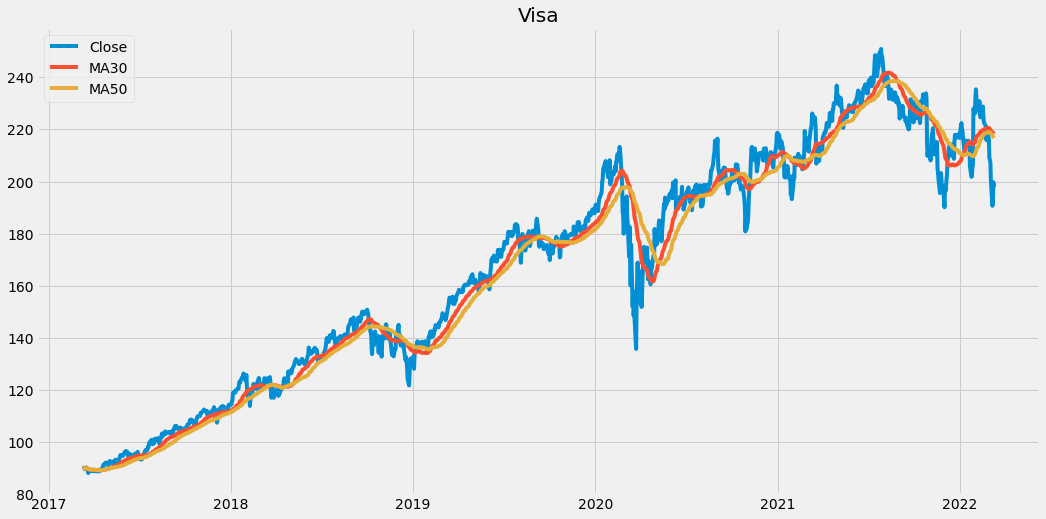

In [223]:
plt.figure(figsize=(16, 8))
plt.title("Visa")
plt.plot(V.index,V['Close'],label="Close")
plt.plot(V.index,V['MovingAvg_30'],label="MA30")
plt.plot(V.index,V['MovingAvg_50'],label="MA50")
plt.legend()

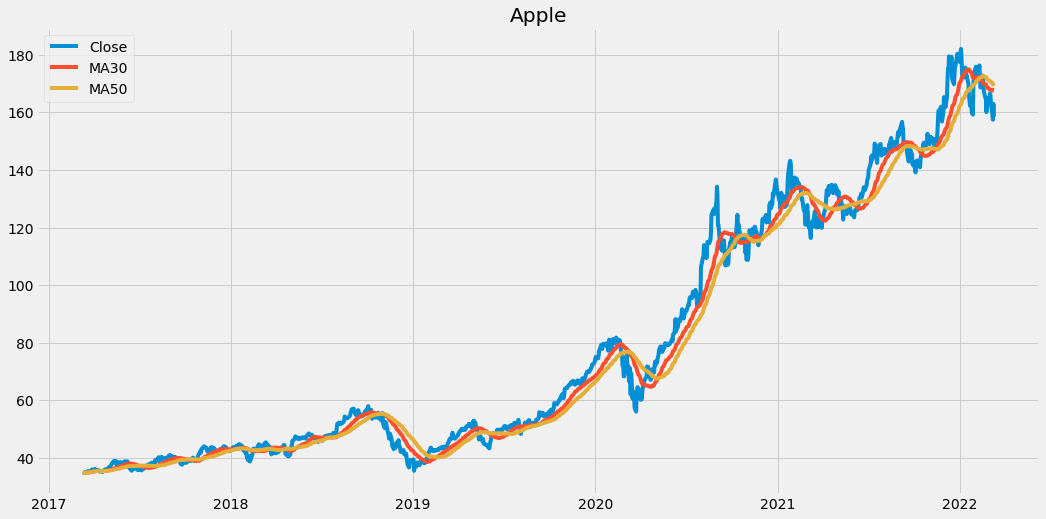

In [224]:
#AAPL
plt.figure(figsize=(16, 8))
plt.title("Apple")
plt.plot(AAPL.index,AAPL['Close'],label="Close")
plt.plot(AAPL.index,AAPL['MovingAvg_30'],label="MA30")
plt.plot(AAPL.index,AAPL['MovingAvg_50'],label="MA50")
plt.legend()

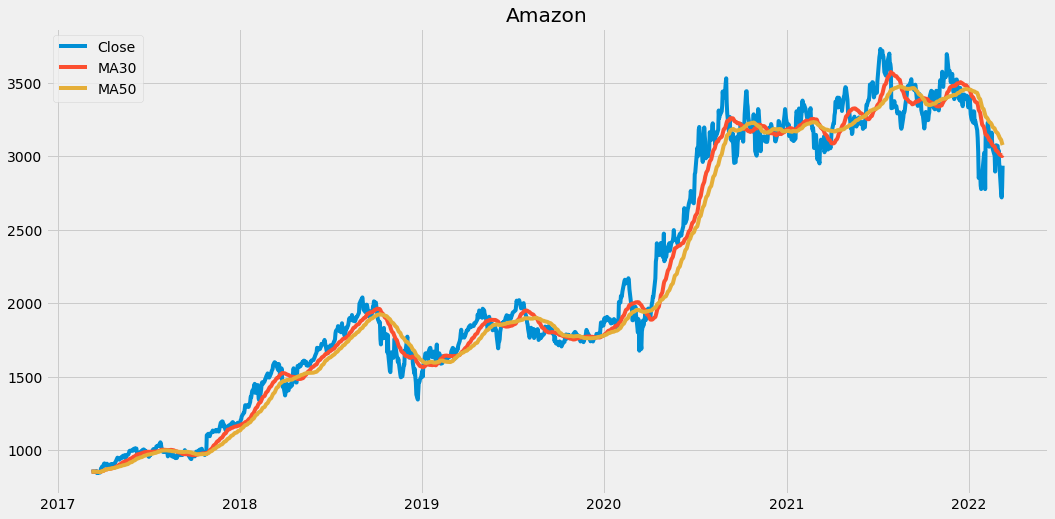

In [225]:
#AMZN
plt.figure(figsize=(16, 8))
plt.title("Amazon")
plt.plot(AMZN.index,AMZN['Close'],label="Close")
plt.plot(AMZN.index,AMZN['MovingAvg_30'],label="MA30")
plt.plot(AMZN.index,AMZN['MovingAvg_50'],label="MA50")
plt.legend()

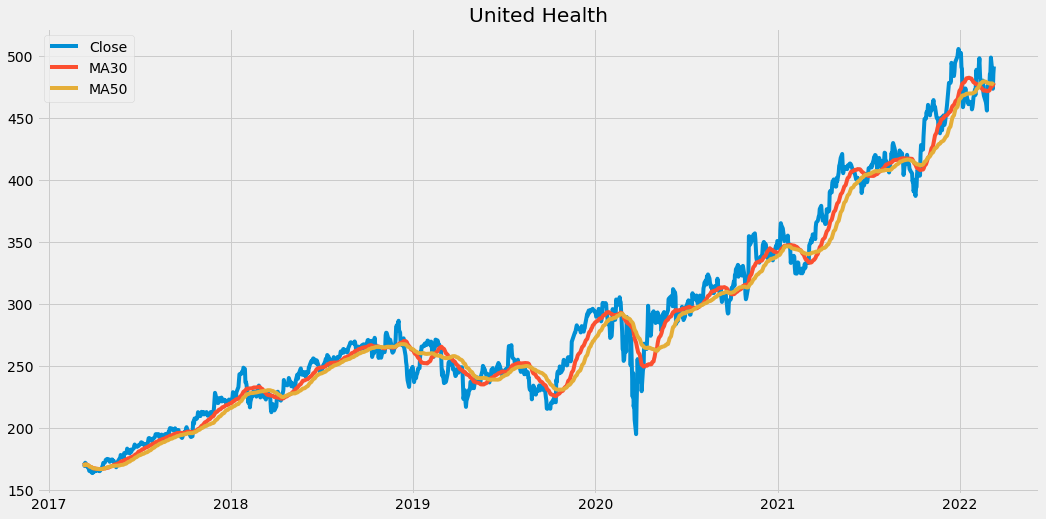

In [226]:
#UNH
plt.figure(figsize=(16, 8))
plt.title("United Health")
plt.plot(UNH.index,UNH['Close'],label="Close")
plt.plot(UNH.index,UNH['MovingAvg_30'],label="MA30")
plt.plot(UNH.index,UNH['MovingAvg_50'],label="MA50")
plt.legend()

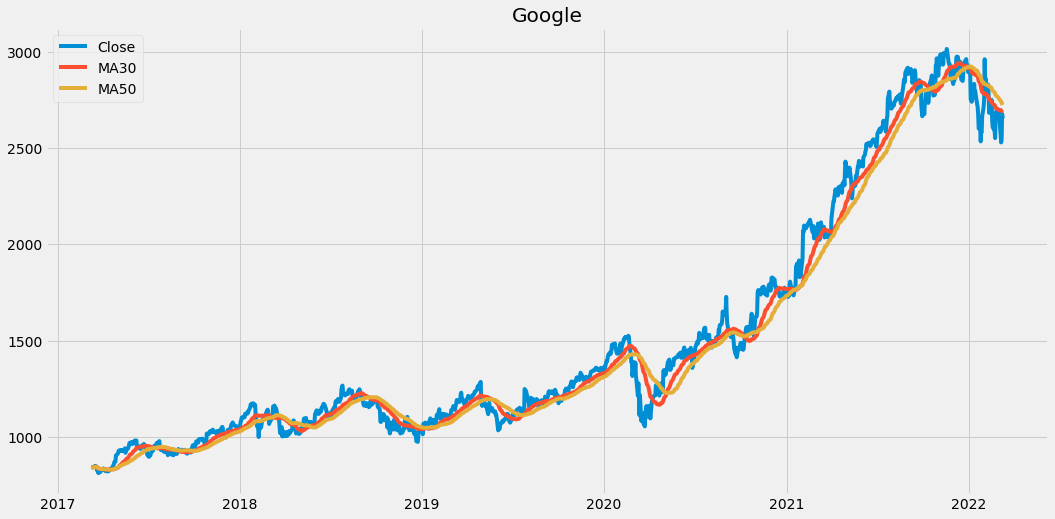

In [227]:
#GOOG
plt.figure(figsize=(16, 8))
plt.title("Google")
plt.plot(GOOG.index,GOOG['Close'],label="Close")
plt.plot(GOOG.index,GOOG['MovingAvg_30'],label="MA30")
plt.plot(GOOG.index,GOOG['MovingAvg_50'],label="MA50")
plt.legend()

# Wrapping up our Exploratory Data Analysis

In [228]:
#find out which stock can fluctuate the most within a day
print("The biggest price movement in a day")
print()
for data in company_list:
    print(max(data['company_name']))
    print(max(data['High-low']))
    print()

The biggest price movement in a day

APPLE
12.80999755859375

GOOGLE
184.31005859375

AMAZON
275.900146484375

UNITED HEALTH
31.509994506835938

VISA
17.330001831054688



In [229]:
#find out how many % growth in their company since the start of 2017 to end date
print("The % growth from the start to end date")
print()
for data in company_list:
    print(max(data['company_name']))
    print("The change is",((data['Close'].iloc[len(V)-1]-data['Close'].iloc[0])/data['Close'].iloc[0])*100,"%")
    print()

The % growth from the start to end date

APPLE
The change is 355.7136839667237 %

GOOGLE
The change is 214.6919528702194 %

AMAZON
The change is 244.45604743566932 %

UNITED HEALTH
The change is 189.11637533462198 %

VISA
The change is 120.62854543001156 %



## Finding out how many % growth in their company since the start of 2017 to their highest close price

In [38]:
print("The growth from the start to their peak")
for data in company_list:
    print(max(data['company_name']))
    print("From start to highest increase is",((max(data['Close'])-data['Close'].iloc[0])/data['Close'].iloc[0])*100,"%")
    for i in range(0,len(V)):
        if(data['Close'].iloc[i]==max(data['Close'])):
            print("Days took to hit peak:",i)
            print()
            break

The growth from the start to their peak
APPLE
From start to highest increase is 423.24276356257303 %
Days took to hit peak: 1213

GOOGLE
From start to highest increase is 257.4479610602579 %
Days took to hit peak: 1183

AMAZON
From start to highest increase is 337.7225694965276 %
Days took to hit peak: 1089

UNITED HEALTH
From start to highest increase is 197.43499192849717 %
Days took to hit peak: 1210

VISA
From start to highest increase is 179.6500426703611 %
Days took to hit peak: 1102



In [216]:
for data in company_list:
    print(max(data['company_name']))
    print("Highest Volume",max(data['Volume']))
    print()

APPLE
Highest Volume 426510000

GOOGLE
Highest Volume 6207000

AMAZON
Highest Volume 16565000

UNITED HEALTH
Highest Volume 27361400

VISA
Highest Volume 38379600



In [217]:
lt30Visa =0
lt50Visa =0
#AAPL
lt30Apple=0
lt50Apple=0
#AMZN
lt30Amazon=0
lt50Amazon=0
#UNH
lt30UnitedHealth=0
lt50UnitedHealth=0
#GOOG
lt30Google=0
lt50Google=0
for i in range(0,len(V)-1):
    if(V["Close"].iloc[i] < V['MovingAvg_30'].iloc[i]):
        lt30Visa+=1
    if(V["Close"].iloc[i] < V['MovingAvg_50'].iloc[i]):
        lt50Visa+=1
        
    if(AAPL["Close"].iloc[i] < AAPL['MovingAvg_30'].iloc[i]):
        lt30Apple+=1
    if(AAPL["Close"].iloc[i] < AAPL['MovingAvg_50'].iloc[i]):
        lt50Apple+=1
        
    if(AMZN["Close"].iloc[i] < AMZN['MovingAvg_30'].iloc[i]):
        lt30Amazon+=1
    if(AMZN["Close"].iloc[i] < AMZN['MovingAvg_50'].iloc[i]):
        lt50Amazon+=1
        
    if(UNH["Close"].iloc[i] < UNH['MovingAvg_30'].iloc[i]):
        lt30UnitedHealth+=1
    if(UNH["Close"].iloc[i] < UNH['MovingAvg_50'].iloc[i]):
        lt50UnitedHealth+=1

    if(GOOG["Close"].iloc[i] < GOOG['MovingAvg_30'].iloc[i]):
        lt30Google+=1
    if(GOOG["Close"].iloc[i] < GOOG['MovingAvg_50'].iloc[i]):
        lt50Google+=1
        

print("Total number of days:",len(V))
print()
print("Apple:")
print("Number of days below MA30:", lt30Apple)
print("Number of days below MA50:", lt50Apple)
print()
print("Google:")
print("Number of days below MA30:", lt30Google)
print("Number of days below MA50:", lt50Google)
print()
print("AMAZON:")
print("Number of days below MA30:", lt30Amazon)
print("Number of days below MA50:", lt50Amazon)
print()
print("United Health:")
print("Number of days below MA30:", lt30UnitedHealth)
print("Number of days below MA50:", lt50UnitedHealth)
print()
print("Visa:")
print("Number of days below MA30:", lt30Visa)
print("Number of days below MA50:", lt50Visa)

Total number of days: 1260

Apple:
Number of days below MA30: 407
Number of days below MA50: 352

Google:
Number of days below MA30: 426
Number of days below MA50: 384

AMAZON:
Number of days below MA30: 453
Number of days below MA50: 460

United Health:
Number of days below MA30: 439
Number of days below MA50: 382

Visa:
Number of days below MA30: 388
Number of days below MA50: 336


|-| Apple | Google | Amazon | United Health | Visa|
|-----|-----|-----|-----|-----|-----|
|# days < MA30|407|426|453|439|388|
|-----|-----|-----|-----|-----|-----|
|#days < MA50 |352|284|460|382|336|
|-----|-----|-----|-----|-----|-----|
|Max Vol Trade in 1 day|426,510,000|6,207,000|16,565,000|27,361,400|38,379,600|
|-----|-----|-----|-----|-----|-----|
|Growth from start to end| 355%| 214%|244%|189%|120%|
|-----|-----|-----|-----|-----|-----|
|Growth from start to peak|423%|257%|337%|197%|179%|
|Days taken to reach peak|1213|1183|1089|1210|1102|
|-----|-----|-----|-----|-----|-----|
|Biggest price movement|12|184|275|31|17|

### From the EDA observations, we have decided to choose to predict the stock prices for Apple. 
### Reasons are:
#### - Highest growth rate
#### - Minimal price fluctuation within a day
#### - Support from its moving averages is one of the lowest among the 5 stocks
#### - Highest trade volume

In [230]:
chosen_data = AAPL

## LSTM, Step 1: Preparation of Hyperparameter LSTM functions

In [231]:
def getLSTMTrainData(predictionDays: int, scaled_data, trainLength:int):
    train_data = scaled_data[0:trainLength, :]
    #Split the data into x_train and y_train data sets
    #Independent training variable, list of predictionDays closing prices that is going to be used to predict next day closing price in y_train
    x_train, y_train = [], []
    #Dependent training variable, list of next day closing prices corresponding to each list in x_train to be predicted by LSTM
    #Append past predictionDays values of the train_data
    for i in range(predictionDays, trainLength):
        x_train.append(train_data[i-predictionDays:i, 0]) 
        y_train.append(train_data[i,0]) 
    x_train, y_train = np.array(x_train), np.array(y_train)
    #Reshaping as LSTM requires 3d array
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    return x_train, y_train

In [232]:
def trainLSTMHyper(x_train, y_train, x_test, hiddenNeurons, denseSize, batchSize, epochNo):
    #Building the LSTM model
    model = Sequential()
    #First LSTM layer, giving it hiddenNeurons neurons and return_sequences=True as we need to add another LSTM layer
    model.add(LSTM(hiddenNeurons, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    #Second LSTM layer
    model.add(LSTM(hiddenNeurons, return_sequences=False))
    #Dense layer with denseSize neurons
    model.add(Dense(denseSize))
    #Dense layer with 1 neuron
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=batchSize, epochs=epochNo)
    predicted = model.predict(x_test)
    return predicted

In [233]:
def getLSTMTestData(prediction_days:int, dataset, scaled_data, trainLength:int):
    #Creating new array contained scaled values 
    test_data = scaled_data[trainLength - prediction_days: , :]
    x_test = []
    y_test = dataset[trainLength: , :] #Containing values our model want to predict
    for i in range(prediction_days, len(test_data)):
        x_test.append(test_data[i-prediction_days:i,0])#Append the past predictionDays values to test dataset
    #Converting into numpy array to use in LSTM model
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    return x_test, y_test

In [234]:
def evalPredicted(predicted, actual, modelName):
    MSE = met.mean_squared_error(actual, predicted)
    RMSE = math.sqrt(MSE)
    R2 = met.r2_score(actual,predicted)
    print('{modelName} Root Mean Squared Error is {rmse}'.format(modelName=modelName,rmse=RMSE))
    print('{modelName} R Squared is {r2}'.format(modelName=modelName,r2=R2))
    return RMSE, R2

In [239]:
def getLSTMTrainLength(data):
    closingPrices = data.filter(['Close'])
    dataset = closingPrices.values
    trainLength = math.ceil(len(dataset)*.8) #Math.ceil to round up
    return trainLength

In [240]:
def runLSTMHyper(data, stockName, trainLength, hiddenNeurons, denseSize, batchSize, epochNo, predictionDays):
    """
    @input (data: df/df-like data of one stock, stockName: string of that stock)
    @output RMSE value of predicted against actual Values
    """
    closingPrices = data.filter(['Close'])
    dataset = closingPrices.values
    #Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    #Computes min and max value to be used for scaling, then transforms the data based on the min max values
    scaled_data = scaler.fit_transform(dataset)
    #Create the training data set
    x_train, y_train = getLSTMTrainData(predictionDays, scaled_data, trainLength)
    x_test, y_test = getLSTMTestData(predictionDays, dataset, scaled_data, trainLength)
    predicted = trainLSTMHyper(x_train, y_train, x_test, hiddenNeurons, denseSize, batchSize, epochNo)
    predicted = scaler.inverse_transform(predicted)
    RMSE, R2 = evalPredicted(predicted, y_test, "LSTM")
    LSTM = data[trainLength:]
    LSTM['Predicted']=predicted
    LSTM.rename(columns={'Close':'Actual'},inplace = True)
    return RMSE, R2, LSTM

In [241]:
def getBestLSTM(LSTMRmseAll):
    minRMSE = LSTMRmseAll['RMSE'].min()
    minRMSERow = LSTMRmseAll['RMSE'].idxmin()
    bestLSTM = LSTMRmseAll.loc[minRMSERow,'LSTM']
    maxR2 = LSTMRmseAll['R^2'].max()
    return minRMSE, minRMSERow, bestLSTM, maxR2

In [242]:
def getBestHyperparameters(LSTMRmseAll):
    bestHiddenNeurons = LSTMRmseAll.iloc[minRMSERow,0]
    bestDenseSize = LSTMRmseAll.iloc[minRMSERow,1]
    bestPredictionDays = LSTMRmseAll.iloc[minRMSERow,2]
    bestEpochNo = LSTMRmseAll.iloc[minRMSERow,3]
    bestBatchSize = LSTMRmseAll.iloc[minRMSERow,4]
    return bestHiddenNeurons, bestDenseSize, bestPredictionDays, bestEpochNo, bestBatchSize

In [243]:
def getWorstLSTM(LSTMRmseAll):
    maxRMSE = LSTMRmseAll['RMSE'].max()
    maxRMSERow = LSTMRmseAll['RMSE'].idxmax()
    worstLSTM = LSTMRmseAll.loc[maxRMSERow,'LSTM']
    minR2 = LSTMRmseAll['R^2'].min()
    return maxRMSE, maxRMSERow, worstLSTM, minR2

In [244]:
def plotModelResultNAIVE(bestLSTM, name):
    plt.figure(figsize=(16,8))
    plt.title("{name} Close Price".format(name=name))
    plt.xlabel('Date',fontsize=18)
    plt.ylabel("{name} Close Price USD ($)".format(name=name,fontsize=18))
    plt.plot(bestLSTM[['Actual','Predicted']])
    plt.legend(['Actual Price','Predicted Price'])

In [251]:
def plotModelResult(comparePredictions, name):
    plt.figure(figsize=(16,8))
    plt.title("{name} Close Price".format(name=name))
    plt.xlabel('Date',fontsize=18)
    plt.ylabel("{name} Close Price USD ($)".format(name=name,fontsize=18))
    plt.plot(comparePredictions[['Actual','Predicted_SWA']])
    plt.plot(comparePredictions['Predicted_Naive'])
    plt.legend(['Actual Price','Predicted_SWA', 'Predicted_Naive'])

## LSTM, Step 2: Running Hyperameter Tuning 
### (TO PROF: DO NOT RUN, data is already written into Hyperparamter_Tuning.csv file, only run the 2 lines indicated in Step 2)

In [57]:
trainLength = getLSTMTrainLength(chosen_data)

LSTMRmseAll = pd.DataFrame(columns=['hiddenNeurons','denseSize', 'predictionDays', 'epochNo', 'batchSize'])

hiddenNeurons = [20, 40, 60, 80, 100]
denseSize = [25, 50] 
batchSize = [32, 64, 128] 
epochNo = [50, 100, 150] 
predictionDays = [55, 60, 65] 

k=0

for neurons in hiddenNeurons:
    for dense in denseSize:
        for prediction in predictionDays:
            for epoch in epochNo:
                for batch_size in batchSize:
                    k = k+1
                    print("Run no.:",k)
                    from tensorflow.keras.layers import Dense, LSTM, Dropout #Need to include, else get error
                    LstmRMSE, LstmR2, LSTM = runLSTMHyper(chosen_data, "AAPL", trainLength, neurons, dense, batch_size, epoch, prediction)
                    tempDF = pd.DataFrame([[neurons, dense, prediction, epoch, batch_size, LstmRMSE, LstmR2, LSTM[['Actual','Predicted']]]],
                    columns=['hiddenNeurons','denseSize', 'predictionDays', 'epochNo', 'batchSize', 'RMSE', 'R^2', 'LSTM'])
                    LSTMRmseAll = pd.concat([LSTMRmseAll, tempDF], ignore_index=True)
                    
LSTMRmseAll.to_csv('Hyperparameter_Tuning.csv')

Run no.: 1
Epoch 1/50
30/30 [==============================] - 6s 28ms/step - loss: 0.0111
Epoch 2/50
30/30 [==============================] - 1s 27ms/step - loss: 0.0013
Epoch 3/50
30/30 [==============================] - 1s 26ms/step - loss: 7.9002e-04
Epoch 4/50
30/30 [==============================] - 1s 27ms/step - loss: 7.4754e-04
Epoch 5/50
30/30 [==============================] - 1s 27ms/step - loss: 7.1022e-04
Epoch 6/50
30/30 [==============================] - 1s 27ms/step - loss: 6.9978e-04
Epoch 7/50
30/30 [==============================] - 2s 53ms/step - loss: 6.1649e-04
Epoch 8/50
30/30 [==============================] - 2s 70ms/step - loss: 6.2537e-04
Epoch 9/50
30/30 [==============================] - 2s 70ms/step - loss: 5.8396e-04
Epoch 10/50
30/30 [==============================] - 2s 69ms/step - loss: 5.5249e-04
Epoch 11/50
30/30 [==============================] - 2s 69ms/step - loss: 6.0337e-04
Epoch 12/50
30/30 [==============================] - 2s 68ms/step - los

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 6s 70ms/step - loss: 0.0254
Epoch 2/50
15/15 [==============================] - 2s 103ms/step - loss: 0.0046
Epoch 3/50
15/15 [==============================] - 2s 124ms/step - loss: 0.0011
Epoch 4/50
15/15 [==============================] - 2s 123ms/step - loss: 6.3351e-04
Epoch 5/50
15/15 [==============================] - 2s 126ms/step - loss: 6.0776e-04
Epoch 6/50
15/15 [==============================] - 2s 123ms/step - loss: 5.5190e-04
Epoch 7/50
15/15 [==============================] - 2s 115ms/step - loss: 5.3975e-04
Epoch 8/50
15/15 [==============================] - 2s 120ms/step - loss: 5.3936e-04
Epoch 9/50
15/15 [==============================] - 2s 118ms/step - loss: 5.3751e-04
Epoch 10/50
15/15 [==============================] - 2s 122ms/step - loss: 5.3611e-04
Epoch 11/50
15/15 [==============================] - 2s 115ms/step - loss: 5.4822e-04
Epoch 12/50
15/15 [==============================] - 2s 118ms/step - loss: 5

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 84ms/step - loss: 0.0867
Epoch 2/50
8/8 [==============================] - 1s 107ms/step - loss: 0.0262
Epoch 3/50
8/8 [==============================] - 1s 117ms/step - loss: 0.0158
Epoch 4/50
8/8 [==============================] - 1s 131ms/step - loss: 0.0051
Epoch 5/50
8/8 [==============================] - 1s 129ms/step - loss: 0.0014
Epoch 6/50
8/8 [==============================] - 1s 134ms/step - loss: 0.0017
Epoch 7/50
8/8 [==============================] - 1s 159ms/step - loss: 0.0011
Epoch 8/50
8/8 [==============================] - 1s 131ms/step - loss: 8.3873e-04
Epoch 9/50
8/8 [==============================] - 1s 119ms/step - loss: 7.9556e-04
Epoch 10/50
8/8 [==============================] - 1s 132ms/step - loss: 7.0333e-04
Epoch 11/50
8/8 [==============================] - 1s 125ms/step - loss: 6.8900e-04
Epoch 12/50
8/8 [==============================] - 1s 124ms/step - loss: 6.7348e-04
Epoch 13/50
8/8 [=============

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 7s 81ms/step - loss: 0.0174
Epoch 2/100
30/30 [==============================] - 3s 110ms/step - loss: 8.6259e-04
Epoch 3/100
30/30 [==============================] - 3s 114ms/step - loss: 6.4998e-04
Epoch 4/100
30/30 [==============================] - 3s 110ms/step - loss: 5.5634e-04
Epoch 5/100
30/30 [==============================] - 3s 107ms/step - loss: 5.4216e-04
Epoch 6/100
30/30 [==============================] - 3s 109ms/step - loss: 5.2672e-04
Epoch 7/100
30/30 [==============================] - 3s 104ms/step - loss: 5.0762e-04
Epoch 8/100
30/30 [==============================] - 3s 110ms/step - loss: 4.8298e-04
Epoch 9/100
30/30 [==============================] - 3s 106ms/step - loss: 4.9799e-04
Epoch 10/100
30/30 [==============================] - 3s 105ms/step - loss: 4.6737e-04
Epoch 11/100
30/30 [==============================] - 3s 106ms/step - loss: 4.6405e-04
Epoch 12/100
30/30 [==============================] - 3s 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 6s 74ms/step - loss: 0.0251
Epoch 2/100
15/15 [==============================] - 2s 106ms/step - loss: 0.0030
Epoch 3/100
15/15 [==============================] - 2s 124ms/step - loss: 0.0015
Epoch 4/100
15/15 [==============================] - 2s 125ms/step - loss: 8.6798e-04
Epoch 5/100
15/15 [==============================] - 2s 123ms/step - loss: 7.9533e-04
Epoch 6/100
15/15 [==============================] - 2s 129ms/step - loss: 7.3606e-04
Epoch 7/100
15/15 [==============================] - 2s 116ms/step - loss: 7.1536e-04
Epoch 8/100
15/15 [==============================] - 2s 123ms/step - loss: 6.6687e-04
Epoch 9/100
15/15 [==============================] - 2s 123ms/step - loss: 6.7017e-04
Epoch 10/100
15/15 [==============================] - 2s 120ms/step - loss: 6.2375e-04
Epoch 11/100
15/15 [==============================] - 2s 119ms/step - loss: 6.0481e-04
Epoch 12/100
15/15 [==============================] - 2s 118ms/st

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 6s 82ms/step - loss: 0.0154
Epoch 2/100
8/8 [==============================] - 1s 106ms/step - loss: 0.0044
Epoch 3/100
8/8 [==============================] - 1s 120ms/step - loss: 0.0018
Epoch 4/100
8/8 [==============================] - 1s 147ms/step - loss: 0.0012
Epoch 5/100
8/8 [==============================] - 1s 129ms/step - loss: 7.8041e-04
Epoch 6/100
8/8 [==============================] - 1s 132ms/step - loss: 6.4809e-04
Epoch 7/100
8/8 [==============================] - 1s 140ms/step - loss: 6.3627e-04
Epoch 8/100
8/8 [==============================] - 1s 127ms/step - loss: 6.1543e-04
Epoch 9/100
8/8 [==============================] - 1s 149ms/step - loss: 5.9975e-04
Epoch 10/100
8/8 [==============================] - 1s 128ms/step - loss: 5.8987e-04
Epoch 11/100
8/8 [==============================] - 1s 157ms/step - loss: 5.8394e-04
Epoch 12/100
8/8 [==============================] - 1s 136ms/step - loss: 5.7458e-04
Epoch 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 7s 91ms/step - loss: 0.0089
Epoch 2/150
30/30 [==============================] - 3s 113ms/step - loss: 8.5140e-04
Epoch 3/150
30/30 [==============================] - 3s 115ms/step - loss: 5.6239e-04
Epoch 4/150
30/30 [==============================] - 3s 112ms/step - loss: 5.4052e-04
Epoch 5/150
30/30 [==============================] - 3s 95ms/step - loss: 5.0387e-04
Epoch 6/150
30/30 [==============================] - 3s 115ms/step - loss: 5.1758e-04
Epoch 7/150
30/30 [==============================] - 3s 109ms/step - loss: 5.1554e-04
Epoch 8/150
30/30 [==============================] - 3s 109ms/step - loss: 4.9062e-04
Epoch 9/150
30/30 [==============================] - 3s 104ms/step - loss: 4.3548e-04
Epoch 10/150
30/30 [==============================] - 3s 104ms/step - loss: 4.4920e-04
Epoch 11/150
30/30 [==============================] - 3s 107ms/step - loss: 4.2060e-04
Epoch 12/150
30/30 [==============================] - 3s 1

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 6s 82ms/step - loss: 0.0275
Epoch 2/150
15/15 [==============================] - 2s 118ms/step - loss: 0.0044
Epoch 3/150
15/15 [==============================] - 2s 130ms/step - loss: 0.0011
Epoch 4/150
15/15 [==============================] - 2s 123ms/step - loss: 7.2399e-04
Epoch 5/150
15/15 [==============================] - 2s 123ms/step - loss: 6.6499e-04
Epoch 6/150
15/15 [==============================] - 2s 117ms/step - loss: 6.1110e-04
Epoch 7/150
15/15 [==============================] - 2s 119ms/step - loss: 6.0789e-04
Epoch 8/150
15/15 [==============================] - 2s 116ms/step - loss: 5.8809e-04
Epoch 9/150
15/15 [==============================] - 2s 124ms/step - loss: 6.0929e-04
Epoch 10/150
15/15 [==============================] - 2s 120ms/step - loss: 5.5704e-04
Epoch 11/150
15/15 [==============================] - 2s 125ms/step - loss: 5.7791e-04
Epoch 12/150
15/15 [==============================] - 2s 124ms/st

Epoch 95/150
15/15 [==============================] - 2s 122ms/step - loss: 2.3212e-04
Epoch 96/150
15/15 [==============================] - 2s 119ms/step - loss: 2.8344e-04
Epoch 97/150
15/15 [==============================] - 2s 116ms/step - loss: 2.5990e-04
Epoch 98/150
15/15 [==============================] - 2s 119ms/step - loss: 2.2754e-04
Epoch 99/150
15/15 [==============================] - 2s 127ms/step - loss: 2.3104e-04
Epoch 100/150
15/15 [==============================] - 2s 117ms/step - loss: 2.2167e-04
Epoch 101/150
15/15 [==============================] - 2s 122ms/step - loss: 2.3319e-04
Epoch 102/150
15/15 [==============================] - 2s 120ms/step - loss: 2.2356e-04
Epoch 103/150
15/15 [==============================] - 2s 119ms/step - loss: 2.1522e-04
Epoch 104/150
15/15 [==============================] - 2s 117ms/step - loss: 2.1127e-04
Epoch 105/150
15/15 [==============================] - 2s 115ms/step - loss: 2.1415e-04
Epoch 106/150
15/15 [================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 5s 72ms/step - loss: 0.0443
Epoch 2/150
8/8 [==============================] - 1s 115ms/step - loss: 0.0152
Epoch 3/150
8/8 [==============================] - 1s 127ms/step - loss: 0.0063
Epoch 4/150
8/8 [==============================] - 1s 134ms/step - loss: 0.0017
Epoch 5/150
8/8 [==============================] - 1s 139ms/step - loss: 0.0017
Epoch 6/150
8/8 [==============================] - 1s 130ms/step - loss: 9.1009e-04
Epoch 7/150
8/8 [==============================] - 1s 141ms/step - loss: 8.1510e-04
Epoch 8/150
8/8 [==============================] - 1s 141ms/step - loss: 7.4036e-04
Epoch 9/150
8/8 [==============================] - 1s 135ms/step - loss: 6.5788e-04
Epoch 10/150
8/8 [==============================] - 1s 138ms/step - loss: 6.5003e-04
Epoch 11/150
8/8 [==============================] - 1s 130ms/step - loss: 6.2819e-04
Epoch 12/150
8/8 [==============================] - 1s 135ms/step - loss: 6.0892e-04
Epoch 13/1

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 8s 91ms/step - loss: 0.0174
Epoch 2/50
30/30 [==============================] - 4s 124ms/step - loss: 0.0011
Epoch 3/50
30/30 [==============================] - 4s 116ms/step - loss: 6.6407e-04
Epoch 4/50
30/30 [==============================] - 3s 114ms/step - loss: 6.0783e-04
Epoch 5/50
30/30 [==============================] - 4s 122ms/step - loss: 6.3307e-04
Epoch 6/50
30/30 [==============================] - 3s 115ms/step - loss: 5.5459e-04
Epoch 7/50
30/30 [==============================] - 3s 104ms/step - loss: 5.3312e-04
Epoch 8/50
30/30 [==============================] - 3s 115ms/step - loss: 5.1889e-04
Epoch 9/50
30/30 [==============================] - 3s 109ms/step - loss: 5.2939e-04
Epoch 10/50
30/30 [==============================] - 3s 110ms/step - loss: 5.1467e-04
Epoch 11/50
30/30 [==============================] - 3s 111ms/step - loss: 4.9075e-04
Epoch 12/50
30/30 [==============================] - 4s 118ms/step - los

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 6s 75ms/step - loss: 0.0456
Epoch 2/50
15/15 [==============================] - 2s 119ms/step - loss: 0.0105
Epoch 3/50
15/15 [==============================] - 2s 132ms/step - loss: 0.0018
Epoch 4/50
15/15 [==============================] - 2s 131ms/step - loss: 9.9955e-04
Epoch 5/50
15/15 [==============================] - 2s 128ms/step - loss: 8.3804e-04
Epoch 6/50
15/15 [==============================] - 2s 131ms/step - loss: 7.6891e-04
Epoch 7/50
15/15 [==============================] - 2s 132ms/step - loss: 7.3223e-04
Epoch 8/50
15/15 [==============================] - 2s 124ms/step - loss: 7.0137e-04
Epoch 9/50
15/15 [==============================] - 2s 126ms/step - loss: 6.8062e-04
Epoch 10/50
15/15 [==============================] - 2s 126ms/step - loss: 6.5987e-04
Epoch 11/50
15/15 [==============================] - 2s 126ms/step - loss: 6.6049e-04
Epoch 12/50
15/15 [==============================] - 2s 117ms/step - loss: 6

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 71ms/step - loss: 0.0502
Epoch 2/50
8/8 [==============================] - 1s 116ms/step - loss: 0.0176
Epoch 3/50
8/8 [==============================] - 1s 132ms/step - loss: 0.0096
Epoch 4/50
8/8 [==============================] - 1s 149ms/step - loss: 0.0034
Epoch 5/50
8/8 [==============================] - 1s 157ms/step - loss: 0.0013
Epoch 6/50
8/8 [==============================] - 1s 163ms/step - loss: 0.0011
Epoch 7/50
8/8 [==============================] - 1s 147ms/step - loss: 7.8082e-04
Epoch 8/50
8/8 [==============================] - 1s 134ms/step - loss: 7.7120e-04
Epoch 9/50
8/8 [==============================] - 1s 145ms/step - loss: 7.1941e-04
Epoch 10/50
8/8 [==============================] - 1s 135ms/step - loss: 6.7429e-04
Epoch 11/50
8/8 [==============================] - 1s 148ms/step - loss: 6.4877e-04
Epoch 12/50
8/8 [==============================] - 1s 136ms/step - loss: 6.0612e-04
Epoch 13/50
8/8 [=========

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 8s 90ms/step - loss: 0.0086
Epoch 2/100
30/30 [==============================] - 4s 122ms/step - loss: 8.3504e-04
Epoch 3/100
30/30 [==============================] - 3s 115ms/step - loss: 6.2483e-04 0s - loss: 6.2483e-0
Epoch 4/100
30/30 [==============================] - 4s 116ms/step - loss: 5.5154e-04
Epoch 5/100
30/30 [==============================] - 3s 116ms/step - loss: 5.2895e-04
Epoch 6/100
30/30 [==============================] - 3s 111ms/step - loss: 4.9107e-04
Epoch 7/100
30/30 [==============================] - 4s 117ms/step - loss: 4.8560e-04
Epoch 8/100
30/30 [==============================] - 3s 113ms/step - loss: 4.6619e-04
Epoch 9/100
30/30 [==============================] - 3s 109ms/step - loss: 4.4136e-04
Epoch 10/100
30/30 [==============================] - 3s 113ms/step - loss: 4.4199e-04
Epoch 11/100
30/30 [==============================] - 3s 111ms/step - loss: 4.9624e-04
Epoch 12/100
30/30 [================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 6s 84ms/step - loss: 0.0451
Epoch 2/100
15/15 [==============================] - 2s 136ms/step - loss: 0.0079
Epoch 3/100
15/15 [==============================] - 2s 135ms/step - loss: 0.0015
Epoch 4/100
15/15 [==============================] - 2s 129ms/step - loss: 8.9915e-04
Epoch 5/100
15/15 [==============================] - 2s 128ms/step - loss: 7.7321e-04
Epoch 6/100
15/15 [==============================] - 2s 127ms/step - loss: 7.0919e-04
Epoch 7/100
15/15 [==============================] - 2s 122ms/step - loss: 6.8389e-04
Epoch 8/100
15/15 [==============================] - 2s 128ms/step - loss: 6.6202e-04
Epoch 9/100
15/15 [==============================] - 2s 128ms/step - loss: 6.2278e-04
Epoch 10/100
15/15 [==============================] - 2s 133ms/step - loss: 6.0285e-04
Epoch 11/100
15/15 [==============================] - 2s 129ms/step - loss: 5.7789e-04
Epoch 12/100
15/15 [==============================] - 2s 119ms/st

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 6s 77ms/step - loss: 0.0314
Epoch 2/100
8/8 [==============================] - 1s 111ms/step - loss: 0.0111
Epoch 3/100
8/8 [==============================] - 1s 137ms/step - loss: 0.0038
Epoch 4/100
8/8 [==============================] - 1s 142ms/step - loss: 0.0016
Epoch 5/100
8/8 [==============================] - 1s 138ms/step - loss: 0.0012
Epoch 6/100
8/8 [==============================] - 1s 146ms/step - loss: 8.2132e-04
Epoch 7/100
8/8 [==============================] - 1s 141ms/step - loss: 6.2705e-04
Epoch 8/100
8/8 [==============================] - 1s 140ms/step - loss: 5.9965e-04
Epoch 9/100
8/8 [==============================] - 1s 138ms/step - loss: 5.7892e-04
Epoch 10/100
8/8 [==============================] - 1s 155ms/step - loss: 5.4780e-04
Epoch 11/100
8/8 [==============================] - 1s 152ms/step - loss: 5.4005e-04
Epoch 12/100
8/8 [==============================] - 1s 138ms/step - loss: 5.3289e-04
Epoch 13/1

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 8s 106ms/step - loss: 0.0061
Epoch 2/150
30/30 [==============================] - 4s 117ms/step - loss: 8.6164e-04
Epoch 3/150
30/30 [==============================] - 3s 116ms/step - loss: 6.3299e-04
Epoch 4/150
30/30 [==============================] - 3s 114ms/step - loss: 6.0774e-04
Epoch 5/150
30/30 [==============================] - 3s 116ms/step - loss: 5.9977e-04
Epoch 6/150
30/30 [==============================] - 4s 117ms/step - loss: 6.1380e-04
Epoch 7/150
30/30 [==============================] - 3s 112ms/step - loss: 6.0573e-04
Epoch 8/150
30/30 [==============================] - 3s 114ms/step - loss: 5.4989e-04
Epoch 9/150
30/30 [==============================] - 3s 111ms/step - loss: 5.3297e-04 0s - loss: 5.42
Epoch 10/150
30/30 [==============================] - 3s 113ms/step - loss: 5.7782e-04
Epoch 11/150
30/30 [==============================] - 3s 115ms/step - loss: 5.0987e-04
Epoch 12/150
30/30 [====================

Epoch 95/150
30/30 [==============================] - 3s 111ms/step - loss: 1.9875e-04
Epoch 96/150
30/30 [==============================] - 3s 114ms/step - loss: 1.4373e-04
Epoch 97/150
30/30 [==============================] - 4s 117ms/step - loss: 1.7357e-04
Epoch 98/150
30/30 [==============================] - 3s 116ms/step - loss: 1.5280e-04
Epoch 99/150
30/30 [==============================] - 3s 116ms/step - loss: 1.4973e-04
Epoch 100/150
30/30 [==============================] - 3s 113ms/step - loss: 1.4698e-04
Epoch 101/150
30/30 [==============================] - 4s 118ms/step - loss: 1.4978e-04
Epoch 102/150
30/30 [==============================] - 3s 116ms/step - loss: 1.6553e-04
Epoch 103/150
30/30 [==============================] - 3s 115ms/step - loss: 1.5390e-04
Epoch 104/150
30/30 [==============================] - 4s 118ms/step - loss: 1.3999e-04
Epoch 105/150
30/30 [==============================] - 3s 112ms/step - loss: 1.3352e-04
Epoch 106/150
30/30 [================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 7s 82ms/step - loss: 0.0381
Epoch 2/150
15/15 [==============================] - 2s 122ms/step - loss: 0.0079
Epoch 3/150
15/15 [==============================] - 2s 134ms/step - loss: 0.0015
Epoch 4/150
15/15 [==============================] - 2s 133ms/step - loss: 8.6164e-04
Epoch 5/150
15/15 [==============================] - 2s 130ms/step - loss: 7.5219e-04
Epoch 6/150
15/15 [==============================] - 2s 130ms/step - loss: 6.9111e-04
Epoch 7/150
15/15 [==============================] - 2s 131ms/step - loss: 6.6962e-04
Epoch 8/150
15/15 [==============================] - 2s 131ms/step - loss: 6.2540e-04
Epoch 9/150
15/15 [==============================] - 2s 128ms/step - loss: 5.9057e-04
Epoch 10/150
15/15 [==============================] - 2s 123ms/step - loss: 5.7860e-04
Epoch 11/150
15/15 [==============================] - 2s 128ms/step - loss: 5.5113e-04
Epoch 12/150
15/15 [==============================] - 2s 129ms/st

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 5s 77ms/step - loss: 0.0275
Epoch 2/150
8/8 [==============================] - 1s 115ms/step - loss: 0.0096
Epoch 3/150
8/8 [==============================] - 1s 148ms/step - loss: 0.0028
Epoch 4/150
8/8 [==============================] - 1s 159ms/step - loss: 0.0011
Epoch 5/150
8/8 [==============================] - 1s 142ms/step - loss: 0.0012
Epoch 6/150
8/8 [==============================] - 1s 144ms/step - loss: 7.9071e-04
Epoch 7/150
8/8 [==============================] - 1s 137ms/step - loss: 6.2249e-04
Epoch 8/150
8/8 [==============================] - 1s 149ms/step - loss: 6.1451e-04
Epoch 9/150
8/8 [==============================] - 1s 164ms/step - loss: 5.9453e-04
Epoch 10/150
8/8 [==============================] - 1s 153ms/step - loss: 5.7266e-04
Epoch 11/150
8/8 [==============================] - 1s 160ms/step - loss: 5.5801e-04
Epoch 12/150
8/8 [==============================] - 1s 135ms/step - loss: 5.5697e-04
Epoch 13/1

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 8s 100ms/step - loss: 0.0140
Epoch 2/50
30/30 [==============================] - 4s 128ms/step - loss: 8.8145e-04
Epoch 3/50
30/30 [==============================] - 4s 122ms/step - loss: 5.8335e-04
Epoch 4/50
30/30 [==============================] - 4s 120ms/step - loss: 5.7508e-04
Epoch 5/50
30/30 [==============================] - 4s 122ms/step - loss: 5.5388e-04
Epoch 6/50
30/30 [==============================] - 4s 120ms/step - loss: 5.0307e-04
Epoch 7/50
30/30 [==============================] - 4s 120ms/step - loss: 4.9129e-04
Epoch 8/50
30/30 [==============================] - 4s 121ms/step - loss: 4.6282e-04
Epoch 9/50
30/30 [==============================] - 4s 123ms/step - loss: 4.5069e-04
Epoch 10/50
30/30 [==============================] - 4s 123ms/step - loss: 4.5067e-04
Epoch 11/50
30/30 [==============================] - 4s 121ms/step - loss: 4.3947e-04
Epoch 12/50
30/30 [==============================] - 4s 121ms/step 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 7s 88ms/step - loss: 0.0275
Epoch 2/50
15/15 [==============================] - 2s 132ms/step - loss: 0.0046
Epoch 3/50
15/15 [==============================] - 2s 141ms/step - loss: 0.0011
Epoch 4/50
15/15 [==============================] - 2s 135ms/step - loss: 6.8773e-04
Epoch 5/50
15/15 [==============================] - 2s 137ms/step - loss: 6.2783e-04
Epoch 6/50
15/15 [==============================] - 2s 131ms/step - loss: 6.0323e-04
Epoch 7/50
15/15 [==============================] - 2s 138ms/step - loss: 5.9706e-04
Epoch 8/50
15/15 [==============================] - 2s 139ms/step - loss: 5.9663e-04
Epoch 9/50
15/15 [==============================] - 2s 132ms/step - loss: 5.9554e-04
Epoch 10/50
15/15 [==============================] - 2s 133ms/step - loss: 6.0905e-04
Epoch 11/50
15/15 [==============================] - 2s 132ms/step - loss: 6.3016e-04
Epoch 12/50
15/15 [==============================] - 2s 131ms/step - loss: 5

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 5s 73ms/step - loss: 0.0365
Epoch 2/50
8/8 [==============================] - 1s 129ms/step - loss: 0.0104
Epoch 3/50
8/8 [==============================] - 1s 153ms/step - loss: 0.0035
Epoch 4/50
8/8 [==============================] - 1s 161ms/step - loss: 0.0017
Epoch 5/50
8/8 [==============================] - 1s 162ms/step - loss: 0.0010
Epoch 6/50
8/8 [==============================] - 1s 157ms/step - loss: 8.3357e-04
Epoch 7/50
8/8 [==============================] - 1s 147ms/step - loss: 6.4939e-04
Epoch 8/50
8/8 [==============================] - 1s 154ms/step - loss: 6.3044e-04
Epoch 9/50
8/8 [==============================] - 1s 149ms/step - loss: 5.9961e-04
Epoch 10/50
8/8 [==============================] - 1s 155ms/step - loss: 5.8308e-04
Epoch 11/50
8/8 [==============================] - 1s 149ms/step - loss: 5.7970e-04
Epoch 12/50
8/8 [==============================] - 1s 146ms/step - loss: 5.7517e-04
Epoch 13/50
8/8 [=====

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 8s 103ms/step - loss: 0.0174
Epoch 2/100
30/30 [==============================] - 4s 125ms/step - loss: 0.0011
Epoch 3/100
30/30 [==============================] - 4s 123ms/step - loss: 6.5996e-04
Epoch 4/100
30/30 [==============================] - 4s 130ms/step - loss: 6.2451e-04
Epoch 5/100
30/30 [==============================] - 4s 121ms/step - loss: 5.4594e-04
Epoch 6/100
30/30 [==============================] - 3s 110ms/step - loss: 5.3491e-04
Epoch 7/100
30/30 [==============================] - 4s 124ms/step - loss: 4.9901e-04
Epoch 8/100
30/30 [==============================] - 3s 111ms/step - loss: 4.6896e-04
Epoch 9/100
30/30 [==============================] - 4s 123ms/step - loss: 4.5051e-04
Epoch 10/100
30/30 [==============================] - 4s 117ms/step - loss: 4.3810e-04
Epoch 11/100
30/30 [==============================] - 4s 122ms/step - loss: 4.3825e-04
Epoch 12/100
30/30 [==============================] - 4s 122

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 9s 87ms/step - loss: 0.0249
Epoch 2/100
15/15 [==============================] - 2s 124ms/step - loss: 0.0042
Epoch 3/100
15/15 [==============================] - 2s 141ms/step - loss: 0.0014
Epoch 4/100
15/15 [==============================] - 2s 133ms/step - loss: 9.2138e-04
Epoch 5/100
15/15 [==============================] - 2s 132ms/step - loss: 8.3504e-04
Epoch 6/100
15/15 [==============================] - 2s 127ms/step - loss: 7.3142e-04
Epoch 7/100
15/15 [==============================] - 2s 134ms/step - loss: 6.9220e-04
Epoch 8/100
15/15 [==============================] - 2s 137ms/step - loss: 6.6694e-04
Epoch 9/100
15/15 [==============================] - 2s 134ms/step - loss: 6.3930e-04
Epoch 10/100
15/15 [==============================] - 2s 136ms/step - loss: 6.3490e-04
Epoch 11/100
15/15 [==============================] - 2s 137ms/step - loss: 6.0501e-04
Epoch 12/100
15/15 [==============================] - 2s 138ms/st

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 5s 91ms/step - loss: 0.0264
Epoch 2/100
8/8 [==============================] - 1s 149ms/step - loss: 0.0083
Epoch 3/100
8/8 [==============================] - 1s 148ms/step - loss: 0.0022
Epoch 4/100
8/8 [==============================] - 1s 150ms/step - loss: 0.0011
Epoch 5/100
8/8 [==============================] - 1s 148ms/step - loss: 0.0013
Epoch 6/100
8/8 [==============================] - 1s 175ms/step - loss: 7.1813e-04
Epoch 7/100
8/8 [==============================] - 1s 165ms/step - loss: 5.8307e-04
Epoch 8/100
8/8 [==============================] - 1s 145ms/step - loss: 5.6453e-04
Epoch 9/100
8/8 [==============================] - 1s 158ms/step - loss: 5.1702e-04
Epoch 10/100
8/8 [==============================] - 1s 159ms/step - loss: 5.2086e-04
Epoch 11/100
8/8 [==============================] - 1s 148ms/step - loss: 4.9873e-04
Epoch 12/100
8/8 [==============================] - 1s 142ms/step - loss: 4.8934e-04
Epoch 13/1

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 8s 98ms/step - loss: 0.0166
Epoch 2/150
30/30 [==============================] - 4s 133ms/step - loss: 9.5231e-04
Epoch 3/150
30/30 [==============================] - 4s 127ms/step - loss: 7.2377e-04
Epoch 4/150
30/30 [==============================] - 3s 109ms/step - loss: 5.7563e-04
Epoch 5/150
30/30 [==============================] - 4s 129ms/step - loss: 5.9132e-04
Epoch 6/150
30/30 [==============================] - 4s 120ms/step - loss: 5.4980e-04
Epoch 7/150
30/30 [==============================] - 4s 124ms/step - loss: 5.5482e-04
Epoch 8/150
30/30 [==============================] - 4s 121ms/step - loss: 5.3306e-04
Epoch 9/150
30/30 [==============================] - 4s 122ms/step - loss: 4.8271e-04
Epoch 10/150
30/30 [==============================] - 4s 125ms/step - loss: 4.7027e-04
Epoch 11/150
30/30 [==============================] - 4s 128ms/step - loss: 4.4685e-04
Epoch 12/150
30/30 [==============================] - 4s 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 5s 79ms/step - loss: 0.0218
Epoch 2/150
15/15 [==============================] - 2s 129ms/step - loss: 0.0024
Epoch 3/150
15/15 [==============================] - 2s 133ms/step - loss: 8.7202e-04
Epoch 4/150
15/15 [==============================] - 2s 137ms/step - loss: 6.3877e-04
Epoch 5/150
15/15 [==============================] - 2s 140ms/step - loss: 5.9918e-04
Epoch 6/150
15/15 [==============================] - 2s 134ms/step - loss: 5.7980e-04
Epoch 7/150
15/15 [==============================] - 2s 133ms/step - loss: 5.7580e-04
Epoch 8/150
15/15 [==============================] - 2s 128ms/step - loss: 5.7338e-04
Epoch 9/150
15/15 [==============================] - 2s 129ms/step - loss: 5.5569e-04
Epoch 10/150
15/15 [==============================] - 2s 128ms/step - loss: 5.4719e-04
Epoch 11/150
15/15 [==============================] - 2s 127ms/step - loss: 5.4888e-04
Epoch 12/150
15/15 [==============================] - 2s 129m

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 6s 80ms/step - loss: 0.0688
Epoch 2/150
8/8 [==============================] - 1s 121ms/step - loss: 0.0173
Epoch 3/150
8/8 [==============================] - 1s 141ms/step - loss: 0.0108
Epoch 4/150
8/8 [==============================] - 1s 154ms/step - loss: 0.0028
Epoch 5/150
8/8 [==============================] - 1s 160ms/step - loss: 0.0014
Epoch 6/150
8/8 [==============================] - 1s 162ms/step - loss: 0.0014
Epoch 7/150
8/8 [==============================] - 1s 144ms/step - loss: 9.1924e-04
Epoch 8/150
8/8 [==============================] - 1s 134ms/step - loss: 8.6792e-04
Epoch 9/150
8/8 [==============================] - 1s 154ms/step - loss: 7.8259e-04
Epoch 10/150
8/8 [==============================] - 1s 140ms/step - loss: 7.2230e-04
Epoch 11/150
8/8 [==============================] - 1s 140ms/step - loss: 7.0307e-04
Epoch 12/150
8/8 [==============================] - 1s 139ms/step - loss: 6.8867e-04
Epoch 13/150
8

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 8s 90ms/step - loss: 0.0115
Epoch 2/50
30/30 [==============================] - 3s 115ms/step - loss: 8.6034e-04
Epoch 3/50
30/30 [==============================] - 3s 113ms/step - loss: 5.3843e-04
Epoch 4/50
30/30 [==============================] - 3s 117ms/step - loss: 4.8310e-04
Epoch 5/50
30/30 [==============================] - 3s 112ms/step - loss: 4.5822e-04
Epoch 6/50
30/30 [==============================] - 3s 108ms/step - loss: 4.3088e-04
Epoch 7/50
30/30 [==============================] - 3s 110ms/step - loss: 4.7268e-04
Epoch 8/50
30/30 [==============================] - 3s 100ms/step - loss: 4.5250e-04
Epoch 9/50
30/30 [==============================] - 3s 117ms/step - loss: 4.5549e-04
Epoch 10/50
30/30 [==============================] - 3s 110ms/step - loss: 4.4635e-04
Epoch 11/50
30/30 [==============================] - 3s 109ms/step - loss: 4.0636e-04
Epoch 12/50
30/30 [==============================] - 3s 109ms/step -

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 6s 76ms/step - loss: 0.0159
Epoch 2/50
15/15 [==============================] - 2s 115ms/step - loss: 0.0021
Epoch 3/50
15/15 [==============================] - 2s 133ms/step - loss: 0.0010
Epoch 4/50
15/15 [==============================] - 2s 126ms/step - loss: 6.5315e-04
Epoch 5/50
15/15 [==============================] - 2s 128ms/step - loss: 5.9522e-04
Epoch 6/50
15/15 [==============================] - 2s 122ms/step - loss: 5.7742e-04
Epoch 7/50
15/15 [==============================] - 2s 121ms/step - loss: 6.0021e-04
Epoch 8/50
15/15 [==============================] - 2s 127ms/step - loss: 5.5609e-04
Epoch 9/50
15/15 [==============================] - 2s 127ms/step - loss: 5.4340e-04
Epoch 10/50
15/15 [==============================] - 2s 124ms/step - loss: 5.3694e-04
Epoch 11/50
15/15 [==============================] - 2s 120ms/step - loss: 5.1967e-04
Epoch 12/50
15/15 [==============================] - 2s 124ms/step - loss: 5

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 5s 81ms/step - loss: 0.0406
Epoch 2/50
8/8 [==============================] - 1s 106ms/step - loss: 0.0110
Epoch 3/50
8/8 [==============================] - 1s 119ms/step - loss: 0.0059
Epoch 4/50
8/8 [==============================] - 1s 132ms/step - loss: 0.0021
Epoch 5/50
8/8 [==============================] - 1s 129ms/step - loss: 0.0013
Epoch 6/50
8/8 [==============================] - 1s 142ms/step - loss: 0.0010
Epoch 7/50
8/8 [==============================] - 1s 157ms/step - loss: 7.3904e-04
Epoch 8/50
8/8 [==============================] - 1s 142ms/step - loss: 7.3178e-04
Epoch 9/50
8/8 [==============================] - 1s 140ms/step - loss: 6.9141e-04
Epoch 10/50
8/8 [==============================] - 1s 136ms/step - loss: 6.4930e-04
Epoch 11/50
8/8 [==============================] - 1s 142ms/step - loss: 6.3187e-04
Epoch 12/50
8/8 [==============================] - 1s 141ms/step - loss: 6.1268e-04
Epoch 13/50
8/8 [=========

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 7s 92ms/step - loss: 0.0252
Epoch 2/100
30/30 [==============================] - 4s 118ms/step - loss: 0.0011
Epoch 3/100
30/30 [==============================] - 4s 119ms/step - loss: 6.8884e-04
Epoch 4/100
30/30 [==============================] - 3s 116ms/step - loss: 6.2773e-04
Epoch 5/100
30/30 [==============================] - 3s 113ms/step - loss: 5.9679e-04
Epoch 6/100
30/30 [==============================] - 3s 113ms/step - loss: 5.2862e-04
Epoch 7/100
30/30 [==============================] - 3s 114ms/step - loss: 5.2207e-04
Epoch 8/100
30/30 [==============================] - 3s 114ms/step - loss: 5.0351e-04
Epoch 9/100
30/30 [==============================] - 3s 112ms/step - loss: 4.8733e-04
Epoch 10/100
30/30 [==============================] - 3s 113ms/step - loss: 4.7252e-04
Epoch 11/100
30/30 [==============================] - 3s 112ms/step - loss: 4.8276e-04
Epoch 12/100
30/30 [==============================] - 3s 113m

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 6s 73ms/step - loss: 0.0328
Epoch 2/100
15/15 [==============================] - 2s 125ms/step - loss: 0.0045
Epoch 3/100
15/15 [==============================] - 2s 128ms/step - loss: 0.0013
Epoch 4/100
15/15 [==============================] - 2s 128ms/step - loss: 8.7421e-04
Epoch 5/100
15/15 [==============================] - 2s 125ms/step - loss: 7.5676e-04
Epoch 6/100
15/15 [==============================] - 2s 124ms/step - loss: 6.9623e-04
Epoch 7/100
15/15 [==============================] - 2s 133ms/step - loss: 7.0654e-04
Epoch 8/100
15/15 [==============================] - 2s 125ms/step - loss: 6.2576e-04
Epoch 9/100
15/15 [==============================] - 2s 121ms/step - loss: 6.0771e-04
Epoch 10/100
15/15 [==============================] - 2s 121ms/step - loss: 6.5727e-04
Epoch 11/100
15/15 [==============================] - 2s 126ms/step - loss: 6.1252e-04
Epoch 12/100
15/15 [==============================] - 2s 123ms/st

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 5s 78ms/step - loss: 0.0490
Epoch 2/100
8/8 [==============================] - 1s 112ms/step - loss: 0.0162
Epoch 3/100
8/8 [==============================] - 1s 127ms/step - loss: 0.0086
Epoch 4/100
8/8 [==============================] - 1s 145ms/step - loss: 0.0019
Epoch 5/100
8/8 [==============================] - 1s 147ms/step - loss: 0.0017
Epoch 6/100
8/8 [==============================] - 1s 150ms/step - loss: 0.0010
Epoch 7/100
8/8 [==============================] - 1s 160ms/step - loss: 7.5417e-04
Epoch 8/100
8/8 [==============================] - 1s 151ms/step - loss: 6.8486e-04
Epoch 9/100
8/8 [==============================] - 1s 144ms/step - loss: 6.2434e-04
Epoch 10/100
8/8 [==============================] - 1s 146ms/step - loss: 5.8935e-04
Epoch 11/100
8/8 [==============================] - 1s 133ms/step - loss: 5.5688e-04
Epoch 12/100
8/8 [==============================] - 1s 142ms/step - loss: 5.3927e-04
Epoch 13/100
8

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 8s 90ms/step - loss: 0.0163
Epoch 2/150
30/30 [==============================] - 4s 118ms/step - loss: 0.0011
Epoch 3/150
30/30 [==============================] - 3s 115ms/step - loss: 6.7085e-04
Epoch 4/150
30/30 [==============================] - 4s 117ms/step - loss: 6.5638e-04
Epoch 5/150
30/30 [==============================] - 3s 112ms/step - loss: 6.3402e-04
Epoch 6/150
30/30 [==============================] - 3s 109ms/step - loss: 6.0679e-04
Epoch 7/150
30/30 [==============================] - 3s 110ms/step - loss: 5.9794e-04
Epoch 8/150
30/30 [==============================] - 3s 111ms/step - loss: 5.9464e-04
Epoch 9/150
30/30 [==============================] - 3s 114ms/step - loss: 5.5788e-04
Epoch 10/150
30/30 [==============================] - 3s 111ms/step - loss: 6.0154e-04
Epoch 11/150
30/30 [==============================] - 3s 111ms/step - loss: 5.5769e-04
Epoch 12/150
30/30 [==============================] - 3s 110m

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 6s 85ms/step - loss: 0.0184
Epoch 2/150
15/15 [==============================] - 2s 125ms/step - loss: 0.0021
Epoch 3/150
15/15 [==============================] - 2s 137ms/step - loss: 0.0011
Epoch 4/150
15/15 [==============================] - 2s 127ms/step - loss: 6.8516e-04
Epoch 5/150
15/15 [==============================] - 2s 123ms/step - loss: 5.9225e-04
Epoch 6/150
15/15 [==============================] - 2s 131ms/step - loss: 6.1233e-04
Epoch 7/150
15/15 [==============================] - 2s 129ms/step - loss: 5.9219e-04
Epoch 8/150
15/15 [==============================] - 2s 124ms/step - loss: 5.9775e-04
Epoch 9/150
15/15 [==============================] - 2s 124ms/step - loss: 5.4495e-04
Epoch 10/150
15/15 [==============================] - 2s 123ms/step - loss: 5.4079e-04
Epoch 11/150
15/15 [==============================] - 2s 132ms/step - loss: 5.1864e-04
Epoch 12/150
15/15 [==============================] - 2s 126ms/st

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 6s 74ms/step - loss: 0.0598
Epoch 2/150
8/8 [==============================] - 1s 114ms/step - loss: 0.0198
Epoch 3/150
8/8 [==============================] - 1s 132ms/step - loss: 0.0093
Epoch 4/150
8/8 [==============================] - 1s 154ms/step - loss: 0.0023
Epoch 5/150
8/8 [==============================] - 1s 115ms/step - loss: 0.0021
Epoch 6/150
8/8 [==============================] - 1s 99ms/step - loss: 0.0013
Epoch 7/150
8/8 [==============================] - 1s 137ms/step - loss: 9.3712e-04
Epoch 8/150
8/8 [==============================] - 1s 153ms/step - loss: 8.2990e-04
Epoch 9/150
8/8 [==============================] - 1s 145ms/step - loss: 7.5507e-04
Epoch 10/150
8/8 [==============================] - 1s 144ms/step - loss: 7.3751e-04
Epoch 11/150
8/8 [==============================] - 1s 136ms/step - loss: 7.1393e-04
Epoch 12/150
8/8 [==============================] - 1s 142ms/step - loss: 6.8072e-04
Epoch 13/150
8/

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 8s 95ms/step - loss: 0.0191
Epoch 2/50
30/30 [==============================] - 4s 126ms/step - loss: 0.0011
Epoch 3/50
30/30 [==============================] - 4s 122ms/step - loss: 6.6962e-04
Epoch 4/50
30/30 [==============================] - 4s 122ms/step - loss: 6.2942e-04
Epoch 5/50
30/30 [==============================] - 4s 121ms/step - loss: 6.0691e-04
Epoch 6/50
30/30 [==============================] - 4s 117ms/step - loss: 4.7947e-04
Epoch 7/50
30/30 [==============================] - 4s 121ms/step - loss: 4.7970e-04 2
Epoch 8/50
30/30 [==============================] - 3s 117ms/step - loss: 4.6993e-04
Epoch 9/50
30/30 [==============================] - 4s 121ms/step - loss: 4.3116e-04
Epoch 10/50
30/30 [==============================] - 4s 118ms/step - loss: 4.1708e-04
Epoch 11/50
30/30 [==============================] - 4s 121ms/step - loss: 4.0364e-04
Epoch 12/50
30/30 [==============================] - 4s 118ms/step - l

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 7s 80ms/step - loss: 0.0305
Epoch 2/50
15/15 [==============================] - 2s 144ms/step - loss: 0.0051
Epoch 3/50
15/15 [==============================] - 2s 135ms/step - loss: 0.0012
Epoch 4/50
15/15 [==============================] - 2s 128ms/step - loss: 8.7503e-04
Epoch 5/50
15/15 [==============================] - 2s 135ms/step - loss: 6.4888e-04
Epoch 6/50
15/15 [==============================] - 2s 135ms/step - loss: 5.9178e-04
Epoch 7/50
15/15 [==============================] - 2s 134ms/step - loss: 5.8144e-04
Epoch 8/50
15/15 [==============================] - 2s 131ms/step - loss: 6.0305e-04
Epoch 9/50
15/15 [==============================] - 2s 132ms/step - loss: 5.3410e-04
Epoch 10/50
15/15 [==============================] - 2s 133ms/step - loss: 5.3099e-04
Epoch 11/50
15/15 [==============================] - 2s 138ms/step - loss: 5.4778e-04
Epoch 12/50
15/15 [==============================] - 2s 131ms/step - loss: 5

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 79ms/step - loss: 0.0383
Epoch 2/50
8/8 [==============================] - 1s 126ms/step - loss: 0.0117
Epoch 3/50
8/8 [==============================] - 1s 147ms/step - loss: 0.0043
Epoch 4/50
8/8 [==============================] - 1s 155ms/step - loss: 0.0015
Epoch 5/50
8/8 [==============================] - 1s 148ms/step - loss: 0.0014
Epoch 6/50
8/8 [==============================] - 1s 160ms/step - loss: 8.1755e-04
Epoch 7/50
8/8 [==============================] - 1s 163ms/step - loss: 7.4322e-04
Epoch 8/50
8/8 [==============================] - 1s 156ms/step - loss: 6.7948e-04
Epoch 9/50
8/8 [==============================] - 1s 162ms/step - loss: 6.4916e-04
Epoch 10/50
8/8 [==============================] - 1s 97ms/step - loss: 6.2171e-04
Epoch 11/50
8/8 [==============================] - 1s 99ms/step - loss: 5.9869e-04
Epoch 12/50
8/8 [==============================] - 1s 146ms/step - loss: 5.8676e-04
Epoch 13/50
8/8 [=======

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 8s 99ms/step - loss: 0.0123
Epoch 2/100
30/30 [==============================] - 4s 129ms/step - loss: 0.0011
Epoch 3/100
30/30 [==============================] - 4s 122ms/step - loss: 6.9654e-04
Epoch 4/100
30/30 [==============================] - 4s 121ms/step - loss: 6.7146e-04
Epoch 5/100
30/30 [==============================] - 4s 118ms/step - loss: 6.2538e-04
Epoch 6/100
30/30 [==============================] - 4s 122ms/step - loss: 6.5228e-04
Epoch 7/100
30/30 [==============================] - 4s 118ms/step - loss: 6.0374e-04
Epoch 8/100
30/30 [==============================] - 4s 120ms/step - loss: 5.9005e-04
Epoch 9/100
30/30 [==============================] - 4s 119ms/step - loss: 6.0988e-04
Epoch 10/100
30/30 [==============================] - 4s 120ms/step - loss: 5.5282e-04
Epoch 11/100
30/30 [==============================] - 4s 121ms/step - loss: 5.3787e-04
Epoch 12/100
30/30 [==============================] - 4s 121m

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 7s 84ms/step - loss: 0.0259
Epoch 2/100
15/15 [==============================] - 2s 133ms/step - loss: 0.0038
Epoch 3/100
15/15 [==============================] - 2s 141ms/step - loss: 0.0017
Epoch 4/100
15/15 [==============================] - 2s 138ms/step - loss: 8.3401e-04
Epoch 5/100
15/15 [==============================] - 2s 136ms/step - loss: 6.8822e-04 0s - loss: 6.8822e-0
Epoch 6/100
15/15 [==============================] - 2s 133ms/step - loss: 6.3652e-04
Epoch 7/100
15/15 [==============================] - 2s 134ms/step - loss: 6.1254e-04
Epoch 8/100
15/15 [==============================] - 2s 147ms/step - loss: 5.7063e-04
Epoch 9/100
15/15 [==============================] - 2s 135ms/step - loss: 5.5537e-04
Epoch 10/100
15/15 [==============================] - 2s 141ms/step - loss: 5.1069e-04
Epoch 11/100
15/15 [==============================] - 2s 129ms/step - loss: 5.1892e-04
Epoch 12/100
15/15 [========================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 5s 88ms/step - loss: 0.0382
Epoch 2/100
8/8 [==============================] - 1s 129ms/step - loss: 0.0141
Epoch 3/100
8/8 [==============================] - 1s 143ms/step - loss: 0.0038
Epoch 4/100
8/8 [==============================] - 1s 159ms/step - loss: 0.0016
Epoch 5/100
8/8 [==============================] - 1s 148ms/step - loss: 0.0016
Epoch 6/100
8/8 [==============================] - 1s 152ms/step - loss: 0.0010
Epoch 7/100
8/8 [==============================] - 1s 155ms/step - loss: 8.5714e-04
Epoch 8/100
8/8 [==============================] - 1s 165ms/step - loss: 7.9767e-04
Epoch 9/100
8/8 [==============================] - 1s 135ms/step - loss: 7.6330e-04
Epoch 10/100
8/8 [==============================] - 1s 152ms/step - loss: 7.6270e-04
Epoch 11/100
8/8 [==============================] - 1s 162ms/step - loss: 7.4224e-04
Epoch 12/100
8/8 [==============================] - 1s 157ms/step - loss: 7.4286e-04
Epoch 13/100
8

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 8s 93ms/step - loss: 0.0237
Epoch 2/150
30/30 [==============================] - 4s 124ms/step - loss: 0.0012
Epoch 3/150
30/30 [==============================] - 4s 121ms/step - loss: 7.3827e-04
Epoch 4/150
30/30 [==============================] - 4s 125ms/step - loss: 7.3276e-04
Epoch 5/150
30/30 [==============================] - 4s 118ms/step - loss: 5.7505e-04
Epoch 6/150
30/30 [==============================] - 4s 125ms/step - loss: 5.4012e-04
Epoch 7/150
30/30 [==============================] - 4s 118ms/step - loss: 5.3983e-04
Epoch 8/150
30/30 [==============================] - 4s 118ms/step - loss: 4.8741e-04
Epoch 9/150
30/30 [==============================] - 4s 119ms/step - loss: 4.8355e-04
Epoch 10/150
30/30 [==============================] - 4s 119ms/step - loss: 4.5928e-04
Epoch 11/150
30/30 [==============================] - 4s 117ms/step - loss: 4.9370e-04
Epoch 12/150
30/30 [==============================] - 4s 119m

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 6s 63ms/step - loss: 0.0574
Epoch 2/150
15/15 [==============================] - 2s 136ms/step - loss: 0.0144
Epoch 3/150
15/15 [==============================] - 2s 148ms/step - loss: 0.0024
Epoch 4/150
15/15 [==============================] - 2s 134ms/step - loss: 0.0011
Epoch 5/150
15/15 [==============================] - 2s 140ms/step - loss: 7.7895e-04
Epoch 6/150
15/15 [==============================] - 2s 141ms/step - loss: 7.1694e-04
Epoch 7/150
15/15 [==============================] - 2s 137ms/step - loss: 6.5129e-04
Epoch 8/150
15/15 [==============================] - 2s 137ms/step - loss: 6.1267e-04
Epoch 9/150
15/15 [==============================] - 2s 131ms/step - loss: 5.7517e-04
Epoch 10/150
15/15 [==============================] - 2s 136ms/step - loss: 5.6574e-04
Epoch 11/150
15/15 [==============================] - 2s 142ms/step - loss: 5.6055e-04
Epoch 12/150
15/15 [==============================] - 2s 139ms/step -

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 6s 84ms/step - loss: 0.0878
Epoch 2/150
8/8 [==============================] - 1s 122ms/step - loss: 0.0322
Epoch 3/150
8/8 [==============================] - 1s 148ms/step - loss: 0.0180
Epoch 4/150
8/8 [==============================] - 1s 165ms/step - loss: 0.0072
Epoch 5/150
8/8 [==============================] - 1s 152ms/step - loss: 0.0016
Epoch 6/150
8/8 [==============================] - 1s 155ms/step - loss: 0.0020
Epoch 7/150
8/8 [==============================] - 1s 168ms/step - loss: 8.3808e-04
Epoch 8/150
8/8 [==============================] - 1s 151ms/step - loss: 9.1294e-04
Epoch 9/150
8/8 [==============================] - 1s 161ms/step - loss: 7.2351e-04
Epoch 10/150
8/8 [==============================] - 1s 168ms/step - loss: 6.6701e-04
Epoch 11/150
8/8 [==============================] - 1s 152ms/step - loss: 6.7062e-04
Epoch 12/150
8/8 [==============================] - 1s 158ms/step - loss: 6.3260e-04
Epoch 13/150
8

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 8s 118ms/step - loss: 0.0236
Epoch 2/50
30/30 [==============================] - 4s 133ms/step - loss: 0.0016
Epoch 3/50
30/30 [==============================] - 4s 130ms/step - loss: 8.0199e-04
Epoch 4/50
30/30 [==============================] - 4s 129ms/step - loss: 7.5914e-04
Epoch 5/50
30/30 [==============================] - 4s 126ms/step - loss: 6.2863e-04
Epoch 6/50
30/30 [==============================] - 4s 127ms/step - loss: 5.9338e-04
Epoch 7/50
30/30 [==============================] - 4s 125ms/step - loss: 5.9067e-04
Epoch 8/50
30/30 [==============================] - 4s 129ms/step - loss: 5.5079e-04
Epoch 9/50
30/30 [==============================] - 4s 125ms/step - loss: 5.3752e-04
Epoch 10/50
30/30 [==============================] - 4s 125ms/step - loss: 5.0882e-04
Epoch 11/50
30/30 [==============================] - 4s 127ms/step - loss: 4.8928e-04
Epoch 12/50
30/30 [==============================] - 4s 128ms/step - lo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 6s 88ms/step - loss: 0.0308
Epoch 2/50
15/15 [==============================] - 2s 151ms/step - loss: 0.0044
Epoch 3/50
15/15 [==============================] - 2s 153ms/step - loss: 0.0012
Epoch 4/50
15/15 [==============================] - 2s 148ms/step - loss: 6.6811e-04
Epoch 5/50
15/15 [==============================] - 2s 146ms/step - loss: 5.7183e-04
Epoch 6/50
15/15 [==============================] - 2s 146ms/step - loss: 5.4743e-04
Epoch 7/50
15/15 [==============================] - 2s 142ms/step - loss: 5.3854e-04
Epoch 8/50
15/15 [==============================] - 2s 118ms/step - loss: 5.2363e-04
Epoch 9/50
15/15 [==============================] - 2s 136ms/step - loss: 5.1879e-04
Epoch 10/50
15/15 [==============================] - 2s 155ms/step - loss: 5.0549e-04
Epoch 11/50
15/15 [==============================] - 2s 140ms/step - loss: 5.0688e-04
Epoch 12/50
15/15 [==============================] - 2s 144ms/step - loss: 5

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 103ms/step - loss: 0.0356
Epoch 2/50
8/8 [==============================] - 1s 153ms/step - loss: 0.0124
Epoch 3/50
8/8 [==============================] - 1s 156ms/step - loss: 0.0036
Epoch 4/50
8/8 [==============================] - 1s 172ms/step - loss: 0.0017
Epoch 5/50
8/8 [==============================] - 1s 171ms/step - loss: 0.0013
Epoch 6/50
8/8 [==============================] - 1s 161ms/step - loss: 8.6822e-04
Epoch 7/50
8/8 [==============================] - 1s 160ms/step - loss: 7.3553e-04
Epoch 8/50
8/8 [==============================] - 1s 158ms/step - loss: 6.9232e-04
Epoch 9/50
8/8 [==============================] - 1s 160ms/step - loss: 6.7273e-04
Epoch 10/50
8/8 [==============================] - 1s 160ms/step - loss: 6.3976e-04
Epoch 11/50
8/8 [==============================] - 1s 149ms/step - loss: 6.4166e-04
Epoch 12/50
8/8 [==============================] - 1s 154ms/step - loss: 6.3368e-04
Epoch 13/50
8/8 [====

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 8s 105ms/step - loss: 0.0230
Epoch 2/100
30/30 [==============================] - 4s 135ms/step - loss: 0.0015
Epoch 3/100
30/30 [==============================] - 4s 137ms/step - loss: 7.4330e-04
Epoch 4/100
30/30 [==============================] - 4s 129ms/step - loss: 6.7995e-04
Epoch 5/100
30/30 [==============================] - 4s 127ms/step - loss: 6.4993e-04
Epoch 6/100
30/30 [==============================] - 4s 123ms/step - loss: 5.9693e-04
Epoch 7/100
30/30 [==============================] - 4s 133ms/step - loss: 5.8260e-04
Epoch 8/100
30/30 [==============================] - 4s 124ms/step - loss: 6.0582e-04
Epoch 9/100
30/30 [==============================] - 4s 128ms/step - loss: 6.0901e-04
Epoch 10/100
30/30 [==============================] - 4s 132ms/step - loss: 5.6664e-04
Epoch 11/100
30/30 [==============================] - 4s 130ms/step - loss: 5.7289e-04
Epoch 12/100
30/30 [==============================] - 4s 136

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 6s 85ms/step - loss: 0.0333
Epoch 2/100
15/15 [==============================] - 2s 142ms/step - loss: 0.0048
Epoch 3/100
15/15 [==============================] - 2s 158ms/step - loss: 0.0014
Epoch 4/100
15/15 [==============================] - 2s 153ms/step - loss: 8.3840e-04
Epoch 5/100
15/15 [==============================] - 2s 146ms/step - loss: 6.8896e-04
Epoch 6/100
15/15 [==============================] - 2s 151ms/step - loss: 6.1419e-04
Epoch 7/100
15/15 [==============================] - 2s 143ms/step - loss: 6.0029e-04
Epoch 8/100
15/15 [==============================] - 2s 141ms/step - loss: 5.6082e-04
Epoch 9/100
15/15 [==============================] - 2s 143ms/step - loss: 5.5571e-04
Epoch 10/100
15/15 [==============================] - 2s 136ms/step - loss: 5.2731e-04
Epoch 11/100
15/15 [==============================] - 2s 142ms/step - loss: 5.1455e-04
Epoch 12/100
15/15 [==============================] - 2s 137ms/st

15/15 [==============================] - 2s 151ms/step - loss: 2.3599e-04
Epoch 96/100
15/15 [==============================] - 2s 142ms/step - loss: 2.3790e-04
Epoch 97/100
15/15 [==============================] - 2s 141ms/step - loss: 2.4367e-04
Epoch 98/100
15/15 [==============================] - 2s 144ms/step - loss: 2.4549e-04
Epoch 99/100
15/15 [==============================] - 2s 142ms/step - loss: 2.3594e-04
Epoch 100/100
15/15 [==============================] - 2s 142ms/step - loss: 2.3628e-04
LSTM Root Mean Squared Error is 5.585605556451441
LSTM R Squared is 0.8895297003244376
Run no.: 51


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 6s 87ms/step - loss: 0.0596
Epoch 2/100
8/8 [==============================] - 1s 135ms/step - loss: 0.0176
Epoch 3/100
8/8 [==============================] - 1s 159ms/step - loss: 0.0102
Epoch 4/100
8/8 [==============================] - 1s 176ms/step - loss: 0.0025
Epoch 5/100
8/8 [==============================] - 1s 168ms/step - loss: 0.0016
Epoch 6/100
8/8 [==============================] - 1s 162ms/step - loss: 0.0012
Epoch 7/100
8/8 [==============================] - 1s 165ms/step - loss: 8.0717e-04
Epoch 8/100
8/8 [==============================] - 1s 155ms/step - loss: 7.9583e-04
Epoch 9/100
8/8 [==============================] - 1s 174ms/step - loss: 6.4102e-04
Epoch 10/100
8/8 [==============================] - 1s 176ms/step - loss: 6.2853e-04
Epoch 11/100
8/8 [==============================] - 1s 158ms/step - loss: 6.0383e-04
Epoch 12/100
8/8 [==============================] - 1s 160ms/step - loss: 5.9409e-04
Epoch 13/100
8

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 9s 101ms/step - loss: 0.0120
Epoch 2/150
30/30 [==============================] - 4s 138ms/step - loss: 0.0011
Epoch 3/150
30/30 [==============================] - 4s 134ms/step - loss: 6.7987e-04
Epoch 4/150
30/30 [==============================] - 4s 129ms/step - loss: 6.4119e-04
Epoch 5/150
30/30 [==============================] - 4s 134ms/step - loss: 6.2830e-04
Epoch 6/150
30/30 [==============================] - 4s 125ms/step - loss: 6.3795e-04
Epoch 7/150
30/30 [==============================] - 4s 129ms/step - loss: 6.3828e-04
Epoch 8/150
30/30 [==============================] - 4s 117ms/step - loss: 5.6239e-04
Epoch 9/150
30/30 [==============================] - 4s 118ms/step - loss: 5.3380e-04
Epoch 10/150
30/30 [==============================] - 4s 132ms/step - loss: 5.3772e-04
Epoch 11/150
30/30 [==============================] - 4s 130ms/step - loss: 5.2262e-04
Epoch 12/150
30/30 [==============================] - 4s 126

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 7s 90ms/step - loss: 0.0370
Epoch 2/150
15/15 [==============================] - 2s 145ms/step - loss: 0.0068
Epoch 3/150
15/15 [==============================] - 2s 149ms/step - loss: 0.0015
Epoch 4/150
15/15 [==============================] - 2s 151ms/step - loss: 9.0342e-04
Epoch 5/150
15/15 [==============================] - 2s 143ms/step - loss: 7.2121e-04
Epoch 6/150
15/15 [==============================] - 2s 137ms/step - loss: 6.7186e-04
Epoch 7/150
15/15 [==============================] - 2s 164ms/step - loss: 6.4631e-04
Epoch 8/150
15/15 [==============================] - 2s 144ms/step - loss: 6.2534e-04
Epoch 9/150
15/15 [==============================] - 2s 147ms/step - loss: 6.1756e-04
Epoch 10/150
15/15 [==============================] - 2s 142ms/step - loss: 5.9489e-04
Epoch 11/150
15/15 [==============================] - 2s 147ms/step - loss: 5.9697e-04 0s - loss: 6.3
Epoch 12/150
15/15 [==============================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 8s 91ms/step - loss: 0.0292
Epoch 2/150
8/8 [==============================] - 1s 131ms/step - loss: 0.0107
Epoch 3/150
8/8 [==============================] - 1s 167ms/step - loss: 0.0029
Epoch 4/150
8/8 [==============================] - 1s 171ms/step - loss: 0.0011
Epoch 5/150
8/8 [==============================] - 1s 170ms/step - loss: 0.0013
Epoch 6/150
8/8 [==============================] - 1s 162ms/step - loss: 7.5493e-04
Epoch 7/150
8/8 [==============================] - 1s 159ms/step - loss: 7.9888e-04
Epoch 8/150
8/8 [==============================] - 1s 164ms/step - loss: 6.7659e-04
Epoch 9/150
8/8 [==============================] - 1s 162ms/step - loss: 6.4768e-04
Epoch 10/150
8/8 [==============================] - 1s 175ms/step - loss: 6.1109e-04
Epoch 11/150
8/8 [==============================] - 1s 171ms/step - loss: 5.8234e-04
Epoch 12/150
8/8 [==============================] - 1s 160ms/step - loss: 5.7133e-04
Epoch 13/1

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 10s 112ms/step - loss: 0.0121
Epoch 2/50
30/30 [==============================] - 4s 137ms/step - loss: 8.4482e-04
Epoch 3/50
30/30 [==============================] - 4s 127ms/step - loss: 6.4207e-04
Epoch 4/50
30/30 [==============================] - 4s 131ms/step - loss: 5.9489e-04
Epoch 5/50
30/30 [==============================] - 4s 123ms/step - loss: 5.4528e-04
Epoch 6/50
30/30 [==============================] - 4s 129ms/step - loss: 5.1863e-04
Epoch 7/50
30/30 [==============================] - 4s 123ms/step - loss: 5.2051e-04
Epoch 8/50
30/30 [==============================] - 4s 127ms/step - loss: 4.8757e-04
Epoch 9/50
30/30 [==============================] - 4s 126ms/step - loss: 4.7179e-04
Epoch 10/50
30/30 [==============================] - 4s 124ms/step - loss: 4.3568e-04
Epoch 11/50
30/30 [==============================] - 4s 124ms/step - loss: 4.7459e-04
Epoch 12/50
30/30 [==============================] - 4s 128ms/step

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 7s 117ms/step - loss: 0.0216
Epoch 2/50
15/15 [==============================] - 3s 178ms/step - loss: 0.0023
Epoch 3/50
15/15 [==============================] - 3s 174ms/step - loss: 9.6415e-04
Epoch 4/50
15/15 [==============================] - 2s 153ms/step - loss: 6.3759e-04
Epoch 5/50
15/15 [==============================] - 2s 127ms/step - loss: 5.9938e-04
Epoch 6/50
15/15 [==============================] - 2s 163ms/step - loss: 5.7907e-04
Epoch 7/50
15/15 [==============================] - 2s 162ms/step - loss: 5.5657e-04
Epoch 8/50
15/15 [==============================] - 2s 159ms/step - loss: 5.4552e-04
Epoch 9/50
15/15 [==============================] - 3s 179ms/step - loss: 5.2670e-04
Epoch 10/50
15/15 [==============================] - 2s 165ms/step - loss: 5.1188e-04
Epoch 11/50
15/15 [==============================] - 2s 162ms/step - loss: 5.4770e-04
Epoch 12/50
15/15 [==============================] - 2s 154ms/step - lo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 7s 106ms/step - loss: 0.0195
Epoch 2/50
8/8 [==============================] - 1s 168ms/step - loss: 0.0037
Epoch 3/50
8/8 [==============================] - 2s 191ms/step - loss: 0.0017
Epoch 4/50
8/8 [==============================] - 2s 187ms/step - loss: 0.0012
Epoch 5/50
8/8 [==============================] - 2s 189ms/step - loss: 8.6776e-04
Epoch 6/50
8/8 [==============================] - 2s 183ms/step - loss: 6.8592e-04
Epoch 7/50
8/8 [==============================] - 2s 188ms/step - loss: 6.1205e-04
Epoch 8/50
8/8 [==============================] - 2s 187ms/step - loss: 5.2423e-04
Epoch 9/50
8/8 [==============================] - 2s 188ms/step - loss: 5.3320e-04
Epoch 10/50
8/8 [==============================] - 1s 175ms/step - loss: 5.1051e-04
Epoch 11/50
8/8 [==============================] - 2s 200ms/step - loss: 5.0048e-04
Epoch 12/50
8/8 [==============================] - 1s 184ms/step - loss: 4.9314e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 8s 104ms/step - loss: 0.0125
Epoch 2/100
30/30 [==============================] - 4s 138ms/step - loss: 0.0011
Epoch 3/100
30/30 [==============================] - 4s 132ms/step - loss: 7.0691e-04
Epoch 4/100
30/30 [==============================] - 4s 137ms/step - loss: 5.9165e-04
Epoch 5/100
30/30 [==============================] - 4s 130ms/step - loss: 5.6556e-04
Epoch 6/100
30/30 [==============================] - 4s 129ms/step - loss: 5.6598e-04
Epoch 7/100
30/30 [==============================] - 4s 125ms/step - loss: 5.2953e-04
Epoch 8/100
30/30 [==============================] - 4s 133ms/step - loss: 5.3023e-04
Epoch 9/100
30/30 [==============================] - 3s 96ms/step - loss: 5.0830e-04
Epoch 10/100
30/30 [==============================] - 4s 131ms/step - loss: 4.7582e-04
Epoch 11/100
30/30 [==============================] - 4s 128ms/step - loss: 5.0928e-04
Epoch 12/100
30/30 [==============================] - 4s 130m

30/30 [==============================] - 4s 135ms/step - loss: 1.4492e-04
Epoch 96/100
30/30 [==============================] - 4s 128ms/step - loss: 1.6079e-04
Epoch 97/100
30/30 [==============================] - 4s 129ms/step - loss: 1.4750e-04
Epoch 98/100
30/30 [==============================] - 4s 126ms/step - loss: 1.4196e-04
Epoch 99/100
30/30 [==============================] - 4s 132ms/step - loss: 1.5416e-04
Epoch 100/100
30/30 [==============================] - 4s 127ms/step - loss: 1.7031e-04
LSTM Root Mean Squared Error is 4.328270418759499
LSTM R Squared is 0.9336663678409466
Run no.: 59


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 8s 115ms/step - loss: 0.0170
Epoch 2/100
15/15 [==============================] - 3s 172ms/step - loss: 0.0019
Epoch 3/100
15/15 [==============================] - 3s 171ms/step - loss: 9.0447e-04
Epoch 4/100
15/15 [==============================] - 3s 170ms/step - loss: 6.7656e-04
Epoch 5/100
15/15 [==============================] - 2s 166ms/step - loss: 6.1929e-04
Epoch 6/100
15/15 [==============================] - 3s 167ms/step - loss: 5.5871e-04
Epoch 7/100
15/15 [==============================] - 3s 178ms/step - loss: 5.1397e-04
Epoch 8/100
15/15 [==============================] - 2s 165ms/step - loss: 4.8736e-04
Epoch 9/100
15/15 [==============================] - 2s 161ms/step - loss: 5.3128e-04
Epoch 10/100
15/15 [==============================] - 2s 161ms/step - loss: 5.4045e-04
Epoch 11/100
15/15 [==============================] - 2s 163ms/step - loss: 4.6983e-04
Epoch 12/100
15/15 [==============================] - 2s 163

15/15 [==============================] - 2s 157ms/step - loss: 1.9316e-04
Epoch 96/100
15/15 [==============================] - 2s 124ms/step - loss: 1.9564e-04
Epoch 97/100
15/15 [==============================] - 3s 170ms/step - loss: 1.9124e-04
Epoch 98/100
15/15 [==============================] - 3s 173ms/step - loss: 2.0284e-04
Epoch 99/100
15/15 [==============================] - 3s 175ms/step - loss: 2.1353e-04
Epoch 100/100
15/15 [==============================] - 2s 162ms/step - loss: 1.8875e-04
LSTM Root Mean Squared Error is 3.8803868278397733
LSTM R Squared is 0.946684308235056
Run no.: 60


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 6s 98ms/step - loss: 0.0298
Epoch 2/100
8/8 [==============================] - 1s 177ms/step - loss: 0.0062
Epoch 3/100
8/8 [==============================] - 2s 186ms/step - loss: 0.0034
Epoch 4/100
8/8 [==============================] - 2s 208ms/step - loss: 0.0014
Epoch 5/100
8/8 [==============================] - 2s 197ms/step - loss: 9.3777e-04
Epoch 6/100
8/8 [==============================] - 2s 194ms/step - loss: 7.3740e-04
Epoch 7/100
8/8 [==============================] - 2s 192ms/step - loss: 6.3334e-04
Epoch 8/100
8/8 [==============================] - 2s 188ms/step - loss: 6.0182e-04
Epoch 9/100
8/8 [==============================] - 2s 213ms/step - loss: 5.5631e-04
Epoch 10/100
8/8 [==============================] - 2s 209ms/step - loss: 5.4643e-04
Epoch 11/100
8/8 [==============================] - 2s 192ms/step - loss: 5.3147e-04
Epoch 12/100
8/8 [==============================] - 2s 187ms/step - loss: 5.2697e-04
Epoch 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 8s 107ms/step - loss: 0.0108
Epoch 2/150
30/30 [==============================] - 4s 138ms/step - loss: 9.0827e-04
Epoch 3/150
30/30 [==============================] - 4s 132ms/step - loss: 6.1220e-04
Epoch 4/150
30/30 [==============================] - 4s 135ms/step - loss: 5.4465e-04
Epoch 5/150
30/30 [==============================] - 4s 130ms/step - loss: 6.0195e-04
Epoch 6/150
30/30 [==============================] - 4s 132ms/step - loss: 5.5132e-04
Epoch 7/150
30/30 [==============================] - 4s 125ms/step - loss: 4.8251e-04
Epoch 8/150
30/30 [==============================] - 4s 134ms/step - loss: 4.8064e-04
Epoch 9/150
30/30 [==============================] - 4s 129ms/step - loss: 4.3062e-04
Epoch 10/150
30/30 [==============================] - 4s 141ms/step - loss: 4.1737e-04
Epoch 11/150
30/30 [==============================] - 4s 129ms/step - loss: 4.4656e-04
Epoch 12/150
30/30 [==============================] - 4s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 6s 115ms/step - loss: 0.0229
Epoch 2/150
15/15 [==============================] - 3s 178ms/step - loss: 0.0027
Epoch 3/150
15/15 [==============================] - 3s 169ms/step - loss: 0.0011
Epoch 4/150
15/15 [==============================] - 3s 174ms/step - loss: 6.5722e-04
Epoch 5/150
15/15 [==============================] - 3s 182ms/step - loss: 6.2027e-04
Epoch 6/150
15/15 [==============================] - 2s 165ms/step - loss: 5.6611e-04
Epoch 7/150
15/15 [==============================] - 2s 157ms/step - loss: 5.8501e-04
Epoch 8/150
15/15 [==============================] - 3s 168ms/step - loss: 5.3006e-04
Epoch 9/150
15/15 [==============================] - 2s 164ms/step - loss: 5.2786e-04
Epoch 10/150
15/15 [==============================] - 3s 168ms/step - loss: 5.3530e-04
Epoch 11/150
15/15 [==============================] - 3s 178ms/step - loss: 5.2968e-04
Epoch 12/150
15/15 [==============================] - 3s 172ms/s

Epoch 95/150
15/15 [==============================] - 3s 181ms/step - loss: 1.5243e-04
Epoch 96/150
15/15 [==============================] - 3s 169ms/step - loss: 1.5421e-04
Epoch 97/150
15/15 [==============================] - 2s 157ms/step - loss: 1.5426e-04
Epoch 98/150
15/15 [==============================] - 2s 166ms/step - loss: 1.5848e-04
Epoch 99/150
15/15 [==============================] - 2s 165ms/step - loss: 1.5447e-04
Epoch 100/150
15/15 [==============================] - 3s 167ms/step - loss: 1.6140e-04 0s - loss: 1.6094e-
Epoch 101/150
15/15 [==============================] - 3s 176ms/step - loss: 1.6236e-04
Epoch 102/150
15/15 [==============================] - 2s 167ms/step - loss: 1.5130e-04
Epoch 103/150
15/15 [==============================] - 3s 172ms/step - loss: 1.6008e-04 0s - loss: 1.34
Epoch 104/150
15/15 [==============================] - 2s 162ms/step - loss: 1.8011e-04
Epoch 105/150
15/15 [==============================] - 2s 163ms/step - loss: 1.8396e-04
E

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 6s 120ms/step - loss: 0.0321
Epoch 2/150
8/8 [==============================] - 2s 191ms/step - loss: 0.0079
Epoch 3/150
8/8 [==============================] - 2s 189ms/step - loss: 0.0035
Epoch 4/150
8/8 [==============================] - 2s 201ms/step - loss: 0.0015
Epoch 5/150
8/8 [==============================] - 2s 191ms/step - loss: 0.0011
Epoch 6/150
8/8 [==============================] - 2s 182ms/step - loss: 7.5093e-04
Epoch 7/150
8/8 [==============================] - 2s 227ms/step - loss: 6.8937e-04
Epoch 8/150
8/8 [==============================] - 2s 204ms/step - loss: 6.2687e-04
Epoch 9/150
8/8 [==============================] - 2s 192ms/step - loss: 5.8906e-04
Epoch 10/150
8/8 [==============================] - 2s 189ms/step - loss: 5.7144e-04
Epoch 11/150
8/8 [==============================] - 2s 185ms/step - loss: 5.5582e-04
Epoch 12/150
8/8 [==============================] - 2s 190ms/step - loss: 5.5457e-04
Epoch 13/

8/8 [==============================] - 2s 187ms/step - loss: 2.7922e-04
Epoch 98/150
8/8 [==============================] - 2s 186ms/step - loss: 2.7245e-04
Epoch 99/150
8/8 [==============================] - 2s 217ms/step - loss: 2.6970e-04
Epoch 100/150
8/8 [==============================] - 2s 201ms/step - loss: 2.9081e-04
Epoch 101/150
8/8 [==============================] - 1s 180ms/step - loss: 2.8392e-04
Epoch 102/150
8/8 [==============================] - 2s 204ms/step - loss: 2.8823e-04
Epoch 103/150
8/8 [==============================] - 1s 143ms/step - loss: 2.8612e-04
Epoch 104/150
8/8 [==============================] - 1s 146ms/step - loss: 2.8077e-04
Epoch 105/150
8/8 [==============================] - 2s 208ms/step - loss: 2.8369e-04
Epoch 106/150
8/8 [==============================] - 2s 197ms/step - loss: 3.2290e-04
Epoch 107/150
8/8 [==============================] - 2s 186ms/step - loss: 2.9863e-04
Epoch 108/150
8/8 [==============================] - 2s 206ms/step - l

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 8s 115ms/step - loss: 0.0121
Epoch 2/50
30/30 [==============================] - 4s 140ms/step - loss: 7.9083e-04
Epoch 3/50
30/30 [==============================] - 4s 141ms/step - loss: 5.8265e-04
Epoch 4/50
30/30 [==============================] - 4s 141ms/step - loss: 5.4504e-04
Epoch 5/50
30/30 [==============================] - 4s 139ms/step - loss: 5.2510e-04
Epoch 6/50
30/30 [==============================] - 4s 138ms/step - loss: 5.0624e-04
Epoch 7/50
30/30 [==============================] - 4s 138ms/step - loss: 4.8478e-04
Epoch 8/50
30/30 [==============================] - 4s 136ms/step - loss: 4.8833e-04
Epoch 9/50
30/30 [==============================] - 4s 123ms/step - loss: 4.5380e-04
Epoch 10/50
30/30 [==============================] - 4s 120ms/step - loss: 4.4472e-04
Epoch 11/50
30/30 [==============================] - 4s 139ms/step - loss: 4.6415e-04
Epoch 12/50
30/30 [==============================] - 4s 138ms/step 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 7s 129ms/step - loss: 0.0311: 1s - 
Epoch 2/50
15/15 [==============================] - 3s 178ms/step - loss: 0.0028
Epoch 3/50
15/15 [==============================] - 3s 182ms/step - loss: 9.6285e-04
Epoch 4/50
15/15 [==============================] - 3s 178ms/step - loss: 6.7016e-04
Epoch 5/50
15/15 [==============================] - 3s 173ms/step - loss: 5.7810e-04
Epoch 6/50
15/15 [==============================] - 3s 187ms/step - loss: 5.4998e-04
Epoch 7/50
15/15 [==============================] - 3s 186ms/step - loss: 5.3778e-04
Epoch 8/50
15/15 [==============================] - 2s 165ms/step - loss: 4.9013e-04
Epoch 9/50
15/15 [==============================] - 3s 172ms/step - loss: 4.8504e-04
Epoch 10/50
15/15 [==============================] - 3s 171ms/step - loss: 4.7322e-04
Epoch 11/50
15/15 [==============================] - 3s 174ms/step - loss: 4.6669e-04
Epoch 12/50
15/15 [==============================] - 3s 174ms/st

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 114ms/step - loss: 0.0439
Epoch 2/50
8/8 [==============================] - 2s 212ms/step - loss: 0.0108
Epoch 3/50
8/8 [==============================] - 2s 251ms/step - loss: 0.0042
Epoch 4/50
8/8 [==============================] - 2s 218ms/step - loss: 0.0014 0s - loss: 0
Epoch 5/50
8/8 [==============================] - 2s 207ms/step - loss: 0.0010
Epoch 6/50
8/8 [==============================] - 2s 205ms/step - loss: 7.9266e-04
Epoch 7/50
8/8 [==============================] - 2s 204ms/step - loss: 6.6118e-04
Epoch 8/50
8/8 [==============================] - 2s 193ms/step - loss: 6.7248e-04
Epoch 9/50
8/8 [==============================] - 2s 196ms/step - loss: 5.9427e-04
Epoch 10/50
8/8 [==============================] - 2s 193ms/step - loss: 5.7295e-04
Epoch 11/50
8/8 [==============================] - 2s 214ms/step - loss: 5.3833e-04
Epoch 12/50
8/8 [==============================] - 2s 241ms/step - loss: 5.3627e-04
Epoch 13

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 8s 111ms/step - loss: 0.0160
Epoch 2/100
30/30 [==============================] - 4s 144ms/step - loss: 0.0011
Epoch 3/100
30/30 [==============================] - 4s 147ms/step - loss: 6.5938e-04
Epoch 4/100
30/30 [==============================] - 4s 138ms/step - loss: 5.7420e-04
Epoch 5/100
30/30 [==============================] - 4s 137ms/step - loss: 5.6130e-04
Epoch 6/100
30/30 [==============================] - 4s 135ms/step - loss: 5.8153e-04
Epoch 7/100
30/30 [==============================] - 4s 139ms/step - loss: 5.5719e-04
Epoch 8/100
30/30 [==============================] - 4s 139ms/step - loss: 5.1053e-04
Epoch 9/100
30/30 [==============================] - 4s 137ms/step - loss: 4.9886e-04
Epoch 10/100
30/30 [==============================] - 4s 137ms/step - loss: 5.2047e-04
Epoch 11/100
30/30 [==============================] - 4s 143ms/step - loss: 4.6286e-04
Epoch 12/100
30/30 [==============================] - 4s 137

30/30 [==============================] - 4s 143ms/step - loss: 1.5639e-04
Epoch 96/100
30/30 [==============================] - 4s 136ms/step - loss: 1.4686e-04
Epoch 97/100
30/30 [==============================] - 4s 136ms/step - loss: 1.4218e-04
Epoch 98/100
30/30 [==============================] - 4s 138ms/step - loss: 1.5090e-04
Epoch 99/100
30/30 [==============================] - 4s 142ms/step - loss: 1.5728e-04
Epoch 100/100
30/30 [==============================] - 4s 137ms/step - loss: 1.6610e-04
LSTM Root Mean Squared Error is 3.3861290628080867
LSTM R Squared is 0.9594013100647203
Run no.: 68


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 7s 131ms/step - loss: 0.0222
Epoch 2/100
15/15 [==============================] - 2s 163ms/step - loss: 0.0023
Epoch 3/100
15/15 [==============================] - 2s 162ms/step - loss: 8.8318e-04
Epoch 4/100
15/15 [==============================] - 3s 178ms/step - loss: 6.8367e-04
Epoch 5/100
15/15 [==============================] - 3s 180ms/step - loss: 5.5354e-04
Epoch 6/100
15/15 [==============================] - 3s 187ms/step - loss: 5.0754e-04
Epoch 7/100
15/15 [==============================] - 3s 186ms/step - loss: 4.9723e-04
Epoch 8/100
15/15 [==============================] - 3s 174ms/step - loss: 4.7837e-04
Epoch 9/100
15/15 [==============================] - 3s 174ms/step - loss: 4.8339e-04
Epoch 10/100
15/15 [==============================] - 3s 174ms/step - loss: 5.0725e-04
Epoch 11/100
15/15 [==============================] - 3s 168ms/step - loss: 4.8494e-04
Epoch 12/100
15/15 [==============================] - 3s 192

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 6s 122ms/step - loss: 0.0294
Epoch 2/100
8/8 [==============================] - 2s 198ms/step - loss: 0.0073
Epoch 3/100
8/8 [==============================] - 2s 205ms/step - loss: 0.0034
Epoch 4/100
8/8 [==============================] - 2s 204ms/step - loss: 0.0015
Epoch 5/100
8/8 [==============================] - 2s 215ms/step - loss: 9.3798e-04
Epoch 6/100
8/8 [==============================] - 2s 230ms/step - loss: 8.0167e-04
Epoch 7/100
8/8 [==============================] - 2s 202ms/step - loss: 6.4989e-04
Epoch 8/100
8/8 [==============================] - 2s 200ms/step - loss: 6.2227e-04
Epoch 9/100
8/8 [==============================] - 2s 220ms/step - loss: 6.0855e-04
Epoch 10/100
8/8 [==============================] - 2s 194ms/step - loss: 5.8205e-04
Epoch 11/100
8/8 [==============================] - 2s 196ms/step - loss: 5.7312e-04
Epoch 12/100
8/8 [==============================] - 2s 190ms/step - loss: 5.6945e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 8s 109ms/step - loss: 0.0132
Epoch 2/150
30/30 [==============================] - 4s 149ms/step - loss: 7.7860e-04
Epoch 3/150
30/30 [==============================] - 4s 139ms/step - loss: 5.7444e-04
Epoch 4/150
30/30 [==============================] - 4s 138ms/step - loss: 5.5266e-04
Epoch 5/150
30/30 [==============================] - 4s 138ms/step - loss: 5.2054e-04
Epoch 6/150
30/30 [==============================] - 4s 135ms/step - loss: 5.5367e-04
Epoch 7/150
30/30 [==============================] - 4s 136ms/step - loss: 4.7709e-04
Epoch 8/150
30/30 [==============================] - 4s 119ms/step - loss: 4.6435e-04
Epoch 9/150
30/30 [==============================] - 4s 132ms/step - loss: 4.6420e-04
Epoch 10/150
30/30 [==============================] - 4s 136ms/step - loss: 4.7361e-04
Epoch 11/150
30/30 [==============================] - 4s 137ms/step - loss: 4.5066e-04
Epoch 12/150
30/30 [==============================] - 4s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 7s 128ms/step - loss: 0.0292
Epoch 2/150
15/15 [==============================] - 3s 194ms/step - loss: 0.0043
Epoch 3/150
15/15 [==============================] - 3s 190ms/step - loss: 0.0012
Epoch 4/150
15/15 [==============================] - 3s 182ms/step - loss: 7.9206e-04
Epoch 5/150
15/15 [==============================] - 3s 177ms/step - loss: 6.8989e-04
Epoch 6/150
15/15 [==============================] - 3s 175ms/step - loss: 6.1967e-04
Epoch 7/150
15/15 [==============================] - 3s 200ms/step - loss: 5.7132e-04
Epoch 8/150
15/15 [==============================] - 3s 178ms/step - loss: 5.4197e-04
Epoch 9/150
15/15 [==============================] - 3s 174ms/step - loss: 5.6331e-04
Epoch 10/150
15/15 [==============================] - 3s 178ms/step - loss: 5.3602e-04
Epoch 11/150
15/15 [==============================] - 3s 182ms/step - loss: 4.8676e-04
Epoch 12/150
15/15 [==============================] - 3s 169ms/s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 6s 119ms/step - loss: 0.0251
Epoch 2/150
8/8 [==============================] - 2s 200ms/step - loss: 0.0061
Epoch 3/150
8/8 [==============================] - 2s 240ms/step - loss: 0.0024
Epoch 4/150
8/8 [==============================] - 2s 220ms/step - loss: 0.0016
Epoch 5/150
8/8 [==============================] - 2s 221ms/step - loss: 0.0012
Epoch 6/150
8/8 [==============================] - 2s 190ms/step - loss: 7.7907e-04
Epoch 7/150
8/8 [==============================] - 2s 204ms/step - loss: 7.1914e-04
Epoch 8/150
8/8 [==============================] - 2s 205ms/step - loss: 6.3432e-04
Epoch 9/150
8/8 [==============================] - 2s 193ms/step - loss: 5.9879e-04
Epoch 10/150
8/8 [==============================] - 2s 191ms/step - loss: 6.0206e-04
Epoch 11/150
8/8 [==============================] - 2s 197ms/step - loss: 5.7348e-04
Epoch 12/150
8/8 [==============================] - 2s 219ms/step - loss: 5.6429e-04
Epoch 13/

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 9s 133ms/step - loss: 0.0131
Epoch 2/50
30/30 [==============================] - 5s 155ms/step - loss: 8.1912e-04
Epoch 3/50
30/30 [==============================] - 4s 147ms/step - loss: 5.5745e-04
Epoch 4/50
30/30 [==============================] - 4s 149ms/step - loss: 5.2707e-04
Epoch 5/50
30/30 [==============================] - 5s 151ms/step - loss: 4.8488e-04
Epoch 6/50
30/30 [==============================] - 4s 145ms/step - loss: 5.7130e-04
Epoch 7/50
30/30 [==============================] - 4s 146ms/step - loss: 4.6872e-04
Epoch 8/50
30/30 [==============================] - 5s 151ms/step - loss: 4.4286e-04
Epoch 9/50
30/30 [==============================] - 4s 146ms/step - loss: 4.1357e-04
Epoch 10/50
30/30 [==============================] - 4s 148ms/step - loss: 3.9322e-04
Epoch 11/50
30/30 [==============================] - 4s 130ms/step - loss: 4.0638e-04 0s - loss: 4.0644e
Epoch 12/50
30/30 [=============================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 7s 140ms/step - loss: 0.0291A: 1s -
Epoch 2/50
15/15 [==============================] - 3s 196ms/step - loss: 0.0029
Epoch 3/50
15/15 [==============================] - 3s 193ms/step - loss: 9.9823e-04
Epoch 4/50
15/15 [==============================] - 3s 216ms/step - loss: 7.3079e-04
Epoch 5/50
15/15 [==============================] - 3s 191ms/step - loss: 6.7291e-04
Epoch 6/50
15/15 [==============================] - 3s 189ms/step - loss: 6.3342e-04
Epoch 7/50
15/15 [==============================] - 3s 185ms/step - loss: 5.9847e-04
Epoch 8/50
15/15 [==============================] - 3s 191ms/step - loss: 5.8436e-04
Epoch 9/50
15/15 [==============================] - 3s 192ms/step - loss: 5.8992e-04
Epoch 10/50
15/15 [==============================] - 3s 198ms/step - loss: 5.5241e-04
Epoch 11/50
15/15 [==============================] - 3s 193ms/step - loss: 5.2321e-04
Epoch 12/50
15/15 [==============================] - 3s 187ms/st

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 165ms/step - loss: 0.0527
Epoch 2/50
8/8 [==============================] - 2s 245ms/step - loss: 0.0124
Epoch 3/50
8/8 [==============================] - 2s 219ms/step - loss: 0.0045
Epoch 4/50
8/8 [==============================] - 2s 236ms/step - loss: 0.0015
Epoch 5/50
8/8 [==============================] - 2s 216ms/step - loss: 0.0014
Epoch 6/50
8/8 [==============================] - 2s 219ms/step - loss: 9.0416e-04
Epoch 7/50
8/8 [==============================] - 2s 219ms/step - loss: 8.7361e-04
Epoch 8/50
8/8 [==============================] - 2s 229ms/step - loss: 7.1567e-04
Epoch 9/50
8/8 [==============================] - 2s 204ms/step - loss: 6.9245e-04
Epoch 10/50
8/8 [==============================] - 2s 262ms/step - loss: 6.7072e-04
Epoch 11/50
8/8 [==============================] - 2s 207ms/step - loss: 6.5588e-04
Epoch 12/50
8/8 [==============================] - 2s 234ms/step - loss: 6.4817e-04
Epoch 13/50
8/8 [====

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 9s 127ms/step - loss: 0.0134
Epoch 2/100
30/30 [==============================] - 5s 158ms/step - loss: 8.8714e-04
Epoch 3/100
30/30 [==============================] - 5s 154ms/step - loss: 6.2474e-04
Epoch 4/100
30/30 [==============================] - 5s 151ms/step - loss: 5.4449e-04
Epoch 5/100
30/30 [==============================] - 4s 150ms/step - loss: 5.1983e-04
Epoch 6/100
30/30 [==============================] - 4s 144ms/step - loss: 5.1750e-04
Epoch 7/100
30/30 [==============================] - 4s 145ms/step - loss: 5.2916e-04
Epoch 8/100
30/30 [==============================] - 5s 154ms/step - loss: 5.3091e-04
Epoch 9/100
30/30 [==============================] - 5s 150ms/step - loss: 4.8261e-04
Epoch 10/100
30/30 [==============================] - 4s 141ms/step - loss: 5.1887e-04
Epoch 11/100
30/30 [==============================] - 4s 125ms/step - loss: 4.2853e-04
Epoch 12/100
30/30 [==============================] - 5s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 7s 196ms/step - loss: 0.0319
Epoch 2/100
15/15 [==============================] - 3s 194ms/step - loss: 0.0042
Epoch 3/100
15/15 [==============================] - 3s 192ms/step - loss: 0.0014
Epoch 4/100
15/15 [==============================] - 3s 184ms/step - loss: 8.1705e-04
Epoch 5/100
15/15 [==============================] - 3s 197ms/step - loss: 5.9050e-04
Epoch 6/100
15/15 [==============================] - 3s 196ms/step - loss: 5.5225e-04
Epoch 7/100
15/15 [==============================] - 3s 192ms/step - loss: 5.3239e-04
Epoch 8/100
15/15 [==============================] - 3s 177ms/step - loss: 5.2304e-04
Epoch 9/100
15/15 [==============================] - 3s 186ms/step - loss: 4.9672e-04
Epoch 10/100
15/15 [==============================] - 3s 189ms/step - loss: 4.7922e-04
Epoch 11/100
15/15 [==============================] - 3s 189ms/step - loss: 4.5734e-04
Epoch 12/100
15/15 [==============================] - 3s 218ms/s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 6s 125ms/step - loss: 0.0254
Epoch 2/100
8/8 [==============================] - 2s 209ms/step - loss: 0.0051
Epoch 3/100
8/8 [==============================] - 2s 210ms/step - loss: 0.0027
Epoch 4/100
8/8 [==============================] - 2s 214ms/step - loss: 0.0013
Epoch 5/100
8/8 [==============================] - 2s 258ms/step - loss: 7.7454e-04
Epoch 6/100
8/8 [==============================] - 2s 255ms/step - loss: 6.2005e-04
Epoch 7/100
8/8 [==============================] - 2s 232ms/step - loss: 5.6183e-04
Epoch 8/100
8/8 [==============================] - 2s 229ms/step - loss: 5.3274e-04
Epoch 9/100
8/8 [==============================] - 2s 213ms/step - loss: 5.1970e-04
Epoch 10/100
8/8 [==============================] - 2s 212ms/step - loss: 5.1558e-04
Epoch 11/100
8/8 [==============================] - 2s 202ms/step - loss: 5.1066e-04
Epoch 12/100
8/8 [==============================] - 2s 214ms/step - loss: 5.0428e-04
Epoch

Epoch 97/100
8/8 [==============================] - 2s 201ms/step - loss: 2.9902e-04
Epoch 98/100
8/8 [==============================] - 2s 213ms/step - loss: 2.8264e-04
Epoch 99/100
8/8 [==============================] - 2s 221ms/step - loss: 2.7646e-04
Epoch 100/100
8/8 [==============================] - 2s 213ms/step - loss: 2.8098e-04
LSTM Root Mean Squared Error is 4.583613610225158
LSTM R Squared is 0.9256088956794054
Run no.: 79


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 9s 129ms/step - loss: 0.0119
Epoch 2/150
30/30 [==============================] - 5s 153ms/step - loss: 9.1532e-04
Epoch 3/150
30/30 [==============================] - 5s 152ms/step - loss: 6.3380e-04
Epoch 4/150
30/30 [==============================] - 4s 149ms/step - loss: 6.1438e-04
Epoch 5/150
30/30 [==============================] - 5s 150ms/step - loss: 5.7025e-04
Epoch 6/150
30/30 [==============================] - 4s 143ms/step - loss: 5.4796e-04
Epoch 7/150
30/30 [==============================] - 5s 155ms/step - loss: 5.6794e-04
Epoch 8/150
30/30 [==============================] - 4s 149ms/step - loss: 5.8794e-04
Epoch 9/150
30/30 [==============================] - 4s 148ms/step - loss: 5.2328e-04
Epoch 10/150
30/30 [==============================] - 4s 149ms/step - loss: 5.4142e-04
Epoch 11/150
30/30 [==============================] - 5s 152ms/step - loss: 5.3271e-04
Epoch 12/150
30/30 [==============================] - 4s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 8s 164ms/step - loss: 0.0226
Epoch 2/150
15/15 [==============================] - 3s 202ms/step - loss: 0.0028
Epoch 3/150
15/15 [==============================] - 3s 193ms/step - loss: 0.0012
Epoch 4/150
15/15 [==============================] - 3s 199ms/step - loss: 9.1306e-04
Epoch 5/150
15/15 [==============================] - 3s 183ms/step - loss: 7.4907e-04
Epoch 6/150
15/15 [==============================] - 3s 188ms/step - loss: 6.6217e-04
Epoch 7/150
15/15 [==============================] - 3s 203ms/step - loss: 6.3920e-04
Epoch 8/150
15/15 [==============================] - 3s 187ms/step - loss: 6.0874e-04
Epoch 9/150
15/15 [==============================] - 3s 188ms/step - loss: 5.9263e-04
Epoch 10/150
15/15 [==============================] - 3s 187ms/step - loss: 5.9336e-04
Epoch 11/150
15/15 [==============================] - 3s 179ms/step - loss: 5.6361e-04
Epoch 12/150
15/15 [==============================] - 3s 204ms/s

15/15 [==============================] - 3s 209ms/step - loss: 2.2213e-04
Epoch 96/150
15/15 [==============================] - 3s 195ms/step - loss: 2.3843e-04
Epoch 97/150
15/15 [==============================] - 3s 197ms/step - loss: 2.2523e-04
Epoch 98/150
15/15 [==============================] - 3s 193ms/step - loss: 1.9969e-04
Epoch 99/150
15/15 [==============================] - 3s 189ms/step - loss: 1.9342e-04
Epoch 100/150
15/15 [==============================] - 3s 191ms/step - loss: 2.0870e-04
Epoch 101/150
15/15 [==============================] - 3s 204ms/step - loss: 2.0869e-04
Epoch 102/150
15/15 [==============================] - 3s 186ms/step - loss: 1.8511e-04
Epoch 103/150
15/15 [==============================] - 3s 188ms/step - loss: 1.8290e-04
Epoch 104/150
15/15 [==============================] - 3s 191ms/step - loss: 1.8365e-04
Epoch 105/150
15/15 [==============================] - 3s 183ms/step - loss: 2.0448e-04
Epoch 106/150
15/15 [=============================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 7s 150ms/step - loss: 0.0136
Epoch 2/150
8/8 [==============================] - 2s 247ms/step - loss: 0.0027
Epoch 3/150
8/8 [==============================] - 2s 252ms/step - loss: 0.0016
Epoch 4/150
8/8 [==============================] - 2s 221ms/step - loss: 0.0010
Epoch 5/150
8/8 [==============================] - 2s 223ms/step - loss: 7.5832e-04
Epoch 6/150
8/8 [==============================] - 1s 156ms/step - loss: 6.0108e-04
Epoch 7/150
8/8 [==============================] - 2s 200ms/step - loss: 5.7071e-04
Epoch 8/150
8/8 [==============================] - 2s 279ms/step - loss: 5.2335e-04
Epoch 9/150
8/8 [==============================] - 2s 236ms/step - loss: 5.0587e-04
Epoch 10/150
8/8 [==============================] - 2s 230ms/step - loss: 5.2029e-04
Epoch 11/150
8/8 [==============================] - 2s 223ms/step - loss: 5.0593e-04
Epoch 12/150
8/8 [==============================] - 2s 255ms/step - loss: 4.9541e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 8s 105ms/step - loss: 0.0129
Epoch 2/50
30/30 [==============================] - 4s 140ms/step - loss: 7.9912e-04
Epoch 3/50
30/30 [==============================] - 4s 132ms/step - loss: 6.7136e-04
Epoch 4/50
30/30 [==============================] - 4s 137ms/step - loss: 6.1951e-04
Epoch 5/50
30/30 [==============================] - 4s 127ms/step - loss: 5.0562e-04
Epoch 6/50
30/30 [==============================] - 4s 127ms/step - loss: 5.2715e-04
Epoch 7/50
30/30 [==============================] - 4s 127ms/step - loss: 4.6689e-04
Epoch 8/50
30/30 [==============================] - 4s 147ms/step - loss: 4.7542e-04
Epoch 9/50
30/30 [==============================] - 4s 126ms/step - loss: 4.8674e-04
Epoch 10/50
30/30 [==============================] - 4s 130ms/step - loss: 4.2097e-04
Epoch 11/50
30/30 [==============================] - 4s 125ms/step - loss: 4.2568e-04
Epoch 12/50
30/30 [==============================] - 4s 133ms/step 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 83
Epoch 1/50
15/15 [==============================] - 8s 114ms/step - loss: 0.0223
Epoch 2/50
15/15 [==============================] - 3s 173ms/step - loss: 0.0025
Epoch 3/50
15/15 [==============================] - 2s 157ms/step - loss: 0.0012
Epoch 4/50
15/15 [==============================] - 2s 166ms/step - loss: 8.0989e-04
Epoch 5/50
15/15 [==============================] - 3s 189ms/step - loss: 6.9075e-04
Epoch 6/50
15/15 [==============================] - 3s 187ms/step - loss: 5.9813e-04
Epoch 7/50
15/15 [==============================] - 3s 169ms/step - loss: 5.7294e-04
Epoch 8/50
15/15 [==============================] - 3s 180ms/step - loss: 5.5258e-04
Epoch 9/50
15/15 [==============================] - 3s 171ms/step - loss: 5.4057e-04
Epoch 10/50
15/15 [==============================] - 3s 172ms/step - loss: 5.4693e-04
Epoch 11/50
15/15 [==============================] - 3s 178ms/step - loss: 5.5565e-04 0s - loss: 5.263
Epoch 12/50
15/15 [===========================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 132ms/step - loss: 0.0286: 0s - loss: 
Epoch 2/50
8/8 [==============================] - 2s 226ms/step - loss: 0.0068
Epoch 3/50
8/8 [==============================] - 2s 205ms/step - loss: 0.0033
Epoch 4/50
8/8 [==============================] - 2s 201ms/step - loss: 0.0017
Epoch 5/50
8/8 [==============================] - 2s 203ms/step - loss: 9.9540e-04
Epoch 6/50
8/8 [==============================] - 2s 219ms/step - loss: 7.5682e-04
Epoch 7/50
8/8 [==============================] - 2s 215ms/step - loss: 6.5183e-04 0s - loss: 6.4145e
Epoch 8/50
8/8 [==============================] - 2s 192ms/step - loss: 6.1710e-04
Epoch 9/50
8/8 [==============================] - 2s 195ms/step - loss: 5.6849e-04
Epoch 10/50
8/8 [==============================] - 2s 212ms/step - loss: 5.6612e-04 0s - loss: 5.6843
Epoch 11/50
8/8 [==============================] - 2s 217ms/step - loss: 5.6619e-04
Epoch 12/50
8/8 [==============================] - 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 8s 108ms/step - loss: 0.0142
Epoch 2/100
30/30 [==============================] - 4s 140ms/step - loss: 9.1930e-04
Epoch 3/100
30/30 [==============================] - 4s 134ms/step - loss: 6.1542e-04
Epoch 4/100
30/30 [==============================] - 4s 130ms/step - loss: 5.6703e-04
Epoch 5/100
30/30 [==============================] - 3s 115ms/step - loss: 5.3178e-04
Epoch 6/100
30/30 [==============================] - 4s 133ms/step - loss: 5.2041e-04
Epoch 7/100
30/30 [==============================] - 4s 130ms/step - loss: 4.8797e-04
Epoch 8/100
30/30 [==============================] - 4s 129ms/step - loss: 4.7537e-04
Epoch 9/100
30/30 [==============================] - 4s 129ms/step - loss: 4.9915e-04
Epoch 10/100
30/30 [==============================] - 4s 132ms/step - loss: 4.3726e-04
Epoch 11/100
30/30 [==============================] - 4s 126ms/step - loss: 4.6656e-04
Epoch 12/100
30/30 [==============================] - 4s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 86
Epoch 1/100
15/15 [==============================] - 14s 133ms/step - loss: 0.0196
Epoch 2/100
15/15 [==============================] - 3s 170ms/step - loss: 0.0026
Epoch 3/100
15/15 [==============================] - 3s 172ms/step - loss: 0.0011
Epoch 4/100
15/15 [==============================] - 3s 176ms/step - loss: 7.0336e-04
Epoch 5/100
15/15 [==============================] - 3s 188ms/step - loss: 6.2045e-04
Epoch 6/100
15/15 [==============================] - 3s 182ms/step - loss: 5.4133e-04
Epoch 7/100
15/15 [==============================] - 3s 175ms/step - loss: 5.2353e-04
Epoch 8/100
15/15 [==============================] - 3s 168ms/step - loss: 5.2028e-04
Epoch 9/100
15/15 [==============================] - 3s 169ms/step - loss: 4.9851e-04
Epoch 10/100
15/15 [==============================] - 3s 169ms/step - loss: 5.0596e-04
Epoch 11/100
15/15 [==============================] - 3s 178ms/step - loss: 4.9258e-04
Epoch 12/100
15/15 [==============================] - 3s 18

15/15 [==============================] - 3s 170ms/step - loss: 1.8921e-04
Epoch 96/100
15/15 [==============================] - 3s 170ms/step - loss: 2.0525e-04
Epoch 97/100
15/15 [==============================] - 3s 197ms/step - loss: 2.2428e-04
Epoch 98/100
15/15 [==============================] - 3s 172ms/step - loss: 1.9844e-04
Epoch 99/100
15/15 [==============================] - 3s 175ms/step - loss: 2.1099e-04
Epoch 100/100
15/15 [==============================] - 3s 169ms/step - loss: 1.9925e-04
LSTM Root Mean Squared Error is 3.483531666107041
LSTM R Squared is 0.9570320602311659
Run no.: 87


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 6s 111ms/step - loss: 0.0299
Epoch 2/100
8/8 [==============================] - 1s 187ms/step - loss: 0.0089
Epoch 3/100
8/8 [==============================] - 2s 214ms/step - loss: 0.0033
Epoch 4/100
8/8 [==============================] - 2s 201ms/step - loss: 0.0015
Epoch 5/100
8/8 [==============================] - 2s 205ms/step - loss: 0.0010
Epoch 6/100
8/8 [==============================] - 2s 203ms/step - loss: 6.5358e-04
Epoch 7/100
8/8 [==============================] - 2s 188ms/step - loss: 5.8990e-04
Epoch 8/100
8/8 [==============================] - 2s 222ms/step - loss: 5.7138e-04
Epoch 9/100
8/8 [==============================] - 2s 228ms/step - loss: 5.5415e-04
Epoch 10/100
8/8 [==============================] - 2s 199ms/step - loss: 5.3140e-04
Epoch 11/100
8/8 [==============================] - 2s 192ms/step - loss: 5.1493e-04
Epoch 12/100
8/8 [==============================] - 2s 190ms/step - loss: 5.0506e-04
Epoch 13/

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 8s 101ms/step - loss: 0.0071
Epoch 2/150
30/30 [==============================] - 4s 143ms/step - loss: 7.4903e-04
Epoch 3/150
30/30 [==============================] - 4s 136ms/step - loss: 5.6924e-04
Epoch 4/150
30/30 [==============================] - 4s 128ms/step - loss: 4.9503e-04
Epoch 5/150
30/30 [==============================] - 4s 128ms/step - loss: 4.9835e-04
Epoch 6/150
30/30 [==============================] - 4s 137ms/step - loss: 6.0226e-04
Epoch 7/150
30/30 [==============================] - 4s 133ms/step - loss: 4.7536e-04
Epoch 8/150
30/30 [==============================] - 4s 134ms/step - loss: 4.4259e-04
Epoch 9/150
30/30 [==============================] - 4s 129ms/step - loss: 4.1672e-04
Epoch 10/150
30/30 [==============================] - 4s 135ms/step - loss: 4.2779e-04
Epoch 11/150
30/30 [==============================] - 4s 133ms/step - loss: 4.1138e-04
Epoch 12/150
30/30 [==============================] - 4s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 89
Epoch 1/150
15/15 [==============================] - 16s 121ms/step - loss: 0.0269
Epoch 2/150
15/15 [==============================] - 3s 169ms/step - loss: 0.0031
Epoch 3/150
15/15 [==============================] - 3s 168ms/step - loss: 0.0010
Epoch 4/150
15/15 [==============================] - 3s 171ms/step - loss: 7.5067e-04
Epoch 5/150
15/15 [==============================] - 3s 175ms/step - loss: 6.2906e-04
Epoch 6/150
15/15 [==============================] - 3s 176ms/step - loss: 6.1147e-04
Epoch 7/150
15/15 [==============================] - 3s 182ms/step - loss: 5.8897e-04
Epoch 8/150
15/15 [==============================] - 3s 173ms/step - loss: 5.6793e-04
Epoch 9/150
15/15 [==============================] - 3s 174ms/step - loss: 5.6273e-04
Epoch 10/150
15/15 [==============================] - 3s 178ms/step - loss: 5.5472e-04
Epoch 11/150
15/15 [==============================] - 2s 160ms/step - loss: 5.4732e-04
Epoch 12/150
15/15 [==============================]

15/15 [==============================] - 3s 172ms/step - loss: 2.4623e-04
Epoch 96/150
15/15 [==============================] - 2s 166ms/step - loss: 3.1817e-04
Epoch 97/150
15/15 [==============================] - 3s 173ms/step - loss: 2.5326e-04
Epoch 98/150
15/15 [==============================] - 3s 180ms/step - loss: 2.3866e-04
Epoch 99/150
15/15 [==============================] - 3s 181ms/step - loss: 2.1520e-04
Epoch 100/150
15/15 [==============================] - 2s 168ms/step - loss: 2.4166e-04
Epoch 101/150
15/15 [==============================] - 3s 176ms/step - loss: 2.5611e-04
Epoch 102/150
15/15 [==============================] - 3s 178ms/step - loss: 2.2084e-04
Epoch 103/150
15/15 [==============================] - 3s 167ms/step - loss: 2.3539e-04
Epoch 104/150
15/15 [==============================] - 3s 179ms/step - loss: 2.1330e-04
Epoch 105/150
15/15 [==============================] - 3s 190ms/step - loss: 2.2940e-04
Epoch 106/150
15/15 [=============================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 6s 120ms/step - loss: 0.0283
Epoch 2/150
8/8 [==============================] - 2s 195ms/step - loss: 0.0075
Epoch 3/150
8/8 [==============================] - 2s 202ms/step - loss: 0.0029
Epoch 4/150
8/8 [==============================] - 2s 213ms/step - loss: 0.0014
Epoch 5/150
8/8 [==============================] - 2s 196ms/step - loss: 9.1613e-04
Epoch 6/150
8/8 [==============================] - 2s 203ms/step - loss: 6.4887e-04
Epoch 7/150
8/8 [==============================] - 2s 199ms/step - loss: 5.8383e-04
Epoch 8/150
8/8 [==============================] - 2s 196ms/step - loss: 5.4267e-04
Epoch 9/150
8/8 [==============================] - 2s 206ms/step - loss: 5.3202e-04
Epoch 10/150
8/8 [==============================] - 2s 218ms/step - loss: 5.2134e-04
Epoch 11/150
8/8 [==============================] - 2s 220ms/step - loss: 5.1467e-04
Epoch 12/150
8/8 [==============================] - 2s 196ms/step - loss: 5.0401e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 9s 123ms/step - loss: 0.0126
Epoch 2/50
30/30 [==============================] - 4s 148ms/step - loss: 9.0956e-04
Epoch 3/50
30/30 [==============================] - 4s 147ms/step - loss: 6.7890e-04
Epoch 4/50
30/30 [==============================] - 4s 146ms/step - loss: 6.1179e-04
Epoch 5/50
30/30 [==============================] - 4s 144ms/step - loss: 5.6778e-04
Epoch 6/50
30/30 [==============================] - 4s 145ms/step - loss: 6.0215e-04
Epoch 7/50
30/30 [==============================] - 4s 143ms/step - loss: 5.1005e-04
Epoch 8/50
30/30 [==============================] - 4s 143ms/step - loss: 4.8642e-04
Epoch 9/50
30/30 [==============================] - 4s 139ms/step - loss: 5.0006e-04
Epoch 10/50
30/30 [==============================] - 4s 142ms/step - loss: 4.5924e-04
Epoch 11/50
30/30 [==============================] - 4s 141ms/step - loss: 4.3339e-04
Epoch 12/50
30/30 [==============================] - 4s 141ms/step 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 7s 145ms/step - loss: 0.0281
Epoch 2/50
15/15 [==============================] - 3s 192ms/step - loss: 0.0026
Epoch 3/50
15/15 [==============================] - 3s 187ms/step - loss: 9.2246e-04
Epoch 4/50
15/15 [==============================] - 3s 184ms/step - loss: 6.5398e-04
Epoch 5/50
15/15 [==============================] - 3s 203ms/step - loss: 6.4717e-04
Epoch 6/50
15/15 [==============================] - 3s 179ms/step - loss: 5.6861e-04
Epoch 7/50
15/15 [==============================] - 3s 186ms/step - loss: 5.5315e-04
Epoch 8/50
15/15 [==============================] - 3s 181ms/step - loss: 5.9637e-04
Epoch 9/50
15/15 [==============================] - 3s 180ms/step - loss: 5.5238e-04
Epoch 10/50
15/15 [==============================] - 3s 184ms/step - loss: 5.0961e-04
Epoch 11/50
15/15 [==============================] - 3s 176ms/step - loss: 4.9112e-04
Epoch 12/50
15/15 [==============================] - 3s 194ms/step - lo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 7s 119ms/step - loss: 0.0173
Epoch 2/50
8/8 [==============================] - 2s 202ms/step - loss: 0.0034
Epoch 3/50
8/8 [==============================] - 2s 231ms/step - loss: 0.0016
Epoch 4/50
8/8 [==============================] - 2s 224ms/step - loss: 0.0013
Epoch 5/50
8/8 [==============================] - 2s 234ms/step - loss: 8.2098e-04
Epoch 6/50
8/8 [==============================] - 2s 206ms/step - loss: 7.1086e-04
Epoch 7/50
8/8 [==============================] - 2s 204ms/step - loss: 5.7304e-04
Epoch 8/50
8/8 [==============================] - 2s 227ms/step - loss: 5.4831e-04
Epoch 9/50
8/8 [==============================] - 2s 208ms/step - loss: 5.3297e-04
Epoch 10/50
8/8 [==============================] - 2s 231ms/step - loss: 5.2538e-04
Epoch 11/50
8/8 [==============================] - 2s 219ms/step - loss: 4.8791e-04
Epoch 12/50
8/8 [==============================] - 2s 214ms/step - loss: 4.7621e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 9s 116ms/step - loss: 0.0140
Epoch 2/100
30/30 [==============================] - 4s 149ms/step - loss: 0.0011
Epoch 3/100
30/30 [==============================] - 4s 144ms/step - loss: 6.5988e-04
Epoch 4/100
30/30 [==============================] - 4s 142ms/step - loss: 5.5165e-04
Epoch 5/100
30/30 [==============================] - 4s 141ms/step - loss: 5.5975e-04
Epoch 6/100
30/30 [==============================] - 4s 140ms/step - loss: 5.7231e-04
Epoch 7/100
30/30 [==============================] - 4s 144ms/step - loss: 5.3457e-04
Epoch 8/100
30/30 [==============================] - 4s 143ms/step - loss: 4.6135e-04
Epoch 9/100
30/30 [==============================] - 4s 142ms/step - loss: 4.5082e-04
Epoch 10/100
30/30 [==============================] - 4s 141ms/step - loss: 4.1602e-04
Epoch 11/100
30/30 [==============================] - 4s 138ms/step - loss: 4.3801e-04
Epoch 12/100
30/30 [==============================] - 4s 144

30/30 [==============================] - 4s 145ms/step - loss: 1.3659e-04
Epoch 96/100
30/30 [==============================] - 4s 138ms/step - loss: 1.4411e-04
Epoch 97/100
30/30 [==============================] - 4s 139ms/step - loss: 1.5503e-04
Epoch 98/100
30/30 [==============================] - 4s 139ms/step - loss: 1.3044e-04
Epoch 99/100
30/30 [==============================] - 4s 139ms/step - loss: 1.8182e-04
Epoch 100/100
30/30 [==============================] - 4s 144ms/step - loss: 1.9141e-04
LSTM Root Mean Squared Error is 2.3599060673177017
LSTM R Squared is 0.980280566297773


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 95
Epoch 1/100
15/15 [==============================] - 8s 134ms/step - loss: 0.0188
Epoch 2/100
15/15 [==============================] - 3s 193ms/step - loss: 0.0021
Epoch 3/100
15/15 [==============================] - 3s 191ms/step - loss: 8.5868e-04
Epoch 4/100
15/15 [==============================] - 3s 202ms/step - loss: 6.2742e-04
Epoch 5/100
15/15 [==============================] - 3s 181ms/step - loss: 5.8003e-04
Epoch 6/100
15/15 [==============================] - 3s 181ms/step - loss: 5.3325e-04
Epoch 7/100
15/15 [==============================] - 3s 181ms/step - loss: 5.0404e-04
Epoch 8/100
15/15 [==============================] - 3s 181ms/step - loss: 4.9134e-04
Epoch 9/100
15/15 [==============================] - 3s 181ms/step - loss: 4.8027e-04
Epoch 10/100
15/15 [==============================] - 3s 185ms/step - loss: 4.9623e-04
Epoch 11/100
15/15 [==============================] - 3s 178ms/step - loss: 4.8289e-04
Epoch 12/100
15/15 [============================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 6s 138ms/step - loss: 0.0262
Epoch 2/100
8/8 [==============================] - 2s 204ms/step - loss: 0.0073
Epoch 3/100
8/8 [==============================] - 2s 204ms/step - loss: 0.0027
Epoch 4/100
8/8 [==============================] - 2s 224ms/step - loss: 0.0014
Epoch 5/100
8/8 [==============================] - 2s 202ms/step - loss: 0.0010TA: 0s - loss: 0.
Epoch 6/100
8/8 [==============================] - 2s 206ms/step - loss: 6.4597e-04
Epoch 7/100
8/8 [==============================] - 2s 217ms/step - loss: 6.0365e-04 1s - loss: 5.174
Epoch 8/100
8/8 [==============================] - 2s 207ms/step - loss: 5.5027e-04
Epoch 9/100
8/8 [==============================] - 2s 207ms/step - loss: 5.2462e-04
Epoch 10/100
8/8 [==============================] - 2s 218ms/step - loss: 5.0921e-04
Epoch 11/100
8/8 [==============================] - 2s 224ms/step - loss: 4.9308e-04
Epoch 12/100
8/8 [==============================] - 2s 202ms

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 9s 123ms/step - loss: 0.0156
Epoch 2/150
30/30 [==============================] - 4s 145ms/step - loss: 0.0011
Epoch 3/150
30/30 [==============================] - 4s 144ms/step - loss: 6.0822e-04
Epoch 4/150
30/30 [==============================] - 4s 138ms/step - loss: 5.5627e-04
Epoch 5/150
30/30 [==============================] - 4s 143ms/step - loss: 5.3824e-04
Epoch 6/150
30/30 [==============================] - 4s 142ms/step - loss: 5.3239e-04
Epoch 7/150
30/30 [==============================] - 4s 139ms/step - loss: 5.2078e-04
Epoch 8/150
30/30 [==============================] - 4s 135ms/step - loss: 4.7828e-04
Epoch 9/150
30/30 [==============================] - 4s 145ms/step - loss: 4.5518e-04
Epoch 10/150
30/30 [==============================] - 4s 140ms/step - loss: 4.4561e-04
Epoch 11/150
30/30 [==============================] - 4s 143ms/step - loss: 4.1427e-04
Epoch 12/150
30/30 [==============================] - 4s 141

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 98
Epoch 1/150
15/15 [==============================] - 11s 134ms/step - loss: 0.0234
Epoch 2/150
15/15 [==============================] - 3s 191ms/step - loss: 0.0026
Epoch 3/150
15/15 [==============================] - 3s 201ms/step - loss: 7.9729e-04
Epoch 4/150
15/15 [==============================] - 3s 181ms/step - loss: 6.8175e-04 0s - loss: 7.1379e
Epoch 5/150
15/15 [==============================] - 3s 180ms/step - loss: 6.1220e-04
Epoch 6/150
15/15 [==============================] - 3s 185ms/step - loss: 5.7834e-04
Epoch 7/150
15/15 [==============================] - 3s 186ms/step - loss: 5.3526e-04
Epoch 8/150
15/15 [==============================] - 3s 196ms/step - loss: 5.0861e-04
Epoch 9/150
15/15 [==============================] - 3s 191ms/step - loss: 4.9430e-04
Epoch 10/150
15/15 [==============================] - 3s 185ms/step - loss: 4.9044e-04
Epoch 11/150
15/15 [==============================] - 3s 180ms/step - loss: 4.7499e-04
Epoch 12/150
15/15 [================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 7s 138ms/step - loss: 0.0353
Epoch 2/150
8/8 [==============================] - 2s 205ms/step - loss: 0.0081
Epoch 3/150
8/8 [==============================] - 2s 231ms/step - loss: 0.0035
Epoch 4/150
8/8 [==============================] - 2s 208ms/step - loss: 0.0014
Epoch 5/150
8/8 [==============================] - 2s 212ms/step - loss: 0.0011
Epoch 6/150
8/8 [==============================] - 2s 211ms/step - loss: 7.6893e-04
Epoch 7/150
8/8 [==============================] - 2s 210ms/step - loss: 5.9435e-04
Epoch 8/150
8/8 [==============================] - 2s 223ms/step - loss: 5.7697e-04
Epoch 9/150
8/8 [==============================] - 2s 218ms/step - loss: 5.5691e-04
Epoch 10/150
8/8 [==============================] - 2s 217ms/step - loss: 5.4505e-04
Epoch 11/150
8/8 [==============================] - 2s 197ms/step - loss: 5.2294e-04
Epoch 12/150
8/8 [==============================] - 2s 205ms/step - loss: 5.1887e-04
Epoch 13/

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 9s 130ms/step - loss: 0.0097
Epoch 2/50
30/30 [==============================] - 5s 159ms/step - loss: 9.9595e-04
Epoch 3/50
30/30 [==============================] - 5s 159ms/step - loss: 5.7071e-04
Epoch 4/50
30/30 [==============================] - 5s 152ms/step - loss: 5.6541e-04
Epoch 5/50
30/30 [==============================] - 5s 158ms/step - loss: 5.4198e-04
Epoch 6/50
30/30 [==============================] - 5s 154ms/step - loss: 4.9352e-04
Epoch 7/50
30/30 [==============================] - 5s 151ms/step - loss: 4.7076e-04
Epoch 8/50
30/30 [==============================] - 5s 152ms/step - loss: 4.5983e-04
Epoch 9/50
30/30 [==============================] - 5s 150ms/step - loss: 4.2108e-04
Epoch 10/50
30/30 [==============================] - 5s 152ms/step - loss: 4.4515e-04
Epoch 11/50
30/30 [==============================] - 4s 149ms/step - loss: 4.2216e-04
Epoch 12/50
30/30 [==============================] - 5s 153ms/step 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 7s 156ms/step - loss: 0.0132
Epoch 2/50
15/15 [==============================] - 3s 217ms/step - loss: 0.0025
Epoch 3/50
15/15 [==============================] - 3s 204ms/step - loss: 8.0296e-04
Epoch 4/50
15/15 [==============================] - 3s 199ms/step - loss: 5.2679e-04
Epoch 5/50
15/15 [==============================] - 3s 188ms/step - loss: 5.7023e-04
Epoch 6/50
15/15 [==============================] - 3s 196ms/step - loss: 4.8374e-04
Epoch 7/50
15/15 [==============================] - 3s 197ms/step - loss: 4.5608e-04
Epoch 8/50
15/15 [==============================] - 3s 206ms/step - loss: 4.8922e-04
Epoch 9/50
15/15 [==============================] - 3s 197ms/step - loss: 4.4514e-04
Epoch 10/50
15/15 [==============================] - 3s 196ms/step - loss: 4.4126e-04
Epoch 11/50
15/15 [==============================] - 3s 198ms/step - loss: 4.3604e-04
Epoch 12/50
15/15 [==============================] - 3s 188ms/step - lo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 143ms/step - loss: 0.0371
Epoch 2/50
8/8 [==============================] - 2s 231ms/step - loss: 0.0103
Epoch 3/50
8/8 [==============================] - 2s 245ms/step - loss: 0.0046
Epoch 4/50
8/8 [==============================] - 2s 239ms/step - loss: 0.0020
Epoch 5/50
8/8 [==============================] - 2s 257ms/step - loss: 0.0013
Epoch 6/50
8/8 [==============================] - 2s 217ms/step - loss: 7.8533e-04
Epoch 7/50
8/8 [==============================] - 2s 231ms/step - loss: 6.6591e-04
Epoch 8/50
8/8 [==============================] - 2s 211ms/step - loss: 6.1612e-04
Epoch 9/50
8/8 [==============================] - 2s 235ms/step - loss: 5.7408e-04
Epoch 10/50
8/8 [==============================] - 2s 205ms/step - loss: 5.5889e-04
Epoch 11/50
8/8 [==============================] - 2s 225ms/step - loss: 5.2496e-04
Epoch 12/50
8/8 [==============================] - 2s 211ms/step - loss: 5.2074e-04
Epoch 13/50
8/8 [====

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 8s 128ms/step - loss: 0.0134
Epoch 2/100
30/30 [==============================] - 5s 159ms/step - loss: 7.8806e-04
Epoch 3/100
30/30 [==============================] - 5s 153ms/step - loss: 5.7504e-04
Epoch 4/100
30/30 [==============================] - 5s 150ms/step - loss: 5.7137e-04
Epoch 5/100
30/30 [==============================] - 4s 146ms/step - loss: 5.3248e-04
Epoch 6/100
30/30 [==============================] - 5s 152ms/step - loss: 5.6020e-04
Epoch 7/100
30/30 [==============================] - 5s 156ms/step - loss: 4.8635e-04
Epoch 8/100
30/30 [==============================] - 4s 149ms/step - loss: 5.7201e-04
Epoch 9/100
30/30 [==============================] - 4s 151ms/step - loss: 5.5927e-04
Epoch 10/100
30/30 [==============================] - 4s 146ms/step - loss: 5.0540e-04
Epoch 11/100
30/30 [==============================] - 4s 148ms/step - loss: 4.4506e-04
Epoch 12/100
30/30 [==============================] - 4s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 104
Epoch 1/100
15/15 [==============================] - 8s 165ms/step - loss: 0.0182
Epoch 2/100
15/15 [==============================] - 3s 223ms/step - loss: 0.0023
Epoch 3/100
15/15 [==============================] - 3s 192ms/step - loss: 8.7313e-04
Epoch 4/100
15/15 [==============================] - 3s 196ms/step - loss: 6.9438e-04
Epoch 5/100
15/15 [==============================] - 3s 193ms/step - loss: 5.9585e-04
Epoch 6/100
15/15 [==============================] - 3s 197ms/step - loss: 5.7354e-04
Epoch 7/100
15/15 [==============================] - 3s 193ms/step - loss: 5.5090e-04
Epoch 8/100
15/15 [==============================] - 3s 222ms/step - loss: 5.7887e-04
Epoch 9/100
15/15 [==============================] - 3s 200ms/step - loss: 5.3962e-04
Epoch 10/100
15/15 [==============================] - 3s 223ms/step - loss: 5.3322e-04 1s - loss: 5
Epoch 11/100
15/15 [==============================] - 3s 204ms/step - loss: 5.1092e-04
Epoch 12/100
15/15 [==============

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 7s 151ms/step - loss: 0.0313
Epoch 2/100
8/8 [==============================] - 2s 232ms/step - loss: 0.0078
Epoch 3/100
8/8 [==============================] - 2s 229ms/step - loss: 0.0029
Epoch 4/100
8/8 [==============================] - 2s 231ms/step - loss: 0.0016
Epoch 5/100
8/8 [==============================] - 2s 237ms/step - loss: 0.0011
Epoch 6/100
8/8 [==============================] - 2s 217ms/step - loss: 8.3052e-04
Epoch 7/100
8/8 [==============================] - 2s 216ms/step - loss: 6.7500e-04
Epoch 8/100
8/8 [==============================] - 2s 239ms/step - loss: 6.2270e-04
Epoch 9/100
8/8 [==============================] - 2s 243ms/step - loss: 6.0985e-04
Epoch 10/100
8/8 [==============================] - 2s 212ms/step - loss: 5.8412e-04
Epoch 11/100
8/8 [==============================] - 2s 227ms/step - loss: 5.7303e-04
Epoch 12/100
8/8 [==============================] - 2s 224ms/step - loss: 5.6203e-04
Epoch 13/

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 9s 131ms/step - loss: 0.0189
Epoch 2/150
30/30 [==============================] - 5s 158ms/step - loss: 9.6698e-04
Epoch 3/150
30/30 [==============================] - 5s 157ms/step - loss: 6.9573e-04
Epoch 4/150
30/30 [==============================] - 5s 151ms/step - loss: 5.7421e-04
Epoch 5/150
30/30 [==============================] - 4s 149ms/step - loss: 6.0350e-04
Epoch 6/150
30/30 [==============================] - 4s 146ms/step - loss: 5.1854e-04
Epoch 7/150
30/30 [==============================] - 4s 145ms/step - loss: 4.9041e-04
Epoch 8/150
30/30 [==============================] - 5s 151ms/step - loss: 5.1857e-04
Epoch 9/150
30/30 [==============================] - 4s 147ms/step - loss: 5.1947e-04
Epoch 10/150
30/30 [==============================] - 4s 149ms/step - loss: 4.7946e-04
Epoch 11/150
30/30 [==============================] - 4s 145ms/step - loss: 4.2250e-04
Epoch 12/150
30/30 [==============================] - 5s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 107
Epoch 1/150
15/15 [==============================] - 13s 143ms/step - loss: 0.0199
Epoch 2/150
15/15 [==============================] - 3s 210ms/step - loss: 0.0023
Epoch 3/150
15/15 [==============================] - 3s 211ms/step - loss: 8.7501e-04
Epoch 4/150
15/15 [==============================] - 3s 194ms/step - loss: 6.1250e-04
Epoch 5/150
15/15 [==============================] - 3s 195ms/step - loss: 5.3932e-04
Epoch 6/150
15/15 [==============================] - 3s 201ms/step - loss: 5.2455e-04 0s - loss: 5.1262e-
Epoch 7/150
15/15 [==============================] - 3s 190ms/step - loss: 5.2617e-04
Epoch 8/150
15/15 [==============================] - 3s 220ms/step - loss: 4.9935e-04
Epoch 9/150
15/15 [==============================] - 3s 193ms/step - loss: 4.9548e-04
Epoch 10/150
15/15 [==============================] - 3s 189ms/step - loss: 4.7928e-04
Epoch 11/150
15/15 [==============================] - 3s 197ms/step - loss: 4.5870e-04
Epoch 12/150
15/15 [======

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 7s 160ms/step - loss: 0.0305
Epoch 2/150
8/8 [==============================] - 2s 239ms/step - loss: 0.0082
Epoch 3/150
8/8 [==============================] - 2s 227ms/step - loss: 0.0035
Epoch 4/150
8/8 [==============================] - 2s 219ms/step - loss: 0.0015
Epoch 5/150
8/8 [==============================] - 2s 214ms/step - loss: 9.0715e-04
Epoch 6/150
8/8 [==============================] - 2s 232ms/step - loss: 6.7306e-04
Epoch 7/150
8/8 [==============================] - 2s 225ms/step - loss: 6.6218e-04
Epoch 8/150
8/8 [==============================] - 2s 253ms/step - loss: 6.0880e-04
Epoch 9/150
8/8 [==============================] - 2s 246ms/step - loss: 5.7243e-04
Epoch 10/150
8/8 [==============================] - 2s 209ms/step - loss: 5.6039e-04
Epoch 11/150
8/8 [==============================] - 2s 220ms/step - loss: 5.4272e-04
Epoch 12/150
8/8 [==============================] - 2s 228ms/step - loss: 5.2847e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 10s 147ms/step - loss: 0.0109
Epoch 2/50
30/30 [==============================] - 5s 177ms/step - loss: 9.4546e-04
Epoch 3/50
30/30 [==============================] - 5s 178ms/step - loss: 5.3482e-04
Epoch 4/50
30/30 [==============================] - 5s 181ms/step - loss: 5.1371e-04
Epoch 5/50
30/30 [==============================] - 5s 172ms/step - loss: 5.0120e-04
Epoch 6/50
30/30 [==============================] - 5s 173ms/step - loss: 4.8801e-04
Epoch 7/50
30/30 [==============================] - 5s 177ms/step - loss: 4.9573e-04
Epoch 8/50
30/30 [==============================] - 5s 167ms/step - loss: 5.3399e-04
Epoch 9/50
30/30 [==============================] - 5s 173ms/step - loss: 4.3014e-04
Epoch 10/50
30/30 [==============================] - 5s 176ms/step - loss: 4.2022e-04
Epoch 11/50
30/30 [==============================] - 5s 168ms/step - loss: 4.2825e-04
Epoch 12/50
30/30 [==============================] - 5s 171ms/step

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 7s 146ms/step - loss: 0.0126
Epoch 2/50
15/15 [==============================] - 3s 229ms/step - loss: 0.0016
Epoch 3/50
15/15 [==============================] - 3s 201ms/step - loss: 8.6138e-04
Epoch 4/50
15/15 [==============================] - 3s 203ms/step - loss: 6.6586e-04
Epoch 5/50
15/15 [==============================] - 3s 201ms/step - loss: 5.9744e-04
Epoch 6/50
15/15 [==============================] - 3s 190ms/step - loss: 5.1639e-04
Epoch 7/50
15/15 [==============================] - 3s 211ms/step - loss: 4.9154e-04
Epoch 8/50
15/15 [==============================] - 3s 197ms/step - loss: 4.8318e-04
Epoch 9/50
15/15 [==============================] - 3s 194ms/step - loss: 4.6825e-04
Epoch 10/50
15/15 [==============================] - 3s 194ms/step - loss: 4.6126e-04
Epoch 11/50
15/15 [==============================] - 3s 198ms/step - loss: 4.4184e-04
Epoch 12/50
15/15 [==============================] - 3s 202ms/step - lo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 129ms/step - loss: 0.0310
Epoch 2/50
8/8 [==============================] - 2s 227ms/step - loss: 0.0051
Epoch 3/50
8/8 [==============================] - 2s 252ms/step - loss: 0.0019
Epoch 4/50
8/8 [==============================] - 2s 263ms/step - loss: 0.0013
Epoch 5/50
8/8 [==============================] - 2s 241ms/step - loss: 7.8025e-04
Epoch 6/50
8/8 [==============================] - 2s 232ms/step - loss: 6.7830e-04
Epoch 7/50
8/8 [==============================] - 2s 239ms/step - loss: 6.1740e-04
Epoch 8/50
8/8 [==============================] - 2s 235ms/step - loss: 5.6008e-04
Epoch 9/50
8/8 [==============================] - 2s 228ms/step - loss: 5.3683e-04
Epoch 10/50
8/8 [==============================] - 2s 233ms/step - loss: 5.1304e-04
Epoch 11/50
8/8 [==============================] - 2s 244ms/step - loss: 5.0960e-04
Epoch 12/50
8/8 [==============================] - 2s 266ms/step - loss: 5.0701e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 10s 155ms/step - loss: 0.0085
Epoch 2/100
30/30 [==============================] - 5s 181ms/step - loss: 6.0441e-04
Epoch 3/100
30/30 [==============================] - 6s 187ms/step - loss: 5.1804e-04
Epoch 4/100
30/30 [==============================] - 5s 175ms/step - loss: 4.8351e-04
Epoch 5/100
30/30 [==============================] - 5s 174ms/step - loss: 4.5388e-04 0s - loss: 4.253
Epoch 6/100
30/30 [==============================] - 5s 177ms/step - loss: 5.8063e-04
Epoch 7/100
30/30 [==============================] - 5s 170ms/step - loss: 4.5324e-04
Epoch 8/100
30/30 [==============================] - 5s 173ms/step - loss: 4.0373e-04
Epoch 9/100
30/30 [==============================] - 5s 173ms/step - loss: 4.1460e-04
Epoch 10/100
30/30 [==============================] - 5s 174ms/step - loss: 4.2542e-04
Epoch 11/100
30/30 [==============================] - 5s 168ms/step - loss: 4.0899e-04
Epoch 12/100
30/30 [==================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 7s 146ms/step - loss: 0.0118
Epoch 2/100
15/15 [==============================] - 3s 220ms/step - loss: 0.0017
Epoch 3/100
15/15 [==============================] - 3s 210ms/step - loss: 7.2860e-04
Epoch 4/100
15/15 [==============================] - 3s 200ms/step - loss: 5.3637e-04
Epoch 5/100
15/15 [==============================] - 3s 195ms/step - loss: 5.1254e-04
Epoch 6/100
15/15 [==============================] - 3s 202ms/step - loss: 5.1019e-04
Epoch 7/100
15/15 [==============================] - 3s 193ms/step - loss: 5.0477e-04
Epoch 8/100
15/15 [==============================] - 3s 219ms/step - loss: 4.9991e-04
Epoch 9/100
15/15 [==============================] - 3s 199ms/step - loss: 4.6375e-04
Epoch 10/100
15/15 [==============================] - 3s 196ms/step - loss: 4.5925e-04
Epoch 11/100
15/15 [==============================] - 3s 194ms/step - loss: 4.3255e-04
Epoch 12/100
15/15 [==============================] - 3s 199

Epoch 95/100
15/15 [==============================] - 3s 202ms/step - loss: 1.4218e-04
Epoch 96/100
15/15 [==============================] - 3s 204ms/step - loss: 1.4576e-04
Epoch 97/100
15/15 [==============================] - 3s 198ms/step - loss: 1.7387e-04
Epoch 98/100
15/15 [==============================] - 3s 203ms/step - loss: 1.6534e-04
Epoch 99/100
15/15 [==============================] - 3s 212ms/step - loss: 1.8448e-04
Epoch 100/100
15/15 [==============================] - 3s 199ms/step - loss: 1.6133e-04
LSTM Root Mean Squared Error is 3.3095868014764145
LSTM R Squared is 0.961216003673675
Run no.: 114


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 6s 163ms/step - loss: 0.0226
Epoch 2/100
8/8 [==============================] - 2s 239ms/step - loss: 0.0038
Epoch 3/100
8/8 [==============================] - 2s 282ms/step - loss: 0.0013
Epoch 4/100
8/8 [==============================] - 2s 241ms/step - loss: 8.8274e-04
Epoch 5/100
8/8 [==============================] - 2s 224ms/step - loss: 7.1439e-04
Epoch 6/100
8/8 [==============================] - 2s 249ms/step - loss: 5.8150e-04
Epoch 7/100
8/8 [==============================] - 2s 239ms/step - loss: 5.3947e-04
Epoch 8/100
8/8 [==============================] - 2s 236ms/step - loss: 5.3731e-04
Epoch 9/100
8/8 [==============================] - 2s 276ms/step - loss: 5.1971e-04
Epoch 10/100
8/8 [==============================] - 2s 221ms/step - loss: 5.2368e-04
Epoch 11/100
8/8 [==============================] - 2s 229ms/step - loss: 5.1339e-04
Epoch 12/100
8/8 [==============================] - 2s 227ms/step - loss: 5.1097e-04
E

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 9s 148ms/step - loss: 0.0099
Epoch 2/150
30/30 [==============================] - 5s 183ms/step - loss: 6.7002e-04
Epoch 3/150
30/30 [==============================] - 5s 167ms/step - loss: 5.1502e-04
Epoch 4/150
30/30 [==============================] - 4s 143ms/step - loss: 5.1526e-04
Epoch 5/150
30/30 [==============================] - 5s 168ms/step - loss: 5.5279e-04
Epoch 6/150
30/30 [==============================] - 5s 178ms/step - loss: 5.3951e-04
Epoch 7/150
30/30 [==============================] - 5s 174ms/step - loss: 4.2249e-04
Epoch 8/150
30/30 [==============================] - 5s 172ms/step - loss: 4.3386e-04
Epoch 9/150
30/30 [==============================] - 8s 269ms/step - loss: 4.1428e-04
Epoch 10/150
30/30 [==============================] - 6s 186ms/step - loss: 3.9617e-04
Epoch 11/150
30/30 [==============================] - 5s 180ms/step - loss: 3.9415e-04
Epoch 12/150
30/30 [==============================] - 5s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 7s 157ms/step - loss: 0.0155
Epoch 2/150
15/15 [==============================] - 3s 211ms/step - loss: 0.0017 1s - loss: - ETA: 0s - loss: 0.001
Epoch 3/150
15/15 [==============================] - 3s 199ms/step - loss: 7.0700e-04
Epoch 4/150
15/15 [==============================] - 3s 200ms/step - loss: 5.1326e-04
Epoch 5/150
15/15 [==============================] - 3s 209ms/step - loss: 5.1015e-04
Epoch 6/150
15/15 [==============================] - 3s 200ms/step - loss: 4.9093e-04
Epoch 7/150
15/15 [==============================] - 3s 190ms/step - loss: 4.6513e-04
Epoch 8/150
15/15 [==============================] - 3s 204ms/step - loss: 4.6725e-04
Epoch 9/150
15/15 [==============================] - 3s 201ms/step - loss: 4.3419e-04
Epoch 10/150
15/15 [==============================] - 3s 208ms/step - loss: 4.2218e-04
Epoch 11/150
15/15 [==============================] - 3s 209ms/step - loss: 4.1556e-04
Epoch 12/150
15/15 [=====

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 6s 149ms/step - loss: 0.0344
Epoch 2/150
8/8 [==============================] - 2s 262ms/step - loss: 0.0078
Epoch 3/150
8/8 [==============================] - 2s 244ms/step - loss: 0.0029
Epoch 4/150
8/8 [==============================] - 2s 245ms/step - loss: 0.0014
Epoch 5/150
8/8 [==============================] - 2s 226ms/step - loss: 0.0010
Epoch 6/150
8/8 [==============================] - 2s 239ms/step - loss: 7.0317e-04
Epoch 7/150
8/8 [==============================] - 2s 229ms/step - loss: 6.2062e-04
Epoch 8/150
8/8 [==============================] - 2s 227ms/step - loss: 5.2065e-04
Epoch 9/150
8/8 [==============================] - 2s 246ms/step - loss: 4.9925e-04
Epoch 10/150
8/8 [==============================] - 2s 247ms/step - loss: 4.8557e-04
Epoch 11/150
8/8 [==============================] - 2s 232ms/step - loss: 4.7988e-04
Epoch 12/150
8/8 [==============================] - 2s 226ms/step - loss: 4.6973e-04
Epoch 13/

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 9s 161ms/step - loss: 0.0094
Epoch 2/50
30/30 [==============================] - 6s 202ms/step - loss: 6.2700e-04
Epoch 3/50
30/30 [==============================] - 6s 187ms/step - loss: 5.7999e-04
Epoch 4/50
30/30 [==============================] - 6s 184ms/step - loss: 4.8566e-04
Epoch 5/50
30/30 [==============================] - 6s 187ms/step - loss: 4.6743e-04
Epoch 6/50
30/30 [==============================] - 5s 181ms/step - loss: 4.8253e-04
Epoch 7/50
30/30 [==============================] - 5s 180ms/step - loss: 5.2676e-04
Epoch 8/50
30/30 [==============================] - 6s 194ms/step - loss: 4.4415e-04
Epoch 9/50
30/30 [==============================] - 5s 182ms/step - loss: 4.0890e-04
Epoch 10/50
30/30 [==============================] - 6s 183ms/step - loss: 4.1707e-04
Epoch 11/50
30/30 [==============================] - 6s 198ms/step - loss: 4.4261e-04 3s 
Epoch 12/50
30/30 [==============================] - 6s 184ms/s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 7s 153ms/step - loss: 0.0203
Epoch 2/50
15/15 [==============================] - 4s 239ms/step - loss: 0.0022
Epoch 3/50
15/15 [==============================] - 4s 235ms/step - loss: 8.2417e-04-
Epoch 4/50
15/15 [==============================] - 3s 229ms/step - loss: 5.8034e-04
Epoch 5/50
15/15 [==============================] - 3s 208ms/step - loss: 5.0533e-04
Epoch 6/50
15/15 [==============================] - 3s 208ms/step - loss: 5.1003e-04
Epoch 7/50
15/15 [==============================] - 3s 226ms/step - loss: 4.8016e-04
Epoch 8/50
15/15 [==============================] - 3s 207ms/step - loss: 4.7655e-04
Epoch 9/50
15/15 [==============================] - 3s 203ms/step - loss: 4.8878e-04
Epoch 10/50
15/15 [==============================] - 3s 218ms/step - loss: 4.6550e-04
Epoch 11/50
15/15 [==============================] - 3s 197ms/step - loss: 4.5306e-04
Epoch 12/50
15/15 [==============================] - 4s 237ms/step - l

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 145ms/step - loss: 0.0225
Epoch 2/50
8/8 [==============================] - 2s 265ms/step - loss: 0.0041
Epoch 3/50
8/8 [==============================] - 2s 258ms/step - loss: 0.0018
Epoch 4/50
8/8 [==============================] - 2s 260ms/step - loss: 0.0012
Epoch 5/50
8/8 [==============================] - 2s 243ms/step - loss: 7.3705e-04
Epoch 6/50
8/8 [==============================] - 2s 281ms/step - loss: 6.7945e-04
Epoch 7/50
8/8 [==============================] - 2s 283ms/step - loss: 5.8503e-04
Epoch 8/50
8/8 [==============================] - 2s 254ms/step - loss: 5.3115e-04
Epoch 9/50
8/8 [==============================] - 2s 259ms/step - loss: 5.0500e-04
Epoch 10/50
8/8 [==============================] - 2s 252ms/step - loss: 5.0566e-04
Epoch 11/50
8/8 [==============================] - 2s 251ms/step - loss: 4.9684e-04
Epoch 12/50
8/8 [==============================] - 2s 237ms/step - loss: 4.8750e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 10s 157ms/step - loss: 0.0107
Epoch 2/100
30/30 [==============================] - 6s 188ms/step - loss: 7.7608e-04
Epoch 3/100
30/30 [==============================] - 6s 193ms/step - loss: 5.7849e-04
Epoch 4/100
30/30 [==============================] - 6s 187ms/step - loss: 5.2473e-04
Epoch 5/100
30/30 [==============================] - 6s 197ms/step - loss: 5.2287e-04
Epoch 6/100
30/30 [==============================] - 6s 185ms/step - loss: 4.8871e-04
Epoch 7/100
30/30 [==============================] - 6s 184ms/step - loss: 4.8710e-04
Epoch 8/100
30/30 [==============================] - 6s 187ms/step - loss: 4.2795e-04
Epoch 9/100
30/30 [==============================] - 6s 189ms/step - loss: 3.9576e-04
Epoch 10/100
30/30 [==============================] - 5s 181ms/step - loss: 3.7539e-04
Epoch 11/100
30/30 [==============================] - 6s 191ms/step - loss: 3.9757e-04
Epoch 12/100
30/30 [==============================] - 6

30/30 [==============================] - 6s 187ms/step - loss: 1.4173e-04
Epoch 96/100
30/30 [==============================] - 5s 181ms/step - loss: 1.6944e-04
Epoch 97/100
30/30 [==============================] - 6s 196ms/step - loss: 2.0067e-04
Epoch 98/100
30/30 [==============================] - 5s 175ms/step - loss: 1.3628e-04
Epoch 99/100
30/30 [==============================] - 6s 183ms/step - loss: 1.2488e-04
Epoch 100/100
30/30 [==============================] - 6s 191ms/step - loss: 1.6085e-04
LSTM Root Mean Squared Error is 2.5119752824842387
LSTM R Squared is 0.9776572961772748
Run no.: 122


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 7s 155ms/step - loss: 0.0146
Epoch 2/100
15/15 [==============================] - 4s 240ms/step - loss: 0.0021
Epoch 3/100
15/15 [==============================] - 3s 216ms/step - loss: 0.0011
Epoch 4/100
15/15 [==============================] - 3s 222ms/step - loss: 6.1266e-04
Epoch 5/100
15/15 [==============================] - 3s 199ms/step - loss: 5.3688e-04
Epoch 6/100
15/15 [==============================] - 3s 203ms/step - loss: 5.7880e-04
Epoch 7/100
15/15 [==============================] - 3s 231ms/step - loss: 5.3813e-04
Epoch 8/100
15/15 [==============================] - 2s 141ms/step - loss: 4.9608e-04
Epoch 9/100
15/15 [==============================] - 3s 204ms/step - loss: 4.8713e-04 0s - loss: 4.8713e-0
Epoch 10/100
15/15 [==============================] - 3s 198ms/step - loss: 4.7392e-04
Epoch 11/100
15/15 [==============================] - 3s 213ms/step - loss: 4.5369e-04
Epoch 12/100
15/15 [=======================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 7s 156ms/step - loss: 0.0302
Epoch 2/100
8/8 [==============================] - 2s 237ms/step - loss: 0.0048
Epoch 3/100
8/8 [==============================] - 2s 271ms/step - loss: 0.0020
Epoch 4/100
8/8 [==============================] - 2s 236ms/step - loss: 0.0013
Epoch 5/100
8/8 [==============================] - 2s 251ms/step - loss: 9.8324e-04
Epoch 6/100
8/8 [==============================] - 2s 258ms/step - loss: 7.3022e-04
Epoch 7/100
8/8 [==============================] - 2s 262ms/step - loss: 6.2106e-04
Epoch 8/100
8/8 [==============================] - 2s 261ms/step - loss: 5.8639e-04
Epoch 9/100
8/8 [==============================] - 2s 237ms/step - loss: 5.7029e-04
Epoch 10/100
8/8 [==============================] - 2s 241ms/step - loss: 5.5808e-04
Epoch 11/100
8/8 [==============================] - 2s 254ms/step - loss: 5.5234e-04
Epoch 12/100
8/8 [==============================] - 2s 229ms/step - loss: 5.5908e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 10s 164ms/step - loss: 0.0117
Epoch 2/150
30/30 [==============================] - 6s 201ms/step - loss: 7.2467e-04
Epoch 3/150
30/30 [==============================] - 6s 184ms/step - loss: 5.7395e-04 0s - loss: 5.8141e
Epoch 4/150
30/30 [==============================] - 5s 176ms/step - loss: 5.9248e-04
Epoch 5/150
30/30 [==============================] - 6s 189ms/step - loss: 5.4026e-04 2s - loss
Epoch 6/150
30/30 [==============================] - 6s 185ms/step - loss: 4.7201e-04
Epoch 7/150
30/30 [==============================] - 5s 179ms/step - loss: 4.9216e-04
Epoch 8/150
30/30 [==============================] - 6s 187ms/step - loss: 4.3567e-04
Epoch 9/150
30/30 [==============================] - 5s 182ms/step - loss: 4.1674e-04
Epoch 10/150
30/30 [==============================] - 6s 186ms/step - loss: 4.4281e-04
Epoch 11/150
30/30 [==============================] - 6s 190ms/step - loss: 4.3731e-04
Epoch 12/150
30/30 [======

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 125
Epoch 1/150
15/15 [==============================] - 7s 167ms/step - loss: 0.0246
Epoch 2/150
15/15 [==============================] - 3s 220ms/step - loss: 0.0027
Epoch 3/150
15/15 [==============================] - 3s 216ms/step - loss: 8.3891e-04
Epoch 4/150
15/15 [==============================] - 3s 230ms/step - loss: 7.2073e-04
Epoch 5/150
15/15 [==============================] - 3s 214ms/step - loss: 5.8128e-04
Epoch 6/150
15/15 [==============================] - 3s 201ms/step - loss: 5.5163e-04
Epoch 7/150
15/15 [==============================] - 3s 206ms/step - loss: 5.0096e-04 0s - loss: 5.0372e
Epoch 8/150
15/15 [==============================] - 3s 208ms/step - loss: 5.2375e-04
Epoch 9/150
15/15 [==============================] - 3s 224ms/step - loss: 4.8209e-04
Epoch 10/150
15/15 [==============================] - 3s 199ms/step - loss: 4.6919e-04
Epoch 11/150
15/15 [==============================] - 3s 219ms/step - loss: 4.8307e-04
Epoch 12/150
15/15 [========

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 7s 157ms/step - loss: 0.0421
Epoch 2/150
8/8 [==============================] - 2s 244ms/step - loss: 0.0067
Epoch 3/150
8/8 [==============================] - 2s 268ms/step - loss: 0.0028
Epoch 4/150
8/8 [==============================] - 2s 277ms/step - loss: 0.0016
Epoch 5/150
8/8 [==============================] - 2s 239ms/step - loss: 9.8925e-04
Epoch 6/150
8/8 [==============================] - 2s 251ms/step - loss: 6.5899e-04
Epoch 7/150
8/8 [==============================] - 2s 278ms/step - loss: 5.8030e-04
Epoch 8/150
8/8 [==============================] - 2s 261ms/step - loss: 5.4218e-04
Epoch 9/150
8/8 [==============================] - 2s 258ms/step - loss: 5.4185e-04
Epoch 10/150
8/8 [==============================] - 2s 238ms/step - loss: 5.2121e-04
Epoch 11/150
8/8 [==============================] - 2s 237ms/step - loss: 5.1076e-04
Epoch 12/150
8/8 [==============================] - 2s 253ms/step - loss: 5.0511e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 10s 175ms/step - loss: 0.0098
Epoch 2/50
30/30 [==============================] - 6s 199ms/step - loss: 6.5727e-04 0s - loss: 6.5727e-0
Epoch 3/50
30/30 [==============================] - 6s 202ms/step - loss: 5.3394e-04
Epoch 4/50
30/30 [==============================] - 6s 201ms/step - loss: 5.2087e-04
Epoch 5/50
30/30 [==============================] - 6s 198ms/step - loss: 5.5025e-04
Epoch 6/50
30/30 [==============================] - 6s 204ms/step - loss: 6.3092e-04 0s - loss: 6.4644
Epoch 7/50
30/30 [==============================] - 6s 200ms/step - loss: 4.7349e-04
Epoch 8/50
30/30 [==============================] - 6s 195ms/step - loss: 4.6152e-04
Epoch 9/50
30/30 [==============================] - 6s 203ms/step - loss: 4.5022e-04
Epoch 10/50
30/30 [==============================] - 6s 190ms/step - loss: 4.9441e-04
Epoch 11/50
30/30 [==============================] - 6s 200ms/step - loss: 4.2894e-04
Epoch 12/50
30/30 [========

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 8s 194ms/step - loss: 0.0175
Epoch 2/50
15/15 [==============================] - 3s 225ms/step - loss: 0.0027
Epoch 3/50
15/15 [==============================] - 3s 228ms/step - loss: 9.7152e-04
Epoch 4/50
15/15 [==============================] - 3s 211ms/step - loss: 6.3808e-04
Epoch 5/50
15/15 [==============================] - 3s 232ms/step - loss: 5.5419e-04
Epoch 6/50
15/15 [==============================] - 3s 227ms/step - loss: 5.0372e-04
Epoch 7/50
15/15 [==============================] - 3s 221ms/step - loss: 4.8793e-04
Epoch 8/50
15/15 [==============================] - 3s 225ms/step - loss: 4.7759e-04
Epoch 9/50
15/15 [==============================] - 3s 217ms/step - loss: 4.6622e-04
Epoch 10/50
15/15 [==============================] - 3s 219ms/step - loss: 4.7558e-04
Epoch 11/50
15/15 [==============================] - 4s 244ms/step - loss: 4.5521e-04
Epoch 12/50
15/15 [==============================] - 3s 213ms/step - lo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 7s 154ms/step - loss: 0.0213
Epoch 2/50
8/8 [==============================] - 2s 280ms/step - loss: 0.0043
Epoch 3/50
8/8 [==============================] - 2s 270ms/step - loss: 0.0016
Epoch 4/50
8/8 [==============================] - 2s 268ms/step - loss: 0.0011
Epoch 5/50
8/8 [==============================] - 2s 286ms/step - loss: 7.5757e-04
Epoch 6/50
8/8 [==============================] - 2s 266ms/step - loss: 6.4845e-04
Epoch 7/50
8/8 [==============================] - 2s 269ms/step - loss: 6.0120e-04
Epoch 8/50
8/8 [==============================] - 2s 293ms/step - loss: 5.5040e-04
Epoch 9/50
8/8 [==============================] - 2s 261ms/step - loss: 5.3880e-04
Epoch 10/50
8/8 [==============================] - 2s 261ms/step - loss: 5.2897e-04
Epoch 11/50
8/8 [==============================] - 2s 262ms/step - loss: 5.1006e-04
Epoch 12/50
8/8 [==============================] - 2s 267ms/step - loss: 4.9646e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 11s 177ms/step - loss: 0.0077
Epoch 2/100
30/30 [==============================] - 6s 205ms/step - loss: 7.1413e-04
Epoch 3/100
30/30 [==============================] - 7s 226ms/step - loss: 5.1695e-04
Epoch 4/100
30/30 [==============================] - 6s 199ms/step - loss: 5.1292e-04
Epoch 5/100
30/30 [==============================] - 6s 204ms/step - loss: 4.5127e-04
Epoch 6/100
30/30 [==============================] - 6s 194ms/step - loss: 4.5348e-04
Epoch 7/100
30/30 [==============================] - 6s 195ms/step - loss: 4.0664e-04
Epoch 8/100
30/30 [==============================] - 6s 210ms/step - loss: 3.8412e-04
Epoch 9/100
30/30 [==============================] - 6s 194ms/step - loss: 4.1106e-04
Epoch 10/100
30/30 [==============================] - 6s 199ms/step - loss: 3.9046e-04
Epoch 11/100
30/30 [==============================] - 6s 206ms/step - loss: 4.7901e-04
Epoch 12/100
30/30 [==============================] - 6

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 8s 185ms/step - loss: 0.0182
Epoch 2/100
15/15 [==============================] - 3s 223ms/step - loss: 0.0017
Epoch 3/100
15/15 [==============================] - 4s 236ms/step - loss: 7.8337e-04
Epoch 4/100
15/15 [==============================] - 4s 231ms/step - loss: 6.0932e-04
Epoch 5/100
15/15 [==============================] - 3s 231ms/step - loss: 5.4401e-04
Epoch 6/100
15/15 [==============================] - 3s 228ms/step - loss: 5.2633e-04
Epoch 7/100
15/15 [==============================] - 3s 225ms/step - loss: 5.1176e-04
Epoch 8/100
15/15 [==============================] - 3s 213ms/step - loss: 5.0844e-04
Epoch 9/100
15/15 [==============================] - 4s 244ms/step - loss: 4.9390e-04
Epoch 10/100
15/15 [==============================] - 4s 236ms/step - loss: 5.0659e-04
Epoch 11/100
15/15 [==============================] - 3s 218ms/step - loss: 4.9246e-04
Epoch 12/100
15/15 [==============================] - 3s 218

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 6s 156ms/step - loss: 0.0266
Epoch 2/100
8/8 [==============================] - 2s 307ms/step - loss: 0.0050
Epoch 3/100
8/8 [==============================] - 2s 291ms/step - loss: 0.0021
Epoch 4/100
8/8 [==============================] - 2s 258ms/step - loss: 0.0012
Epoch 5/100
8/8 [==============================] - 2s 297ms/step - loss: 8.6437e-04
Epoch 6/100
8/8 [==============================] - 2s 280ms/step - loss: 6.8194e-04
Epoch 7/100
8/8 [==============================] - 2s 259ms/step - loss: 5.8211e-04
Epoch 8/100
8/8 [==============================] - 2s 269ms/step - loss: 5.3442e-04
Epoch 9/100
8/8 [==============================] - 2s 285ms/step - loss: 4.9389e-04
Epoch 10/100
8/8 [==============================] - 2s 279ms/step - loss: 4.9099e-04
Epoch 11/100
8/8 [==============================] - 2s 258ms/step - loss: 4.8610e-04
Epoch 12/100
8/8 [==============================] - 2s 266ms/step - loss: 4.7466e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 10s 167ms/step - loss: 0.0173
Epoch 2/150
30/30 [==============================] - 6s 207ms/step - loss: 8.3412e-04
Epoch 3/150
30/30 [==============================] - 6s 193ms/step - loss: 5.8897e-04
Epoch 4/150
30/30 [==============================] - 6s 195ms/step - loss: 5.5352e-04
Epoch 5/150
30/30 [==============================] - 6s 197ms/step - loss: 5.1070e-04
Epoch 6/150
30/30 [==============================] - 6s 194ms/step - loss: 5.8628e-04
Epoch 7/150
30/30 [==============================] - 6s 197ms/step - loss: 5.6850e-04 0s - loss: 5.6850e-0
Epoch 8/150
30/30 [==============================] - 6s 192ms/step - loss: 4.6016e-04
Epoch 9/150
30/30 [==============================] - 6s 208ms/step - loss: 5.1980e-04
Epoch 10/150
30/30 [==============================] - 6s 190ms/step - loss: 4.7188e-04
Epoch 11/150
30/30 [==============================] - 6s 192ms/step - loss: 4.2518e-04
Epoch 12/150
30/30 [==============

30/30 [==============================] - 6s 189ms/step - loss: 1.5955e-04
Epoch 95/150
30/30 [==============================] - 6s 201ms/step - loss: 1.6183e-04
Epoch 96/150
30/30 [==============================] - 6s 195ms/step - loss: 1.4000e-04
Epoch 97/150
30/30 [==============================] - 6s 196ms/step - loss: 1.6147e-04
Epoch 98/150
30/30 [==============================] - 6s 200ms/step - loss: 1.3397e-04 2s - los
Epoch 99/150
30/30 [==============================] - 6s 196ms/step - loss: 1.3447e-04
Epoch 100/150
30/30 [==============================] - 6s 199ms/step - loss: 1.5358e-04
Epoch 101/150
30/30 [==============================] - 6s 194ms/step - loss: 1.3243e-04
Epoch 102/150
30/30 [==============================] - 6s 195ms/step - loss: 1.5874e-04
Epoch 103/150
30/30 [==============================] - 6s 202ms/step - loss: 1.8180e-04 3s 
Epoch 104/150
30/30 [==============================] - 6s 193ms/step - loss: 1.7134e-04
Epoch 105/150
30/30 [=================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 7s 189ms/step - loss: 0.0212
Epoch 2/150
15/15 [==============================] - 4s 239ms/step - loss: 0.0019
Epoch 3/150
15/15 [==============================] - 4s 254ms/step - loss: 6.7921e-04
Epoch 4/150
15/15 [==============================] - 4s 233ms/step - loss: 5.0871e-04
Epoch 5/150
15/15 [==============================] - 3s 230ms/step - loss: 4.8096e-04
Epoch 6/150
15/15 [==============================] - 3s 212ms/step - loss: 4.7130e-04
Epoch 7/150
15/15 [==============================] - 3s 219ms/step - loss: 4.4710e-04
Epoch 8/150
15/15 [==============================] - 4s 243ms/step - loss: 4.5923e-04
Epoch 9/150
15/15 [==============================] - 3s 209ms/step - loss: 4.2815e-04
Epoch 10/150
15/15 [==============================] - 3s 228ms/step - loss: 4.1153e-04
Epoch 11/150
15/15 [==============================] - 3s 224ms/step - loss: 3.9040e-04
Epoch 12/150
15/15 [==============================] - 3s 215

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 6s 200ms/step - loss: 0.0395
Epoch 2/150
8/8 [==============================] - 2s 299ms/step - loss: 0.0077
Epoch 3/150
8/8 [==============================] - 2s 275ms/step - loss: 0.0030
Epoch 4/150
8/8 [==============================] - 2s 297ms/step - loss: 0.0014
Epoch 5/150
8/8 [==============================] - 2s 254ms/step - loss: 9.8572e-04
Epoch 6/150
8/8 [==============================] - 2s 276ms/step - loss: 7.6826e-04
Epoch 7/150
8/8 [==============================] - 2s 271ms/step - loss: 6.4115e-04
Epoch 8/150
8/8 [==============================] - 2s 301ms/step - loss: 5.4326e-04
Epoch 9/150
8/8 [==============================] - 2s 277ms/step - loss: 5.3259e-04
Epoch 10/150
8/8 [==============================] - 2s 265ms/step - loss: 5.3395e-04
Epoch 11/150
8/8 [==============================] - 2s 284ms/step - loss: 5.3547e-04
Epoch 12/150
8/8 [==============================] - 2s 216ms/step - loss: 5.1437e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 10s 147ms/step - loss: 0.0086
Epoch 2/50
30/30 [==============================] - 5s 178ms/step - loss: 7.0323e-04
Epoch 3/50
30/30 [==============================] - 6s 188ms/step - loss: 4.7108e-04
Epoch 4/50
30/30 [==============================] - 5s 174ms/step - loss: 4.5593e-04
Epoch 5/50
30/30 [==============================] - 5s 169ms/step - loss: 4.6188e-04 1s - loss: 4.
Epoch 6/50
30/30 [==============================] - 5s 177ms/step - loss: 5.6320e-04
Epoch 7/50
30/30 [==============================] - 5s 173ms/step - loss: 4.6041e-04
Epoch 8/50
30/30 [==============================] - 5s 170ms/step - loss: 3.9658e-04
Epoch 9/50
30/30 [==============================] - 5s 171ms/step - loss: 3.9904e-04
Epoch 10/50
30/30 [==============================] - 5s 170ms/step - loss: 3.6765e-04
Epoch 11/50
30/30 [==============================] - 5s 170ms/step - loss: 4.1075e-04
Epoch 12/50
30/30 [==============================] -

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 137
Epoch 1/50
15/15 [==============================] - 9s 161ms/step - loss: 0.0148
Epoch 2/50
15/15 [==============================] - 3s 205ms/step - loss: 0.0015
Epoch 3/50
15/15 [==============================] - 3s 202ms/step - loss: 7.5232e-04 1s - loss: 7.6
Epoch 4/50
15/15 [==============================] - 3s 203ms/step - loss: 5.2998e-04
Epoch 5/50
15/15 [==============================] - 3s 203ms/step - loss: 4.8988e-04
Epoch 6/50
15/15 [==============================] - 3s 205ms/step - loss: 4.7573e-04 2s - los
Epoch 7/50
15/15 [==============================] - 3s 189ms/step - loss: 4.5998e-04
Epoch 8/50
15/15 [==============================] - 3s 201ms/step - loss: 4.4437e-04
Epoch 9/50
15/15 [==============================] - 3s 192ms/step - loss: 4.3264e-04
Epoch 10/50
15/15 [==============================] - 3s 196ms/step - loss: 4.6890e-04
Epoch 11/50
15/15 [==============================] - 3s 210ms/step - loss: 4.5194e-04
Epoch 12/50
15/15 [=======================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 7s 155ms/step - loss: 0.0293
Epoch 2/50
8/8 [==============================] - 2s 241ms/step - loss: 0.0054
Epoch 3/50
8/8 [==============================] - 2s 258ms/step - loss: 0.0020
Epoch 4/50
8/8 [==============================] - 2s 258ms/step - loss: 0.0012
Epoch 5/50
8/8 [==============================] - 2s 248ms/step - loss: 8.6957e-04
Epoch 6/50
8/8 [==============================] - 2s 235ms/step - loss: 6.1305e-04
Epoch 7/50
8/8 [==============================] - 2s 249ms/step - loss: 6.3532e-04
Epoch 8/50
8/8 [==============================] - 2s 281ms/step - loss: 5.9413e-04
Epoch 9/50
8/8 [==============================] - 2s 265ms/step - loss: 5.2649e-04
Epoch 10/50
8/8 [==============================] - 2s 229ms/step - loss: 5.0440e-04
Epoch 11/50
8/8 [==============================] - 2s 226ms/step - loss: 4.9997e-04
Epoch 12/50
8/8 [==============================] - 2s 250ms/step - loss: 4.8663e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 10s 154ms/step - loss: 0.0141
Epoch 2/100
30/30 [==============================] - 5s 180ms/step - loss: 8.7895e-04
Epoch 3/100
30/30 [==============================] - 5s 174ms/step - loss: 5.7348e-04 0s - loss: 6.02
Epoch 4/100
30/30 [==============================] - 5s 174ms/step - loss: 5.5822e-04
Epoch 5/100
30/30 [==============================] - 5s 176ms/step - loss: 5.2630e-04
Epoch 6/100
30/30 [==============================] - 5s 175ms/step - loss: 5.4309e-04
Epoch 7/100
30/30 [==============================] - 5s 177ms/step - loss: 5.0948e-04
Epoch 8/100
30/30 [==============================] - 5s 178ms/step - loss: 4.7038e-04 
Epoch 9/100
30/30 [==============================] - 5s 167ms/step - loss: 4.6443e-04
Epoch 10/100
30/30 [==============================] - 5s 176ms/step - loss: 4.3398e-04
Epoch 11/100
30/30 [==============================] - 5s 180ms/step - loss: 5.2440e-04
Epoch 12/100
30/30 [==================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 140
Epoch 1/100
15/15 [==============================] - 16s 132ms/step - loss: 0.0086
Epoch 2/100
15/15 [==============================] - 3s 198ms/step - loss: 0.0010
Epoch 3/100
15/15 [==============================] - 3s 198ms/step - loss: 6.8145e-04
Epoch 4/100
15/15 [==============================] - 3s 193ms/step - loss: 5.7490e-04
Epoch 5/100
15/15 [==============================] - 3s 207ms/step - loss: 5.5416e-04
Epoch 6/100
15/15 [==============================] - 3s 198ms/step - loss: 4.8087e-04
Epoch 7/100
15/15 [==============================] - 3s 194ms/step - loss: 4.6845e-04
Epoch 8/100
15/15 [==============================] - 3s 190ms/step - loss: 4.6913e-04
Epoch 9/100
15/15 [==============================] - 3s 197ms/step - loss: 4.4096e-04
Epoch 10/100
15/15 [==============================] - 3s 207ms/step - loss: 4.2753e-04
Epoch 11/100
15/15 [==============================] - 3s 204ms/step - loss: 4.5359e-04
Epoch 12/100
15/15 [==========================

15/15 [==============================] - 3s 197ms/step - loss: 1.8714e-04
Epoch 96/100
15/15 [==============================] - 3s 213ms/step - loss: 1.8149e-04
Epoch 97/100
15/15 [==============================] - 3s 195ms/step - loss: 1.6351e-04
Epoch 98/100
15/15 [==============================] - 3s 191ms/step - loss: 1.5756e-04
Epoch 99/100
15/15 [==============================] - 3s 197ms/step - loss: 1.5204e-04
Epoch 100/100
15/15 [==============================] - 3s 193ms/step - loss: 1.5268e-04
LSTM Root Mean Squared Error is 2.8301350186931313
LSTM R Squared is 0.9716391452662047
Run no.: 141


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 7s 132ms/step - loss: 0.0243
Epoch 2/100
8/8 [==============================] - 2s 234ms/step - loss: 0.0040
Epoch 3/100
8/8 [==============================] - 2s 249ms/step - loss: 0.0019
Epoch 4/100
8/8 [==============================] - 2s 274ms/step - loss: 0.0011
Epoch 5/100
8/8 [==============================] - 2s 250ms/step - loss: 8.2394e-04
Epoch 6/100
8/8 [==============================] - 2s 248ms/step - loss: 6.2626e-04
Epoch 7/100
8/8 [==============================] - 2s 239ms/step - loss: 5.3961e-04
Epoch 8/100
8/8 [==============================] - 2s 227ms/step - loss: 5.0467e-04
Epoch 9/100
8/8 [==============================] - 2s 233ms/step - loss: 4.9374e-04
Epoch 10/100
8/8 [==============================] - 2s 231ms/step - loss: 4.6280e-04
Epoch 11/100
8/8 [==============================] - 2s 231ms/step - loss: 4.6652e-04
Epoch 12/100
8/8 [==============================] - 2s 277ms/step - loss: 4.5680e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 11s 163ms/step - loss: 0.0070
Epoch 2/150
30/30 [==============================] - 5s 173ms/step - loss: 7.1700e-04
Epoch 3/150
30/30 [==============================] - 6s 184ms/step - loss: 5.4548e-04
Epoch 4/150
30/30 [==============================] - 5s 175ms/step - loss: 4.7525e-04
Epoch 5/150
30/30 [==============================] - 5s 166ms/step - loss: 4.4613e-04
Epoch 6/150
30/30 [==============================] - 5s 177ms/step - loss: 4.2106e-04
Epoch 7/150
30/30 [==============================] - 5s 168ms/step - loss: 4.2102e-04
Epoch 8/150
30/30 [==============================] - 5s 166ms/step - loss: 4.1603e-04
Epoch 9/150
30/30 [==============================] - 6s 187ms/step - loss: 3.9019e-04
Epoch 10/150
30/30 [==============================] - 5s 170ms/step - loss: 4.1487e-04
Epoch 11/150
30/30 [==============================] - 5s 169ms/step - loss: 4.2608e-04
Epoch 12/150
30/30 [==============================] - 5

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 143
Epoch 1/150
15/15 [==============================] - 18s 184ms/step - loss: 0.0210
Epoch 2/150
15/15 [==============================] - 3s 200ms/step - loss: 0.0023
Epoch 3/150
15/15 [==============================] - 3s 203ms/step - loss: 8.5200e-04
Epoch 4/150
15/15 [==============================] - 3s 186ms/step - loss: 6.2341e-04
Epoch 5/150
15/15 [==============================] - 4s 304ms/step - loss: 5.7575e-04
Epoch 6/150
15/15 [==============================] - 3s 185ms/step - loss: 5.2624e-04
Epoch 7/150
15/15 [==============================] - 3s 180ms/step - loss: 5.1962e-04
Epoch 8/150
15/15 [==============================] - 3s 191ms/step - loss: 5.0344e-04
Epoch 9/150
15/15 [==============================] - 3s 188ms/step - loss: 4.9207e-04
Epoch 10/150
15/15 [==============================] - 3s 189ms/step - loss: 4.8899e-04
Epoch 11/150
15/15 [==============================] - 3s 180ms/step - loss: 4.6358e-04
Epoch 12/150
15/15 [==============================] - 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 144
Epoch 1/150
8/8 [==============================] - 12s 147ms/step - loss: 0.0242
Epoch 2/150
8/8 [==============================] - 2s 244ms/step - loss: 0.0044
Epoch 3/150
8/8 [==============================] - 2s 269ms/step - loss: 0.0013
Epoch 4/150
8/8 [==============================] - 2s 277ms/step - loss: 0.0012
Epoch 5/150
8/8 [==============================] - 2s 237ms/step - loss: 7.8815e-04
Epoch 6/150
8/8 [==============================] - 2s 238ms/step - loss: 7.1683e-04
Epoch 7/150
8/8 [==============================] - 2s 243ms/step - loss: 5.6645e-04
Epoch 8/150
8/8 [==============================] - 2s 233ms/step - loss: 5.2455e-04
Epoch 9/150
8/8 [==============================] - 2s 234ms/step - loss: 5.1385e-04
Epoch 10/150
8/8 [==============================] - 2s 238ms/step - loss: 4.9599e-04
Epoch 11/150
8/8 [==============================] - 2s 240ms/step - loss: 4.8081e-04
Epoch 12/150
8/8 [==============================] - 2s 254ms/step - loss: 4.

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 10s 169ms/step - loss: 0.0114
Epoch 2/50
30/30 [==============================] - 6s 190ms/step - loss: 9.1685e-04
Epoch 3/50
30/30 [==============================] - 6s 191ms/step - loss: 6.3314e-04
Epoch 4/50
30/30 [==============================] - 6s 194ms/step - loss: 5.1823e-04
Epoch 5/50
30/30 [==============================] - 6s 184ms/step - loss: 5.0899e-04
Epoch 6/50
30/30 [==============================] - 5s 183ms/step - loss: 4.8193e-04
Epoch 7/50
30/30 [==============================] - 6s 192ms/step - loss: 5.0067e-04
Epoch 8/50
30/30 [==============================] - 5s 179ms/step - loss: 5.4725e-04
Epoch 9/50
30/30 [==============================] - 5s 184ms/step - loss: 4.3106e-04
Epoch 10/50
30/30 [==============================] - 6s 196ms/step - loss: 4.9400e-04
Epoch 11/50
30/30 [==============================] - 6s 185ms/step - loss: 4.7653e-04
Epoch 12/50
30/30 [==============================] - 6s 185ms/step

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 8s 177ms/step - loss: 0.0183
Epoch 2/50
15/15 [==============================] - 3s 220ms/step - loss: 0.0029
Epoch 3/50
15/15 [==============================] - 3s 225ms/step - loss: 0.0010
Epoch 4/50
15/15 [==============================] - 3s 219ms/step - loss: 5.4162e-04
Epoch 5/50
15/15 [==============================] - 3s 219ms/step - loss: 5.2424e-04
Epoch 6/50
15/15 [==============================] - 3s 232ms/step - loss: 5.0704e-04
Epoch 7/50
15/15 [==============================] - 3s 211ms/step - loss: 5.1313e-04
Epoch 8/50
15/15 [==============================] - 3s 209ms/step - loss: 5.3201e-04
Epoch 9/50
15/15 [==============================] - 3s 210ms/step - loss: 4.7827e-04
Epoch 10/50
15/15 [==============================] - 3s 226ms/step - loss: 5.0716e-04
Epoch 11/50
15/15 [==============================] - 3s 227ms/step - loss: 4.6728e-04
Epoch 12/50
15/15 [==============================] - 3s 214ms/step - loss: 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 147ms/step - loss: 0.0379
Epoch 2/50
8/8 [==============================] - 2s 266ms/step - loss: 0.0063
Epoch 3/50
8/8 [==============================] - 3s 310ms/step - loss: 0.0024
Epoch 4/50
8/8 [==============================] - 2s 279ms/step - loss: 0.0013
Epoch 5/50
8/8 [==============================] - 2s 261ms/step - loss: 8.8812e-04
Epoch 6/50
8/8 [==============================] - 2s 248ms/step - loss: 7.1601e-04
Epoch 7/50
8/8 [==============================] - 2s 252ms/step - loss: 6.1696e-04
Epoch 8/50
8/8 [==============================] - 2s 255ms/step - loss: 5.7201e-04
Epoch 9/50
8/8 [==============================] - 2s 266ms/step - loss: 5.4464e-04
Epoch 10/50
8/8 [==============================] - 2s 285ms/step - loss: 5.3254e-04
Epoch 11/50
8/8 [==============================] - 2s 271ms/step - loss: 5.2887e-04
Epoch 12/50
8/8 [==============================] - 2s 242ms/step - loss: 5.2322e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 10s 169ms/step - loss: 0.0103
Epoch 2/100
30/30 [==============================] - 6s 194ms/step - loss: 7.9882e-04
Epoch 3/100
30/30 [==============================] - 6s 183ms/step - loss: 5.2896e-04
Epoch 4/100
30/30 [==============================] - 6s 193ms/step - loss: 5.1778e-04
Epoch 5/100
30/30 [==============================] - 5s 182ms/step - loss: 4.8094e-04
Epoch 6/100
30/30 [==============================] - 5s 181ms/step - loss: 4.5584e-04
Epoch 7/100
30/30 [==============================] - 6s 188ms/step - loss: 4.2757e-04
Epoch 8/100
30/30 [==============================] - 6s 185ms/step - loss: 4.3496e-04
Epoch 9/100
30/30 [==============================] - 5s 182ms/step - loss: 4.2190e-04
Epoch 10/100
30/30 [==============================] - 6s 200ms/step - loss: 4.0337e-04
Epoch 11/100
30/30 [==============================] - 6s 191ms/step - loss: 3.7415e-04
Epoch 12/100
30/30 [==============================] - 6

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 7s 172ms/step - loss: 0.0135
Epoch 2/100
15/15 [==============================] - 4s 241ms/step - loss: 0.0016
Epoch 3/100
15/15 [==============================] - 4s 236ms/step - loss: 7.2373e-04
Epoch 4/100
15/15 [==============================] - 3s 219ms/step - loss: 5.8014e-04
Epoch 5/100
15/15 [==============================] - 3s 212ms/step - loss: 5.1921e-04
Epoch 6/100
15/15 [==============================] - 3s 223ms/step - loss: 4.7341e-04
Epoch 7/100
15/15 [==============================] - 4s 233ms/step - loss: 4.7256e-04
Epoch 8/100
15/15 [==============================] - 3s 211ms/step - loss: 4.6495e-04
Epoch 9/100
15/15 [==============================] - 3s 227ms/step - loss: 4.5014e-04
Epoch 10/100
15/15 [==============================] - 3s 220ms/step - loss: 4.4455e-04
Epoch 11/100
15/15 [==============================] - 3s 219ms/step - loss: 4.3646e-04
Epoch 12/100
15/15 [==============================] - 4s 236

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 6s 156ms/step - loss: 0.0376
Epoch 2/100
8/8 [==============================] - 3s 318ms/step - loss: 0.0074
Epoch 3/100
8/8 [==============================] - 2s 285ms/step - loss: 0.0026
Epoch 4/100
8/8 [==============================] - 2s 245ms/step - loss: 0.0018
Epoch 5/100
8/8 [==============================] - 2s 275ms/step - loss: 0.0012
Epoch 6/100
8/8 [==============================] - 2s 256ms/step - loss: 8.2899e-04
Epoch 7/100
8/8 [==============================] - 2s 257ms/step - loss: 6.5457e-04
Epoch 8/100
8/8 [==============================] - 2s 276ms/step - loss: 6.1049e-04
Epoch 9/100
8/8 [==============================] - 2s 274ms/step - loss: 6.0933e-04
Epoch 10/100
8/8 [==============================] - 2s 263ms/step - loss: 5.9167e-04
Epoch 11/100
8/8 [==============================] - 2s 263ms/step - loss: 6.1717e-04
Epoch 12/100
8/8 [==============================] - 2s 237ms/step - loss: 5.6580e-04
Epoch 13/

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 10s 168ms/step - loss: 0.0109
Epoch 2/150
30/30 [==============================] - 6s 201ms/step - loss: 7.2629e-04
Epoch 3/150
30/30 [==============================] - 6s 189ms/step - loss: 5.9584e-04
Epoch 4/150
30/30 [==============================] - 6s 190ms/step - loss: 5.3404e-04
Epoch 5/150
30/30 [==============================] - 6s 193ms/step - loss: 5.0023e-04
Epoch 6/150
30/30 [==============================] - 6s 184ms/step - loss: 5.5244e-04
Epoch 7/150
30/30 [==============================] - 6s 190ms/step - loss: 4.9546e-04
Epoch 8/150
30/30 [==============================] - 6s 187ms/step - loss: 4.5166e-04
Epoch 9/150
30/30 [==============================] - 6s 185ms/step - loss: 4.1626e-04
Epoch 10/150
30/30 [==============================] - 6s 197ms/step - loss: 4.9422e-04
Epoch 11/150
30/30 [==============================] - 6s 185ms/step - loss: 4.6781e-04
Epoch 12/150
30/30 [==============================] - 6

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 152
Epoch 1/150
15/15 [==============================] - 13s 181ms/step - loss: 0.0153
Epoch 2/150
15/15 [==============================] - 3s 223ms/step - loss: 0.0014
Epoch 3/150
15/15 [==============================] - 4s 239ms/step - loss: 7.0865e-04
Epoch 4/150
15/15 [==============================] - 3s 219ms/step - loss: 6.1440e-04
Epoch 5/150
15/15 [==============================] - 3s 212ms/step - loss: 5.0454e-04
Epoch 6/150
15/15 [==============================] - 3s 212ms/step - loss: 4.9544e-04
Epoch 7/150
15/15 [==============================] - 3s 220ms/step - loss: 4.7008e-04
Epoch 8/150
15/15 [==============================] - 3s 230ms/step - loss: 4.7906e-04
Epoch 9/150
15/15 [==============================] - 3s 223ms/step - loss: 4.6258e-04
Epoch 10/150
15/15 [==============================] - 3s 222ms/step - loss: 4.5648e-04
Epoch 11/150
15/15 [==============================] - 3s 214ms/step - loss: 4.5611e-04
Epoch 12/150
15/15 [==========================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 6s 150ms/step - loss: 0.0409
Epoch 2/150
8/8 [==============================] - 3s 377ms/step - loss: 0.0070
Epoch 3/150
8/8 [==============================] - 3s 409ms/step - loss: 0.0033
Epoch 4/150
8/8 [==============================] - 3s 430ms/step - loss: 0.0015
Epoch 5/150
8/8 [==============================] - 2s 270ms/step - loss: 0.0011
Epoch 6/150
8/8 [==============================] - 2s 276ms/step - loss: 7.6459e-04
Epoch 7/150
8/8 [==============================] - 2s 249ms/step - loss: 6.2066e-04
Epoch 8/150
8/8 [==============================] - 2s 272ms/step - loss: 5.5839e-04
Epoch 9/150
8/8 [==============================] - 2s 259ms/step - loss: 5.3507e-04
Epoch 10/150
8/8 [==============================] - 2s 268ms/step - loss: 5.3030e-04
Epoch 11/150
8/8 [==============================] - 2s 254ms/step - loss: 5.4666e-04
Epoch 12/150
8/8 [==============================] - 2s 268ms/step - loss: 5.1020e-04
Epoch 13/

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 10s 168ms/step - loss: 0.0089
Epoch 2/50
30/30 [==============================] - 6s 214ms/step - loss: 8.2933e-04
Epoch 3/50
30/30 [==============================] - 6s 201ms/step - loss: 4.9898e-04
Epoch 4/50
30/30 [==============================] - 6s 190ms/step - loss: 5.2483e-04
Epoch 5/50
30/30 [==============================] - 6s 207ms/step - loss: 4.4710e-04
Epoch 6/50
30/30 [==============================] - 6s 194ms/step - loss: 4.3458e-04 1s - loss: 4.2
Epoch 7/50
30/30 [==============================] - 6s 198ms/step - loss: 4.0854e-04
Epoch 8/50
30/30 [==============================] - 6s 210ms/step - loss: 3.7718e-04
Epoch 9/50
30/30 [==============================] - 6s 198ms/step - loss: 3.7781e-04
Epoch 10/50
30/30 [==============================] - 6s 215ms/step - loss: 4.2816e-04
Epoch 11/50
30/30 [==============================] - 6s 193ms/step - loss: 3.6504e-04
Epoch 12/50
30/30 [==============================] 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 8s 177ms/step - loss: 0.0123
Epoch 2/50
15/15 [==============================] - 3s 234ms/step - loss: 0.0013
Epoch 3/50
15/15 [==============================] - 4s 249ms/step - loss: 6.7694e-04
Epoch 4/50
15/15 [==============================] - 3s 215ms/step - loss: 6.1203e-04
Epoch 5/50
15/15 [==============================] - 4s 240ms/step - loss: 5.6936e-04
Epoch 6/50
15/15 [==============================] - 4s 235ms/step - loss: 5.5775e-04
Epoch 7/50
15/15 [==============================] - 3s 228ms/step - loss: 5.0043e-04
Epoch 8/50
15/15 [==============================] - 3s 225ms/step - loss: 4.9554e-04
Epoch 9/50
15/15 [==============================] - 3s 235ms/step - loss: 4.8775e-04
Epoch 10/50
15/15 [==============================] - 4s 251ms/step - loss: 4.5304e-04
Epoch 11/50
15/15 [==============================] - 3s 229ms/step - loss: 4.7303e-04
Epoch 12/50
15/15 [==============================] - 3s 224ms/step - lo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 174ms/step - loss: 0.0405
Epoch 2/50
8/8 [==============================] - 2s 279ms/step - loss: 0.0077
Epoch 3/50
8/8 [==============================] - 2s 297ms/step - loss: 0.0030
Epoch 4/50
8/8 [==============================] - 2s 261ms/step - loss: 0.0015
Epoch 5/50
8/8 [==============================] - 2s 297ms/step - loss: 9.5339e-04
Epoch 6/50
8/8 [==============================] - 2s 310ms/step - loss: 8.0880e-04
Epoch 7/50
8/8 [==============================] - 2s 269ms/step - loss: 7.0838e-04
Epoch 8/50
8/8 [==============================] - 2s 280ms/step - loss: 7.1658e-04
Epoch 9/50
8/8 [==============================] - 2s 264ms/step - loss: 6.0448e-04
Epoch 10/50
8/8 [==============================] - 2s 278ms/step - loss: 6.0626e-04
Epoch 11/50
8/8 [==============================] - 2s 262ms/step - loss: 5.4189e-04
Epoch 12/50
8/8 [==============================] - 2s 282ms/step - loss: 5.3030e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 10s 192ms/step - loss: 0.0067
Epoch 2/100
30/30 [==============================] - 6s 210ms/step - loss: 7.6000e-04
Epoch 3/100
30/30 [==============================] - 6s 207ms/step - loss: 5.1990e-04
Epoch 4/100
30/30 [==============================] - 6s 211ms/step - loss: 5.0783e-04
Epoch 5/100
30/30 [==============================] - 6s 200ms/step - loss: 4.7094e-04
Epoch 6/100
30/30 [==============================] - 6s 204ms/step - loss: 4.7373e-04
Epoch 7/100
30/30 [==============================] - 6s 204ms/step - loss: 4.3320e-04
Epoch 8/100
30/30 [==============================] - 6s 199ms/step - loss: 4.4211e-04
Epoch 9/100
30/30 [==============================] - 6s 208ms/step - loss: 3.9224e-04
Epoch 10/100
30/30 [==============================] - 6s 202ms/step - loss: 3.6053e-04
Epoch 11/100
30/30 [==============================] - 6s 204ms/step - loss: 3.7406e-04
Epoch 12/100
30/30 [==============================] - 6

Epoch 95/100
30/30 [==============================] - 6s 198ms/step - loss: 1.3656e-04
Epoch 96/100
30/30 [==============================] - 6s 210ms/step - loss: 1.3454e-04
Epoch 97/100
30/30 [==============================] - 6s 197ms/step - loss: 1.4338e-04
Epoch 98/100
30/30 [==============================] - 6s 194ms/step - loss: 1.4285e-04
Epoch 99/100
30/30 [==============================] - 6s 204ms/step - loss: 1.5137e-04
Epoch 100/100
30/30 [==============================] - 6s 196ms/step - loss: 1.4923e-04
LSTM Root Mean Squared Error is 2.7386936181790196
LSTM R Squared is 0.9734422116988283
Run no.: 158


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 8s 173ms/step - loss: 0.0218
Epoch 2/100
15/15 [==============================] - 4s 237ms/step - loss: 0.0029
Epoch 3/100
15/15 [==============================] - 4s 243ms/step - loss: 8.5790e-04
Epoch 4/100
15/15 [==============================] - 4s 248ms/step - loss: 5.8172e-04
Epoch 5/100
15/15 [==============================] - 4s 233ms/step - loss: 5.1768e-04
Epoch 6/100
15/15 [==============================] - 4s 238ms/step - loss: 4.8951e-04
Epoch 7/100
15/15 [==============================] - 3s 222ms/step - loss: 4.8066e-04 1s - loss: 
Epoch 8/100
15/15 [==============================] - 4s 241ms/step - loss: 4.6214e-04
Epoch 9/100
15/15 [==============================] - 3s 233ms/step - loss: 4.5579e-04
Epoch 10/100
15/15 [==============================] - 3s 221ms/step - loss: 4.5045e-04
Epoch 11/100
15/15 [==============================] - 4s 242ms/step - loss: 4.4321e-04
Epoch 12/100
15/15 [============================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 6s 175ms/step - loss: 0.0397
Epoch 2/100
8/8 [==============================] - 2s 282ms/step - loss: 0.0062
Epoch 3/100
8/8 [==============================] - 3s 349ms/step - loss: 0.0026
Epoch 4/100
8/8 [==============================] - 2s 262ms/step - loss: 0.0014
Epoch 5/100
8/8 [==============================] - 2s 284ms/step - loss: 9.3596e-04
Epoch 6/100
8/8 [==============================] - 2s 279ms/step - loss: 6.6397e-04
Epoch 7/100
8/8 [==============================] - 2s 269ms/step - loss: 5.0701e-04
Epoch 8/100
8/8 [==============================] - 2s 269ms/step - loss: 5.3130e-04
Epoch 9/100
8/8 [==============================] - 2s 286ms/step - loss: 5.1568e-04
Epoch 10/100
8/8 [==============================] - 2s 299ms/step - loss: 5.0505e-04
Epoch 11/100
8/8 [==============================] - 2s 250ms/step - loss: 4.9114e-04
Epoch 12/100
8/8 [==============================] - 2s 268ms/step - loss: 4.6588e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 10s 177ms/step - loss: 0.01291s - loss: 0.0 - ETA: 1s - lo
Epoch 2/150
30/30 [==============================] - 6s 215ms/step - loss: 6.3609e-04
Epoch 3/150
30/30 [==============================] - 6s 207ms/step - loss: 5.2334e-04
Epoch 4/150
30/30 [==============================] - 6s 204ms/step - loss: 5.5018e-04
Epoch 5/150
30/30 [==============================] - 6s 209ms/step - loss: 5.5776e-04
Epoch 6/150
30/30 [==============================] - 6s 197ms/step - loss: 4.3475e-04
Epoch 7/150
30/30 [==============================] - 6s 211ms/step - loss: 4.7342e-04
Epoch 8/150
30/30 [==============================] - 6s 200ms/step - loss: 4.2385e-04
Epoch 9/150
30/30 [==============================] - 6s 197ms/step - loss: 3.9747e-04 3
Epoch 10/150
30/30 [==============================] - 6s 202ms/step - loss: 4.0307e-04
Epoch 11/150
30/30 [==============================] - 6s 191ms/step - loss: 3.6500e-04 2s - loss
Epoch 12/150
3

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 9s 202ms/step - loss: 0.0117
Epoch 2/150
15/15 [==============================] - 4s 244ms/step - loss: 0.0012
Epoch 3/150
15/15 [==============================] - 4s 244ms/step - loss: 6.3340e-04
Epoch 4/150
15/15 [==============================] - 4s 238ms/step - loss: 5.2529e-04
Epoch 5/150
15/15 [==============================] - 4s 259ms/step - loss: 4.7066e-04
Epoch 6/150
15/15 [==============================] - 4s 241ms/step - loss: 4.6994e-04
Epoch 7/150
15/15 [==============================] - 3s 219ms/step - loss: 4.5729e-04
Epoch 8/150
15/15 [==============================] - 4s 246ms/step - loss: 4.5633e-04
Epoch 9/150
15/15 [==============================] - 4s 250ms/step - loss: 4.3136e-04
Epoch 10/150
15/15 [==============================] - 3s 232ms/step - loss: 4.2481e-04
Epoch 11/150
15/15 [==============================] - 3s 229ms/step - loss: 4.4420e-04
Epoch 12/150
15/15 [==============================] - 3s 218

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 7s 163ms/step - loss: 0.0341
Epoch 2/150
8/8 [==============================] - 2s 286ms/step - loss: 0.0066
Epoch 3/150
8/8 [==============================] - 2s 283ms/step - loss: 0.0022
Epoch 4/150
8/8 [==============================] - 2s 281ms/step - loss: 0.0013
Epoch 5/150
8/8 [==============================] - 2s 285ms/step - loss: 6.7325e-04
Epoch 6/150
8/8 [==============================] - 2s 277ms/step - loss: 7.0569e-04
Epoch 7/150
8/8 [==============================] - 2s 298ms/step - loss: 5.8085e-04
Epoch 8/150
8/8 [==============================] - 2s 284ms/step - loss: 5.7761e-04
Epoch 9/150
8/8 [==============================] - 2s 271ms/step - loss: 5.3016e-04
Epoch 10/150
8/8 [==============================] - 2s 255ms/step - loss: 5.0681e-04
Epoch 11/150
8/8 [==============================] - 2s 264ms/step - loss: 5.0189e-04
Epoch 12/150
8/8 [==============================] - 2s 262ms/step - loss: 4.9790e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 9s 153ms/step - loss: 0.0083
Epoch 2/50
30/30 [==============================] - 6s 196ms/step - loss: 6.1581e-04
Epoch 3/50
30/30 [==============================] - 5s 182ms/step - loss: 5.3498e-04
Epoch 4/50
30/30 [==============================] - 5s 182ms/step - loss: 4.8547e-04
Epoch 5/50
30/30 [==============================] - 6s 185ms/step - loss: 5.2027e-04
Epoch 6/50
30/30 [==============================] - 5s 181ms/step - loss: 4.6041e-04
Epoch 7/50
30/30 [==============================] - 6s 185ms/step - loss: 4.8722e-04
Epoch 8/50
30/30 [==============================] - 6s 186ms/step - loss: 4.1990e-04
Epoch 9/50
30/30 [==============================] - 5s 176ms/step - loss: 4.9775e-04
Epoch 10/50
30/30 [==============================] - 5s 177ms/step - loss: 4.4044e-04
Epoch 11/50
30/30 [==============================] - 6s 187ms/step - loss: 4.3557e-04
Epoch 12/50
30/30 [==============================] - 6s 185ms/step 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 164
Epoch 1/50
15/15 [==============================] - 14s 177ms/step - loss: 0.0138
Epoch 2/50
15/15 [==============================] - 3s 233ms/step - loss: 0.0013
Epoch 3/50
15/15 [==============================] - 3s 215ms/step - loss: 6.3423e-04
Epoch 4/50
15/15 [==============================] - 3s 209ms/step - loss: 5.0717e-04
Epoch 5/50
15/15 [==============================] - 3s 213ms/step - loss: 5.1848e-04
Epoch 6/50
15/15 [==============================] - 3s 212ms/step - loss: 4.8322e-04
Epoch 7/50
15/15 [==============================] - 3s 228ms/step - loss: 4.6302e-04
Epoch 8/50
15/15 [==============================] - 3s 218ms/step - loss: 4.5573e-04
Epoch 9/50
15/15 [==============================] - 3s 210ms/step - loss: 4.3985e-04
Epoch 10/50
15/15 [==============================] - 3s 223ms/step - loss: 4.3097e-04
Epoch 11/50
15/15 [==============================] - 3s 225ms/step - loss: 4.3925e-04
Epoch 12/50
15/15 [==============================] - 3s 2

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 177ms/step - loss: 0.0235
Epoch 2/50
8/8 [==============================] - 2s 285ms/step - loss: 0.0053
Epoch 3/50
8/8 [==============================] - 2s 277ms/step - loss: 0.0019
Epoch 4/50
8/8 [==============================] - 2s 307ms/step - loss: 0.0011
Epoch 5/50
8/8 [==============================] - 2s 269ms/step - loss: 7.2608e-04
Epoch 6/50
8/8 [==============================] - 2s 273ms/step - loss: 5.8683e-04
Epoch 7/50
8/8 [==============================] - 2s 265ms/step - loss: 5.0376e-04
Epoch 8/50
8/8 [==============================] - 2s 256ms/step - loss: 4.8247e-04
Epoch 9/50
8/8 [==============================] - 2s 267ms/step - loss: 4.7738e-04
Epoch 10/50
8/8 [==============================] - 2s 274ms/step - loss: 4.7142e-04
Epoch 11/50
8/8 [==============================] - 2s 278ms/step - loss: 4.6698e-04
Epoch 12/50
8/8 [==============================] - 2s 274ms/step - loss: 4.5925e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 10s 163ms/step - loss: 0.0113
Epoch 2/100
30/30 [==============================] - 6s 186ms/step - loss: 6.1609e-04
Epoch 3/100
30/30 [==============================] - 5s 182ms/step - loss: 5.3506e-04
Epoch 4/100
30/30 [==============================] - 6s 185ms/step - loss: 4.5971e-04
Epoch 5/100
30/30 [==============================] - 6s 192ms/step - loss: 4.6160e-04
Epoch 6/100
30/30 [==============================] - 6s 187ms/step - loss: 4.7224e-04
Epoch 7/100
30/30 [==============================] - 5s 184ms/step - loss: 4.2743e-04 1s - loss: 4.3
Epoch 8/100
30/30 [==============================] - 5s 180ms/step - loss: 4.1867e-04
Epoch 9/100
30/30 [==============================] - 6s 186ms/step - loss: 4.0727e-04
Epoch 10/100
30/30 [==============================] - 5s 182ms/step - loss: 3.8584e-04
Epoch 11/100
30/30 [==============================] - 5s 178ms/step - loss: 3.6290e-04
Epoch 12/100
30/30 [====================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 167
Epoch 1/100
15/15 [==============================] - 17s 203ms/step - loss: 0.0124
Epoch 2/100
15/15 [==============================] - 3s 221ms/step - loss: 0.0011
Epoch 3/100
15/15 [==============================] - 3s 216ms/step - loss: 6.4967e-04
Epoch 4/100
15/15 [==============================] - 3s 214ms/step - loss: 5.3287e-04
Epoch 5/100
15/15 [==============================] - 3s 230ms/step - loss: 5.2276e-04
Epoch 6/100
15/15 [==============================] - 3s 219ms/step - loss: 5.5848e-04
Epoch 7/100
15/15 [==============================] - 3s 211ms/step - loss: 4.7210e-04
Epoch 8/100
15/15 [==============================] - 4s 235ms/step - loss: 4.6056e-04
Epoch 9/100
15/15 [==============================] - 3s 224ms/step - loss: 4.6581e-04
Epoch 10/100
15/15 [==============================] - 3s 235ms/step - loss: 4.3957e-04
Epoch 11/100
15/15 [==============================] - 3s 217ms/step - loss: 4.2508e-04
Epoch 12/100
15/15 [==============================] - 

15/15 [==============================] - 3s 219ms/step - loss: 2.1098e-04
Epoch 96/100
15/15 [==============================] - 3s 214ms/step - loss: 1.7839e-04
Epoch 97/100
15/15 [==============================] - 3s 222ms/step - loss: 2.0430e-04
Epoch 98/100
15/15 [==============================] - 3s 212ms/step - loss: 2.4571e-04
Epoch 99/100
15/15 [==============================] - 3s 213ms/step - loss: 1.9451e-04
Epoch 100/100
15/15 [==============================] - 3s 212ms/step - loss: 1.7137e-04
LSTM Root Mean Squared Error is 3.2131907954272765
LSTM R Squared is 0.9634423699569973


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 168
Epoch 1/100
8/8 [==============================] - 14s 204ms/step - loss: 0.0370
Epoch 2/100
8/8 [==============================] - 2s 282ms/step - loss: 0.0054
Epoch 3/100
8/8 [==============================] - 2s 278ms/step - loss: 0.0018
Epoch 4/100
8/8 [==============================] - 2s 288ms/step - loss: 0.0011
Epoch 5/100
8/8 [==============================] - 2s 267ms/step - loss: 7.9523e-04
Epoch 6/100
8/8 [==============================] - 2s 284ms/step - loss: 6.6930e-04
Epoch 7/100
8/8 [==============================] - 2s 252ms/step - loss: 5.5081e-04
Epoch 8/100
8/8 [==============================] - 2s 308ms/step - loss: 5.7010e-04
Epoch 9/100
8/8 [==============================] - 2s 264ms/step - loss: 5.1664e-04
Epoch 10/100
8/8 [==============================] - 2s 268ms/step - loss: 4.9256e-04
Epoch 11/100
8/8 [==============================] - 2s 294ms/step - loss: 4.7341e-04
Epoch 12/100
8/8 [==============================] - 3s 326ms/step - loss: 4.

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 10s 151ms/step - loss: 0.0066
Epoch 2/150
30/30 [==============================] - 5s 184ms/step - loss: 7.0632e-04
Epoch 3/150
30/30 [==============================] - 5s 183ms/step - loss: 5.5521e-04
Epoch 4/150
30/30 [==============================] - 6s 186ms/step - loss: 5.3579e-04
Epoch 5/150
30/30 [==============================] - 5s 180ms/step - loss: 4.8850e-04
Epoch 6/150
30/30 [==============================] - 6s 185ms/step - loss: 5.5129e-04
Epoch 7/150
30/30 [==============================] - 5s 178ms/step - loss: 4.3826e-04
Epoch 8/150
30/30 [==============================] - 5s 180ms/step - loss: 4.5515e-04
Epoch 9/150
30/30 [==============================] - 5s 184ms/step - loss: 4.8030e-04
Epoch 10/150
30/30 [==============================] - 5s 174ms/step - loss: 3.8619e-04
Epoch 11/150
30/30 [==============================] - 5s 178ms/step - loss: 4.6175e-04
Epoch 12/150
30/30 [==============================] - 6

30/30 [==============================] - 5s 184ms/step - loss: 1.4119e-04
Epoch 96/150
30/30 [==============================] - 5s 177ms/step - loss: 1.2649e-04
Epoch 97/150
30/30 [==============================] - 5s 176ms/step - loss: 1.9630e-04
Epoch 98/150
30/30 [==============================] - 5s 181ms/step - loss: 1.9925e-04
Epoch 99/150
30/30 [==============================] - 5s 173ms/step - loss: 1.3408e-04
Epoch 100/150
30/30 [==============================] - 5s 173ms/step - loss: 1.3810e-04
Epoch 101/150
30/30 [==============================] - 5s 183ms/step - loss: 1.5299e-04
Epoch 102/150
30/30 [==============================] - 5s 176ms/step - loss: 1.8675e-04
Epoch 103/150
30/30 [==============================] - 5s 174ms/step - loss: 1.7013e-04
Epoch 104/150
30/30 [==============================] - 5s 181ms/step - loss: 1.3712e-04
Epoch 105/150
30/30 [==============================] - 5s 175ms/step - loss: 1.3509e-04
Epoch 106/150
30/30 [=============================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 17s 199ms/step - loss: 0.0194
Epoch 2/150
15/15 [==============================] - 3s 217ms/step - loss: 0.0017
Epoch 3/150
15/15 [==============================] - 3s 228ms/step - loss: 8.0859e-04
Epoch 4/150
15/15 [==============================] - 3s 209ms/step - loss: 5.7044e-04
Epoch 5/150
15/15 [==============================] - 3s 214ms/step - loss: 5.1640e-04
Epoch 6/150
15/15 [==============================] - 3s 215ms/step - loss: 5.2723e-04
Epoch 7/150
15/15 [==============================] - 3s 219ms/step - loss: 5.0152e-04
Epoch 8/150
15/15 [==============================] - 3s 221ms/step - loss: 4.8211e-04
Epoch 9/150
15/15 [==============================] - 3s 210ms/step - loss: 4.6660e-04
Epoch 10/150
15/15 [==============================] - 3s 208ms/step - loss: 4.5699e-04
Epoch 11/150
15/15 [==============================] - 3s 210ms/step - loss: 4.5301e-04
Epoch 12/150
15/15 [==============================] - 3s 22

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 171
Epoch 1/150
8/8 [==============================] - 16s 239ms/step - loss: 0.0269
Epoch 2/150
8/8 [==============================] - 2s 257ms/step - loss: 0.0044
Epoch 3/150
8/8 [==============================] - 2s 273ms/step - loss: 0.0015
Epoch 4/150
8/8 [==============================] - 2s 293ms/step - loss: 9.9025e-04
Epoch 5/150
8/8 [==============================] - 2s 277ms/step - loss: 6.6613e-04
Epoch 6/150
8/8 [==============================] - 2s 268ms/step - loss: 6.3521e-04
Epoch 7/150
8/8 [==============================] - 2s 250ms/step - loss: 5.7155e-04
Epoch 8/150
8/8 [==============================] - 2s 278ms/step - loss: 6.0822e-04
Epoch 9/150
8/8 [==============================] - 2s 272ms/step - loss: 5.6176e-04
Epoch 10/150
8/8 [==============================] - 2s 263ms/step - loss: 5.1079e-04
Epoch 11/150
8/8 [==============================] - 2s 275ms/step - loss: 4.7839e-04
Epoch 12/150
8/8 [==============================] - 2s 296ms/step - loss: 4.5746

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 172
Epoch 1/50
30/30 [==============================] - 13s 172ms/step - loss: 0.0052
Epoch 2/50
30/30 [==============================] - 6s 196ms/step - loss: 5.8838e-04
Epoch 3/50
30/30 [==============================] - 6s 197ms/step - loss: 4.9909e-04
Epoch 4/50
30/30 [==============================] - 6s 192ms/step - loss: 4.7390e-04 3s 
Epoch 5/50
30/30 [==============================] - 6s 187ms/step - loss: 4.6790e-04
Epoch 6/50
30/30 [==============================] - 6s 193ms/step - loss: 4.7241e-04
Epoch 7/50
30/30 [==============================] - 6s 189ms/step - loss: 4.3512e-04
Epoch 8/50
30/30 [==============================] - 6s 198ms/step - loss: 3.8632e-04
Epoch 9/50
30/30 [==============================] - 6s 192ms/step - loss: 3.8494e-04
Epoch 10/50
30/30 [==============================] - 6s 190ms/step - loss: 3.9731e-04
Epoch 11/50
30/30 [==============================] - 6s 198ms/step - loss: 3.6665e-04
Epoch 12/50
30/30 [==============================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 173
Epoch 1/50
15/15 [==============================] - 11s 186ms/step - loss: 0.0148
Epoch 2/50
15/15 [==============================] - 4s 244ms/step - loss: 0.0012
Epoch 3/50
15/15 [==============================] - 3s 232ms/step - loss: 6.9697e-04
Epoch 4/50
15/15 [==============================] - 3s 230ms/step - loss: 6.4304e-04
Epoch 5/50
15/15 [==============================] - 4s 248ms/step - loss: 5.0863e-04
Epoch 6/50
15/15 [==============================] - 4s 236ms/step - loss: 4.8054e-04
Epoch 7/50
15/15 [==============================] - 4s 232ms/step - loss: 4.5748e-04
Epoch 8/50
15/15 [==============================] - 3s 231ms/step - loss: 4.4957e-04
Epoch 9/50
15/15 [==============================] - 4s 244ms/step - loss: 4.4433e-04
Epoch 10/50
15/15 [==============================] - 4s 237ms/step - loss: 4.6495e-04 1s - loss: 4.
Epoch 11/50
15/15 [==============================] - 3s 229ms/step - loss: 5.1010e-04
Epoch 12/50
15/15 [========================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 6s 176ms/step - loss: 0.0295
Epoch 2/50
8/8 [==============================] - 3s 327ms/step - loss: 0.0047
Epoch 3/50
8/8 [==============================] - 3s 313ms/step - loss: 0.0015
Epoch 4/50
8/8 [==============================] - 2s 278ms/step - loss: 0.0010
Epoch 5/50
8/8 [==============================] - 2s 287ms/step - loss: 6.9223e-04
Epoch 6/50
8/8 [==============================] - 2s 294ms/step - loss: 5.5808e-04
Epoch 7/50
8/8 [==============================] - 2s 275ms/step - loss: 5.1037e-04
Epoch 8/50
8/8 [==============================] - 2s 284ms/step - loss: 5.1363e-04
Epoch 9/50
8/8 [==============================] - 3s 334ms/step - loss: 4.9675e-04
Epoch 10/50
8/8 [==============================] - 2s 270ms/step - loss: 4.8874e-04
Epoch 11/50
8/8 [==============================] - 2s 266ms/step - loss: 4.9345e-04
Epoch 12/50
8/8 [==============================] - 2s 288ms/step - loss: 4.7926e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 9s 167ms/step - loss: 0.0079
Epoch 2/100
30/30 [==============================] - 6s 207ms/step - loss: 7.9395e-04
Epoch 3/100
30/30 [==============================] - 6s 193ms/step - loss: 6.5955e-04
Epoch 4/100
30/30 [==============================] - 6s 199ms/step - loss: 4.9017e-04
Epoch 5/100
30/30 [==============================] - 6s 197ms/step - loss: 5.2301e-04
Epoch 6/100
30/30 [==============================] - 6s 191ms/step - loss: 4.4516e-04
Epoch 7/100
30/30 [==============================] - 6s 196ms/step - loss: 4.8224e-04 0s - loss: 4.8224e-0
Epoch 8/100
30/30 [==============================] - 6s 193ms/step - loss: 4.0614e-04
Epoch 9/100
30/30 [==============================] - 6s 191ms/step - loss: 3.9718e-04
Epoch 10/100
30/30 [==============================] - 6s 196ms/step - loss: 3.8866e-04
Epoch 11/100
30/30 [==============================] - 6s 191ms/step - loss: 4.8259e-04
Epoch 12/100
30/30 [===============

Epoch 95/100
30/30 [==============================] - 6s 187ms/step - loss: 1.4295e-04
Epoch 96/100
30/30 [==============================] - 6s 190ms/step - loss: 1.3289e-04
Epoch 97/100
30/30 [==============================] - 6s 190ms/step - loss: 1.5403e-04
Epoch 98/100
30/30 [==============================] - 5s 183ms/step - loss: 1.4718e-04
Epoch 99/100
30/30 [==============================] - 6s 193ms/step - loss: 1.6402e-04
Epoch 100/100
30/30 [==============================] - 6s 190ms/step - loss: 1.6515e-04
LSTM Root Mean Squared Error is 4.761112148301183
LSTM R Squared is 0.9197358098705708


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 176
Epoch 1/100
15/15 [==============================] - 18s 217ms/step - loss: 0.0122
Epoch 2/100
15/15 [==============================] - 4s 240ms/step - loss: 0.0013
Epoch 3/100
15/15 [==============================] - 3s 229ms/step - loss: 6.9429e-04
Epoch 4/100
15/15 [==============================] - 3s 231ms/step - loss: 5.3215e-04
Epoch 5/100
15/15 [==============================] - 3s 226ms/step - loss: 4.8446e-04
Epoch 6/100
15/15 [==============================] - 4s 245ms/step - loss: 4.5804e-04
Epoch 7/100
15/15 [==============================] - 4s 235ms/step - loss: 4.5834e-04
Epoch 8/100
15/15 [==============================] - 3s 223ms/step - loss: 4.3920e-04
Epoch 9/100
15/15 [==============================] - 3s 230ms/step - loss: 4.3126e-04
Epoch 10/100
15/15 [==============================] - 4s 238ms/step - loss: 4.6372e-04
Epoch 11/100
15/15 [==============================] - 4s 245ms/step - loss: 4.0162e-04
Epoch 12/100
15/15 [==========================

Epoch 95/100
15/15 [==============================] - 3s 227ms/step - loss: 1.4336e-04
Epoch 96/100
15/15 [==============================] - 3s 224ms/step - loss: 1.4674e-04
Epoch 97/100
15/15 [==============================] - 3s 234ms/step - loss: 1.4946e-04
Epoch 98/100
15/15 [==============================] - 4s 241ms/step - loss: 1.3991e-04
Epoch 99/100
15/15 [==============================] - 3s 230ms/step - loss: 1.3268e-04
Epoch 100/100
15/15 [==============================] - 3s 231ms/step - loss: 1.3804e-04
LSTM Root Mean Squared Error is 2.9190769366418565
LSTM R Squared is 0.9698285565248121
Run no.: 177


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 7s 189ms/step - loss: 0.0296
Epoch 2/100
8/8 [==============================] - 2s 289ms/step - loss: 0.0051
Epoch 3/100
8/8 [==============================] - 2s 294ms/step - loss: 0.0015
Epoch 4/100
8/8 [==============================] - 2s 304ms/step - loss: 9.3803e-04
Epoch 5/100
8/8 [==============================] - 3s 311ms/step - loss: 6.1412e-04
Epoch 6/100
8/8 [==============================] - 3s 315ms/step - loss: 5.4246e-04
Epoch 7/100
8/8 [==============================] - 2s 275ms/step - loss: 5.1483e-04
Epoch 8/100
8/8 [==============================] - 2s 286ms/step - loss: 5.1451e-04
Epoch 9/100
8/8 [==============================] - 2s 280ms/step - loss: 4.9849e-04
Epoch 10/100
8/8 [==============================] - 2s 286ms/step - loss: 4.9055e-04
Epoch 11/100
8/8 [==============================] - 2s 273ms/step - loss: 4.8793e-04
Epoch 12/100
8/8 [==============================] - 3s 320ms/step - loss: 4.9804e-04
E

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 10s 168ms/step - loss: 0.0116
Epoch 2/150
30/30 [==============================] - 6s 204ms/step - loss: 0.0010
Epoch 3/150
30/30 [==============================] - 6s 192ms/step - loss: 5.5271e-04
Epoch 4/150
30/30 [==============================] - 6s 195ms/step - loss: 5.4451e-04
Epoch 5/150
30/30 [==============================] - 6s 198ms/step - loss: 5.3064e-04
Epoch 6/150
30/30 [==============================] - 6s 191ms/step - loss: 4.9182e-04
Epoch 7/150
30/30 [==============================] - 6s 194ms/step - loss: 4.3711e-04
Epoch 8/150
30/30 [==============================] - 7s 218ms/step - loss: 4.6334e-04
Epoch 9/150
30/30 [==============================] - 6s 190ms/step - loss: 4.6394e-04
Epoch 10/150
30/30 [==============================] - 6s 196ms/step - loss: 4.1328e-04
Epoch 11/150
30/30 [==============================] - 5s 182ms/step - loss: 4.3071e-04
Epoch 12/150
30/30 [==============================] - 6s 18

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 179
Epoch 1/150
15/15 [==============================] - 18s 219ms/step - loss: 0.0184
Epoch 2/150
15/15 [==============================] - 3s 231ms/step - loss: 0.0017
Epoch 3/150
15/15 [==============================] - 4s 250ms/step - loss: 8.2725e-04
Epoch 4/150
15/15 [==============================] - 3s 228ms/step - loss: 5.7117e-04
Epoch 5/150
15/15 [==============================] - 3s 229ms/step - loss: 4.6677e-04
Epoch 6/150
15/15 [==============================] - 3s 227ms/step - loss: 4.5201e-04
Epoch 7/150
15/15 [==============================] - 4s 235ms/step - loss: 4.7704e-04 1s - loss: 4.71
Epoch 8/150
15/15 [==============================] - 4s 238ms/step - loss: 4.6953e-04
Epoch 9/150
15/15 [==============================] - 4s 235ms/step - loss: 4.2947e-04
Epoch 10/150
15/15 [==============================] - 3s 233ms/step - loss: 4.1635e-04
Epoch 11/150
15/15 [==============================] - 4s 234ms/step - loss: 4.2048e-04 0s - loss: 4.0948e
Epoch 12/15

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 180
Epoch 1/150
8/8 [==============================] - 14s 180ms/step - loss: 0.0108
Epoch 2/150
8/8 [==============================] - 3s 322ms/step - loss: 0.0033
Epoch 3/150
8/8 [==============================] - 2s 293ms/step - loss: 0.0015
Epoch 4/150
8/8 [==============================] - 3s 314ms/step - loss: 0.0010
Epoch 5/150
8/8 [==============================] - 2s 290ms/step - loss: 6.7751e-04
Epoch 6/150
8/8 [==============================] - 2s 278ms/step - loss: 5.5072e-04
Epoch 7/150
8/8 [==============================] - 2s 301ms/step - loss: 5.4877e-04
Epoch 8/150
8/8 [==============================] - 2s 289ms/step - loss: 4.9427e-04
Epoch 9/150
8/8 [==============================] - 3s 323ms/step - loss: 4.8525e-04
Epoch 10/150
8/8 [==============================] - 2s 297ms/step - loss: 4.6851e-04
Epoch 11/150
8/8 [==============================] - 2s 277ms/step - loss: 4.6813e-04
Epoch 12/150
8/8 [==============================] - 2s 299ms/step - loss: 4.

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 11s 199ms/step - loss: 0.0086
Epoch 2/50
30/30 [==============================] - 7s 222ms/step - loss: 6.6257e-04
Epoch 3/50
30/30 [==============================] - 7s 218ms/step - loss: 4.6947e-04
Epoch 4/50
30/30 [==============================] - 6s 210ms/step - loss: 4.6612e-04
Epoch 5/50
30/30 [==============================] - 6s 207ms/step - loss: 4.5565e-04
Epoch 6/50
30/30 [==============================] - 6s 215ms/step - loss: 4.6117e-04
Epoch 7/50
30/30 [==============================] - 6s 215ms/step - loss: 4.0009e-04
Epoch 8/50
30/30 [==============================] - 6s 208ms/step - loss: 3.7293e-04 2s - lo
Epoch 9/50
30/30 [==============================] - 6s 208ms/step - loss: 3.6615e-04
Epoch 10/50
30/30 [==============================] - 6s 212ms/step - loss: 3.9049e-04
Epoch 11/50
30/30 [==============================] - 6s 209ms/step - loss: 4.1856e-04
Epoch 12/50
30/30 [==============================] - 6s 20

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 182
Epoch 1/50
15/15 [==============================] - 9s 216ms/step - loss: 0.0168
Epoch 2/50
15/15 [==============================] - 4s 258ms/step - loss: 0.0015
Epoch 3/50
15/15 [==============================] - 4s 272ms/step - loss: 7.3676e-04
Epoch 4/50
15/15 [==============================] - 4s 259ms/step - loss: 5.5730e-04
Epoch 5/50
15/15 [==============================] - 4s 249ms/step - loss: 4.9300e-04
Epoch 6/50
15/15 [==============================] - 4s 259ms/step - loss: 5.0744e-04
Epoch 7/50
15/15 [==============================] - 4s 295ms/step - loss: 4.7488e-04
Epoch 8/50
15/15 [==============================] - 4s 277ms/step - loss: 4.7246e-04
Epoch 9/50
15/15 [==============================] - 4s 256ms/step - loss: 4.5498e-04
Epoch 10/50
15/15 [==============================] - 4s 248ms/step - loss: 4.4445e-04
Epoch 11/50
15/15 [==============================] - 4s 269ms/step - loss: 4.2028e-04
Epoch 12/50
15/15 [==============================] - 4s 25

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 7s 220ms/step - loss: 0.0261
Epoch 2/50
8/8 [==============================] - 3s 315ms/step - loss: 0.0044
Epoch 3/50
8/8 [==============================] - 3s 318ms/step - loss: 0.0017
Epoch 4/50
8/8 [==============================] - 2s 300ms/step - loss: 0.0014
Epoch 5/50
8/8 [==============================] - 3s 324ms/step - loss: 7.6692e-04
Epoch 6/50
8/8 [==============================] - 3s 330ms/step - loss: 6.1486e-04
Epoch 7/50
8/8 [==============================] - 3s 328ms/step - loss: 5.4262e-04
Epoch 8/50
8/8 [==============================] - 2s 309ms/step - loss: 4.9120e-04
Epoch 9/50
8/8 [==============================] - 2s 304ms/step - loss: 4.8474e-04
Epoch 10/50
8/8 [==============================] - 2s 307ms/step - loss: 4.6802e-04
Epoch 11/50
8/8 [==============================] - 2s 301ms/step - loss: 4.6449e-04
Epoch 12/50
8/8 [==============================] - 3s 320ms/step - loss: 4.5474e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 10s 193ms/step - loss: 0.0081
Epoch 2/100
30/30 [==============================] - 7s 225ms/step - loss: 6.6733e-04 3s - loss: 6.6388e - ETA: 2s - loss
Epoch 3/100
30/30 [==============================] - 6s 213ms/step - loss: 5.0061e-04
Epoch 4/100
30/30 [==============================] - 6s 210ms/step - loss: 5.3831e-04
Epoch 5/100
30/30 [==============================] - 6s 209ms/step - loss: 4.4260e-04
Epoch 6/100
30/30 [==============================] - 7s 236ms/step - loss: 4.2670e-04
Epoch 7/100
30/30 [==============================] - 6s 211ms/step - loss: 4.3631e-04
Epoch 8/100
30/30 [==============================] - 6s 205ms/step - loss: 4.1087e-04
Epoch 9/100
30/30 [==============================] - 6s 215ms/step - loss: 3.9045e-04
Epoch 10/100
30/30 [==============================] - 6s 216ms/step - loss: 3.6101e-04
Epoch 11/100
30/30 [==============================] - 6s 206ms/step - loss: 3.8834e-04
Epoch 12/100
30/30 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 185
Epoch 1/100
15/15 [==============================] - 10s 223ms/step - loss: 0.0159
Epoch 2/100
15/15 [==============================] - 4s 259ms/step - loss: 0.0021
Epoch 3/100
15/15 [==============================] - 4s 247ms/step - loss: 9.8791e-04
Epoch 4/100
15/15 [==============================] - 4s 267ms/step - loss: 6.7489e-04
Epoch 5/100
15/15 [==============================] - 4s 275ms/step - loss: 5.7181e-04
Epoch 6/100
15/15 [==============================] - 4s 255ms/step - loss: 5.3312e-04
Epoch 7/100
15/15 [==============================] - 4s 258ms/step - loss: 5.0085e-04
Epoch 8/100
15/15 [==============================] - 4s 271ms/step - loss: 4.8198e-04
Epoch 9/100
15/15 [==============================] - 4s 270ms/step - loss: 4.8330e-04
Epoch 10/100
15/15 [==============================] - 4s 251ms/step - loss: 4.8248e-04
Epoch 11/100
15/15 [==============================] - 4s 252ms/step - loss: 4.7106e-04
Epoch 12/100
15/15 [==========================

15/15 [==============================] - 4s 251ms/step - loss: 1.7209e-04
Epoch 96/100
15/15 [==============================] - 4s 267ms/step - loss: 1.9208e-04
Epoch 97/100
15/15 [==============================] - 4s 261ms/step - loss: 2.0095e-04
Epoch 98/100
15/15 [==============================] - 4s 251ms/step - loss: 1.8112e-04
Epoch 99/100
15/15 [==============================] - 4s 249ms/step - loss: 1.7810e-04
Epoch 100/100
15/15 [==============================] - 4s 274ms/step - loss: 1.6481e-04
LSTM Root Mean Squared Error is 3.8657017081297753
LSTM R Squared is 0.9470870855040278
Run no.: 186


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 10s 276ms/step - loss: 0.0308
Epoch 2/100
8/8 [==============================] - 3s 389ms/step - loss: 0.0047
Epoch 3/100
8/8 [==============================] - 3s 330ms/step - loss: 0.0014
Epoch 4/100
8/8 [==============================] - 3s 322ms/step - loss: 0.0010
Epoch 5/100
8/8 [==============================] - 3s 336ms/step - loss: 7.2132e-04
Epoch 6/100
8/8 [==============================] - 2s 304ms/step - loss: 6.2641e-04
Epoch 7/100
8/8 [==============================] - 2s 298ms/step - loss: 5.7773e-04
Epoch 8/100
8/8 [==============================] - 3s 353ms/step - loss: 5.4446e-04
Epoch 9/100
8/8 [==============================] - 3s 329ms/step - loss: 5.4614e-04
Epoch 10/100
8/8 [==============================] - 2s 309ms/step - loss: 5.0917e-04
Epoch 11/100
8/8 [==============================] - 2s 305ms/step - loss: 5.0449e-04
Epoch 12/100
8/8 [==============================] - 2s 289ms/step - loss: 5.0076e-04
Epoc

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 11s 185ms/step - loss: 0.0089
Epoch 2/150
30/30 [==============================] - 7s 229ms/step - loss: 6.9839e-04
Epoch 3/150
30/30 [==============================] - 6s 212ms/step - loss: 5.1479e-04
Epoch 4/150
30/30 [==============================] - 6s 212ms/step - loss: 4.9837e-04
Epoch 5/150
30/30 [==============================] - 7s 216ms/step - loss: 4.7700e-04
Epoch 6/150
30/30 [==============================] - 6s 208ms/step - loss: 5.1443e-04
Epoch 7/150
30/30 [==============================] - 6s 215ms/step - loss: 4.4651e-04
Epoch 8/150
30/30 [==============================] - 6s 214ms/step - loss: 4.2114e-04
Epoch 9/150
30/30 [==============================] - 6s 206ms/step - loss: 4.1420e-04
Epoch 10/150
30/30 [==============================] - 6s 215ms/step - loss: 4.6263e-04
Epoch 11/150
30/30 [==============================] - 6s 203ms/step - loss: 4.2793e-04
Epoch 12/150
30/30 [==============================] - 6

30/30 [==============================] - 7s 219ms/step - loss: 2.3639e-04
Epoch 95/150
30/30 [==============================] - 6s 206ms/step - loss: 1.9626e-04
Epoch 96/150
30/30 [==============================] - 6s 208ms/step - loss: 1.3036e-04
Epoch 97/150
30/30 [==============================] - 6s 211ms/step - loss: 1.3790e-04 2s - los
Epoch 98/150
30/30 [==============================] - 6s 206ms/step - loss: 1.6585e-04
Epoch 99/150
30/30 [==============================] - 7s 219ms/step - loss: 1.4877e-04
Epoch 100/150
30/30 [==============================] - 6s 202ms/step - loss: 1.3313e-04
Epoch 101/150
30/30 [==============================] - 6s 203ms/step - loss: 1.4032e-04
Epoch 102/150
30/30 [==============================] - 6s 209ms/step - loss: 1.5235e-04
Epoch 103/150
30/30 [==============================] - 7s 219ms/step - loss: 1.5480e-04
Epoch 104/150
30/30 [==============================] - 7s 236ms/step - loss: 1.8504e-04
Epoch 105/150
30/30 [=====================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 188
Epoch 1/150
15/15 [==============================] - 18s 226ms/step - loss: 0.0111
Epoch 2/150
15/15 [==============================] - 4s 277ms/step - loss: 0.0013
Epoch 3/150
15/15 [==============================] - 4s 253ms/step - loss: 6.9757e-04
Epoch 4/150
15/15 [==============================] - 4s 260ms/step - loss: 5.2914e-04
Epoch 5/150
15/15 [==============================] - 4s 264ms/step - loss: 4.9667e-04
Epoch 6/150
15/15 [==============================] - 4s 268ms/step - loss: 4.5400e-04
Epoch 7/150
15/15 [==============================] - 4s 251ms/step - loss: 4.8518e-04
Epoch 8/150
15/15 [==============================] - 4s 240ms/step - loss: 4.3042e-04
Epoch 9/150
15/15 [==============================] - 4s 251ms/step - loss: 4.3213e-04
Epoch 10/150
15/15 [==============================] - 4s 265ms/step - loss: 4.0746e-04
Epoch 11/150
15/15 [==============================] - 4s 261ms/step - loss: 4.0114e-04
Epoch 12/150
15/15 [==============================] - 

15/15 [==============================] - 4s 251ms/step - loss: 1.3669e-04
Epoch 96/150
15/15 [==============================] - 4s 275ms/step - loss: 1.5052e-04
Epoch 97/150
15/15 [==============================] - 4s 287ms/step - loss: 1.4343e-04
Epoch 98/150
15/15 [==============================] - 4s 256ms/step - loss: 1.3599e-04
Epoch 99/150
15/15 [==============================] - 4s 264ms/step - loss: 1.4978e-04
Epoch 100/150
15/15 [==============================] - 4s 275ms/step - loss: 1.3451e-04
Epoch 101/150
15/15 [==============================] - 4s 262ms/step - loss: 1.3165e-04
Epoch 102/150
15/15 [==============================] - 4s 251ms/step - loss: 1.4874e-04
Epoch 103/150
15/15 [==============================] - 4s 259ms/step - loss: 1.3738e-04
Epoch 104/150
15/15 [==============================] - 4s 284ms/step - loss: 1.3873e-04
Epoch 105/150
15/15 [==============================] - 4s 256ms/step - loss: 1.3771e-04
Epoch 106/150
15/15 [=============================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 7s 216ms/step - loss: 0.0226
Epoch 2/150
8/8 [==============================] - 3s 331ms/step - loss: 0.0048
Epoch 3/150
8/8 [==============================] - 2s 299ms/step - loss: 0.0019
Epoch 4/150
8/8 [==============================] - 3s 328ms/step - loss: 0.0012
Epoch 5/150
8/8 [==============================] - 2s 309ms/step - loss: 7.6650e-04
Epoch 6/150
8/8 [==============================] - 3s 318ms/step - loss: 6.2974e-04
Epoch 7/150
8/8 [==============================] - 3s 330ms/step - loss: 5.5228e-04
Epoch 8/150
8/8 [==============================] - 3s 339ms/step - loss: 5.4246e-04
Epoch 9/150
8/8 [==============================] - 2s 304ms/step - loss: 5.4406e-04
Epoch 10/150
8/8 [==============================] - 2s 305ms/step - loss: 5.2055e-04
Epoch 11/150
8/8 [==============================] - 2s 292ms/step - loss: 5.2219e-04
Epoch 12/150
8/8 [==============================] - 2s 289ms/step - loss: 5.1275e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 10s 151ms/step - loss: 0.0078
Epoch 2/50
30/30 [==============================] - 5s 177ms/step - loss: 5.5812e-04
Epoch 3/50
30/30 [==============================] - 5s 183ms/step - loss: 5.0086e-04
Epoch 4/50
30/30 [==============================] - 5s 172ms/step - loss: 4.9492e-04
Epoch 5/50
30/30 [==============================] - 5s 170ms/step - loss: 4.4501e-04
Epoch 6/50
30/30 [==============================] - 5s 179ms/step - loss: 4.3238e-04
Epoch 7/50
30/30 [==============================] - 5s 168ms/step - loss: 4.3957e-04
Epoch 8/50
30/30 [==============================] - 5s 170ms/step - loss: 4.6661e-04 2s - lo
Epoch 9/50
30/30 [==============================] - 5s 178ms/step - loss: 4.9687e-04
Epoch 10/50
30/30 [==============================] - 5s 172ms/step - loss: 3.9789e-04
Epoch 11/50
30/30 [==============================] - 5s 172ms/step - loss: 4.2317e-04
Epoch 12/50
30/30 [==============================] - 5s 17

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 191
Epoch 1/50
15/15 [==============================] - 17s 212ms/step - loss: 0.0182
Epoch 2/50
15/15 [==============================] - 3s 209ms/step - loss: 0.0020
Epoch 3/50
15/15 [==============================] - 3s 209ms/step - loss: 9.8811e-04
Epoch 4/50
15/15 [==============================] - 3s 214ms/step - loss: 5.6151e-04
Epoch 5/50
15/15 [==============================] - 3s 204ms/step - loss: 4.8634e-04
Epoch 6/50
15/15 [==============================] - 3s 207ms/step - loss: 4.8605e-04
Epoch 7/50
15/15 [==============================] - 3s 222ms/step - loss: 4.7391e-04
Epoch 8/50
15/15 [==============================] - 3s 211ms/step - loss: 4.5409e-04
Epoch 9/50
15/15 [==============================] - 3s 210ms/step - loss: 4.4412e-04
Epoch 10/50
15/15 [==============================] - 3s 214ms/step - loss: 4.6526e-04
Epoch 11/50
15/15 [==============================] - 3s 224ms/step - loss: 4.2888e-04
Epoch 12/50
15/15 [==============================] - 3s 212ms/ste

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 192
Epoch 1/50
8/8 [==============================] - 15s 199ms/step - loss: 0.0308
Epoch 2/50
8/8 [==============================] - 2s 265ms/step - loss: 0.0044
Epoch 3/50
8/8 [==============================] - 2s 266ms/step - loss: 0.0016
Epoch 4/50
8/8 [==============================] - 2s 278ms/step - loss: 0.0012
Epoch 5/50
8/8 [==============================] - 2s 270ms/step - loss: 7.5379e-04
Epoch 6/50
8/8 [==============================] - 2s 272ms/step - loss: 5.5807e-04
Epoch 7/50
8/8 [==============================] - 2s 313ms/step - loss: 4.8792e-04
Epoch 8/50
8/8 [==============================] - 2s 270ms/step - loss: 4.9528e-04
Epoch 9/50
8/8 [==============================] - 2s 282ms/step - loss: 4.8207e-04
Epoch 10/50
8/8 [==============================] - 2s 265ms/step - loss: 4.5366e-04
Epoch 11/50
8/8 [==============================] - 2s 284ms/step - loss: 4.3624e-04
Epoch 12/50
8/8 [==============================] - 2s 286ms/step - loss: 4.5433e-04
Epo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 9s 149ms/step - loss: 0.0087
Epoch 2/100
30/30 [==============================] - 6s 198ms/step - loss: 5.7985e-04
Epoch 3/100
30/30 [==============================] - 8s 264ms/step - loss: 5.3065e-04
Epoch 4/100
30/30 [==============================] - 5s 183ms/step - loss: 5.7661e-04
Epoch 5/100
30/30 [==============================] - 5s 174ms/step - loss: 5.4811e-04
Epoch 6/100
30/30 [==============================] - 5s 176ms/step - loss: 4.6930e-04
Epoch 7/100
30/30 [==============================] - 5s 179ms/step - loss: 6.6327e-04
Epoch 8/100
30/30 [==============================] - 5s 169ms/step - loss: 4.4945e-04
Epoch 9/100
30/30 [==============================] - 5s 171ms/step - loss: 4.1261e-04
Epoch 10/100
30/30 [==============================] - 5s 179ms/step - loss: 4.0669e-04
Epoch 11/100
30/30 [==============================] - 5s 178ms/step - loss: 3.6624e-04
Epoch 12/100
30/30 [==============================] - 5s

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 194
Epoch 1/100
15/15 [==============================] - 17s 204ms/step - loss: 0.0183
Epoch 2/100
15/15 [==============================] - 3s 210ms/step - loss: 0.0016
Epoch 3/100
15/15 [==============================] - 3s 214ms/step - loss: 6.7201e-04
Epoch 4/100
15/15 [==============================] - 3s 219ms/step - loss: 4.8346e-04
Epoch 5/100
15/15 [==============================] - 3s 224ms/step - loss: 4.8538e-04
Epoch 6/100
15/15 [==============================] - 3s 204ms/step - loss: 4.7714e-04
Epoch 7/100
15/15 [==============================] - 3s 209ms/step - loss: 4.5301e-04
Epoch 8/100
15/15 [==============================] - 3s 213ms/step - loss: 4.3100e-04
Epoch 9/100
15/15 [==============================] - 3s 220ms/step - loss: 4.2546e-04
Epoch 10/100
15/15 [==============================] - 3s 217ms/step - loss: 4.2840e-04
Epoch 11/100
15/15 [==============================] - 3s 212ms/step - loss: 4.2334e-04
Epoch 12/100
15/15 [==========================

15/15 [==============================] - 3s 210ms/step - loss: 1.6849e-04
Epoch 95/100
15/15 [==============================] - 3s 212ms/step - loss: 1.5070e-04
Epoch 96/100
15/15 [==============================] - 3s 214ms/step - loss: 1.7830e-04 0s - loss: 1.7775e-
Epoch 97/100
15/15 [==============================] - 3s 218ms/step - loss: 1.8633e-04
Epoch 98/100
15/15 [==============================] - 3s 232ms/step - loss: 1.7389e-04
Epoch 99/100
15/15 [==============================] - 3s 215ms/step - loss: 1.6248e-04
Epoch 100/100
15/15 [==============================] - 3s 211ms/step - loss: 1.5372e-04
LSTM Root Mean Squared Error is 2.452027008486597
LSTM R Squared is 0.9787109881269622
Run no.: 195


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 16s 220ms/step - loss: 0.0258
Epoch 2/100
8/8 [==============================] - 2s 287ms/step - loss: 0.0053
Epoch 3/100
8/8 [==============================] - 2s 276ms/step - loss: 0.0014
Epoch 4/100
8/8 [==============================] - 2s 268ms/step - loss: 9.8745e-04
Epoch 5/100
8/8 [==============================] - 2s 268ms/step - loss: 6.9549e-04
Epoch 6/100
8/8 [==============================] - 2s 261ms/step - loss: 5.8397e-04
Epoch 7/100
8/8 [==============================] - 2s 275ms/step - loss: 5.1495e-04
Epoch 8/100
8/8 [==============================] - 2s 291ms/step - loss: 4.8743e-04
Epoch 9/100
8/8 [==============================] - 2s 297ms/step - loss: 4.6824e-04
Epoch 10/100
8/8 [==============================] - 2s 272ms/step - loss: 4.6196e-04
Epoch 11/100
8/8 [==============================] - 2s 254ms/step - loss: 4.5694e-04
Epoch 12/100
8/8 [==============================] - 2s 265ms/step - loss: 4.4763e-04


8/8 [==============================] - 2s 270ms/step - loss: 2.5956e-04
Epoch 98/100
8/8 [==============================] - 2s 265ms/step - loss: 2.4409e-04
Epoch 99/100
8/8 [==============================] - 2s 270ms/step - loss: 2.3500e-04
Epoch 100/100
8/8 [==============================] - 2s 285ms/step - loss: 2.3026e-04
LSTM Root Mean Squared Error is 3.416554019266986
LSTM R Squared is 0.9586684598669463
Run no.:

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 196
Epoch 1/150
30/30 [==============================] - 19s 170ms/step - loss: 0.0058
Epoch 2/150
30/30 [==============================] - 5s 173ms/step - loss: 5.8601e-04
Epoch 3/150
30/30 [==============================] - 5s 170ms/step - loss: 4.9874e-04
Epoch 4/150
30/30 [==============================] - 5s 180ms/step - loss: 4.7626e-04
Epoch 5/150
30/30 [==============================] - 5s 166ms/step - loss: 4.5418e-04
Epoch 6/150
30/30 [==============================] - 5s 174ms/step - loss: 4.8352e-04
Epoch 7/150
30/30 [==============================] - 5s 174ms/step - loss: 4.7869e-04
Epoch 8/150
30/30 [==============================] - 5s 173ms/step - loss: 3.9724e-04
Epoch 9/150
30/30 [==============================] - 5s 167ms/step - loss: 4.6794e-04
Epoch 10/150
30/30 [==============================] - 5s 178ms/step - loss: 3.6595e-04
Epoch 11/150
30/30 [==============================] - 5s 170ms/step - loss: 3.5372e-04 3
Epoch 12/150
30/30 [============================

Epoch 95/150
30/30 [==============================] - 5s 181ms/step - loss: 1.3973e-04
Epoch 96/150
30/30 [==============================] - 5s 173ms/step - loss: 1.3671e-04
Epoch 97/150
30/30 [==============================] - 5s 172ms/step - loss: 1.5792e-04
Epoch 98/150
30/30 [==============================] - 5s 182ms/step - loss: 1.4801e-04
Epoch 99/150
30/30 [==============================] - 5s 173ms/step - loss: 1.5076e-04
Epoch 100/150
30/30 [==============================] - 5s 173ms/step - loss: 1.4758e-04
Epoch 101/150
30/30 [==============================] - 5s 181ms/step - loss: 1.3579e-04
Epoch 102/150
30/30 [==============================] - 5s 175ms/step - loss: 1.3908e-04
Epoch 103/150
30/30 [==============================] - 5s 169ms/step - loss: 1.5568e-04
Epoch 104/150
30/30 [==============================] - 5s 182ms/step - loss: 1.2977e-04
Epoch 105/150
30/30 [==============================] - 5s 176ms/step - loss: 1.3356e-04
Epoch 106/150
30/30 [================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 197
Epoch 1/150
15/15 [==============================] - 17s 211ms/step - loss: 0.0084
Epoch 2/150
15/15 [==============================] - 3s 228ms/step - loss: 0.0012
Epoch 3/150
15/15 [==============================] - 3s 216ms/step - loss: 6.6304e-04
Epoch 4/150
15/15 [==============================] - 3s 201ms/step - loss: 5.5104e-04
Epoch 5/150
15/15 [==============================] - 3s 215ms/step - loss: 5.0002e-04
Epoch 6/150
15/15 [==============================] - 3s 215ms/step - loss: 5.1979e-04
Epoch 7/150
15/15 [==============================] - 3s 220ms/step - loss: 4.7699e-04
Epoch 8/150
15/15 [==============================] - 3s 216ms/step - loss: 4.5724e-04
Epoch 9/150
15/15 [==============================] - 3s 218ms/step - loss: 4.4727e-04
Epoch 10/150
15/15 [==============================] - 3s 207ms/step - loss: 4.2729e-04
Epoch 11/150
15/15 [==============================] - 3s 219ms/step - loss: 4.3246e-04
Epoch 12/150
15/15 [==========================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 198
Epoch 1/150
8/8 [==============================] - 16s 241ms/step - loss: 0.0302
Epoch 2/150
8/8 [==============================] - 2s 267ms/step - loss: 0.0049
Epoch 3/150
8/8 [==============================] - 2s 289ms/step - loss: 0.0017
Epoch 4/150
8/8 [==============================] - 2s 291ms/step - loss: 0.0016
Epoch 5/150
8/8 [==============================] - 2s 295ms/step - loss: 8.9631e-04
Epoch 6/150
8/8 [==============================] - 3s 339ms/step - loss: 6.3150e-04
Epoch 7/150
8/8 [==============================] - 2s 305ms/step - loss: 5.4067e-04
Epoch 8/150
8/8 [==============================] - 2s 260ms/step - loss: 5.1489e-04
Epoch 9/150
8/8 [==============================] - 2s 281ms/step - loss: 4.8655e-04
Epoch 10/150
8/8 [==============================] - 2s 283ms/step - loss: 4.7427e-04
Epoch 11/150
8/8 [==============================] - 2s 278ms/step - loss: 4.6300e-04
Epoch 12/150
8/8 [==============================] - 2s 274ms/step - loss: 4.6466e-04

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 199
Epoch 1/50
30/30 [==============================] - 19s 184ms/step - loss: 0.0087
Epoch 2/50
30/30 [==============================] - 6s 195ms/step - loss: 6.4250e-04
Epoch 3/50
30/30 [==============================] - 6s 195ms/step - loss: 5.0227e-04 
Epoch 4/50
30/30 [==============================] - 6s 200ms/step - loss: 4.8014e-04
Epoch 5/50
30/30 [==============================] - 6s 185ms/step - loss: 4.4933e-04
Epoch 6/50
30/30 [==============================] - 6s 185ms/step - loss: 4.7892e-04
Epoch 7/50
30/30 [==============================] - 6s 200ms/step - loss: 4.3617e-04
Epoch 8/50
30/30 [==============================] - 5s 183ms/step - loss: 4.0839e-04
Epoch 9/50
30/30 [==============================] - 6s 190ms/step - loss: 4.4753e-04
Epoch 10/50
30/30 [==============================] - 6s 194ms/step - loss: 3.9688e-04
Epoch 11/50
30/30 [==============================] - 6s 188ms/step - loss: 3.8792e-04
Epoch 12/50
30/30 [==============================] -

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 200
Epoch 1/50
15/15 [==============================] - 17s 234ms/step - loss: 0.0273
Epoch 2/50
15/15 [==============================] - 3s 225ms/step - loss: 0.0026
Epoch 3/50
15/15 [==============================] - 4s 238ms/step - loss: 9.4684e-04
Epoch 4/50
15/15 [==============================] - 4s 233ms/step - loss: 5.1960e-04
Epoch 5/50
15/15 [==============================] - 4s 236ms/step - loss: 4.9958e-04
Epoch 6/50
15/15 [==============================] - 4s 239ms/step - loss: 4.8225e-04
Epoch 7/50
15/15 [==============================] - 3s 228ms/step - loss: 4.6693e-04
Epoch 8/50
15/15 [==============================] - 3s 230ms/step - loss: 4.5221e-04
Epoch 9/50
15/15 [==============================] - 3s 232ms/step - loss: 4.3607e-04
Epoch 10/50
15/15 [==============================] - 4s 241ms/step - loss: 4.3872e-04
Epoch 11/50
15/15 [==============================] - 3s 229ms/step - loss: 4.3892e-04
Epoch 12/50
15/15 [==============================] - 4s 236ms/ste

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 201
Epoch 1/50
8/8 [==============================] - 16s 270ms/step - loss: 0.0360
Epoch 2/50
8/8 [==============================] - 2s 300ms/step - loss: 0.0049
Epoch 3/50
8/8 [==============================] - 2s 288ms/step - loss: 0.0019
Epoch 4/50
8/8 [==============================] - 2s 289ms/step - loss: 0.0011
Epoch 5/50
8/8 [==============================] - 2s 307ms/step - loss: 7.5716e-04
Epoch 6/50
8/8 [==============================] - 3s 316ms/step - loss: 6.3217e-04
Epoch 7/50
8/8 [==============================] - 2s 307ms/step - loss: 5.5900e-04
Epoch 8/50
8/8 [==============================] - 2s 298ms/step - loss: 5.1977e-04
Epoch 9/50
8/8 [==============================] - 2s 288ms/step - loss: 5.0345e-04
Epoch 10/50
8/8 [==============================] - 2s 291ms/step - loss: 5.0103e-04
Epoch 11/50
8/8 [==============================] - 2s 308ms/step - loss: 5.0070e-04
Epoch 12/50
8/8 [==============================] - 2s 305ms/step - loss: 4.8364e-04
Epo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 202
Epoch 1/100
30/30 [==============================] - 19s 183ms/step - loss: 0.00832
Epoch 2/100
30/30 [==============================] - 6s 185ms/step - loss: 8.8414e-04
Epoch 3/100
30/30 [==============================] - 6s 200ms/step - loss: 5.3002e-04
Epoch 4/100
30/30 [==============================] - 6s 188ms/step - loss: 4.7821e-04
Epoch 5/100
30/30 [==============================] - 6s 193ms/step - loss: 4.8821e-04
Epoch 6/100
30/30 [==============================] - 6s 196ms/step - loss: 4.7525e-04
Epoch 7/100
30/30 [==============================] - 6s 193ms/step - loss: 4.6398e-04 0s - loss: 4.44
Epoch 8/100
30/30 [==============================] - 6s 194ms/step - loss: 4.8073e-04
Epoch 9/100
30/30 [==============================] - 6s 196ms/step - loss: 4.3082e-04
Epoch 10/100
30/30 [==============================] - 6s 189ms/step - loss: 4.7211e-04
Epoch 11/100
30/30 [==============================] - 6s 191ms/step - loss: 3.9899e-04
Epoch 12/100
30/30 [=====

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 203
Epoch 1/100
15/15 [==============================] - 17s 211ms/step - loss: 0.0140
Epoch 2/100
15/15 [==============================] - 3s 229ms/step - loss: 0.0013
Epoch 3/100
15/15 [==============================] - 4s 245ms/step - loss: 8.6029e-04
Epoch 4/100
15/15 [==============================] - 3s 227ms/step - loss: 5.8728e-04
Epoch 5/100
15/15 [==============================] - 3s 231ms/step - loss: 5.1992e-04
Epoch 6/100
15/15 [==============================] - 4s 237ms/step - loss: 4.8121e-04
Epoch 7/100
15/15 [==============================] - 4s 236ms/step - loss: 4.3331e-04
Epoch 8/100
15/15 [==============================] - 4s 248ms/step - loss: 4.1687e-04
Epoch 9/100
15/15 [==============================] - 4s 244ms/step - loss: 4.0984e-04
Epoch 10/100
15/15 [==============================] - 4s 234ms/step - loss: 4.1238e-04
Epoch 11/100
15/15 [==============================] - 4s 240ms/step - loss: 4.0631e-04
Epoch 12/100
15/15 [==========================

15/15 [==============================] - 3s 227ms/step - loss: 1.5123e-04
Epoch 96/100
15/15 [==============================] - 3s 233ms/step - loss: 1.3375e-04
Epoch 97/100
15/15 [==============================] - 3s 233ms/step - loss: 1.3911e-04
Epoch 98/100
15/15 [==============================] - 3s 236ms/step - loss: 1.3386e-04
Epoch 99/100
15/15 [==============================] - 4s 245ms/step - loss: 1.3716e-04
Epoch 100/100
15/15 [==============================] - 4s 234ms/step - loss: 1.4216e-04
LSTM Root Mean Squared Error is 2.4122892630789043
LSTM R Squared is 0.9793954196954494


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 204
Epoch 1/100
8/8 [==============================] - 16s 273ms/step - loss: 0.0248
Epoch 2/100
8/8 [==============================] - 2s 309ms/step - loss: 0.0052
Epoch 3/100
8/8 [==============================] - 3s 308ms/step - loss: 0.0019
Epoch 4/100
8/8 [==============================] - 2s 300ms/step - loss: 0.0013
Epoch 5/100
8/8 [==============================] - 2s 302ms/step - loss: 7.2178e-04
Epoch 6/100
8/8 [==============================] - 2s 309ms/step - loss: 5.3421e-04
Epoch 7/100
8/8 [==============================] - 2s 299ms/step - loss: 4.7399e-04
Epoch 8/100
8/8 [==============================] - 2s 292ms/step - loss: 4.4824e-04
Epoch 9/100
8/8 [==============================] - 3s 331ms/step - loss: 4.4915e-04
Epoch 10/100
8/8 [==============================] - 2s 303ms/step - loss: 4.5779e-04
Epoch 11/100
8/8 [==============================] - 2s 299ms/step - loss: 4.3797e-04
Epoch 12/100
8/8 [==============================] - 2s 300ms/step - loss: 4.

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 205
Epoch 1/150
30/30 [==============================] - 20s 185ms/step - loss: 0.0095
Epoch 2/150
30/30 [==============================] - 6s 189ms/step - loss: 6.5189e-04
Epoch 3/150
30/30 [==============================] - 6s 194ms/step - loss: 5.0261e-04 1s - loss: 5.0
Epoch 4/150
30/30 [==============================] - 6s 192ms/step - loss: 4.6625e-04
Epoch 5/150
30/30 [==============================] - 6s 193ms/step - loss: 4.4443e-04
Epoch 6/150
30/30 [==============================] - 6s 195ms/step - loss: 4.4253e-04
Epoch 7/150
30/30 [==============================] - 6s 189ms/step - loss: 4.8612e-04
Epoch 8/150
30/30 [==============================] - 6s 199ms/step - loss: 5.0694e-04
Epoch 9/150
30/30 [==============================] - 6s 194ms/step - loss: 4.7118e-04
Epoch 10/150
30/30 [==============================] - 6s 188ms/step - loss: 4.3995e-04
Epoch 11/150
30/30 [==============================] - 6s 200ms/step - loss: 3.8093e-04
Epoch 12/150
30/30 [=======

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 206
Epoch 1/150
15/15 [==============================] - 17s 222ms/step - loss: 0.0130
Epoch 2/150
15/15 [==============================] - 3s 225ms/step - loss: 0.0013
Epoch 3/150
15/15 [==============================] - 3s 229ms/step - loss: 6.8794e-04
Epoch 4/150
15/15 [==============================] - 3s 233ms/step - loss: 5.3916e-04
Epoch 5/150
15/15 [==============================] - 4s 237ms/step - loss: 5.1991e-04
Epoch 6/150
15/15 [==============================] - 3s 230ms/step - loss: 5.0038e-04
Epoch 7/150
15/15 [==============================] - 4s 235ms/step - loss: 4.7261e-04
Epoch 8/150
15/15 [==============================] - 3s 226ms/step - loss: 4.6465e-04
Epoch 9/150
15/15 [==============================] - 3s 229ms/step - loss: 4.4795e-04
Epoch 10/150
15/15 [==============================] - 4s 253ms/step - loss: 4.5576e-04
Epoch 11/150
15/15 [==============================] - 3s 223ms/step - loss: 4.7231e-04
Epoch 12/150
15/15 [==========================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 207
Epoch 1/150
8/8 [==============================] - 16s 265ms/step - loss: 0.0355
Epoch 2/150
8/8 [==============================] - 2s 305ms/step - loss: 0.0055
Epoch 3/150
8/8 [==============================] - 3s 329ms/step - loss: 0.0019
Epoch 4/150
8/8 [==============================] - 3s 315ms/step - loss: 0.0013
Epoch 5/150
8/8 [==============================] - 2s 296ms/step - loss: 7.7727e-04
Epoch 6/150
8/8 [==============================] - 2s 309ms/step - loss: 6.5017e-04
Epoch 7/150
8/8 [==============================] - 2s 314ms/step - loss: 5.6230e-04
Epoch 8/150
8/8 [==============================] - 2s 299ms/step - loss: 5.0459e-04
Epoch 9/150
8/8 [==============================] - 2s 310ms/step - loss: 4.8715e-04
Epoch 10/150
8/8 [==============================] - 3s 338ms/step - loss: 4.8004e-04
Epoch 11/150
8/8 [==============================] - 2s 303ms/step - loss: 4.7177e-04
Epoch 12/150
8/8 [==============================] - 2s 288ms/step - loss: 4.

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 208
Epoch 1/50
30/30 [==============================] - 20s 206ms/step - loss: 0.0110
Epoch 2/50
30/30 [==============================] - 6s 209ms/step - loss: 0.0010
Epoch 3/50
30/30 [==============================] - 7s 218ms/step - loss: 5.8399e-04
Epoch 4/50
30/30 [==============================] - 6s 206ms/step - loss: 5.4006e-04
Epoch 5/50
30/30 [==============================] - 6s 207ms/step - loss: 4.9243e-04
Epoch 6/50
30/30 [==============================] - 7s 217ms/step - loss: 6.0480e-04
Epoch 7/50
30/30 [==============================] - 6s 214ms/step - loss: 4.8724e-04 2s - loss:
Epoch 8/50
30/30 [==============================] - 6s 211ms/step - loss: 5.4619e-04
Epoch 9/50
30/30 [==============================] - 6s 207ms/step - loss: 4.6165e-04
Epoch 10/50
30/30 [==============================] - 6s 207ms/step - loss: 4.4045e-04
Epoch 11/50
30/30 [==============================] - 6s 213ms/step - loss: 4.4068e-04
Epoch 12/50
30/30 [==============================] - 6

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 209
Epoch 1/50
15/15 [==============================] - 18s 241ms/step - loss: 0.0171
Epoch 2/50
15/15 [==============================] - 4s 262ms/step - loss: 0.0014
Epoch 3/50
15/15 [==============================] - 4s 253ms/step - loss: 7.5916e-04
Epoch 4/50
15/15 [==============================] - 4s 269ms/step - loss: 5.8268e-04
Epoch 5/50
15/15 [==============================] - 4s 259ms/step - loss: 5.5724e-04
Epoch 6/50
15/15 [==============================] - 4s 255ms/step - loss: 5.4490e-04
Epoch 7/50
15/15 [==============================] - 4s 247ms/step - loss: 5.1557e-04
Epoch 8/50
15/15 [==============================] - 4s 258ms/step - loss: 5.0075e-04
Epoch 9/50
15/15 [==============================] - 4s 265ms/step - loss: 4.7905e-04
Epoch 10/50
15/15 [==============================] - 4s 258ms/step - loss: 5.4458e-04
Epoch 11/50
15/15 [==============================] - 4s 251ms/step - loss: 5.2147e-04
Epoch 12/50
15/15 [==============================] - 4s 2

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 210
Epoch 1/50
8/8 [==============================] - 16s 302ms/step - loss: 0.0379
Epoch 2/50
8/8 [==============================] - 3s 331ms/step - loss: 0.0058
Epoch 3/50
8/8 [==============================] - 3s 318ms/step - loss: 0.0023
Epoch 4/50
8/8 [==============================] - 3s 318ms/step - loss: 0.0015
Epoch 5/50
8/8 [==============================] - 3s 364ms/step - loss: 8.8949e-04
Epoch 6/50
8/8 [==============================] - 3s 324ms/step - loss: 7.2066e-04
Epoch 7/50
8/8 [==============================] - 3s 324ms/step - loss: 5.9540e-04
Epoch 8/50
8/8 [==============================] - 3s 323ms/step - loss: 5.0165e-04
Epoch 9/50
8/8 [==============================] - 3s 308ms/step - loss: 4.9033e-04
Epoch 10/50
8/8 [==============================] - 3s 348ms/step - loss: 4.7067e-04
Epoch 11/50
8/8 [==============================] - 3s 334ms/step - loss: 4.6048e-04
Epoch 12/50
8/8 [==============================] - 3s 316ms/step - loss: 4.6107e-04
Epo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 211
Epoch 1/100
30/30 [==============================] - 19s 200ms/step - loss: 0.0061
Epoch 2/100
30/30 [==============================] - 6s 207ms/step - loss: 7.0836e-04
Epoch 3/100
30/30 [==============================] - 6s 204ms/step - loss: 5.3753e-04
Epoch 4/100
30/30 [==============================] - 6s 212ms/step - loss: 5.5062e-04 2s - loss
Epoch 5/100
30/30 [==============================] - 6s 212ms/step - loss: 5.4907e-04
Epoch 6/100
30/30 [==============================] - 6s 216ms/step - loss: 5.1724e-04
Epoch 7/100
30/30 [==============================] - 6s 206ms/step - loss: 4.3741e-04
Epoch 8/100
30/30 [==============================] - 6s 206ms/step - loss: 4.3760e-04
Epoch 9/100
30/30 [==============================] - 7s 218ms/step - loss: 4.8945e-04
Epoch 10/100
30/30 [==============================] - 7s 240ms/step - loss: 6.2899e-04
Epoch 11/100
30/30 [==============================] - 6s 214ms/step - loss: 4.9435e-04
Epoch 12/100
30/30 [============

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 212
Epoch 1/100
15/15 [==============================] - 17s 253ms/step - loss: 0.0172
Epoch 2/100
15/15 [==============================] - 4s 269ms/step - loss: 0.0019
Epoch 3/100
15/15 [==============================] - 4s 246ms/step - loss: 8.1079e-04
Epoch 4/100
15/15 [==============================] - 4s 267ms/step - loss: 5.7628e-04
Epoch 5/100
15/15 [==============================] - 4s 267ms/step - loss: 4.7553e-04
Epoch 6/100
15/15 [==============================] - 4s 252ms/step - loss: 4.5420e-04
Epoch 7/100
15/15 [==============================] - 4s 261ms/step - loss: 4.6211e-04
Epoch 8/100
15/15 [==============================] - 4s 259ms/step - loss: 4.4077e-04
Epoch 9/100
15/15 [==============================] - 4s 265ms/step - loss: 4.3039e-04
Epoch 10/100
15/15 [==============================] - 4s 257ms/step - loss: 4.1543e-04
Epoch 11/100
15/15 [==============================] - 4s 246ms/step - loss: 4.1947e-04
Epoch 12/100
15/15 [==========================

Epoch 95/100
15/15 [==============================] - 4s 271ms/step - loss: 1.4491e-04
Epoch 96/100
15/15 [==============================] - 4s 253ms/step - loss: 1.4766e-04
Epoch 97/100
15/15 [==============================] - 4s 259ms/step - loss: 1.5048e-04
Epoch 98/100
15/15 [==============================] - 4s 261ms/step - loss: 1.7217e-04
Epoch 99/100
15/15 [==============================] - 4s 258ms/step - loss: 1.5248e-04
Epoch 100/100
15/15 [==============================] - 4s 264ms/step - loss: 1.4024e-04
LSTM Root Mean Squared Error is 2.4384982874373327
LSTM R Squared is 0.9789452584394438


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 213
Epoch 1/100
8/8 [==============================] - 17s 289ms/step - loss: 0.0249
Epoch 2/100
8/8 [==============================] - 3s 331ms/step - loss: 0.0046
Epoch 3/100
8/8 [==============================] - 3s 351ms/step - loss: 0.0015
Epoch 4/100
8/8 [==============================] - 3s 343ms/step - loss: 0.0011
Epoch 5/100
8/8 [==============================] - 3s 334ms/step - loss: 7.6430e-04
Epoch 6/100
8/8 [==============================] - 3s 345ms/step - loss: 6.5600e-04
Epoch 7/100
8/8 [==============================] - 3s 339ms/step - loss: 5.9442e-04
Epoch 8/100
8/8 [==============================] - 3s 320ms/step - loss: 5.4899e-04
Epoch 9/100
8/8 [==============================] - 3s 362ms/step - loss: 5.2150e-04
Epoch 10/100
8/8 [==============================] - 3s 329ms/step - loss: 5.0039e-04
Epoch 11/100
8/8 [==============================] - 3s 325ms/step - loss: 4.9483e-04
Epoch 12/100
8/8 [==============================] - 3s 320ms/step - loss: 4.

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 11s 203ms/step - loss: 0.0071
Epoch 2/150
30/30 [==============================] - 6s 215ms/step - loss: 6.7383e-04
Epoch 3/150
30/30 [==============================] - 6s 207ms/step - loss: 5.7755e-04
Epoch 4/150
30/30 [==============================] - 6s 217ms/step - loss: 5.2417e-04
Epoch 5/150
30/30 [==============================] - 6s 206ms/step - loss: 5.1959e-04
Epoch 6/150
30/30 [==============================] - 6s 215ms/step - loss: 4.6964e-04
Epoch 7/150
30/30 [==============================] - 6s 208ms/step - loss: 4.5977e-04
Epoch 8/150
30/30 [==============================] - 6s 207ms/step - loss: 4.8050e-04
Epoch 9/150
30/30 [==============================] - 6s 214ms/step - loss: 4.0673e-04
Epoch 10/150
30/30 [==============================] - 6s 206ms/step - loss: 4.9014e-04 0s - loss: 4.8499e-
Epoch 11/150
30/30 [==============================] - 6s 214ms/step - loss: 4.2120e-04
Epoch 12/150
30/30 [===============

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 215
Epoch 1/150
15/15 [==============================] - 18s 238ms/step - loss: 0.0147
Epoch 2/150
15/15 [==============================] - 4s 265ms/step - loss: 0.0018
Epoch 3/150
15/15 [==============================] - 4s 251ms/step - loss: 8.9128e-04
Epoch 4/150
15/15 [==============================] - 4s 256ms/step - loss: 6.3695e-04
Epoch 5/150
15/15 [==============================] - 4s 252ms/step - loss: 5.7846e-04
Epoch 6/150
15/15 [==============================] - 4s 266ms/step - loss: 5.2741e-04
Epoch 7/150
15/15 [==============================] - 4s 252ms/step - loss: 4.9230e-04
Epoch 8/150
15/15 [==============================] - 4s 251ms/step - loss: 4.9702e-04
Epoch 9/150
15/15 [==============================] - 4s 257ms/step - loss: 5.0457e-04
Epoch 10/150
15/15 [==============================] - 4s 266ms/step - loss: 5.0804e-04
Epoch 11/150
15/15 [==============================] - 4s 256ms/step - loss: 5.0229e-04
Epoch 12/150
15/15 [==========================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 216
Epoch 1/150
8/8 [==============================] - 16s 302ms/step - loss: 0.0239
Epoch 2/150
8/8 [==============================] - 3s 351ms/step - loss: 0.0046
Epoch 3/150
8/8 [==============================] - 3s 330ms/step - loss: 0.0015
Epoch 4/150
8/8 [==============================] - 2s 304ms/step - loss: 0.0011
Epoch 5/150
8/8 [==============================] - 3s 315ms/step - loss: 7.2487e-04
Epoch 6/150
8/8 [==============================] - 3s 329ms/step - loss: 5.7656e-04
Epoch 7/150
8/8 [==============================] - 3s 314ms/step - loss: 5.2084e-04
Epoch 8/150
8/8 [==============================] - 3s 344ms/step - loss: 4.7894e-04
Epoch 9/150
8/8 [==============================] - 3s 324ms/step - loss: 4.7365e-04
Epoch 10/150
8/8 [==============================] - 3s 330ms/step - loss: 4.6153e-04
Epoch 11/150
8/8 [==============================] - 3s 327ms/step - loss: 4.5352e-04
Epoch 12/150
8/8 [==============================] - 3s 327ms/step - loss: 4.

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 217
Epoch 1/50
30/30 [==============================] - 22s 293ms/step - loss: 0.0054
Epoch 2/50
30/30 [==============================] - 9s 297ms/step - loss: 5.6133e-04
Epoch 3/50
30/30 [==============================] - 9s 294ms/step - loss: 4.4786e-04
Epoch 4/50
30/30 [==============================] - 9s 306ms/step - loss: 4.1821e-04
Epoch 5/50
30/30 [==============================] - 9s 306ms/step - loss: 4.3509e-04
Epoch 6/50
30/30 [==============================] - 7s 236ms/step - loss: 4.3205e-04
Epoch 7/50
30/30 [==============================] - 8s 261ms/step - loss: 4.3917e-04
Epoch 8/50
30/30 [==============================] - 7s 238ms/step - loss: 3.8751e-04
Epoch 9/50
30/30 [==============================] - 8s 269ms/step - loss: 4.5107e-04
Epoch 10/50
30/30 [==============================] - 7s 228ms/step - loss: 3.5291e-04
Epoch 11/50
30/30 [==============================] - 9s 303ms/step - loss: 3.3548e-04
Epoch 12/50
30/30 [==============================] - 9s 286ms

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 8s 262ms/step - loss: 0.0132
Epoch 2/50
15/15 [==============================] - 5s 313ms/step - loss: 0.0016
Epoch 3/50
15/15 [==============================] - 5s 306ms/step - loss: 6.3060e-04
Epoch 4/50
15/15 [==============================] - 5s 300ms/step - loss: 5.4778e-04
Epoch 5/50
15/15 [==============================] - 4s 287ms/step - loss: 4.5670e-04
Epoch 6/50
15/15 [==============================] - 5s 317ms/step - loss: 4.2822e-04
Epoch 7/50
15/15 [==============================] - 4s 290ms/step - loss: 4.2458e-04
Epoch 8/50
15/15 [==============================] - 4s 286ms/step - loss: 4.2012e-04
Epoch 9/50
15/15 [==============================] - 5s 311ms/step - loss: 4.1101e-04
Epoch 10/50
15/15 [==============================] - 5s 303ms/step - loss: 4.1284e-04
Epoch 11/50
15/15 [==============================] - 5s 299ms/step - loss: 4.0981e-04
Epoch 12/50
15/15 [==============================] - 4s 285ms/step - lo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 8s 387ms/step - loss: 0.0217
Epoch 2/50
8/8 [==============================] - 3s 406ms/step - loss: 0.0044
Epoch 3/50
8/8 [==============================] - 3s 403ms/step - loss: 0.0020
Epoch 4/50
8/8 [==============================] - 3s 363ms/step - loss: 0.0012
Epoch 5/50
8/8 [==============================] - 3s 359ms/step - loss: 7.8475e-04
Epoch 6/50
8/8 [==============================] - 4s 429ms/step - loss: 6.2894e-04
Epoch 7/50
8/8 [==============================] - 3s 406ms/step - loss: 5.0784e-04
Epoch 8/50
8/8 [==============================] - 3s 336ms/step - loss: 4.7420e-04
Epoch 9/50
8/8 [==============================] - 4s 392ms/step - loss: 4.7457e-04
Epoch 10/50
8/8 [==============================] - 4s 400ms/step - loss: 4.5976e-04
Epoch 11/50
8/8 [==============================] - 3s 351ms/step - loss: 4.5321e-04
Epoch 12/50
8/8 [==============================] - 3s 385ms/step - loss: 4.3375e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 11s 201ms/step - loss: 0.0076
Epoch 2/100
30/30 [==============================] - 7s 246ms/step - loss: 5.6945e-04
Epoch 3/100
30/30 [==============================] - 8s 269ms/step - loss: 4.8516e-04
Epoch 4/100
30/30 [==============================] - 8s 255ms/step - loss: 4.7391e-04
Epoch 5/100
30/30 [==============================] - 8s 272ms/step - loss: 4.8861e-04
Epoch 6/100
30/30 [==============================] - 7s 213ms/step - loss: 4.9258e-04
Epoch 7/100
30/30 [==============================] - 7s 234ms/step - loss: 6.5014e-04
Epoch 8/100
30/30 [==============================] - 7s 222ms/step - loss: 4.5328e-04
Epoch 9/100
30/30 [==============================] - 8s 257ms/step - loss: 3.8106e-04
Epoch 10/100
30/30 [==============================] - 8s 252ms/step - loss: 3.6658e-04
Epoch 11/100
30/30 [==============================] - 7s 244ms/step - loss: 3.7837e-04
Epoch 12/100
30/30 [==============================] - 8

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 221
Epoch 1/100
15/15 [==============================] - 12s 274ms/step - loss: 0.0154
Epoch 2/100
15/15 [==============================] - 5s 311ms/step - loss: 0.0015
Epoch 3/100
15/15 [==============================] - 5s 315ms/step - loss: 7.0776e-04
Epoch 4/100
15/15 [==============================] - 5s 300ms/step - loss: 5.1209e-04
Epoch 5/100
15/15 [==============================] - 4s 278ms/step - loss: 4.9823e-04
Epoch 6/100
15/15 [==============================] - 4s 285ms/step - loss: 5.2740e-04
Epoch 7/100
15/15 [==============================] - 5s 350ms/step - loss: 4.8349e-04
Epoch 8/100
15/15 [==============================] - 4s 292ms/step - loss: 4.3848e-04
Epoch 9/100
15/15 [==============================] - 4s 277ms/step - loss: 4.2859e-04
Epoch 10/100
15/15 [==============================] - 5s 320ms/step - loss: 4.2763e-04
Epoch 11/100
15/15 [==============================] - 5s 314ms/step - loss: 4.1008e-04
Epoch 12/100
15/15 [==========================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 8s 390ms/step - loss: 0.0169
Epoch 2/100
8/8 [==============================] - 3s 404ms/step - loss: 0.0043
Epoch 3/100
8/8 [==============================] - 3s 383ms/step - loss: 0.0017
Epoch 4/100
8/8 [==============================] - 3s 377ms/step - loss: 0.0012
Epoch 5/100
8/8 [==============================] - 3s 362ms/step - loss: 6.8182e-04
Epoch 6/100
8/8 [==============================] - 3s 422ms/step - loss: 5.1513e-04
Epoch 7/100
8/8 [==============================] - 3s 371ms/step - loss: 5.3017e-04
Epoch 8/100
8/8 [==============================] - 3s 358ms/step - loss: 4.8234e-04
Epoch 9/100
8/8 [==============================] - 3s 338ms/step - loss: 4.6711e-04
Epoch 10/100
8/8 [==============================] - 3s 378ms/step - loss: 4.6651e-04
Epoch 11/100
8/8 [==============================] - 3s 420ms/step - loss: 4.4883e-04
Epoch 12/100
8/8 [==============================] - 3s 368ms/step - loss: 4.5114e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 12s 245ms/step - loss: 0.0113
Epoch 2/150
30/30 [==============================] - 8s 257ms/step - loss: 7.1723e-04
Epoch 3/150
30/30 [==============================] - 7s 245ms/step - loss: 4.8860e-04 2s - loss
Epoch 4/150
30/30 [==============================] - 7s 231ms/step - loss: 4.5762e-04
Epoch 5/150
30/30 [==============================] - 6s 209ms/step - loss: 4.8642e-04
Epoch 6/150
30/30 [==============================] - 7s 238ms/step - loss: 4.4316e-04
Epoch 7/150
30/30 [==============================] - 7s 240ms/step - loss: 5.4796e-04
Epoch 8/150
30/30 [==============================] - 7s 248ms/step - loss: 4.5140e-04 1s - loss: 4
Epoch 9/150
30/30 [==============================] - 7s 238ms/step - loss: 3.9045e-04
Epoch 10/150
30/30 [==============================] - 7s 239ms/step - loss: 3.8435e-04
Epoch 11/150
30/30 [==============================] - 7s 240ms/step - loss: 3.9168e-04
Epoch 12/150
30/30 [============

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 8s 267ms/step - loss: 0.0152
Epoch 2/150
15/15 [==============================] - 5s 322ms/step - loss: 0.0014
Epoch 3/150
15/15 [==============================] - 5s 301ms/step - loss: 7.9905e-04
Epoch 4/150
15/15 [==============================] - 5s 312ms/step - loss: 5.6769e-04
Epoch 5/150
15/15 [==============================] - 5s 309ms/step - loss: 4.9226e-04
Epoch 6/150
15/15 [==============================] - 5s 317ms/step - loss: 4.6533e-04
Epoch 7/150
15/15 [==============================] - 4s 291ms/step - loss: 4.4989e-04
Epoch 8/150
15/15 [==============================] - 4s 292ms/step - loss: 4.5752e-04
Epoch 9/150
15/15 [==============================] - 5s 330ms/step - loss: 4.5312e-04
Epoch 10/150
15/15 [==============================] - 4s 296ms/step - loss: 4.4512e-04
Epoch 11/150
15/15 [==============================] - 5s 303ms/step - loss: 4.3765e-04
Epoch 12/150
15/15 [==============================] - 4s 279

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 7s 289ms/step - loss: 0.0169
Epoch 2/150
8/8 [==============================] - 3s 382ms/step - loss: 0.0053
Epoch 3/150
8/8 [==============================] - 3s 373ms/step - loss: 0.0021
Epoch 4/150
8/8 [==============================] - 3s 367ms/step - loss: 0.0013
Epoch 5/150
8/8 [==============================] - 3s 388ms/step - loss: 8.0432e-04
Epoch 6/150
8/8 [==============================] - 3s 404ms/step - loss: 5.7944e-04
Epoch 7/150
8/8 [==============================] - 3s 336ms/step - loss: 5.5635e-04
Epoch 8/150
8/8 [==============================] - 3s 395ms/step - loss: 5.1696e-04
Epoch 9/150
8/8 [==============================] - 3s 353ms/step - loss: 4.8907e-04
Epoch 10/150
8/8 [==============================] - 3s 372ms/step - loss: 4.8476e-04
Epoch 11/150
8/8 [==============================] - 3s 415ms/step - loss: 4.6906e-04
Epoch 12/150
8/8 [==============================] - 3s 360ms/step - loss: 4.6748e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 13s 277ms/step - loss: 0.0066
Epoch 2/50
30/30 [==============================] - 7s 245ms/step - loss: 5.9675e-04
Epoch 3/50
30/30 [==============================] - 8s 268ms/step - loss: 4.7132e-04
Epoch 4/50
30/30 [==============================] - 8s 250ms/step - loss: 4.4855e-04
Epoch 5/50
30/30 [==============================] - 9s 287ms/step - loss: 3.7332e-04
Epoch 6/50
30/30 [==============================] - 8s 262ms/step - loss: 3.7790e-04
Epoch 7/50
30/30 [==============================] - 8s 276ms/step - loss: 4.0076e-04
Epoch 8/50
30/30 [==============================] - 8s 259ms/step - loss: 4.0134e-04
Epoch 9/50
30/30 [==============================] - 9s 286ms/step - loss: 4.0693e-04
Epoch 10/50
30/30 [==============================] - 8s 271ms/step - loss: 3.4564e-04
Epoch 11/50
30/30 [==============================] - 9s 297ms/step - loss: 3.0368e-04
Epoch 12/50
30/30 [==============================] - 8s 274ms/step

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 9s 293ms/step - loss: 0.0148
Epoch 2/50
15/15 [==============================] - 5s 304ms/step - loss: 0.0016
Epoch 3/50
15/15 [==============================] - 4s 293ms/step - loss: 8.4411e-04
Epoch 4/50
15/15 [==============================] - 5s 313ms/step - loss: 5.1758e-04
Epoch 5/50
15/15 [==============================] - 5s 307ms/step - loss: 4.5697e-04
Epoch 6/50
15/15 [==============================] - 4s 291ms/step - loss: 4.2952e-04
Epoch 7/50
15/15 [==============================] - 4s 293ms/step - loss: 4.1618e-04
Epoch 8/50
15/15 [==============================] - 5s 313ms/step - loss: 4.1554e-04
Epoch 9/50
15/15 [==============================] - 4s 280ms/step - loss: 4.1430e-04
Epoch 10/50
15/15 [==============================] - 5s 308ms/step - loss: 3.9866e-04
Epoch 11/50
15/15 [==============================] - 5s 293ms/step - loss: 3.9721e-04
Epoch 12/50
15/15 [==============================] - 5s 333ms/step - lo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 8s 367ms/step - loss: 0.0138
Epoch 2/50
8/8 [==============================] - 4s 430ms/step - loss: 0.0032
Epoch 3/50
8/8 [==============================] - 4s 514ms/step - loss: 0.0015
Epoch 4/50
8/8 [==============================] - 3s 388ms/step - loss: 8.9438e-04
Epoch 5/50
8/8 [==============================] - 4s 385ms/step - loss: 5.8909e-04
Epoch 6/50
8/8 [==============================] - 3s 408ms/step - loss: 4.8049e-04
Epoch 7/50
8/8 [==============================] - 3s 354ms/step - loss: 4.6414e-04
Epoch 8/50
8/8 [==============================] - 4s 442ms/step - loss: 4.4635e-04
Epoch 9/50
8/8 [==============================] - 3s 388ms/step - loss: 4.4483e-04
Epoch 10/50
8/8 [==============================] - 4s 424ms/step - loss: 4.1234e-04
Epoch 11/50
8/8 [==============================] - 3s 407ms/step - loss: 4.1445e-04
Epoch 12/50
8/8 [==============================] - 4s 493ms/step - loss: 4.0379e-04
Epoch 13/50
8

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 12s 243ms/step - loss: 0.0093
Epoch 2/100
30/30 [==============================] - 7s 248ms/step - loss: 7.7409e-04
Epoch 3/100
30/30 [==============================] - 7s 251ms/step - loss: 5.4319e-04
Epoch 4/100
30/30 [==============================] - 7s 238ms/step - loss: 4.6556e-04
Epoch 5/100
30/30 [==============================] - 7s 238ms/step - loss: 4.4119e-04
Epoch 6/100
30/30 [==============================] - 8s 252ms/step - loss: 4.3180e-04
Epoch 7/100
30/30 [==============================] - 7s 231ms/step - loss: 4.3316e-04
Epoch 8/100
30/30 [==============================] - 9s 306ms/step - loss: 4.5848e-04
Epoch 9/100
30/30 [==============================] - 8s 270ms/step - loss: 4.0670e-04
Epoch 10/100
30/30 [==============================] - 9s 311ms/step - loss: 4.0750e-04
Epoch 11/100
30/30 [==============================] - 9s 290ms/step - loss: 3.7585e-04
Epoch 12/100
30/30 [==============================] - 9

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 9s 291ms/step - loss: 0.0139
Epoch 2/100
15/15 [==============================] - 5s 329ms/step - loss: 0.0013
Epoch 3/100
15/15 [==============================] - 4s 286ms/step - loss: 7.0726e-04
Epoch 4/100
15/15 [==============================] - 5s 319ms/step - loss: 5.1690e-04
Epoch 5/100
15/15 [==============================] - 6s 368ms/step - loss: 4.5742e-04
Epoch 6/100
15/15 [==============================] - 5s 321ms/step - loss: 4.6354e-04
Epoch 7/100
15/15 [==============================] - 5s 322ms/step - loss: 4.5799e-04
Epoch 8/100
15/15 [==============================] - 4s 292ms/step - loss: 4.3121e-04
Epoch 9/100
15/15 [==============================] - 5s 342ms/step - loss: 4.2705e-04
Epoch 10/100
15/15 [==============================] - 4s 294ms/step - loss: 4.1419e-04
Epoch 11/100
15/15 [==============================] - 5s 310ms/step - loss: 3.9928e-04
Epoch 12/100
15/15 [==============================] - 5s 343

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 8s 445ms/step - loss: 0.0224
Epoch 2/100
8/8 [==============================] - 4s 441ms/step - loss: 0.0043
Epoch 3/100
8/8 [==============================] - 4s 424ms/step - loss: 0.0014
Epoch 4/100
8/8 [==============================] - 3s 359ms/step - loss: 8.3517e-04
Epoch 5/100
8/8 [==============================] - 4s 478ms/step - loss: 6.1153e-04
Epoch 6/100
8/8 [==============================] - 3s 376ms/step - loss: 5.5827e-04
Epoch 7/100
8/8 [==============================] - 3s 385ms/step - loss: 5.0248e-04
Epoch 8/100
8/8 [==============================] - 3s 397ms/step - loss: 4.5968e-04
Epoch 9/100
8/8 [==============================] - 4s 433ms/step - loss: 4.6002e-04
Epoch 10/100
8/8 [==============================] - 4s 385ms/step - loss: 4.3914e-04
Epoch 11/100
8/8 [==============================] - 3s 401ms/step - loss: 4.4703e-04
Epoch 12/100
8/8 [==============================] - 4s 463ms/step - loss: 4.3170e-04
E

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 13s 274ms/step - loss: 0.0070
Epoch 2/150
30/30 [==============================] - 8s 251ms/step - loss: 5.4266e-04
Epoch 3/150
30/30 [==============================] - 7s 241ms/step - loss: 4.8468e-04
Epoch 4/150
30/30 [==============================] - 8s 263ms/step - loss: 4.4758e-04
Epoch 5/150
30/30 [==============================] - 8s 256ms/step - loss: 4.1616e-04
Epoch 6/150
30/30 [==============================] - 8s 261ms/step - loss: 4.0493e-04
Epoch 7/150
30/30 [==============================] - 7s 247ms/step - loss: 4.2430e-04
Epoch 8/150
30/30 [==============================] - 8s 254ms/step - loss: 3.6277e-04
Epoch 9/150
30/30 [==============================] - 7s 236ms/step - loss: 3.8538e-04
Epoch 10/150
30/30 [==============================] - 8s 256ms/step - loss: 3.6993e-04
Epoch 11/150
30/30 [==============================] - 7s 236ms/step - loss: 3.7146e-04
Epoch 12/150
30/30 [==============================] - 7

30/30 [==============================] - 7s 246ms/step - loss: 1.4367e-04
Epoch 96/150
30/30 [==============================] - 8s 268ms/step - loss: 1.3332e-04
Epoch 97/150
30/30 [==============================] - 7s 236ms/step - loss: 1.7816e-04
Epoch 98/150
30/30 [==============================] - 8s 260ms/step - loss: 1.4754e-04
Epoch 99/150
30/30 [==============================] - 8s 264ms/step - loss: 1.4329e-04
Epoch 100/150
30/30 [==============================] - 9s 291ms/step - loss: 1.3174e-04
Epoch 101/150
30/30 [==============================] - 8s 274ms/step - loss: 1.6715e-04
Epoch 102/150
30/30 [==============================] - 8s 276ms/step - loss: 1.4137e-04
Epoch 103/150
30/30 [==============================] - 7s 237ms/step - loss: 1.8421e-04
Epoch 104/150
30/30 [==============================] - 8s 279ms/step - loss: 1.3135e-04
Epoch 105/150
30/30 [==============================] - 8s 268ms/step - loss: 1.4240e-04
Epoch 106/150
30/30 [=============================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 9s 288ms/step - loss: 0.0119
Epoch 2/150
15/15 [==============================] - 5s 329ms/step - loss: 0.0010
Epoch 3/150
15/15 [==============================] - 5s 303ms/step - loss: 5.6047e-04
Epoch 4/150
15/15 [==============================] - 5s 326ms/step - loss: 5.0818e-04
Epoch 5/150
15/15 [==============================] - 5s 299ms/step - loss: 4.7427e-04
Epoch 6/150
15/15 [==============================] - 5s 302ms/step - loss: 4.9573e-04
Epoch 7/150
15/15 [==============================] - 5s 326ms/step - loss: 4.5800e-04
Epoch 8/150
15/15 [==============================] - 4s 293ms/step - loss: 4.5274e-04
Epoch 9/150
15/15 [==============================] - 4s 289ms/step - loss: 4.4404e-04
Epoch 10/150
15/15 [==============================] - 5s 317ms/step - loss: 4.5269e-04
Epoch 11/150
15/15 [==============================] - 5s 321ms/step - loss: 4.2983e-04
Epoch 12/150
15/15 [==============================] - 5s 297

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 7s 280ms/step - loss: 0.0304
Epoch 2/150
8/8 [==============================] - 3s 414ms/step - loss: 0.0062
Epoch 3/150
8/8 [==============================] - 3s 348ms/step - loss: 0.0020
Epoch 4/150
8/8 [==============================] - 3s 422ms/step - loss: 0.0010
Epoch 5/150
8/8 [==============================] - 3s 407ms/step - loss: 7.6636e-04
Epoch 6/150
8/8 [==============================] - 3s 383ms/step - loss: 5.1679e-04
Epoch 7/150
8/8 [==============================] - 3s 388ms/step - loss: 4.7454e-04
Epoch 8/150
8/8 [==============================] - 3s 347ms/step - loss: 4.9693e-04
Epoch 9/150
8/8 [==============================] - 3s 379ms/step - loss: 5.1079e-04
Epoch 10/150
8/8 [==============================] - 3s 381ms/step - loss: 4.7168e-04
Epoch 11/150
8/8 [==============================] - 3s 414ms/step - loss: 4.6560e-04
Epoch 12/150
8/8 [==============================] - 3s 388ms/step - loss: 4.6734e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 13s 274ms/step - loss: 0.0089
Epoch 2/50
30/30 [==============================] - 8s 278ms/step - loss: 6.6508e-04
Epoch 3/50
30/30 [==============================] - 9s 295ms/step - loss: 5.1518e-04
Epoch 4/50
30/30 [==============================] - 8s 259ms/step - loss: 4.5604e-04
Epoch 5/50
30/30 [==============================] - 9s 295ms/step - loss: 5.0326e-04
Epoch 6/50
30/30 [==============================] - 9s 288ms/step - loss: 4.6163e-04
Epoch 7/50
30/30 [==============================] - 9s 272ms/step - loss: 4.3735e-04
Epoch 8/50
30/30 [==============================] - 8s 270ms/step - loss: 4.2623e-04
Epoch 9/50
30/30 [==============================] - 8s 255ms/step - loss: 3.9621e-04
Epoch 10/50
30/30 [==============================] - 10s 319ms/step - loss: 3.8928e-04
Epoch 11/50
30/30 [==============================] - 9s 277ms/step - loss: 3.8209e-04
Epoch 12/50
30/30 [==============================] - 9s 310ms/ste

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 9s 303ms/step - loss: 0.0165
Epoch 2/50
15/15 [==============================] - 5s 329ms/step - loss: 0.0017
Epoch 3/50
15/15 [==============================] - 5s 323ms/step - loss: 7.2456e-04
Epoch 4/50
15/15 [==============================] - 5s 336ms/step - loss: 5.1430e-04
Epoch 5/50
15/15 [==============================] - 5s 344ms/step - loss: 4.6705e-04
Epoch 6/50
15/15 [==============================] - 5s 324ms/step - loss: 4.3193e-04
Epoch 7/50
15/15 [==============================] - 5s 312ms/step - loss: 4.1536e-04
Epoch 8/50
15/15 [==============================] - 5s 351ms/step - loss: 4.1726e-04
Epoch 9/50
15/15 [==============================] - 5s 312ms/step - loss: 4.1590e-04
Epoch 10/50
15/15 [==============================] - 5s 331ms/step - loss: 3.9810e-04
Epoch 11/50
15/15 [==============================] - 5s 342ms/step - loss: 4.0521e-04
Epoch 12/50
15/15 [==============================] - 5s 331ms/step - lo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 8s 371ms/step - loss: 0.0315
Epoch 2/50
8/8 [==============================] - 4s 436ms/step - loss: 0.0050
Epoch 3/50
8/8 [==============================] - 4s 418ms/step - loss: 0.0019
Epoch 4/50
8/8 [==============================] - 3s 425ms/step - loss: 0.0012
Epoch 5/50
8/8 [==============================] - 4s 470ms/step - loss: 7.0853e-04
Epoch 6/50
8/8 [==============================] - 3s 410ms/step - loss: 5.9878e-04
Epoch 7/50
8/8 [==============================] - 3s 380ms/step - loss: 5.1164e-04
Epoch 8/50
8/8 [==============================] - 3s 386ms/step - loss: 4.8906e-04
Epoch 9/50
8/8 [==============================] - 3s 381ms/step - loss: 4.7084e-04
Epoch 10/50
8/8 [==============================] - 4s 434ms/step - loss: 4.7452e-04
Epoch 11/50
8/8 [==============================] - 3s 406ms/step - loss: 4.6755e-04
Epoch 12/50
8/8 [==============================] - 3s 365ms/step - loss: 4.6195e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 14s 292ms/step - loss: 0.0104
Epoch 2/100
30/30 [==============================] - 9s 286ms/step - loss: 6.3474e-04
Epoch 3/100
30/30 [==============================] - 9s 313ms/step - loss: 4.6706e-04
Epoch 4/100
30/30 [==============================] - 8s 275ms/step - loss: 4.4356e-04
Epoch 5/100
30/30 [==============================] - 9s 312ms/step - loss: 4.1230e-04
Epoch 6/100
30/30 [==============================] - 8s 277ms/step - loss: 4.1360e-04
Epoch 7/100
30/30 [==============================] - 9s 310ms/step - loss: 4.2427e-04
Epoch 8/100
30/30 [==============================] - 7s 233ms/step - loss: 3.8060e-04
Epoch 9/100
30/30 [==============================] - 11s 369ms/step - loss: 4.1232e-04
Epoch 10/100
30/30 [==============================] - 11s 374ms/step - loss: 4.8645e-04
Epoch 11/100
30/30 [==============================] - 8s 275ms/step - loss: 4.6067e-04
Epoch 12/100
30/30 [==============================] -

30/30 [==============================] - 9s 299ms/step - loss: 1.9384e-04
Epoch 96/100
30/30 [==============================] - 9s 302ms/step - loss: 1.4612e-04
Epoch 97/100
30/30 [==============================] - 9s 297ms/step - loss: 1.5019e-04
Epoch 98/100
30/30 [==============================] - 9s 303ms/step - loss: 1.3598e-04
Epoch 99/100
30/30 [==============================] - 9s 302ms/step - loss: 1.3184e-04
Epoch 100/100
30/30 [==============================] - 11s 338ms/step - loss: 1.6293e-04
LSTM Root Mean Squared Error is 3.979106248594035
LSTM R Squared is 0.9439370332024578
Run no.: 239


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 9s 288ms/step - loss: 0.0141
Epoch 2/100
15/15 [==============================] - 5s 334ms/step - loss: 0.0011
Epoch 3/100
15/15 [==============================] - 5s 320ms/step - loss: 8.4308e-04
Epoch 4/100
15/15 [==============================] - 5s 327ms/step - loss: 6.8538e-04
Epoch 5/100
15/15 [==============================] - 5s 321ms/step - loss: 5.2832e-04
Epoch 6/100
15/15 [==============================] - 5s 345ms/step - loss: 4.5708e-04
Epoch 7/100
15/15 [==============================] - 5s 326ms/step - loss: 4.6501e-04
Epoch 8/100
15/15 [==============================] - 5s 332ms/step - loss: 4.7513e-04
Epoch 9/100
15/15 [==============================] - 6s 365ms/step - loss: 4.8296e-04
Epoch 10/100
15/15 [==============================] - 5s 331ms/step - loss: 4.2148e-04
Epoch 11/100
15/15 [==============================] - 5s 330ms/step - loss: 4.2344e-04
Epoch 12/100
15/15 [==============================] - 5s 365

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 8s 354ms/step - loss: 0.0235
Epoch 2/100
8/8 [==============================] - 3s 424ms/step - loss: 0.0031
Epoch 3/100
8/8 [==============================] - 4s 445ms/step - loss: 0.0014
Epoch 4/100
8/8 [==============================] - 4s 459ms/step - loss: 9.2947e-04
Epoch 5/100
8/8 [==============================] - 3s 396ms/step - loss: 6.3228e-04
Epoch 6/100
8/8 [==============================] - 3s 414ms/step - loss: 5.4282e-04
Epoch 7/100
8/8 [==============================] - 4s 408ms/step - loss: 4.6795e-04
Epoch 8/100
8/8 [==============================] - 4s 434ms/step - loss: 4.7632e-04
Epoch 9/100
8/8 [==============================] - 3s 417ms/step - loss: 4.5082e-04
Epoch 10/100
8/8 [==============================] - 3s 404ms/step - loss: 4.3363e-04
Epoch 11/100
8/8 [==============================] - 3s 390ms/step - loss: 4.2790e-04
Epoch 12/100
8/8 [==============================] - 4s 450ms/step - loss: 4.3160e-04
E

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 13s 274ms/step - loss: 0.0050
Epoch 2/150
30/30 [==============================] - 9s 284ms/step - loss: 5.5729e-04
Epoch 3/150
30/30 [==============================] - 9s 301ms/step - loss: 4.4366e-04
Epoch 4/150
30/30 [==============================] - 8s 265ms/step - loss: 4.5452e-04
Epoch 5/150
30/30 [==============================] - 8s 271ms/step - loss: 4.3935e-04
Epoch 6/150
30/30 [==============================] - 10s 325ms/step - loss: 4.1615e-04
Epoch 7/150
30/30 [==============================] - 10s 321ms/step - loss: 4.0650e-04
Epoch 8/150
30/30 [==============================] - 10s 338ms/step - loss: 3.8953e-04
Epoch 9/150
30/30 [==============================] - 9s 306ms/step - loss: 3.6617e-04
Epoch 10/150
30/30 [==============================] - 12s 371ms/step - loss: 4.6098e-04
Epoch 11/150
30/30 [==============================] - 8s 259ms/step - loss: 4.3582e-04
Epoch 12/150
30/30 [==============================]

Epoch 95/150
30/30 [==============================] - 9s 290ms/step - loss: 1.4315e-04
Epoch 96/150
30/30 [==============================] - 8s 254ms/step - loss: 1.2483e-04
Epoch 97/150
30/30 [==============================] - 11s 341ms/step - loss: 1.2761e-04
Epoch 98/150
30/30 [==============================] - 9s 304ms/step - loss: 1.8515e-04
Epoch 99/150
30/30 [==============================] - 9s 294ms/step - loss: 1.4291e-04
Epoch 100/150
30/30 [==============================] - 8s 275ms/step - loss: 1.4000e-04
Epoch 101/150
30/30 [==============================] - 10s 330ms/step - loss: 1.4458e-04
Epoch 102/150
30/30 [==============================] - 8s 275ms/step - loss: 1.5908e-04
Epoch 103/150
30/30 [==============================] - 9s 272ms/step - loss: 1.3224e-04
Epoch 104/150
30/30 [==============================] - 9s 298ms/step - loss: 1.2825e-04
Epoch 105/150
30/30 [==============================] - 8s 277ms/step - loss: 1.5838e-04
Epoch 106/150
30/30 [==============

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 10s 328ms/step - loss: 0.0136
Epoch 2/150
15/15 [==============================] - 5s 314ms/step - loss: 0.0012
Epoch 3/150
15/15 [==============================] - 5s 310ms/step - loss: 6.2600e-04
Epoch 4/150
15/15 [==============================] - 5s 337ms/step - loss: 4.8403e-04
Epoch 5/150
15/15 [==============================] - 5s 302ms/step - loss: 4.7163e-04
Epoch 6/150
15/15 [==============================] - 4s 290ms/step - loss: 4.6073e-04
Epoch 7/150
15/15 [==============================] - 5s 301ms/step - loss: 4.5451e-04
Epoch 8/150
15/15 [==============================] - 5s 340ms/step - loss: 4.3284e-04
Epoch 9/150
15/15 [==============================] - 3s 199ms/step - loss: 4.1755e-04
Epoch 10/150
15/15 [==============================] - 5s 313ms/step - loss: 4.0593e-04
Epoch 11/150
15/15 [==============================] - 5s 330ms/step - loss: 3.9736e-04
Epoch 12/150
15/15 [==============================] - 5s 32

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 10s 336ms/step - loss: 0.0241
Epoch 2/150
8/8 [==============================] - 4s 491ms/step - loss: 0.0035
Epoch 3/150
8/8 [==============================] - 3s 369ms/step - loss: 0.0012
Epoch 4/150
8/8 [==============================] - 3s 380ms/step - loss: 8.9031e-04
Epoch 5/150
8/8 [==============================] - 4s 489ms/step - loss: 7.3934e-04
Epoch 6/150
8/8 [==============================] - 3s 374ms/step - loss: 6.9893e-04
Epoch 7/150
8/8 [==============================] - 3s 374ms/step - loss: 6.2971e-04
Epoch 8/150
8/8 [==============================] - 3s 364ms/step - loss: 5.2346e-04
Epoch 9/150
8/8 [==============================] - 3s 383ms/step - loss: 4.8467e-04
Epoch 10/150
8/8 [==============================] - 4s 453ms/step - loss: 4.6382e-04
Epoch 11/150
8/8 [==============================] - 3s 390ms/step - loss: 4.6083e-04
Epoch 12/150
8/8 [==============================] - 3s 357ms/step - loss: 4.6292e-04


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 20s 236ms/step - loss: 0.0069
Epoch 2/50
30/30 [==============================] - 9s 312ms/step - loss: 6.2276e-04
Epoch 3/50
30/30 [==============================] - 8s 263ms/step - loss: 4.8179e-04
Epoch 4/50
30/30 [==============================] - 7s 248ms/step - loss: 4.5736e-04
Epoch 5/50
30/30 [==============================] - 7s 234ms/step - loss: 5.1841e-04
Epoch 6/50
30/30 [==============================] - 8s 265ms/step - loss: 4.3353e-04
Epoch 7/50
30/30 [==============================] - 8s 248ms/step - loss: 4.2822e-04
Epoch 8/50
30/30 [==============================] - 8s 277ms/step - loss: 3.7920e-04
Epoch 9/50
30/30 [==============================] - 8s 253ms/step - loss: 3.8492e-04
Epoch 10/50
30/30 [==============================] - 8s 269ms/step - loss: 4.1155e-04
Epoch 11/50
30/30 [==============================] - 9s 287ms/step - loss: 4.2638e-04
Epoch 12/50
30/30 [==============================] - 8s 271ms/step

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 9s 300ms/step - loss: 0.0129
Epoch 2/50
15/15 [==============================] - 4s 297ms/step - loss: 0.0014
Epoch 3/50
15/15 [==============================] - 5s 300ms/step - loss: 6.0990e-04
Epoch 4/50
15/15 [==============================] - 5s 310ms/step - loss: 4.9257e-04
Epoch 5/50
15/15 [==============================] - 5s 300ms/step - loss: 4.6518e-04
Epoch 6/50
15/15 [==============================] - 5s 312ms/step - loss: 4.5800e-04
Epoch 7/50
15/15 [==============================] - 5s 355ms/step - loss: 4.4309e-04
Epoch 8/50
15/15 [==============================] - 5s 343ms/step - loss: 4.3903e-04
Epoch 9/50
15/15 [==============================] - 5s 320ms/step - loss: 4.4301e-04
Epoch 10/50
15/15 [==============================] - 5s 344ms/step - loss: 4.3176e-04
Epoch 11/50
15/15 [==============================] - 5s 319ms/step - loss: 4.0946e-04
Epoch 12/50
15/15 [==============================] - 5s 295ms/step - lo

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 8s 288ms/step - loss: 0.0282
Epoch 2/50
8/8 [==============================] - 3s 387ms/step - loss: 0.0047
Epoch 3/50
8/8 [==============================] - 3s 363ms/step - loss: 0.0015
Epoch 4/50
8/8 [==============================] - 4s 462ms/step - loss: 0.0011
Epoch 5/50
8/8 [==============================] - 3s 406ms/step - loss: 6.6765e-04
Epoch 6/50
8/8 [==============================] - 3s 367ms/step - loss: 5.9664e-04
Epoch 7/50
8/8 [==============================] - 3s 383ms/step - loss: 5.2888e-04
Epoch 8/50
8/8 [==============================] - 3s 376ms/step - loss: 4.7870e-04
Epoch 9/50
8/8 [==============================] - 3s 430ms/step - loss: 5.1797e-04
Epoch 10/50
8/8 [==============================] - 3s 375ms/step - loss: 4.8992e-04
Epoch 11/50
8/8 [==============================] - 3s 396ms/step - loss: 4.5208e-04
Epoch 12/50
8/8 [==============================] - 3s 369ms/step - loss: 4.5183e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 14s 284ms/step - loss: 0.0077
Epoch 2/100
30/30 [==============================] - 8s 275ms/step - loss: 6.2171e-04
Epoch 3/100
30/30 [==============================] - 8s 263ms/step - loss: 5.8791e-04
Epoch 4/100
30/30 [==============================] - 8s 260ms/step - loss: 5.0793e-04
Epoch 5/100
30/30 [==============================] - 8s 284ms/step - loss: 4.2608e-04
Epoch 6/100
30/30 [==============================] - 8s 275ms/step - loss: 5.6137e-04
Epoch 7/100
30/30 [==============================] - 9s 287ms/step - loss: 4.6470e-04
Epoch 8/100
30/30 [==============================] - 9s 291ms/step - loss: 3.9220e-04
Epoch 9/100
30/30 [==============================] - 8s 256ms/step - loss: 3.5557e-04
Epoch 10/100
30/30 [==============================] - 7s 239ms/step - loss: 3.8153e-04
Epoch 11/100
30/30 [==============================] - 10s 314ms/step - loss: 3.5168e-04
Epoch 12/100
30/30 [==============================] - 

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 248
Epoch 1/100
15/15 [==============================] - 10s 270ms/step - loss: 0.0186
Epoch 2/100
15/15 [==============================] - 4s 273ms/step - loss: 0.0015
Epoch 3/100
15/15 [==============================] - 5s 337ms/step - loss: 6.5539e-04
Epoch 4/100
15/15 [==============================] - 5s 301ms/step - loss: 4.4749e-04
Epoch 5/100
15/15 [==============================] - 5s 309ms/step - loss: 4.3500e-04
Epoch 6/100
15/15 [==============================] - 5s 308ms/step - loss: 4.3445e-04
Epoch 7/100
15/15 [==============================] - 5s 340ms/step - loss: 4.2239e-04
Epoch 8/100
15/15 [==============================] - 5s 315ms/step - loss: 4.2064e-04
Epoch 9/100
15/15 [==============================] - 5s 300ms/step - loss: 3.9941e-04
Epoch 10/100
15/15 [==============================] - 6s 393ms/step - loss: 3.8796e-04
Epoch 11/100
15/15 [==============================] - 5s 324ms/step - loss: 3.9130e-04
Epoch 12/100
15/15 [==========================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 8s 325ms/step - loss: 0.0264
Epoch 2/100
8/8 [==============================] - 3s 401ms/step - loss: 0.0041
Epoch 3/100
8/8 [==============================] - 3s 369ms/step - loss: 0.0017
Epoch 4/100
8/8 [==============================] - 3s 418ms/step - loss: 0.0012
Epoch 5/100
8/8 [==============================] - 4s 503ms/step - loss: 7.2540e-04
Epoch 6/100
8/8 [==============================] - 4s 482ms/step - loss: 6.0537e-04
Epoch 7/100
8/8 [==============================] - 4s 480ms/step - loss: 5.3184e-04
Epoch 8/100
8/8 [==============================] - 3s 379ms/step - loss: 4.6720e-04
Epoch 9/100
8/8 [==============================] - 3s 442ms/step - loss: 4.5668e-04
Epoch 10/100
8/8 [==============================] - 4s 422ms/step - loss: 4.4586e-04
Epoch 11/100
8/8 [==============================] - 3s 399ms/step - loss: 4.3646e-04
Epoch 12/100
8/8 [==============================] - 3s 382ms/step - loss: 4.3831e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 12s 242ms/step - loss: 0.0093
Epoch 2/150
30/30 [==============================] - 7s 227ms/step - loss: 7.1781e-04
Epoch 3/150
30/30 [==============================] - 7s 242ms/step - loss: 4.5818e-04
Epoch 4/150
30/30 [==============================] - 7s 227ms/step - loss: 4.6414e-04
Epoch 5/150
30/30 [==============================] - 9s 306ms/step - loss: 4.2481e-04
Epoch 6/150
30/30 [==============================] - 8s 260ms/step - loss: 4.3589e-04
Epoch 7/150
30/30 [==============================] - 9s 286ms/step - loss: 3.9429e-04
Epoch 8/150
30/30 [==============================] - 7s 249ms/step - loss: 3.7209e-04
Epoch 9/150
30/30 [==============================] - 7s 248ms/step - loss: 4.0198e-04
Epoch 10/150
30/30 [==============================] - 8s 256ms/step - loss: 3.6775e-04
Epoch 11/150
30/30 [==============================] - 9s 295ms/step - loss: 3.5537e-04
Epoch 12/150
30/30 [==============================] - 7

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 251
Epoch 1/150
15/15 [==============================] - 20s 318ms/step - loss: 0.0164
Epoch 2/150
15/15 [==============================] - 5s 321ms/step - loss: 0.0013
Epoch 3/150
15/15 [==============================] - 5s 312ms/step - loss: 7.8563e-04
Epoch 4/150
15/15 [==============================] - 4s 291ms/step - loss: 6.3043e-04
Epoch 5/150
15/15 [==============================] - 4s 284ms/step - loss: 5.0092e-04
Epoch 6/150
15/15 [==============================] - 5s 330ms/step - loss: 4.4338e-04
Epoch 7/150
15/15 [==============================] - 4s 297ms/step - loss: 4.3899e-04
Epoch 8/150
15/15 [==============================] - 4s 297ms/step - loss: 4.2184e-04
Epoch 9/150
15/15 [==============================] - 5s 329ms/step - loss: 4.0545e-04
Epoch 10/150
15/15 [==============================] - 5s 328ms/step - loss: 4.0611e-04
Epoch 11/150
15/15 [==============================] - 6s 392ms/step - loss: 4.0141e-04
Epoch 12/150
15/15 [==========================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 8s 354ms/step - loss: 0.0325
Epoch 2/150
8/8 [==============================] - 4s 480ms/step - loss: 0.0044
Epoch 3/150
8/8 [==============================] - 3s 416ms/step - loss: 0.0015
Epoch 4/150
8/8 [==============================] - 3s 409ms/step - loss: 0.0012
Epoch 5/150
8/8 [==============================] - 3s 406ms/step - loss: 8.1028e-04
Epoch 6/150
8/8 [==============================] - 3s 386ms/step - loss: 6.3581e-04
Epoch 7/150
8/8 [==============================] - 3s 412ms/step - loss: 5.2077e-04
Epoch 8/150
8/8 [==============================] - 3s 406ms/step - loss: 4.8570e-04
Epoch 9/150
8/8 [==============================] - 3s 338ms/step - loss: 4.5542e-04
Epoch 10/150
8/8 [==============================] - 3s 379ms/step - loss: 4.4954e-04
Epoch 11/150
8/8 [==============================] - 3s 358ms/step - loss: 4.4926e-04
Epoch 12/150
8/8 [==============================] - 3s 423ms/step - loss: 4.3156e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 13s 292ms/step - loss: 0.0066
Epoch 2/50
30/30 [==============================] - 8s 274ms/step - loss: 5.8099e-04
Epoch 3/50
30/30 [==============================] - 9s 306ms/step - loss: 4.6324e-04
Epoch 4/50
30/30 [==============================] - 9s 294ms/step - loss: 4.4213e-04
Epoch 5/50
30/30 [==============================] - 9s 299ms/step - loss: 4.8100e-04
Epoch 6/50
30/30 [==============================] - 8s 252ms/step - loss: 4.1319e-04
Epoch 7/50
30/30 [==============================] - 9s 288ms/step - loss: 3.8930e-04
Epoch 8/50
30/30 [==============================] - 8s 251ms/step - loss: 3.7427e-04
Epoch 9/50
30/30 [==============================] - 8s 280ms/step - loss: 3.4556e-04
Epoch 10/50
30/30 [==============================] - 8s 284ms/step - loss: 3.2824e-04
Epoch 11/50
30/30 [==============================] - 8s 268ms/step - loss: 3.2415e-04
Epoch 12/50
30/30 [==============================] - 10s 334ms/ste

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 10s 334ms/step - loss: 0.0150
Epoch 2/50
15/15 [==============================] - 5s 328ms/step - loss: 0.0015
Epoch 3/50
15/15 [==============================] - 5s 340ms/step - loss: 7.2192e-04
Epoch 4/50
15/15 [==============================] - 5s 334ms/step - loss: 5.1545e-04
Epoch 5/50
15/15 [==============================] - 5s 305ms/step - loss: 4.4817e-04
Epoch 6/50
15/15 [==============================] - 5s 357ms/step - loss: 4.1205e-04
Epoch 7/50
15/15 [==============================] - 5s 311ms/step - loss: 4.1964e-04
Epoch 8/50
15/15 [==============================] - 5s 320ms/step - loss: 4.1553e-04
Epoch 9/50
15/15 [==============================] - 6s 393ms/step - loss: 4.0615e-04
Epoch 10/50
15/15 [==============================] - 5s 334ms/step - loss: 3.8858e-04
Epoch 11/50
15/15 [==============================] - 5s 319ms/step - loss: 3.8860e-04
Epoch 12/50
15/15 [==============================] - 5s 346ms/step - l

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 8s 378ms/step - loss: 0.0327
Epoch 2/50
8/8 [==============================] - 4s 452ms/step - loss: 0.0048
Epoch 3/50
8/8 [==============================] - 4s 466ms/step - loss: 0.0017
Epoch 4/50
8/8 [==============================] - 3s 392ms/step - loss: 0.0014
Epoch 5/50
8/8 [==============================] - 4s 441ms/step - loss: 8.7079e-04
Epoch 6/50
8/8 [==============================] - 3s 395ms/step - loss: 8.1890e-04
Epoch 7/50
8/8 [==============================] - 4s 445ms/step - loss: 5.9676e-04
Epoch 8/50
8/8 [==============================] - 3s 392ms/step - loss: 5.3200e-04
Epoch 9/50
8/8 [==============================] - 4s 406ms/step - loss: 4.9468e-04
Epoch 10/50
8/8 [==============================] - 3s 378ms/step - loss: 4.6613e-04
Epoch 11/50
8/8 [==============================] - 3s 392ms/step - loss: 4.4804e-04
Epoch 12/50
8/8 [==============================] - 4s 470ms/step - loss: 4.4706e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 19s 384ms/step - loss: 0.0052
Epoch 2/100
30/30 [==============================] - 9s 293ms/step - loss: 5.6402e-04
Epoch 3/100
30/30 [==============================] - 8s 260ms/step - loss: 4.6889e-04
Epoch 4/100
30/30 [==============================] - 8s 273ms/step - loss: 4.6480e-04
Epoch 5/100
30/30 [==============================] - 8s 261ms/step - loss: 4.4335e-04
Epoch 6/100
30/30 [==============================] - 9s 300ms/step - loss: 4.2758e-04
Epoch 7/100
30/30 [==============================] - 9s 274ms/step - loss: 4.0373e-04
Epoch 8/100
30/30 [==============================] - 9s 303ms/step - loss: 4.1007e-04
Epoch 9/100
30/30 [==============================] - 8s 274ms/step - loss: 3.5471e-04
Epoch 10/100
30/30 [==============================] - 8s 273ms/step - loss: 3.7617e-04
Epoch 11/100
30/30 [==============================] - 8s 247ms/step - loss: 3.7851e-04
Epoch 12/100
30/30 [==============================] - 8

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 16s 258ms/step - loss: 0.0159
Epoch 2/100
15/15 [==============================] - 5s 304ms/step - loss: 0.0015
Epoch 3/100
15/15 [==============================] - 4s 295ms/step - loss: 7.1104e-04
Epoch 4/100
15/15 [==============================] - 4s 285ms/step - loss: 5.1500e-04
Epoch 5/100
15/15 [==============================] - 5s 333ms/step - loss: 4.3807e-04
Epoch 6/100
15/15 [==============================] - 5s 313ms/step - loss: 4.2986e-04
Epoch 7/100
15/15 [==============================] - 5s 303ms/step - loss: 4.4725e-04
Epoch 8/100
15/15 [==============================] - 4s 297ms/step - loss: 4.7610e-04
Epoch 9/100
15/15 [==============================] - 5s 330ms/step - loss: 4.8017e-04
Epoch 10/100
15/15 [==============================] - 4s 291ms/step - loss: 4.6065e-04
Epoch 11/100
15/15 [==============================] - 4s 291ms/step - loss: 4.2940e-04
Epoch 12/100
15/15 [==============================] - 5s 31

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 8s 341ms/step - loss: 0.0245
Epoch 2/100
8/8 [==============================] - 4s 511ms/step - loss: 0.0052
Epoch 3/100
8/8 [==============================] - 4s 488ms/step - loss: 0.0018
Epoch 4/100
8/8 [==============================] - 3s 426ms/step - loss: 0.0013
Epoch 5/100
8/8 [==============================] - 3s 404ms/step - loss: 7.8517e-04
Epoch 6/100
8/8 [==============================] - 3s 394ms/step - loss: 7.0432e-04
Epoch 7/100
8/8 [==============================] - 3s 401ms/step - loss: 5.8083e-04
Epoch 8/100
8/8 [==============================] - 3s 394ms/step - loss: 5.3857e-04
Epoch 9/100
8/8 [==============================] - 3s 412ms/step - loss: 4.9266e-04
Epoch 10/100
8/8 [==============================] - 3s 398ms/step - loss: 4.4508e-04
Epoch 11/100
8/8 [==============================] - 4s 448ms/step - loss: 4.4063e-04
Epoch 12/100
8/8 [==============================] - 4s 405ms/step - loss: 4.3036e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 14s 292ms/step - loss: 0.0046
Epoch 2/150
30/30 [==============================] - 9s 292ms/step - loss: 5.7618e-04
Epoch 3/150
30/30 [==============================] - 9s 305ms/step - loss: 5.2115e-04
Epoch 4/150
30/30 [==============================] - 8s 271ms/step - loss: 4.5970e-04
Epoch 5/150
30/30 [==============================] - 9s 294ms/step - loss: 6.1140e-04
Epoch 6/150
30/30 [==============================] - 8s 281ms/step - loss: 4.5881e-04
Epoch 7/150
30/30 [==============================] - 9s 296ms/step - loss: 4.7267e-04
Epoch 8/150
30/30 [==============================] - 9s 306ms/step - loss: 3.9779e-04
Epoch 9/150
30/30 [==============================] - 7s 243ms/step - loss: 4.4391e-04
Epoch 10/150
30/30 [==============================] - 8s 257ms/step - loss: 3.8794e-04
Epoch 11/150
30/30 [==============================] - 7s 245ms/step - loss: 3.6589e-04
Epoch 12/150
30/30 [==============================] - 8

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Run no.: 260
Epoch 1/150
15/15 [==============================] - 11s 360ms/step - loss: 0.0140
Epoch 2/150
15/15 [==============================] - 6s 423ms/step - loss: 0.0016
Epoch 3/150
15/15 [==============================] - 6s 361ms/step - loss: 8.0066e-04
Epoch 4/150
15/15 [==============================] - 6s 379ms/step - loss: 5.4328e-04
Epoch 5/150
15/15 [==============================] - 6s 380ms/step - loss: 4.8303e-04
Epoch 6/150
15/15 [==============================] - 6s 355ms/step - loss: 4.6346e-04
Epoch 7/150
15/15 [==============================] - 6s 387ms/step - loss: 4.7840e-04
Epoch 8/150
15/15 [==============================] - 6s 349ms/step - loss: 4.9716e-04
Epoch 9/150
15/15 [==============================] - 5s 323ms/step - loss: 4.4034e-04
Epoch 10/150
15/15 [==============================] - 5s 346ms/step - loss: 4.2911e-04
Epoch 11/150
15/15 [==============================] - 5s 345ms/step - loss: 4.1357e-04
Epoch 12/150
15/15 [==========================

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 8s 337ms/step - loss: 0.0204
Epoch 2/150
8/8 [==============================] - 4s 451ms/step - loss: 0.0043
Epoch 3/150
8/8 [==============================] - 3s 409ms/step - loss: 0.0013
Epoch 4/150
8/8 [==============================] - 3s 413ms/step - loss: 8.6848e-04
Epoch 5/150
8/8 [==============================] - 4s 464ms/step - loss: 6.7555e-04
Epoch 6/150
8/8 [==============================] - 3s 416ms/step - loss: 5.9933e-04
Epoch 7/150
8/8 [==============================] - 3s 385ms/step - loss: 5.2854e-04
Epoch 8/150
8/8 [==============================] - 3s 414ms/step - loss: 4.7418e-04
Epoch 9/150
8/8 [==============================] - 4s 462ms/step - loss: 4.5761e-04
Epoch 10/150
8/8 [==============================] - 3s 406ms/step - loss: 4.4296e-04
Epoch 11/150
8/8 [==============================] - 4s 440ms/step - loss: 4.4337e-04
Epoch 12/150
8/8 [==============================] - 4s 422ms/step - loss: 4.2834e-04
E

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
30/30 [==============================] - 14s 305ms/step - loss: 0.0065
Epoch 2/50
30/30 [==============================] - 10s 327ms/step - loss: 5.2380e-04
Epoch 3/50
30/30 [==============================] - 9s 301ms/step - loss: 4.8141e-04
Epoch 4/50
30/30 [==============================] - 9s 309ms/step - loss: 4.6364e-04
Epoch 5/50
30/30 [==============================] - 8s 274ms/step - loss: 4.5272e-04
Epoch 6/50
30/30 [==============================] - 10s 314ms/step - loss: 4.0646e-04
Epoch 7/50
30/30 [==============================] - 8s 261ms/step - loss: 4.3184e-04
Epoch 8/50
30/30 [==============================] - 9s 308ms/step - loss: 3.6953e-04
Epoch 9/50
30/30 [==============================] - 10s 317ms/step - loss: 5.8486e-04
Epoch 10/50
30/30 [==============================] - 9s 279ms/step - loss: 4.2171e-04
Epoch 11/50
30/30 [==============================] - 10s 341ms/step - loss: 4.2738e-04
Epoch 12/50
30/30 [==============================] - 9s 292ms/

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
15/15 [==============================] - 11s 334ms/step - loss: 0.0186
Epoch 2/50
15/15 [==============================] - 6s 372ms/step - loss: 0.0012
Epoch 3/50
15/15 [==============================] - 5s 339ms/step - loss: 6.1684e-04
Epoch 4/50
15/15 [==============================] - 5s 343ms/step - loss: 5.1896e-04
Epoch 5/50
15/15 [==============================] - 6s 398ms/step - loss: 4.7256e-04
Epoch 6/50
15/15 [==============================] - 5s 341ms/step - loss: 4.9476e-04
Epoch 7/50
15/15 [==============================] - 5s 356ms/step - loss: 4.6157e-04
Epoch 8/50
15/15 [==============================] - 6s 377ms/step - loss: 4.4209e-04
Epoch 9/50
15/15 [==============================] - 5s 348ms/step - loss: 4.8667e-04
Epoch 10/50
15/15 [==============================] - 5s 363ms/step - loss: 4.6871e-04
Epoch 11/50
15/15 [==============================] - 6s 375ms/step - loss: 5.1661e-04
Epoch 12/50
15/15 [==============================] - 5s 353ms/step - l

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/50
8/8 [==============================] - 8s 354ms/step - loss: 0.0223
Epoch 2/50
8/8 [==============================] - 4s 458ms/step - loss: 0.0049
Epoch 3/50
8/8 [==============================] - 4s 491ms/step - loss: 0.0018
Epoch 4/50
8/8 [==============================] - 4s 443ms/step - loss: 0.0013
Epoch 5/50
8/8 [==============================] - 3s 407ms/step - loss: 7.8304e-04
Epoch 6/50
8/8 [==============================] - 4s 434ms/step - loss: 5.7859e-04
Epoch 7/50
8/8 [==============================] - 4s 437ms/step - loss: 5.5880e-04
Epoch 8/50
8/8 [==============================] - 3s 411ms/step - loss: 5.3144e-04
Epoch 9/50
8/8 [==============================] - 4s 417ms/step - loss: 4.6992e-04
Epoch 10/50
8/8 [==============================] - 3s 405ms/step - loss: 4.5951e-04
Epoch 11/50
8/8 [==============================] - 4s 502ms/step - loss: 4.5462e-04
Epoch 12/50
8/8 [==============================] - 3s 417ms/step - loss: 4.4350e-04
Epoch 13/50
8/8 [

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
30/30 [==============================] - 14s 316ms/step - loss: 0.0100
Epoch 2/100
30/30 [==============================] - 10s 324ms/step - loss: 7.8331e-04
Epoch 3/100
30/30 [==============================] - 9s 300ms/step - loss: 4.8460e-04
Epoch 4/100
30/30 [==============================] - 10s 322ms/step - loss: 4.5142e-04
Epoch 5/100
30/30 [==============================] - 9s 295ms/step - loss: 4.4541e-04
Epoch 6/100
30/30 [==============================] - 9s 305ms/step - loss: 4.2554e-04
Epoch 7/100
30/30 [==============================] - 8s 281ms/step - loss: 4.0268e-04
Epoch 8/100
30/30 [==============================] - 10s 322ms/step - loss: 4.5564e-04
Epoch 9/100
30/30 [==============================] - 9s 308ms/step - loss: 3.6941e-04
Epoch 10/100
30/30 [==============================] - 9s 288ms/step - loss: 3.8810e-04
Epoch 11/100
30/30 [==============================] - 10s 320ms/step - loss: 4.0038e-04
Epoch 12/100
30/30 [==============================]

Epoch 95/100
30/30 [==============================] - 11s 347ms/step - loss: 1.4725e-04
Epoch 96/100
30/30 [==============================] - 9s 308ms/step - loss: 1.3852e-04
Epoch 97/100
30/30 [==============================] - 9s 286ms/step - loss: 1.4418e-04
Epoch 98/100
30/30 [==============================] - 10s 318ms/step - loss: 1.8350e-04
Epoch 99/100
30/30 [==============================] - 8s 274ms/step - loss: 1.8437e-04
Epoch 100/100
30/30 [==============================] - 9s 304ms/step - loss: 1.4937e-04
LSTM Root Mean Squared Error is 2.319939975972115
LSTM R Squared is 0.9809428258753389
Run no.: 266


C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
15/15 [==============================] - 10s 305ms/step - loss: 0.0119
Epoch 2/100
15/15 [==============================] - 5s 360ms/step - loss: 0.0015
Epoch 3/100
15/15 [==============================] - 6s 400ms/step - loss: 8.1504e-04
Epoch 4/100
15/15 [==============================] - 5s 346ms/step - loss: 5.9629e-04
Epoch 5/100
15/15 [==============================] - 5s 343ms/step - loss: 5.5471e-04
Epoch 6/100
15/15 [==============================] - 6s 370ms/step - loss: 5.0335e-04
Epoch 7/100
15/15 [==============================] - 5s 348ms/step - loss: 4.8738e-04
Epoch 8/100
15/15 [==============================] - 5s 342ms/step - loss: 4.7018e-04
Epoch 9/100
15/15 [==============================] - 6s 399ms/step - loss: 4.5445e-04
Epoch 10/100
15/15 [==============================] - 6s 369ms/step - loss: 4.6842e-04
Epoch 11/100
15/15 [==============================] - 5s 353ms/step - loss: 4.6014e-04
Epoch 12/100
15/15 [==============================] - 5s 36

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/100
8/8 [==============================] - 8s 377ms/step - loss: 0.0227
Epoch 2/100
8/8 [==============================] - 4s 444ms/step - loss: 0.0046
Epoch 3/100
8/8 [==============================] - 4s 509ms/step - loss: 0.0014
Epoch 4/100
8/8 [==============================] - 3s 427ms/step - loss: 0.0010
Epoch 5/100
8/8 [==============================] - 3s 417ms/step - loss: 7.5460e-04
Epoch 6/100
8/8 [==============================] - 4s 427ms/step - loss: 6.0632e-04
Epoch 7/100
8/8 [==============================] - 4s 505ms/step - loss: 5.5681e-04
Epoch 8/100
8/8 [==============================] - 4s 419ms/step - loss: 5.1277e-04
Epoch 9/100
8/8 [==============================] - 3s 417ms/step - loss: 5.3258e-04
Epoch 10/100
8/8 [==============================] - 3s 400ms/step - loss: 5.0050e-04
Epoch 11/100
8/8 [==============================] - 4s 448ms/step - loss: 4.9203e-04
Epoch 12/100
8/8 [==============================] - 4s 445ms/step - loss: 4.9858e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
30/30 [==============================] - 16s 335ms/step - loss: 0.0058
Epoch 2/150
30/30 [==============================] - 8s 283ms/step - loss: 5.1162e-04
Epoch 3/150
30/30 [==============================] - 11s 364ms/step - loss: 4.7325e-04
Epoch 4/150
30/30 [==============================] - 8s 267ms/step - loss: 4.6621e-04
Epoch 5/150
30/30 [==============================] - 9s 312ms/step - loss: 4.7080e-04
Epoch 6/150
30/30 [==============================] - 8s 276ms/step - loss: 4.9805e-04
Epoch 7/150
30/30 [==============================] - 10s 330ms/step - loss: 4.9664e-04
Epoch 8/150
30/30 [==============================] - 9s 306ms/step - loss: 3.9059e-04
Epoch 9/150
30/30 [==============================] - 9s 290ms/step - loss: 3.7163e-04
Epoch 10/150
30/30 [==============================] - 12s 400ms/step - loss: 3.6095e-04
Epoch 11/150
30/30 [==============================] - 10s 348ms/step - loss: 3.6915e-04
Epoch 12/150
30/30 [==============================]

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
15/15 [==============================] - 13s 365ms/step - loss: 0.0143
Epoch 2/150
15/15 [==============================] - 6s 393ms/step - loss: 0.0016
Epoch 3/150
15/15 [==============================] - 6s 365ms/step - loss: 6.7147e-04
Epoch 4/150
15/15 [==============================] - 5s 344ms/step - loss: 4.4879e-04
Epoch 5/150
15/15 [==============================] - 6s 385ms/step - loss: 4.6517e-04
Epoch 6/150
15/15 [==============================] - 5s 338ms/step - loss: 4.4909e-04
Epoch 7/150
15/15 [==============================] - 5s 356ms/step - loss: 4.5559e-04
Epoch 8/150
15/15 [==============================] - 6s 385ms/step - loss: 4.1672e-04
Epoch 9/150
15/15 [==============================] - 5s 339ms/step - loss: 3.9787e-04
Epoch 10/150
15/15 [==============================] - 5s 338ms/step - loss: 4.0670e-04
Epoch 11/150
15/15 [==============================] - 5s 353ms/step - loss: 3.9450e-04
Epoch 12/150
15/15 [==============================] - 5s 35

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Epoch 1/150
8/8 [==============================] - 8s 348ms/step - loss: 0.0258
Epoch 2/150
8/8 [==============================] - 4s 432ms/step - loss: 0.0043
Epoch 3/150
8/8 [==============================] - 4s 482ms/step - loss: 0.0017
Epoch 4/150
8/8 [==============================] - 4s 529ms/step - loss: 0.0011
Epoch 5/150
8/8 [==============================] - 3s 410ms/step - loss: 6.4063e-04
Epoch 6/150
8/8 [==============================] - 3s 401ms/step - loss: 5.5891e-04
Epoch 7/150
8/8 [==============================] - 3s 427ms/step - loss: 5.0948e-04
Epoch 8/150
8/8 [==============================] - 4s 438ms/step - loss: 4.9364e-04
Epoch 9/150
8/8 [==============================] - 4s 454ms/step - loss: 4.5281e-04
Epoch 10/150
8/8 [==============================] - 3s 419ms/step - loss: 4.4476e-04
Epoch 11/150
8/8 [==============================] - 3s 408ms/step - loss: 4.4434e-04
Epoch 12/150
8/8 [==============================] - 3s 420ms/step - loss: 4.4790e-04
Epoch

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\axati\AppData\Local\Temp\ipykernel_16360\657461918.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
LSTMRmseAll

hiddenNeurons denseSize predictionDays epochNo batchSize      RMSE  \
0              20        25             55      50        32  5.706038   
1              20        25             55      50        64  6.351002   
2              20        25             55      50       128  8.781740   
3              20        25             55     100        32  4.072263   
4              20        25             55     100        64  5.056748   
..            ...       ...            ...     ...       ...       ...   
265           100        50             65     100        64  2.586871   
266           100        50             65     100       128  3.727696   
267           100        50             65     150        32  2.350894   
268           100        50             65     150        64  2.298249   
269           100        50             65     150       128  2.888333   

          R^2                                               LSTM  
0    0.884715                  Actual   Predicted
DateTime   ...  
1    0.857180                  Actual   Predicted
DateTime   ...  
2    0.726935                  Actual   Predicted
DateTime   ...  
3    0.941281                  Actual   Predicted
DateTime   ...  
4    0.909459                  Actual   Predicted
DateTime   ...  
..        ...                                                ...  
265  0.976305                  Actual   Predicted
DateTime   ...  
266  0.950798                  Actual   Predicted
DateTime   ...  
267  0.980431                  Actual   Predicted
DateTime   ...  
268  0.981298                  Actual   Predicted
DateTime   ...  
269  0.970461                  Actual   Predicted
DateTime   ...  

[270 rows x 8 columns]

In [85]:
minRMSE, minRMSERow, bestLSTM, maxR2 = getBestLSTM(LSTMRmseAll)
print("Smallest RMSE is " + str(minRMSE) + " and best R^2 is "+ str(maxR2) + " located at Row " + str(minRMSERow))
LSTMRmseAll.iloc[[minRMSERow]]

Smallest RMSE is 2.2982486766858674 and best R^2 is 0.9812975267354227 located at Row 268


hiddenNeurons denseSize predictionDays epochNo batchSize      RMSE  \
268           100        50             65     150        64  2.298249   

          R^2                                               LSTM  
268  0.981298                  Actual   Predicted
DateTime   ...

In [86]:
maxRMSE, maxRMSERow, worstLSTM, minR2 = getWorstLSTM(LSTMRmseAll)
print("Largest RMSE is " + str(maxRMSE) + " and best R^2 is "+ str(minR2) + " located at Row " + str(maxRMSERow))
LSTMRmseAll.iloc[[maxRMSERow]]

Largest RMSE is 8.781739724304671 and best R^2 is 0.7269349437976153 located at Row 2


hiddenNeurons denseSize predictionDays epochNo batchSize     RMSE       R^2  \
2            20        25             55      50       128  8.78174  0.726935   

                                                LSTM  
2                  Actual   Predicted
DateTime   ...

In [87]:
print("The difference between the best and worst combinations of LSTM hyperparameters for RMSE and R^2 respectively are:\nRMSE: "+str(maxRMSE-minRMSE)+", R^2: "+str(maxR2-minR2)+"\nClearly, Hyperparameter Tuning has significantly helped our LSTM model select the best combinations of hyperparameters.")

The difference between the best and worst combinations of LSTM hyperparameters for RMSE and R^2 respectively are:
RMSE: 6.483491047618804, R^2: 0.25436258293780745
Clearly, Hyperparameter Tuning has significantly helped our LSTM model select the best combinations of hyperparameters.


### The first line to run in LSTM, Step 2

In [248]:
#Defining test and train data sizes
train_size = int(len(data)*0.80)
test_size = len(data) - train_size
train_size, test_size

(1008, 252)

In [89]:
Dateholder = pd.DataFrame(chosen_data['Close'])
Dateholder = Dateholder[train_size:]
bestLSTM.index = Dateholder.index

In [90]:
bestLSTM.to_csv("Predicted_Naive.csv")
bestLSTM

Actual   Predicted
DateTime                          
2021-03-12  121.029999  122.738770
2021-03-15  123.989998  121.938980
2021-03-16  125.570000  124.503281
2021-03-17  124.760002  126.212944
2021-03-18  120.529999  125.449425
...                ...         ...
2022-03-04  163.169998  165.753815
2022-03-07  159.300003  162.478546
2022-03-08  157.440002  158.739624
2022-03-09  162.949997  157.336014
2022-03-10  158.520004  163.518967

[252 rows x 2 columns]

In [92]:
bestHiddenNeurons, bestDenseSize, bestPredictionDays, bestEpochNo, bestBatchSize = getBestHyperparameters(LSTMRmseAll)

print("The best hyperparameters are:\nbestHiddenNeurons =",bestHiddenNeurons,"\nbestDenseSize =",
      bestDenseSize,"\nbestPredictionDays =",bestPredictionDays,"\nbestEpochNo =",bestEpochNo,"\nbestBatchSize =",bestBatchSize)

The best hyperparameters are:
bestHiddenNeurons = 100 
bestDenseSize = 50 
bestPredictionDays = 65 
bestEpochNo = 150 
bestBatchSize = 64


### The second and last line to run in LSTM, Step 2

In [247]:
bestHiddenNeurons, bestDenseSize, bestPredictionDays, bestEpochNo, bestBatchSize = 100, 50, 65, 150, 64

## LSTM, Step 3: Naive Algorithm_Graphical representation of 80% train & 20% test on the best combination of hyperparameters resulting in best LSTM model

In [57]:
#Redefining bestLSTM since it is generated from hyperparameter tuning and we only run it once
bestLSTM = pd.read_csv("Predicted_Naive.csv", index_col='DateTime')
bestLSTM

Actual   Predicted
DateTime                          
2021-03-12  121.029999  122.738770
2021-03-15  123.989998  121.938980
2021-03-16  125.570000  124.503280
2021-03-17  124.760002  126.212944
2021-03-18  120.529999  125.449425
...                ...         ...
2022-03-04  163.169998  165.753810
2022-03-07  159.300003  162.478550
2022-03-08  157.440002  158.739620
2022-03-09  162.949997  157.336010
2022-03-10  158.520004  163.518970

[252 rows x 2 columns]

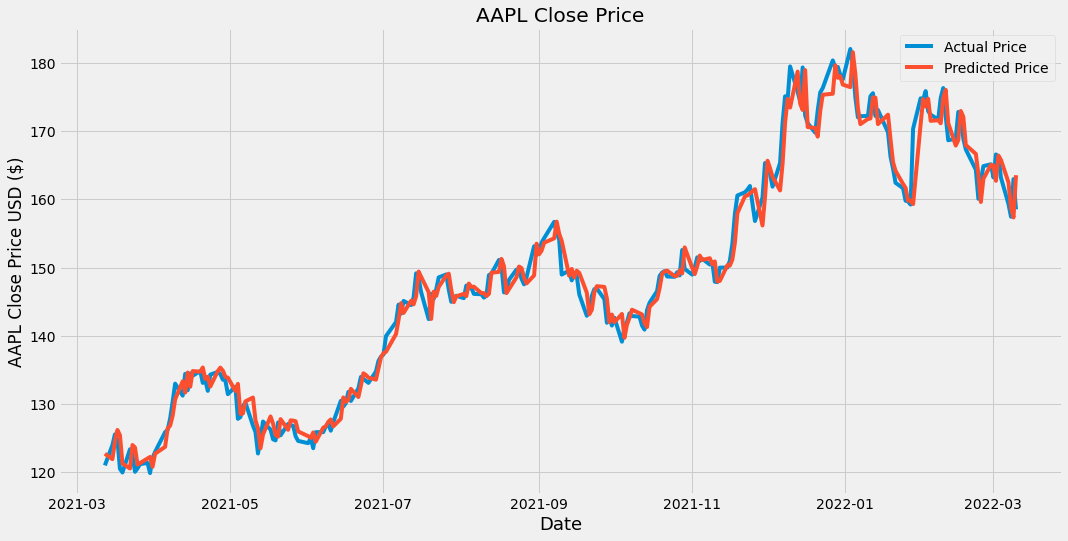

In [95]:
plotModelResultNAIVE(bestLSTM, "AAPL")

##  LSTM, Step 4: Sliding Window Algorithm
### TO PROF: DO NOT RUN, data is already written into Compare_Naive_SWA.csv file.

#### In "LSTM, Step 2: Running Hyperparameter Tuning", we are obviously using a naive LSTM algorithm to predict 20% of test data. An alternative LSTM algorithm for stock price prediction would be using the past X days of stock price data to predict 1 day into the future. Hence, we are now modifying our naive LSTM algorithm to get 60 days of stock price prediction, however we are now running our model predictionDays times, and each time it runs, we are appending the actual stock price of the present day to the training data while removing the oldest stock price from the training data to predict the next day stock price. In this way, the past X days of stock price data to predict 1 day into the future always remains the same. We are going to use a sliding window algorithm of stride 1.

### Re-running LSTM function (Still NAIVE) due to model.predict() taking the latest batch of hyperparameters (which is not the best combinations)

In [145]:
#Re-training the LSTM model with best hyperparameters, this time out of function otherwise model.predict wont work subsequently
from tensorflow.keras.layers import Dense, LSTM, Dropout 

closingPrices = chosen_data.filter(['Close'])
dataset = closingPrices.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:train_size, :]
x_train, y_train = [], []
for i in range(bestPredictionDays, train_size):
    x_train.append(train_data[i-bestPredictionDays:i, 0]) 
    y_train.append(train_data[i,0]) 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[train_size - bestPredictionDays: , :]
x_test = []
y_test = dataset[train_size: , :] 
for i in range(bestPredictionDays, len(test_data)):
    x_test.append(test_data[i-bestPredictionDays:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = Sequential()
model.add(LSTM(bestHiddenNeurons, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(bestHiddenNeurons, return_sequences=False))
model.add(Dense(bestDenseSize))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=bestBatchSize, epochs=bestEpochNo)
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)

LSTM_RMSE_NAIVE, LSTM_R2_NAIVE = evalPredicted(predicted, y_test, "LSTM")
LSTM = data[train_size:]
LSTM['Predicted']=predicted
LSTM.rename(columns={'Close':'Actual'},inplace = True)

Epoch 1/150
15/15 [==============================] - 5s 63ms/step - loss: 0.0206
Epoch 2/150
15/15 [==============================] - 1s 63ms/step - loss: 0.0018
Epoch 3/150
15/15 [==============================] - 1s 63ms/step - loss: 7.1021e-04
Epoch 4/150
15/15 [==============================] - 1s 62ms/step - loss: 5.3173e-04
Epoch 5/150
15/15 [==============================] - 1s 61ms/step - loss: 4.7497e-04
Epoch 6/150
15/15 [==============================] - 1s 62ms/step - loss: 4.4265e-04
Epoch 7/150
15/15 [==============================] - 1s 59ms/step - loss: 4.4888e-04
Epoch 8/150
15/15 [==============================] - 1s 59ms/step - loss: 4.3766e-04: 0s - loss: 4.4437
Epoch 9/150
15/15 [==============================] - 1s 59ms/step - loss: 4.2529e-04: 0s - loss: 4.04
Epoch 10/150
15/15 [==============================] - 1s 64ms/step - loss: 4.2693e-04
Epoch 11/150
15/15 [==============================] - 1s 78ms/step - loss: 4.1143e-04
Epoch 12/150
15/15 [===============

C:\Users\Alex\AppData\Local\Temp\ipykernel_25272\2337872557.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Alex\AppData\Local\Temp\ipykernel_25272\2337872557.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
#Splitting data between train and test
ds_train, ds_test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:1]
len(ds_train),len(ds_test)

#Getting the last predictionDays records from train dataset to predict 1 day in advanced in test dataset
#fut_inp should initially consist of the last predictionDays of stock data from train dataset
fut_inp = ds_train[(len(ds_train)-bestPredictionDays):]
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)
tmp_inp = tmp_inp[0].tolist()

In [147]:
#Added this to test fitting 
trainLengthSliding = train_size
x_train.shape

(943, 65, 1)

In [148]:
#Predicting future days price using the current data
#It will predict in sliding window manner (algorithm) with stride 1

predictedSWA=[]
n_steps=bestPredictionDays
k=0
test=0
days=30;

while(k<days):
    print("Set "+str(k)) 
    if(len(tmp_inp)>bestPredictionDays):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp)
        new_actual = ds_test[test]
        tmp_inp.extend(new_actual)
        tmp_inp = tmp_inp[1:]
        predictedSWA.extend(yhat.tolist())
        
        #The appending logic
        trainLengthSliding = trainLengthSliding+1
        train_data_sliding = scaled_data[0:trainLengthSliding, :]
        x_train_sliding, y_train_sliding = [], []
        for i in range(bestPredictionDays, trainLengthSliding):
            x_train_sliding.append(train_data_sliding[i-bestPredictionDays:i, 0]) 
            y_train_sliding.append(train_data_sliding[i,0]) 
        x_train_sliding, y_train_sliding = np.array(x_train_sliding), np.array(y_train_sliding)
        x_train_sliding = np.reshape(x_train_sliding, (x_train_sliding.shape[0], x_train_sliding.shape[1], 1))
        print("x_train_sliding.shape = "+str(x_train_sliding.shape))
        model.fit(x_train_sliding, y_train_sliding, batch_size=bestBatchSize, epochs=bestEpochNo)
        #End of appending logic
        
        k=k+1
        test=test+1
        
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp)
        new_actual = ds_test[test]
        tmp_inp.extend(new_actual)
        predictedSWA.extend(yhat.tolist())

        #The appending logic
        trainLengthSliding = trainLengthSliding+1
        train_data_sliding = scaled_data[0:trainLengthSliding, :]
        x_train_sliding, y_train_sliding = [], []
        for i in range(bestPredictionDays, trainLengthSliding):
            x_train_sliding.append(train_data_sliding[i-bestPredictionDays:i, 0]) 
            y_train_sliding.append(train_data_sliding[i,0]) 
        x_train_sliding, y_train_sliding = np.array(x_train_sliding), np.array(y_train_sliding)
        x_train_sliding = np.reshape(x_train_sliding, (x_train_sliding.shape[0], x_train_sliding.shape[1], 1))
        print("x_train_sliding.shape = "+str(x_train_sliding.shape))
        model.fit(x_train_sliding, y_train_sliding, batch_size=bestBatchSize, epochs=bestEpochNo) 
        #End of appending logic
        
        k=k+1
        test=test+1

Set 0
x_train_sliding.shape = (944, 65, 1)
Epoch 1/150
15/15 [==============================] - 1s 58ms/step - loss: 1.6061e-04
Epoch 2/150
15/15 [==============================] - 1s 59ms/step - loss: 1.3550e-04: 0s - los
Epoch 3/150
15/15 [==============================] - 1s 56ms/step - loss: 1.3166e-04
Epoch 4/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2103e-04
Epoch 5/150
15/15 [==============================] - 1s 59ms/step - loss: 1.3808e-04
Epoch 6/150
15/15 [==============================] - 1s 66ms/step - loss: 1.5095e-04
Epoch 7/150
15/15 [==============================] - 1s 66ms/step - loss: 1.2666e-04
Epoch 8/150
15/15 [==============================] - 1s 59ms/step - loss: 1.2181e-04
Epoch 9/150
15/15 [==============================] - 1s 59ms/step - loss: 1.2923e-04
Epoch 10/150
15/15 [==============================] - 1s 60ms/step - loss: 1.3576e-04
Epoch 11/150
15/15 [==============================] - 1s 60ms/step - loss: 1.4223e-04
Epoch 12/1

15/15 [==============================] - 1s 60ms/step - loss: 1.2250e-04
Epoch 39/150
15/15 [==============================] - 1s 60ms/step - loss: 1.4474e-04
Epoch 40/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2444e-04
Epoch 41/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2594e-04
Epoch 42/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2867e-04
Epoch 43/150
15/15 [==============================] - 1s 62ms/step - loss: 1.2955e-04
Epoch 44/150
15/15 [==============================] - 1s 63ms/step - loss: 1.3853e-04
Epoch 45/150
15/15 [==============================] - 1s 58ms/step - loss: 1.4617e-04
Epoch 46/150
15/15 [==============================] - 1s 64ms/step - loss: 1.5138e-04
Epoch 47/150
15/15 [==============================] - 1s 70ms/step - loss: 1.2309e-04
Epoch 48/150
15/15 [==============================] - 1s 57ms/step - loss: 1.3857e-04
Epoch 49/150
15/15 [==============================] - 1s 60ms/step 

15/15 [==============================] - 1s 62ms/step - loss: 1.4043e-04
Epoch 77/150
15/15 [==============================] - 1s 63ms/step - loss: 1.3134e-04
Epoch 78/150
15/15 [==============================] - 1s 59ms/step - loss: 1.3878e-04
Epoch 79/150
15/15 [==============================] - 1s 60ms/step - loss: 1.3292e-04
Epoch 80/150
15/15 [==============================] - 1s 59ms/step - loss: 1.4003e-04
Epoch 81/150
15/15 [==============================] - 1s 59ms/step - loss: 1.2351e-04
Epoch 82/150
15/15 [==============================] - 1s 59ms/step - loss: 1.3261e-04
Epoch 83/150
15/15 [==============================] - 1s 59ms/step - loss: 1.3681e-04
Epoch 84/150
15/15 [==============================] - 1s 59ms/step - loss: 1.2649e-04
Epoch 85/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2972e-04
Epoch 86/150
15/15 [==============================] - 1s 60ms/step - loss: 1.3176e-04
Epoch 87/150
15/15 [==============================] - 1s 62ms/step 

15/15 [==============================] - 1s 57ms/step - loss: 1.3822e-04
Epoch 114/150
15/15 [==============================] - 1s 58ms/step - loss: 1.6092e-04
Epoch 115/150
15/15 [==============================] - 1s 61ms/step - loss: 1.4520e-04
Epoch 116/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2876e-04
Epoch 117/150
15/15 [==============================] - 1s 59ms/step - loss: 1.2042e-04
Epoch 118/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2357e-04
Epoch 119/150
15/15 [==============================] - 1s 59ms/step - loss: 1.2330e-04
Epoch 120/150
15/15 [==============================] - 1s 56ms/step - loss: 1.2059e-04
Epoch 121/150
15/15 [==============================] - 1s 54ms/step - loss: 1.3036e-04
Epoch 122/150
15/15 [==============================] - 1s 54ms/step - loss: 1.2787e-04
Epoch 123/150
15/15 [==============================] - 1s 57ms/step - loss: 1.2446e-04
Epoch 124/150
15/15 [==============================] - 1s

15/15 [==============================] - 1s 60ms/step - loss: 1.2101e-04
Set 5
x_train_sliding.shape = (949, 65, 1)
Epoch 1/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2926e-04
Epoch 2/150
15/15 [==============================] - 1s 65ms/step - loss: 1.2728e-04
Epoch 3/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2326e-04
Epoch 4/150
15/15 [==============================] - 1s 61ms/step - loss: 1.2263e-04
Epoch 5/150
15/15 [==============================] - 1s 63ms/step - loss: 1.2354e-04
Epoch 6/150
15/15 [==============================] - 1s 61ms/step - loss: 1.2204e-04
Epoch 7/150
15/15 [==============================] - 1s 64ms/step - loss: 1.2061e-04
Epoch 8/150
15/15 [==============================] - 1s 80ms/step - loss: 1.2840e-04
Epoch 9/150
15/15 [==============================] - 1s 72ms/step - loss: 1.2707e-04
Epoch 10/150
15/15 [==============================] - 1s 59ms/step - loss: 1.3288e-04
Epoch 11/150
15/15 [=============

15/15 [==============================] - 1s 61ms/step - loss: 1.2462e-04
Epoch 38/150
15/15 [==============================] - 1s 59ms/step - loss: 1.1587e-04
Epoch 39/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2511e-04
Epoch 40/150
15/15 [==============================] - 1s 63ms/step - loss: 1.4548e-04: 0s - loss: 
Epoch 41/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2054e-04
Epoch 42/150
15/15 [==============================] - 1s 60ms/step - loss: 1.1720e-04
Epoch 43/150
15/15 [==============================] - 1s 72ms/step - loss: 1.3165e-04
Epoch 44/150
15/15 [==============================] - 1s 63ms/step - loss: 1.1941e-04
Epoch 45/150
15/15 [==============================] - 1s 60ms/step - loss: 1.3406e-04
Epoch 46/150
15/15 [==============================] - 1s 61ms/step - loss: 1.3165e-04: 0s - loss: 1.
Epoch 47/150
15/15 [==============================] - 1s 59ms/step - loss: 1.3333e-04
Epoch 48/150
15/15 [===================

15/15 [==============================] - 1s 59ms/step - loss: 1.3052e-04
Epoch 76/150
15/15 [==============================] - 1s 61ms/step - loss: 1.2703e-04
Epoch 77/150
15/15 [==============================] - 1s 59ms/step - loss: 1.2464e-04
Epoch 78/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2602e-04
Epoch 79/150
15/15 [==============================] - 1s 59ms/step - loss: 1.2570e-04
Epoch 80/150
15/15 [==============================] - 1s 62ms/step - loss: 1.3499e-04
Epoch 81/150
15/15 [==============================] - 1s 63ms/step - loss: 1.2328e-04
Epoch 82/150
15/15 [==============================] - 1s 62ms/step - loss: 1.1657e-04
Epoch 83/150
15/15 [==============================] - 1s 59ms/step - loss: 1.2623e-04
Epoch 84/150
15/15 [==============================] - 1s 61ms/step - loss: 1.1682e-04
Epoch 85/150
15/15 [==============================] - 1s 62ms/step - loss: 1.1983e-04
Epoch 86/150
15/15 [==============================] - 1s 63ms/step 

15/15 [==============================] - 1s 60ms/step - loss: 1.1925e-04
Epoch 113/150
15/15 [==============================] - 1s 59ms/step - loss: 1.1726e-04
Epoch 114/150
15/15 [==============================] - 1s 59ms/step - loss: 1.2336e-04
Epoch 115/150
15/15 [==============================] - 1s 61ms/step - loss: 1.2625e-04
Epoch 116/150
15/15 [==============================] - 1s 61ms/step - loss: 1.1599e-04
Epoch 117/150
15/15 [==============================] - 1s 62ms/step - loss: 1.1547e-04
Epoch 118/150
15/15 [==============================] - 1s 60ms/step - loss: 1.1603e-04
Epoch 119/150
15/15 [==============================] - 1s 60ms/step - loss: 1.2557e-04
Epoch 120/150
16/16 [==============================] - 1s 54ms/step - loss: 3.2776e-05
Epoch 140/150
16/16 [==============================] - 1s 54ms/step - loss: 4.0515e-05
Epoch 141/150
16/16 [==============================] - 1s 55ms/step - loss: 4.1133e-05
Epoch 142/150
16/16 [==============================] - 1s

Epoch 75/150
16/16 [==============================] - 1s 51ms/step - loss: 3.6089e-05
Epoch 76/150
16/16 [==============================] - 1s 51ms/step - loss: 5.3033e-05
Epoch 77/150
16/16 [==============================] - 1s 51ms/step - loss: 4.4570e-05
Epoch 78/150
16/16 [==============================] - 1s 51ms/step - loss: 3.6317e-05
Epoch 79/150
16/16 [==============================] - 1s 51ms/step - loss: 3.6253e-05
Epoch 80/150
16/16 [==============================] - 1s 52ms/step - loss: 3.3289e-05
Epoch 81/150
16/16 [==============================] - 1s 52ms/step - loss: 4.0182e-05
Epoch 82/150
16/16 [==============================] - 1s 51ms/step - loss: 3.5836e-05
Epoch 83/150
16/16 [==============================] - 1s 53ms/step - loss: 3.1511e-05
Epoch 84/150
16/16 [==============================] - 1s 55ms/step - loss: 3.7406e-05
Epoch 85/150
16/16 [==============================] - 1s 51ms/step - loss: 3.4870e-05
Epoch 86/150
16/16 [==============================] - 

16/16 [==============================] - 1s 52ms/step - loss: 3.6438e-05
Epoch 19/150
16/16 [==============================] - 1s 51ms/step - loss: 4.0795e-05
Epoch 20/150
16/16 [==============================] - 1s 51ms/step - loss: 4.2754e-05
Epoch 21/150
16/16 [==============================] - 1s 51ms/step - loss: 5.2546e-05
Epoch 22/150
16/16 [==============================] - 1s 51ms/step - loss: 4.1051e-05
Epoch 23/150
16/16 [==============================] - 1s 51ms/step - loss: 4.2120e-05
Epoch 24/150
16/16 [==============================] - 1s 52ms/step - loss: 4.2807e-05
Epoch 25/150
16/16 [==============================] - 1s 51ms/step - loss: 3.2371e-05
Epoch 26/150
16/16 [==============================] - 1s 52ms/step - loss: 2.9505e-05
Epoch 27/150
16/16 [==============================] - 1s 52ms/step - loss: 4.0283e-05
Epoch 28/150
16/16 [==============================] - 1s 51ms/step - loss: 5.0215e-05
Epoch 29/150
16/16 [==============================] - 1s 51ms/step 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



16/16 [==============================] - 1s 54ms/step - loss: 3.0023e-05
Epoch 136/150
16/16 [==============================] - 1s 74ms/step - loss: 2.6166e-05
Epoch 137/150
16/16 [==============================] - 1s 59ms/step - loss: 2.5883e-05
Epoch 138/150
16/16 [==============================] - 1s 60ms/step - loss: 2.5386e-05
Epoch 139/150
16/16 [==============================] - 1s 57ms/step - loss: 2.4943e-05
Epoch 140/150
16/16 [==============================] - 1s 62ms/step - loss: 2.4711e-05
Epoch 141/150
16/16 [==============================] - 1s 56ms/step - loss: 2.4729e-05
Epoch 142/150
16/16 [==============================] - 1s 61ms/step - loss: 2.2703e-05
Epoch 143/150
16/16 [==============================] - 1s 58ms/step - loss: 2.8906e-05
Epoch 144/150
16/16 [==============================] - 1s 57ms/step - loss: 2.6977e-05
Epoch 145/150
16/16 [==============================] - 1s 57ms/step - loss: 3.1705e-05: 0s - loss:
Epoch 146/150
16/16 [========================

16/16 [==============================] - 1s 59ms/step - loss: 1.5552e-05
Epoch 127/150
16/16 [==============================] - 1s 58ms/step - loss: 2.2598e-05
Epoch 128/150
16/16 [==============================] - 1s 58ms/step - loss: 1.6945e-05
Epoch 129/150
16/16 [==============================] - 1s 56ms/step - loss: 1.5782e-05
Epoch 130/150
16/16 [==============================] - 1s 59ms/step - loss: 1.4795e-05
Epoch 131/150
16/16 [==============================] - 1s 58ms/step - loss: 1.7368e-05
Epoch 132/150
16/16 [==============================] - 1s 59ms/step - loss: 1.6289e-05
Epoch 133/150
16/16 [==============================] - 1s 58ms/step - loss: 1.6631e-05
Epoch 134/150
16/16 [==============================] - 1s 59ms/step - loss: 1.5970e-05
Epoch 135/150
16/16 [==============================] - 1s 58ms/step - loss: 1.7523e-05
Epoch 136/150
16/16 [==============================] - 1s 58ms/step - loss: 1.7084e-05
Epoch 137/150
16/16 [==============================] - 1s

In [149]:
predictedSWA = scaler.inverse_transform(predictedSWA)
predictedSWA = predictedSWA.flatten()
predictedSWA

array([122.27174998, 120.97338672, 124.1816612 , 124.88421459,
       124.44213436, 121.37610851, 120.00707738, 123.86169395,
       124.10918515, 121.16282335, 120.95528746, 120.81763826,
       122.39990189, 118.68412827, 120.02125309, 120.40389189,
       125.01719415, 125.63766886, 127.62785059, 127.28337648,
       131.16228047, 126.41219799, 132.26264901, 131.5676443 ,
       133.80849468, 134.57164813, 137.45455717, 135.85765262,
       132.80094851, 132.28764741])

In [152]:
LSTM['Predicted'].head(days)
predicted_naive = pd.DataFrame(LSTM['Predicted'].head(days)).to_numpy()
predicted_naive

array([[122.271736],
       [121.60012 ],
       [123.94129 ],
       [125.6699  ],
       [125.030754],
       [121.04103 ],
       [120.05543 ],
       [123.2876  ],
       [123.24443 ],
       [120.934   ],
       [120.98626 ],
       [121.66316 ],
       [121.938545],
       [120.594635],
       [122.308754],
       [123.363716],
       [125.96128 ],
       [126.47271 ],
       [127.816505],
       [130.10094 ],
       [132.67557 ],
       [131.25726 ],
       [133.86406 ],
       [132.08975 ],
       [134.14972 ],
       [134.22697 ],
       [134.856   ],
       [133.3592  ],
       [133.58453 ],
       [132.27841 ]], dtype=float32)

In [154]:
comparePredictions = pd.DataFrame(chosen_data['Close'])
comparePredictions = comparePredictions[train_size:].head(days)
comparePredictions['Predicted_Naive'] = predicted_naive.flatten().tolist()
comparePredictions['Predicted_SWA'] = predictedSWA.tolist()
comparePredictions.rename(columns={'Close':'Actual'},inplace = True)
comparePredictions.to_csv('Compare_Naive_SWA.csv')
comparePredictions

Actual  Predicted_Naive  Predicted_SWA
DateTime                                              
2021-03-12  121.029999       122.271736     122.271750
2021-03-15  123.989998       121.600121     120.973387
2021-03-16  125.570000       123.941292     124.181661
2021-03-17  124.760002       125.669899     124.884215
2021-03-18  120.529999       125.030754     124.442134
2021-03-19  119.989998       121.041031     121.376109
2021-03-22  123.389999       120.055428     120.007077
2021-03-23  122.540001       123.287598     123.861694
2021-03-24  120.089996       123.244431     124.109185
2021-03-25  120.589996       120.933998     121.162823
2021-03-26  121.209999       120.986259     120.955287
2021-03-29  121.389999       121.663162     120.817638
2021-03-30  119.900002       121.938545     122.399902
2021-03-31  122.150002       120.594635     118.684128
2021-04-01  123.000000       122.308754     120.021253
2021-04-05  125.900002       123.363716     120.403892
2021-04-06  126.209999       125.961281     125.017194
2021-04-07  127.900002       126.472710     125.637669
2021-04-08  130.360001       127.816505     127.627851
2021-04-09  133.000000       130.100937     127.283376
2021-04-12  131.240005       132.675568     131.162280
2021-04-13  134.429993       131.257263     126.412198
2021-04-14  132.029999       133.864059     132.262649
2021-04-15  134.500000       132.089752     131.567644
2021-04-16  134.160004       134.149719     133.808495
2021-04-19  134.839996       134.226974     134.571648
2021-04-20  133.110001       134.856003     137.454557
2021-04-21  133.500000       133.359207     135.857653
2021-04-22  131.940002       133.584534     132.800949
2021-04-23  134.320007       132.278412     132.287647

In [155]:
LSTM_RMSE_SWA, LSTM_R2_SWA = evalPredicted(comparePredictions['Predicted_SWA'], comparePredictions['Actual'], "LSTM")

LSTM Root Mean Squared Error is 2.9796454638206686
LSTM R Squared is 0.702145157977456


In [156]:
LSTM_RMSE_NAIVE2, LSTM_R2_NAIVE2 = evalPredicted(comparePredictions['Predicted_Naive'], comparePredictions['Actual'], "LSTM")

LSTM Root Mean Squared Error is 1.9667447748414233
LSTM R Squared is 0.8702308409599101


In [157]:
print("Naive LSTM algorithm:\nRMSE: "+str(LSTM_RMSE_NAIVE2)+", R^2: "+str(LSTM_R2_NAIVE2))

Naive LSTM algorithm:
RMSE: 1.9667447748414233, R^2: 0.8702308409599101


In [158]:
print("SWA LSTM algorithm:\nRMSE: "+str(LSTM_RMSE_SWA)+", R^2: "+str(LSTM_R2_SWA))

SWA LSTM algorithm:
RMSE: 2.9796454638206686, R^2: 0.702145157977456


In [159]:
print("The difference between the naive and SWA LSTM algorithm for RMSE and R^2 respectively are:\nRMSE: "+str(LSTM_RMSE_SWA-LSTM_RMSE_NAIVE)+", R^2: "+str(LSTM_R2_SWA-LSTM_R2_NAIVE))

The difference between the naive and SWA LSTM algorithm for RMSE and R^2 respectively are:
RMSE: 0.5241022518778475, R^2: -0.27650472954259875


## Clearly, the Naive Algorithm performed better than the SWA Algorithm, as shown in the chart below. We will use the Naive algorithm to compare with ARIMA for the selection of the better model.

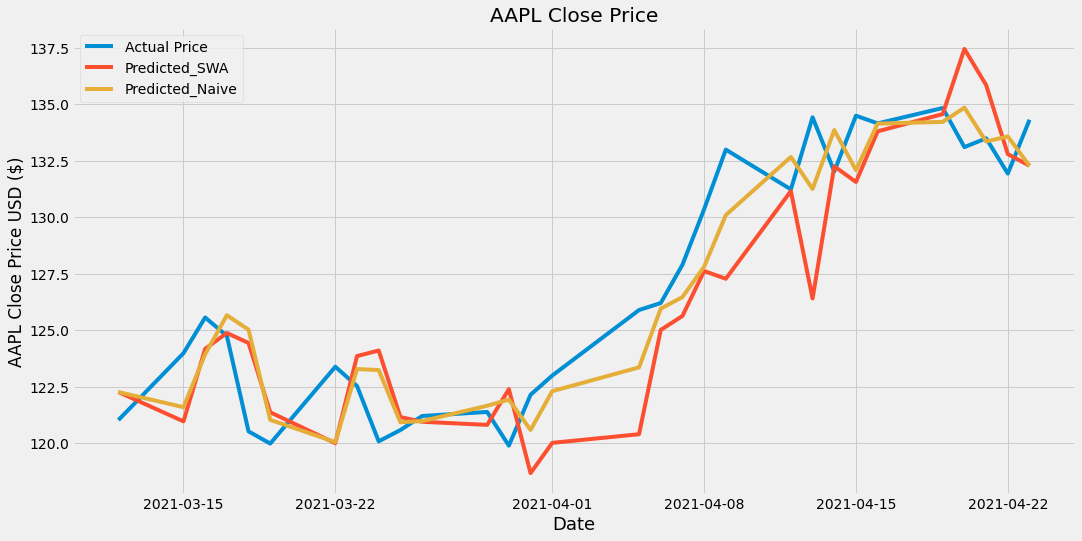

In [252]:
plotModelResult(comparePredictions, "AAPL")

## END OF LSTM SEGMENT, MOVING ON TO ARIMA

# ARIMA Modelling

### ARIMA model has 3 important terms P , D , Q 
#### P - order of the AR term (auto regressive)
#### D - number of differencing required to make a time serires stationary
#### Q - order of the Moving Average term

### ADF TEST

#### uses Augumented Dickey Fuller (ADF) to check if price series is stationary.
#### The null hypothesis of the ADF test is that the time series is non-stationary. 

#### P-Value < 0.5 : We can reject the null hypothesis and infer that it is stationary. 
#### P-Value > 0.5 : We will need to find the D.

In [10]:
from statsmodels.tsa.stattools import adfuller 
df = chosen_data[['Close']].copy()
result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 0.18798968278588885
p-value: 0.9715798694149603


as the P-value is above 0.5 we need to find a value for D and not use 0.

### ACF Correction

In [11]:
#!pip install pmdarima
from pmdarima.arima.utils import ndiffs

In [12]:
ndiffs(df.Close , test = 'adf')

1

## Number of differencing required to make the series stationary = 1

### P 

P is the order of the AR term. It refers to the number of lags to be used as predictors. 
To find P, use PACF plot.

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf

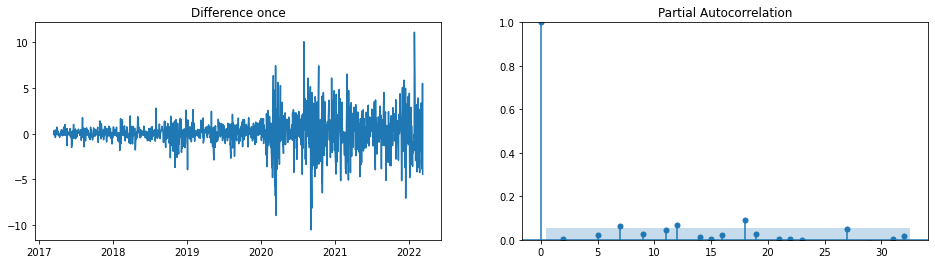

In [14]:
diff = df.Close.diff().dropna()

fig, (ax1,ax2) = plt.subplots (1,2, figsize =(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")

ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

we can observe that PACF lag 7+- is significant as it is above the significance line.

### Q

Q is the order of MA term. It refers to the number of lagged forecast errors that should go into the ARIMA model
to find Q make use of a ACF plot.

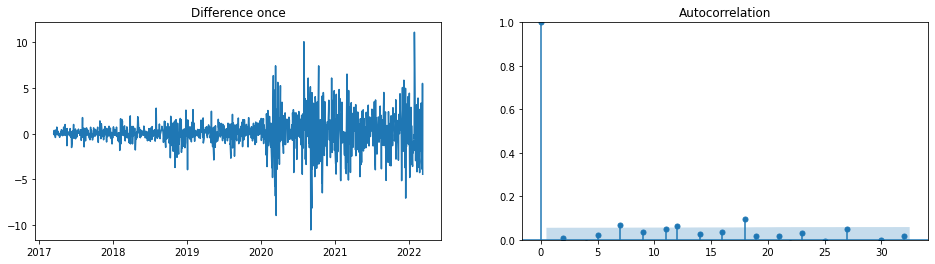

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
diff = df.Close.diff().dropna()

fig, (ax1,ax2) = plt.subplots (1,2, figsize =(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")

ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

we can observe that the ACF lag 7 is significant as it is above the significance line

### However as we are only using the first day of the prediction, our Q value would be zero as there would be no correlation between past error as we are using the first data point.

In [16]:
Prediction_num = 30

For our ARIMA prediction, we will be only predicting ??? days in advance due to computational limits as we would have to re-train the model after every new day. As such we have just chosen ??? days as it represents ??? This can simply be upscaled by changing the variable Prediction_num value. 



In [110]:
lower_confidence =[]
upper_confidence =[]
train_data, test_data = chosen_data[0:int(len(chosen_data)*0.8)], chosen_data[int(len(chosen_data)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(Prediction_num):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    LC = output[2].flatten()[0]
    UC = output[2].flatten()[1]
    model_predictions.append(yhat)
    lower_confidence.append(LC)
    upper_confidence.append(UC)
    print("AAAA",output)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
actual_test_data = test_data[0:Prediction_num]

MSE_error = met.mean_squared_error(actual_test_data, model_predictions)
Arima_RMSE = math.sqrt(MSE_error)
print('Testing Root Mean Squared Error is {}'.format(Arima_RMSE))
ARIMAr2 = met.r2_score(actual_test_data,model_predictions)
print('Testing R Squared Error is {}'.format(ARIMAr2))

AAAA (array([122.02611551]), array([1.5484893]), array([[118.99113225, 125.06109878]]))
AAAA (array([121.12596593]), array([1.5480329]), array([[118.0918772 , 124.16005465]]))
AAAA (array([124.0442182]), array([1.54983876]), array([[121.00659006, 127.08184635]]))
AAAA (array([125.18840667]), array([1.54979629]), array([[122.15086175, 128.22595159]]))
AAAA (array([125.06337811]), array([1.5490867]), array([[122.02722397, 128.09953226]]))
AAAA (array([120.89330196]), array([1.55481712]), array([[117.84591639, 123.94068753]]))
AAAA (array([120.08275551]), array([1.55430433]), array([[117.03637501, 123.12913601]]))
AAAA (array([122.93741256]), array([1.55695477]), array([[119.88583729, 125.98898783]]))
AAAA (array([122.75672428]), array([1.55623628]), array([[119.70655721, 125.80689135]]))
AAAA (array([120.50507592]), array([1.55768395]), array([[117.45207147, 123.55808036]]))
AAAA (array([120.92079823]), array([1.55692014]), array([[117.86929082, 123.97230564]]))
AAAA (array([121.31833854


KeyboardInterrupt



In [55]:
lower_confidence =[]
upper_confidence =[]
train_data, test_data = chosen_data[0:int(len(chosen_data)*0.8)], chosen_data[int(len(chosen_data)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(Prediction_num):
    model = ARIMA(history, order=(7,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    LC = output[2].flatten()[0]
    UC = output[2].flatten()[1]
    model_predictions.append(yhat)
    lower_confidence.append(LC)
    upper_confidence.append(UC)
    
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
actual_test_data = test_data[0:Prediction_num]

MSE_error = met.mean_squared_error(actual_test_data, model_predictions)
Arima_RMSE = math.sqrt(MSE_error)
print('Testing Root Mean Squared Error is {}'.format(Arima_RMSE))
ARIMAr2 = met.r2_score(actual_test_data,model_predictions)
print('Testing R Squared Error is {}'.format(ARIMAr2))

Testing Root Mean Squared Error is 2.3412463985956893
Testing R Squared Error is 0.9805911747507605


In [58]:
lower_confidence =[]
upper_confidence =[]
train_data, test_data = chosen_data[0:int(len(chosen_data)*0.8)], chosen_data[int(len(chosen_data)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(Prediction_num):
    model = ARIMA(history, order=(8,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    LC = output[2].flatten()[0]
    UC = output[2].flatten()[1]
    model_predictions.append(yhat)
    lower_confidence.append(LC)
    upper_confidence.append(UC)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
actual_test_data = test_data[0:Prediction_num]

MSE_error = met.mean_squared_error(actual_test_data, model_predictions)
Arima_RMSE = math.sqrt(MSE_error)
print('Testing Root Mean Squared Error is {}'.format(Arima_RMSE))
ARIMAr2 = met.r2_score(actual_test_data,model_predictions)
print('Testing R Squared Error is {}'.format(ARIMAr2))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Root Mean Squared Error is 2.337554801827963
Testing R Squared Error is 0.9806523328324733


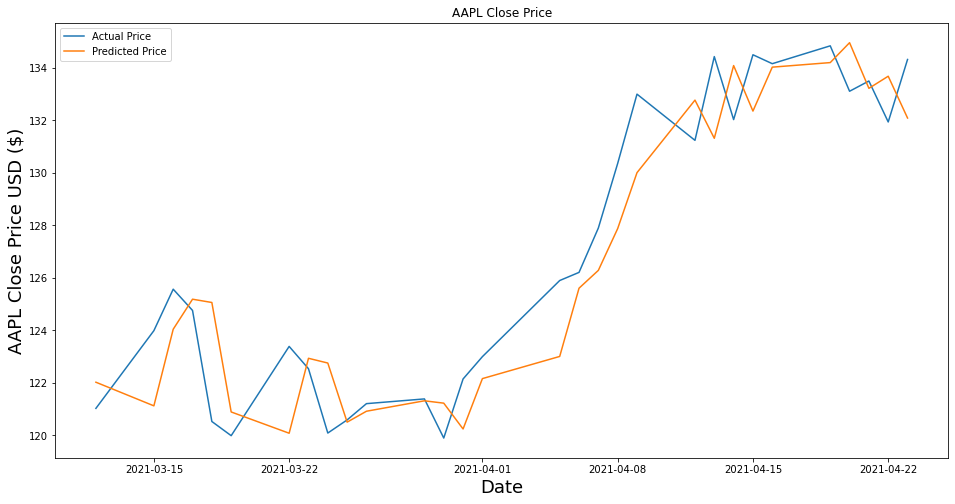

In [18]:
test_set_range = chosen_data[int(len(chosen_data)*0.8):int(len(chosen_data)*0.8)+Prediction_num].index
plt.figure(figsize=(16,8))

plt.plot(test_set_range, actual_test_data, label='Actual Price')
plt.plot(test_set_range, model_predictions, label='Predicted Price')
plt.title("AAPL Close Price")
plt.xlabel('Date',fontsize=18)
plt.ylabel("AAPL Close Price USD ($)",fontsize=18)
plt.legend()
plt.show()

In [19]:
ARIMA=pd.DataFrame({"Actual":actual_test_data})
ARIMA["Predicted"]=pd.DataFrame(model_predictions)
ARIMA["Lower_conf"] = pd.DataFrame(lower_confidence)
ARIMA["Upper_conf"] = pd.DataFrame(upper_confidence)
ARIMA.head(30)

Actual   Predicted  Lower_conf  Upper_conf
0   121.029999  122.026116  118.991132  125.061099
1   123.989998  121.125966  118.091877  124.160055
2   125.570000  124.044218  121.006590  127.081846
3   124.760002  125.188407  122.150862  128.225952
4   120.529999  125.063378  122.027224  128.099532
5   119.989998  120.893302  117.845916  123.940688
6   123.389999  120.082756  117.036375  123.129136
7   122.540001  122.937413  119.885837  125.988988
8   120.089996  122.756724  119.706557  125.806891
9   120.589996  120.505076  117.452071  123.558080
10  121.209999  120.920798  117.869291  123.972306
11  121.389999  121.318339  118.268280  124.368397
12  119.900002  121.228529  118.179964  124.277094
13  122.150002  120.244894  117.196746  123.293043
14  123.000000  122.163658  119.114776  125.212541
15  125.900002  123.007963  119.960145  126.055781
16  126.209999  125.607180  122.555722  128.658637
17  127.900002  126.286756  123.236566  129.336945
18  130.360001  127.878541  124.828252  130.928830
19  133.000000  130.008535  126.955987  133.061083
20  131.240005  132.772057  129.715567  135.828548
21  134.429993  131.318058  128.261636  134.374479
22  132.029999  134.088116  131.027335  137.148897
23  134.500000  132.354722  129.292879  135.416566
24  134.160004  134.027824  130.964702  137.090945
25  134.839996  134.201745  131.140097  137.263393
26  133.110001  134.959851  131.899440  138.020262
27  133.500000  133.221715  130.160724  136.282706
28  131.940002  133.681980  130.622422  136.741539
29  134.320007  132.090296  129.030385  135.150207

# Comparison between LSTM and ARIMA

ARIMA Testing Root Mean Squared Error is 42.82069467876911
LSTM Testing Root Mean Squared Error is 91.92137971815178


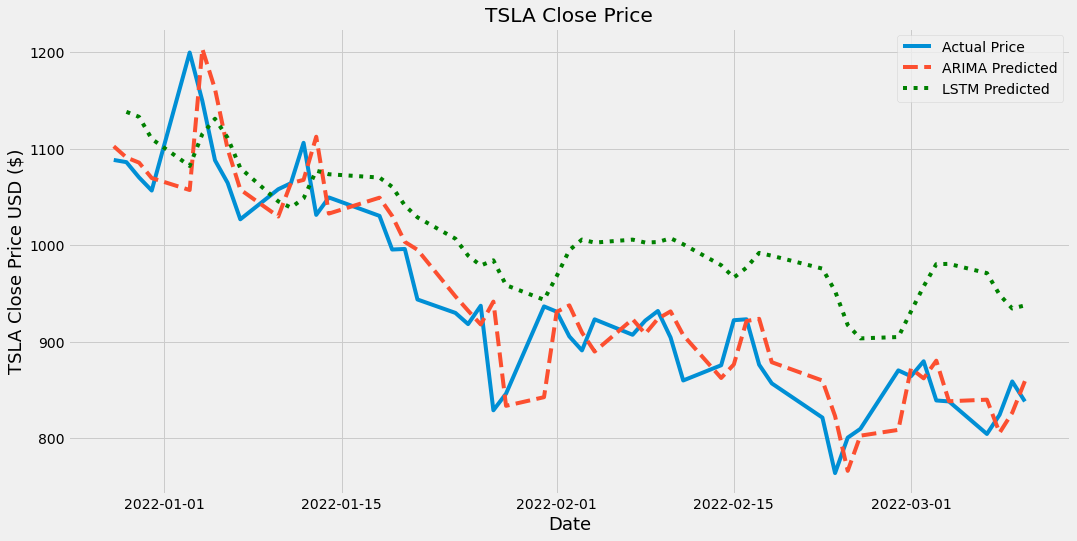

In [66]:
#2 models 
print('ARIMA Testing Root Mean Squared Error is {}'.format(Arima_RMSE))
print('LSTM Testing Root Mean Squared Error is {}'.format(LSTM_RMSE))
plt.figure(figsize=(16,8))

plt.plot(ARIMA['Actual'], label='Actual Price')
plt.plot(ARIMA['Predicted'], linestyle='dashed', label='ARIMA Predicted')
plt.plot(comparePredictions['Predicted_Naive'], linestyle='dotted',color='green', label ='LSTM Predicted')
plt.title("AAPL Close Price")
plt.xlabel('Date',fontsize=18)
plt.ylabel("AAPL Close Price USD ($)",fontsize=18)

plt.legend()
plt.show()

## The function getBetterModel allows us to retrieve the best model based on the lowest RMSE.

In [253]:
def getBetterModel(ArimaRMSE,LstmRMSE,ARIMA,LSTM): #deemed that RMSE is more important than R2
    if ArimaRMSE<LstmRMSE:
        print("ARIMA is Optimal")
        return ARIMA #data fram of predicted and actual
    else:
        print("LSTM is Optimal")
        return LSTM

In [259]:
LSTM['Actual'] = comparePredictions['Actual']
LSTM['Predicted'] = comparePredictions['Predicted_Naive']
LSTM

Actual  Predicted_Naive  Predicted_SWA   Predicted
DateTime                                                          
2021-03-12  121.029999       122.271736     122.271750  122.271736
2021-03-15  123.989998       121.600121     120.973387  121.600121
2021-03-16  125.570000       123.941292     124.181661  123.941292
2021-03-17  124.760002       125.669899     124.884215  125.669899
2021-03-18  120.529999       125.030754     124.442134  125.030754
2021-03-19  119.989998       121.041031     121.376109  121.041031
2021-03-22  123.389999       120.055428     120.007077  120.055428
2021-03-23  122.540001       123.287598     123.861694  123.287598
2021-03-24  120.089996       123.244431     124.109185  123.244431
2021-03-25  120.589996       120.933998     121.162823  120.933998
2021-03-26  121.209999       120.986259     120.955287  120.986259
2021-03-29  121.389999       121.663162     120.817638  121.663162
2021-03-30  119.900002       121.938545     122.399902  121.938545
2021-03-31  122.150002       120.594635     118.684128  120.594635
2021-04-01  123.000000       122.308754     120.021253  122.308754
2021-04-05  125.900002       123.363716     120.403892  123.363716
2021-04-06  126.209999       125.961281     125.017194  125.961281
2021-04-07  127.900002       126.472710     125.637669  126.472710
2021-04-08  130.360001       127.816505     127.627851  127.816505
2021-04-09  133.000000       130.100937     127.283376  130.100937
2021-04-12  131.240005       132.675568     131.162280  132.675568
2021-04-13  134.429993       131.257263     126.412198  131.257263
2021-04-14  132.029999       133.864059     132.262649  133.864059
2021-04-15  134.500000       132.089752     131.567644  132.089752
2021-04-16  134.160004       134.149719     133.808495  134.149719
2021-04-19  134.839996       134.226974     134.571648  134.226974
2021-04-20  133.110001       134.856003     137.454557  134.856003
2021-04-21  133.500000       133.359207     135.857653  133.359207
2021-04-22  131.940002       133.584534     132.800949  133.584534
2021-04-23  134.320007       132.278412     132.287647  132.278412

## We will be using ARIMA's confidence intervals regardless of the model selected to aid in our trading strategies.

In [68]:
#Optimal = getBetterModel(Arima_RMSE,LSTM_RMSE_NAIVE2,ARIMA,LSTM)
Optimal = LSTM
Optimal['Upper_conf'] = ARIMA['Upper_conf']
Optimal['Lower_conf'] = ARIMA['Lower_conf']

ARIMA is Optimal


Actual    Predicted
0   1088.469971  1102.609871
1   1086.189941  1091.007091
2   1070.339966  1085.689602
3   1056.780029  1069.709483
4   1199.780029  1057.302124
5   1149.589966  1203.467294
6   1088.119995  1161.932022
7   1064.699951  1099.729548
8   1026.959961  1057.793503
9   1058.119995  1029.850009
10  1064.400024  1064.468752
11  1106.219971  1067.810278
12  1031.560059  1112.552099
13  1049.609985  1032.904431
14  1030.510010  1049.372687
15   995.650024  1030.438513
16   996.270020  1003.583254
17   943.900024   995.416169
18   930.000000   947.134159
19   918.400024   932.325220
20   937.409973   918.021703
21   829.099976   941.706363
22   846.349976   833.732824
23   936.719971   842.690131
24   931.250000   931.032547
25   905.659973   937.820824
26   891.140015   909.704486
27   923.320007   889.963543
28   907.340027   923.503415
29   922.000000   908.289400
30   932.000000   924.007142
31   904.549988   931.567911
32   860.000000   906.988906
33   875.760010   862.574293
34   922.429993   876.600987
35   923.390015   921.570989
36   876.349976   923.876297
37   856.979980   878.892529
38   821.530029   859.920803
39   764.039978   823.125301
40   800.770020   766.358763
41   809.869995   802.809769
42   870.429993   808.819528
43   864.369995   872.393474
44   879.890015   862.197754
45   839.289978   880.491137
46   838.289978   838.474105
47   804.580017   840.104721
48   824.400024   805.798777
49   858.969971   826.540588
50   838.299988   859.275284

# Trading Strategies

In [58]:
def getConfidenceShort(lower_conf: float, upper_conf:float, currentPrice: float) -> float:
    # Naive implementation, estimate confidence in relation to loss
    if upper_conf < currentPrice: return 1.0;
    return (currentPrice-lower_conf)/(upper_conf - lower_conf)

def getConfidenceLong(lower_conf: float, upper_conf:float, currentPrice: float) -> float:
    # Naive implementation, estimate confidence in relation to loss
    if lower_conf > currentPrice: return 1.0;
    return 1 - (currentPrice-lower_conf)/(upper_conf - lower_conf)


In [103]:
def amountToInvest(capital: float, confidence: float, risk: int)->float:
    if risk ==1:
        CONST_MAX_PERCENT_CAPITAL = 0.25
    elif risk ==2:
        CONST_MAX_PERCENT_CAPITAL = 0.5
    else:
        CONST_MAX_PERCENT_CAPITAL = 0.75

    return confidence*CONST_MAX_PERCENT_CAPITAL*capital

In [89]:
# confidence = confidence for PredictionNum of days. Days start from 1
# actual = Optimal['Actual']
# predicted = Optimal['Predicted']
# confidence = [getConfidence(lower_confidence[day-1], upper_confidence[day-1], actual[day-1]) for day in range(1,Prediction_num)]
def trade(capital: float, profit: float ,isLong: bool,day: int, price: float, position: float, risk:int,lowerConf: list,
       upperConf:list  ) -> (float,float):
    
    if(isLong):
        _confidence = getConfidenceLong(lowerConf[day], upperConf[day], price)
        
    else:
        _confidence = getConfidenceShort(lowerConf[day], upperConf[day], price)
        
    transaction_value = amountToInvest(capital,_confidence,risk)
    if isLong:
        capital -= transaction_value;
    
    numStocks = transaction_value/position;
    if not isLong # short:
        profit +=  (position - price)*numStocks #selling off position
    else: #long
        profit += (price - position)*numStocks
        
    capital = capital + profit
    return (capital, profit)

In [90]:
def shortOnly(table, capital,risk):
    actual = table['Actual']
    
    predicted = table['Predicted']
    activePosition = False
    price = 0
    position = 0
    profit = 0
    for day in range(len(table)-1):
        price = actual[day]
        
        nextPrice = predicted[day+1]        
                               
        if not isLong(price,nextPrice): #predicted decrease tomorrow
            if activePosition:
                continue
            else:
                position = price
                
                activePosition=True #BUY
                      
        else: #predicted increase tomorrow
            if activePosition:
                capital, profit = trade(capital, profit, False, day, price,position,risk,table['Lower_conf'],table['Upper_conf'])
                activePosition = False # SELL
                
    if activePosition:
        profit += position - actual[len(table)-1]
        
    return profit

In [104]:
shortOnly(Optimal,1000000,3)

<class 'pandas.core.series.Series'>


4093.3528954232015

In [101]:
def longOnly(table,capital,risk):
    actual = table['Actual']
    
    predicted = table['Predicted']
    activePosition = False
    price = 0
    position = 0
    profit = 0
    for day in range(len(table)-1):
        price = actual[day]
        
        nextPrice = predicted[day+1]        
                               
        if isLong(price,nextPrice): #predicted increase tomorrow
            if activePosition:
                continue
            else:
                position = price
                
                activePosition=True
                
        else: #predicted decrease tomorrow
            if activePosition:
                capital, profit = trade(capital, profit, True, day, price,position,risk,table['Lower_conf'],table['Upper_conf'])
                activePosition = False
                
    if activePosition: #closing o
        profit += actual[len(table)-1] - position 
        
    return profit

In [105]:
longOnly(Optimal,1000,3)

<class 'pandas.core.series.Series'>


7.207736969191854

In [95]:
def dailySwing(table,capital,risk):
    
    actual = table['Actual']
    predicted = table['Predicted']
    isCurrentPositionLong = None
    price = 0
    position = 0
    profit = 0
    for day in range(len(table)-1):
        price = actual[day]
        
        nextPrice = predicted[day+1]
        if isCurrentPositionLong is None: #day 0 initalize
            position = price
            if isLong(float(price),float(nextPrice)):
                isCurrentPositionLong = True
            else:
                isCurrentPositionLong= False
                      
        if isLong(actual[day],predicted[day+1]): #predicted increase tomorrow
            if isCurrentPositionLong:
                continue
                  
            else:#we are in short position but tomorrow go up so we sell
                capital, profit = trade(capital, profit, False, day, price,position,risk,table['Lower_conf'],table['Upper_conf'])
                position = price #buying the long
                isCurrentPositionLong = True
                
        else: #predicted decrease tomorrow
            if not isCurrentPositionLong: #currently short position
                continue
                  
            else: #we are in long position but need to sell
                capital, profit = trade(capital, profit, True, day, price,position,risk,table['Lower_conf'],table['Upper_conf'])
                position = price #start the short position
                isCurrentPositionLong = False
                
    if isCurrentPositionLong:
        profit += actual[len(table)-1] - position 
        
    else:
        profit +=   position - actual[len(table)-1]
        
    return profit

In [106]:
dailySwing(Optimal,1000000,3)

<class 'pandas.core.series.Series'>


10883.28214239381